<a href="https://colab.research.google.com/github/Marwa-Iben-Khalifa/bank-scoring/blob/main/Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This is a python block

In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###

# **application_{train}.csv **

Ce jeu de données est le jeu de données principal, dans application_train il y a une cible. Et le application_test est la donnée qui prédira si le client est accepté ou rejeté.

In [3]:
# aperçu des données application_train
application_train = pd.read_csv("./data/application_train.csv")
print("Total line : ",application_train.shape[0])
print("Total Column : ",application_train.shape[1])
application_train.head()

Total line :  33011
Total Column :  122


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...               0.0              0.0              0.0              0.0   
1  ...               0.0              0.0              0.0              0.0   
2  ...               0.0              0.0              0.0              0.0   
3  ...               0.0              0.0              0.0              0.0   
4  ...               0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Afficher toutes les fonctionnalités de application_train

In [4]:
print(application_train.columns.values)
application_train.shape

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

(33011, 122)

In [5]:
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in application_train.columns:
    # Count the number of missing values
    missing_values = application_train[col].isnull().sum()

    # Count the number of duplicates based on SK_ID_CURR
    duplicates = application_train.duplicated(subset=['SK_ID_CURR', col]).sum()

    # Check for outliers (assuming a normal distribution)
    if application_train[col].dtype in ['int64', 'float64']:
        mean = application_train[col].mean()
        std = application_train[col].std()
        outliers = ((application_train[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

+------------------------------+----------------+------------+----------+
|           Variable           | Missing Values | Duplicates | Outliers |
+------------------------------+----------------+------------+----------+
|          SK_ID_CURR          |       0        |     0      |    0     |
|            TARGET            |       0        |     0      |   2662   |
|      NAME_CONTRACT_TYPE      |       0        |     0      |   N/A    |
|         CODE_GENDER          |       0        |     0      |   N/A    |
|         FLAG_OWN_CAR         |       0        |     0      |   N/A    |
|       FLAG_OWN_REALTY        |       0        |     0      |   N/A    |
|         CNT_CHILDREN         |       0        |     0      |   482    |
|       AMT_INCOME_TOTAL       |       0        |     0      |    4     |
|          AMT_CREDIT          |       0        |     0      |   339    |
|         AMT_ANNUITY          |       0        |     0      |   316    |
|       AMT_GOODS_PRICE        |      

In [6]:
# Get counts of target values
target_counts=application_train['TARGET'].value_counts()

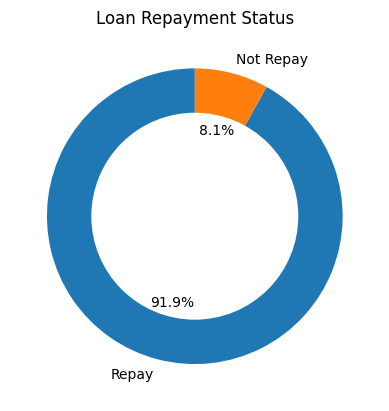

In [7]:
# Create figure and axis objects
fig, ax = plt.subplots()

# Create pie chart
labels = ['Repay', 'Not Repay']
pie = ax.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Create donut chart by drawing white circle in the center
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add title
ax.set_title('Loan Repayment Status')

# Show chart
plt.show()

<Figure size 1000x600 with 0 Axes>

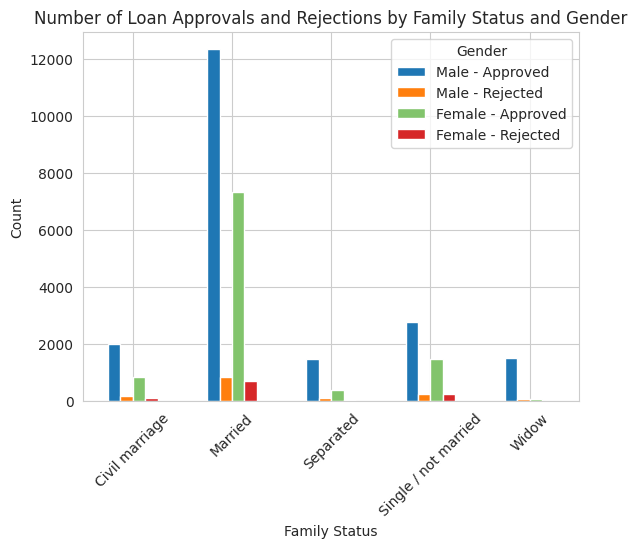

In [8]:

# create pivot table to count number of loan approvals and rejections by family status and gender
pivot_table = application_train.pivot_table(index=['NAME_FAMILY_STATUS'], columns=['CODE_GENDER', 'TARGET'], values='SK_ID_CURR', aggfunc='count')
pivot_table.columns = pivot_table.columns.map(lambda x: f"{x[0]}_{x[1]}")

# create stacked bar chart using pivot table
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = pivot_table.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#82c46c', '#d62728'])
ax.set_xlabel('Family Status')
ax.set_ylabel('Count')
ax.set_title('Number of Loan Approvals and Rejections by Family Status and Gender')

# change legend labels
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Male - Approved', 'Male - Rejected', 'Female - Approved', 'Female - Rejected'])
plt.show()

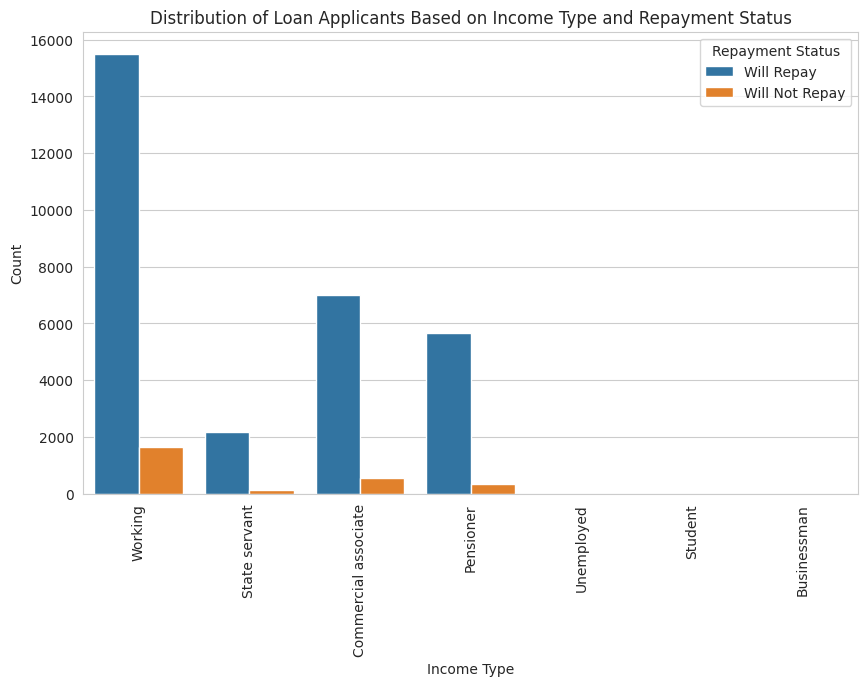

In [9]:
# create a barplot showing the distribution of loan applicants based on their income type
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Income Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Income Type and Repayment Status')
plt.xticks(rotation=90)

# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

<Figure size 1200x600 with 0 Axes>

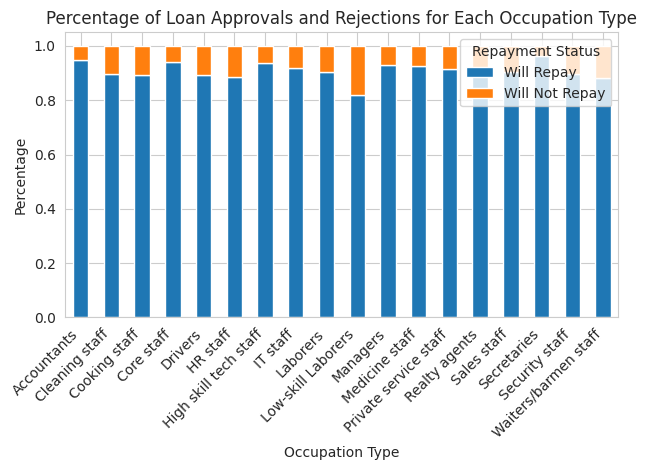

In [10]:
# Create a pivot table with counts of loan approvals and rejections for each occupation type
occupation_counts = pd.pivot_table(application_train, index='OCCUPATION_TYPE', columns='TARGET', values='SK_ID_CURR', aggfunc='count')

# Calculate the total count for each occupation type
occupation_totals = occupation_counts.sum(axis=1)

# Calculate the percentage of loan approvals and rejections for each occupation type
occupation_pct = occupation_counts.div(occupation_totals, axis=0)

# Create a stacked bar chart showing the percentage of loan approvals and rejections for each occupation type
plt.figure(figsize=(12, 6))
ax = occupation_pct.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Occupation Type')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Loan Approvals and Rejections for Each Occupation Type')
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

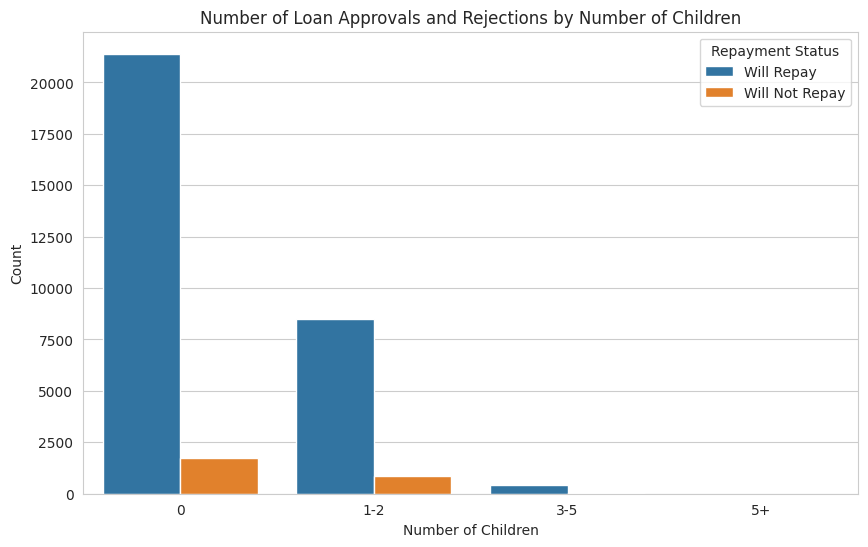

In [11]:
# create a new column for the number of children categories
application_train['CNT_CHILDREN_GROUP'] = pd.cut(application_train['CNT_CHILDREN'],
                                                bins=[-1, 0, 2, 5, application_train['CNT_CHILDREN'].max()],
                                                labels=['0', '1-2', '3-5', '5+'])

# create a stacked bar chart showing the number of loan approvals and rejections for each number of children
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CNT_CHILDREN_GROUP', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Number of Children')
ax.set_ylabel('Count')
ax.set_title('Number of Loan Approvals and Rejections by Number of Children')
# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

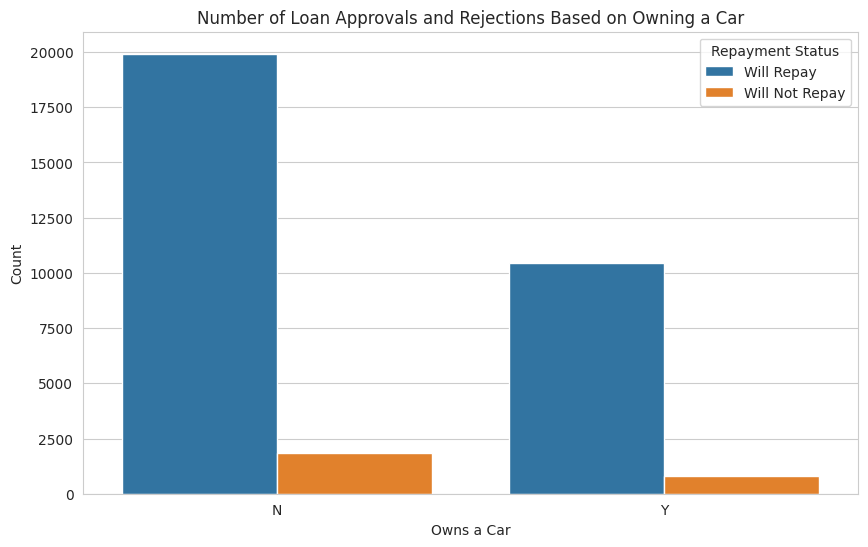

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a barplot showing the number of loan approvals and rejections based on the number of cars owned
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Owns a Car')
ax.set_ylabel('Count')
ax.set_title('Number of Loan Approvals and Rejections Based on Owning a Car')

# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

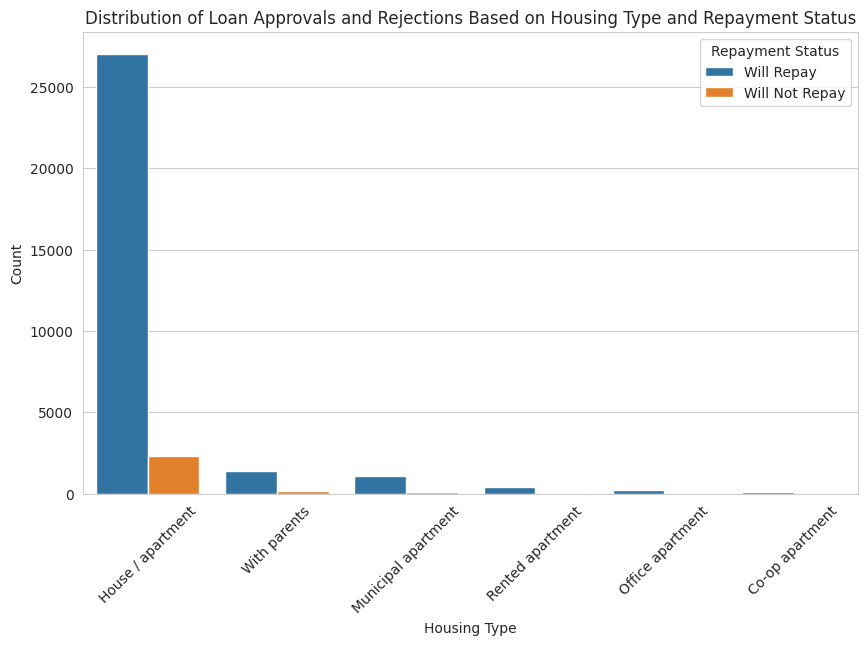

In [13]:
# create a stacked bar chart showing the number of loan approvals and rejections for each housing type
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'],
                   order=application_train['NAME_HOUSING_TYPE'].value_counts().index)
ax.set_xlabel('Housing Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Approvals and Rejections Based on Housing Type and Repayment Status')

# change legend labels
plt.xticks(rotation=45)
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

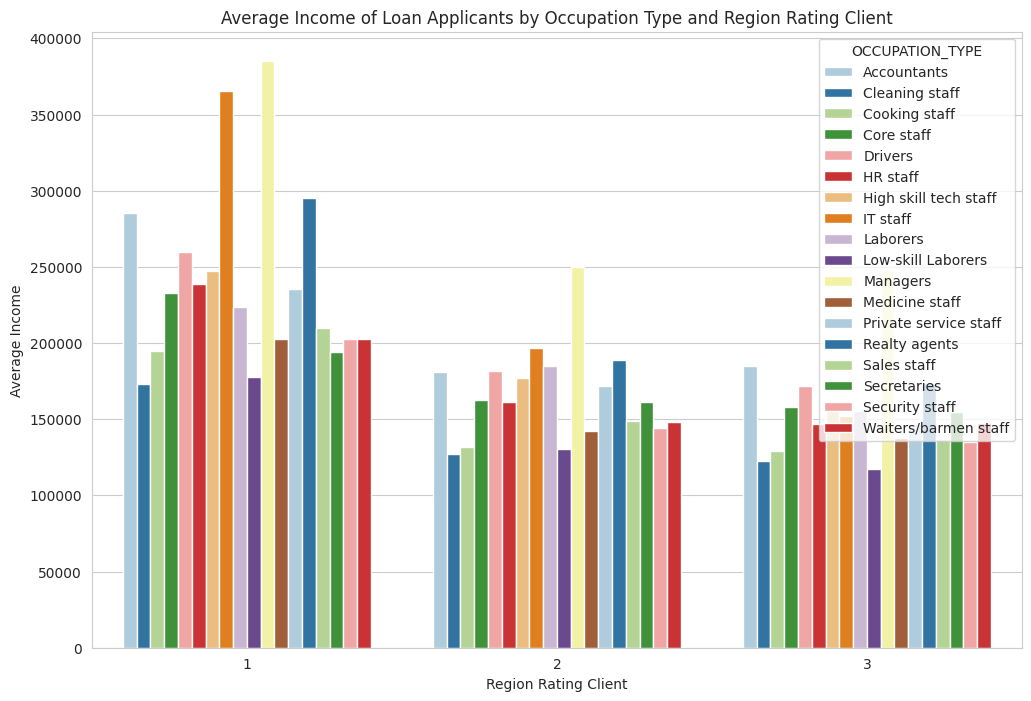

In [14]:
# Calculate the average income for each occupation type and region rating client
avg_income = application_train.groupby(['OCCUPATION_TYPE', 'REGION_RATING_CLIENT'])['AMT_INCOME_TOTAL'].mean().reset_index()

# Define the plot size
plt.figure(figsize=(12, 8))

# Plot the grouped bar chart
sns.barplot(x='REGION_RATING_CLIENT', y='AMT_INCOME_TOTAL', hue='OCCUPATION_TYPE', data=avg_income, palette='Paired')

plt.xlabel('Region Rating Client')
plt.ylabel('Average Income')
plt.title('Average Income of Loan Applicants by Occupation Type and Region Rating Client')
plt.show()

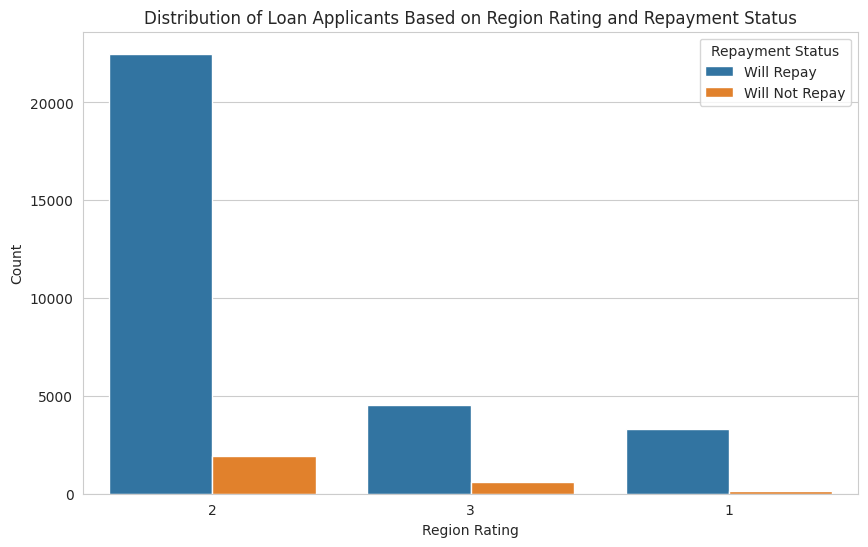

In [15]:
# create a stacked bar chart showing the number of loan applicants based on region rating and repayment status
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='REGION_RATING_CLIENT', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'],
                   order=application_train['REGION_RATING_CLIENT'].value_counts().index)
ax.set_xlabel('Region Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Region Rating and Repayment Status')

# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

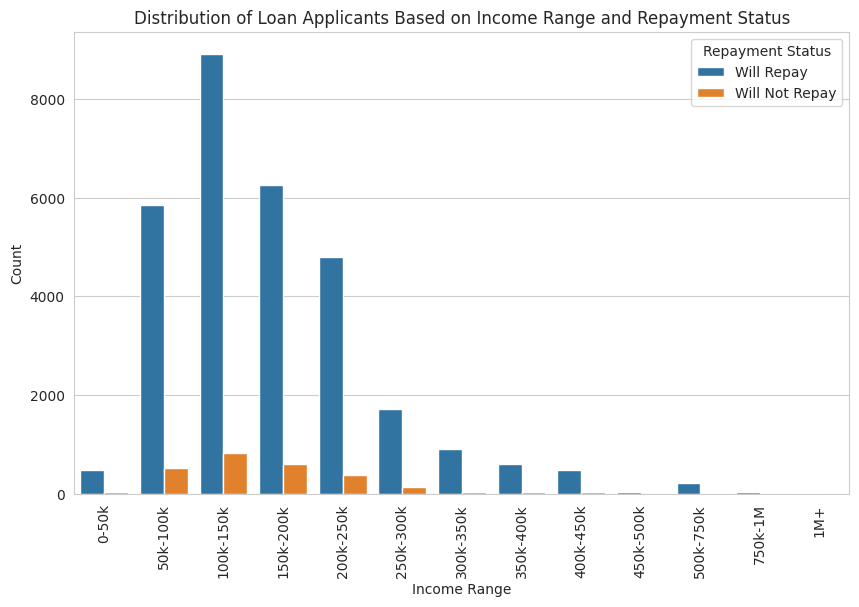

In [16]:
# Define the income range bins
income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 750000, 1000000, np.inf]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-750k', '750k-1M', '1M+']

# Create a new column 'INCOME_RANGE' by cutting the AMT_INCOME_TOTAL variable into bins
application_train['INCOME_RANGE'] = pd.cut(application_train['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='INCOME_RANGE', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Income Range')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Income Range and Repayment Status')
plt.xticks(rotation=90)

# Change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

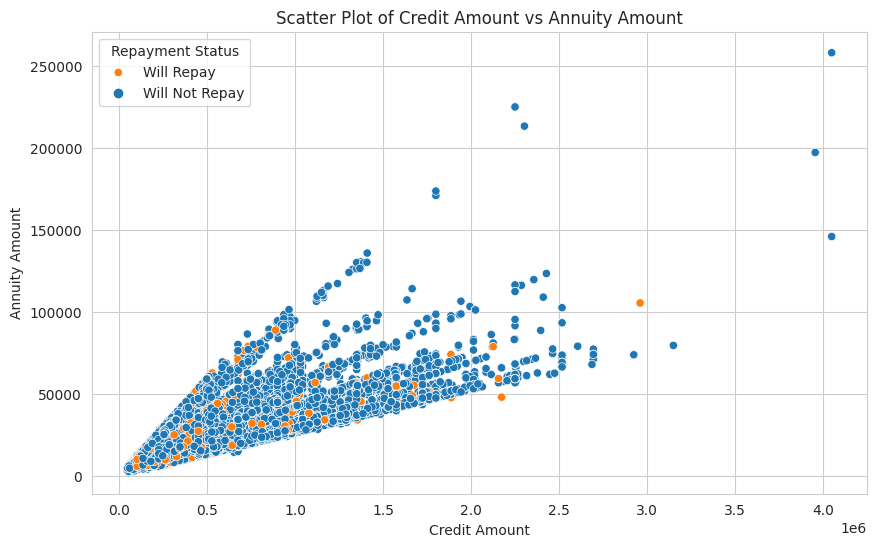

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=application_train, hue='TARGET', palette=['#1f77b4', '#ff7f0e'])
plt.xlabel('Credit Amount')
plt.ylabel('Annuity Amount')
plt.title('Scatter Plot of Credit Amount vs Annuity Amount')
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

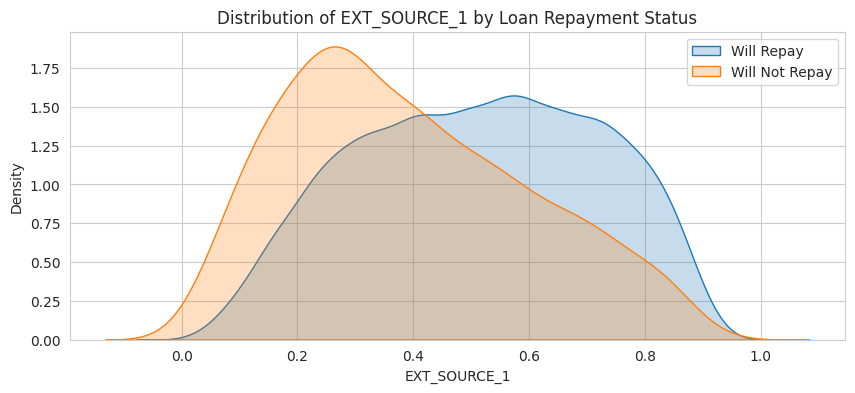

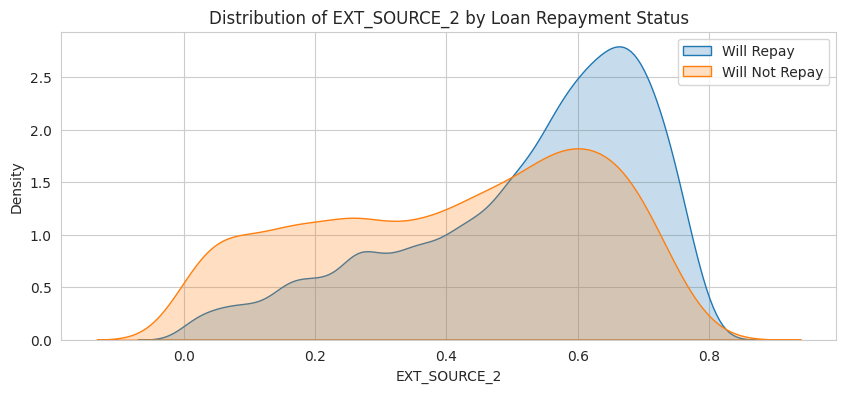

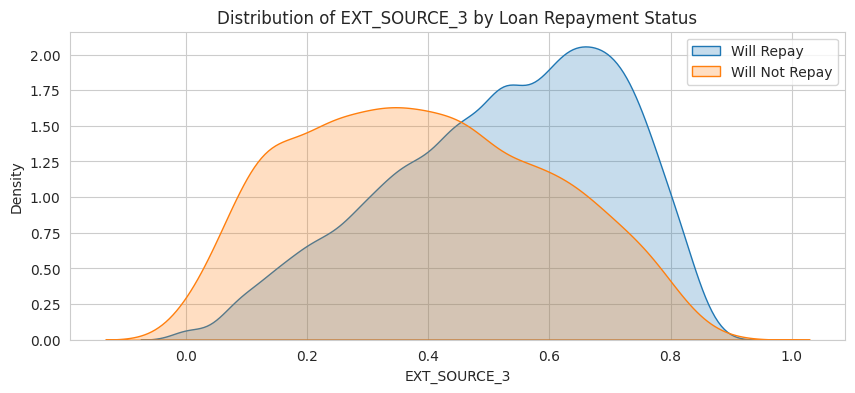

In [18]:
# create a list of EXT_SOURCE columns
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# create a kdeplot for each EXT_SOURCE column
for source in ext_sources:
    capable_ext_source = application_train[application_train['TARGET']==0][source]
    not_capable_ext_source = application_train[application_train['TARGET']==1][source]
    plt.figure(figsize=(10, 4))
    sns.kdeplot(capable_ext_source,label="Will Repay", color='#1f77b4', fill=True)
    sns.kdeplot(not_capable_ext_source,label="Will Not Repay", color='#ff7f0e', fill=True)
    plt.legend()
    plt.title('Distribution of {} by Loan Repayment Status'.format(source))
    plt.xlabel('{}'.format(source))
    plt.ylabel('Density')
    plt.show()

FLAG_DOCUMENT_2         1.0
FLAG_DOCUMENT_3     23488.0
FLAG_DOCUMENT_4         6.0
FLAG_DOCUMENT_5       514.0
FLAG_DOCUMENT_6      2867.0
FLAG_DOCUMENT_7         7.0
FLAG_DOCUMENT_8      2665.0
FLAG_DOCUMENT_9       122.0
FLAG_DOCUMENT_10        1.0
FLAG_DOCUMENT_11      139.0
FLAG_DOCUMENT_12        0.0
FLAG_DOCUMENT_13      110.0
FLAG_DOCUMENT_14       93.0
FLAG_DOCUMENT_15       29.0
FLAG_DOCUMENT_16      345.0
FLAG_DOCUMENT_17       10.0
FLAG_DOCUMENT_18      281.0
FLAG_DOCUMENT_19       25.0
FLAG_DOCUMENT_20       18.0
FLAG_DOCUMENT_21       13.0
dtype: float64


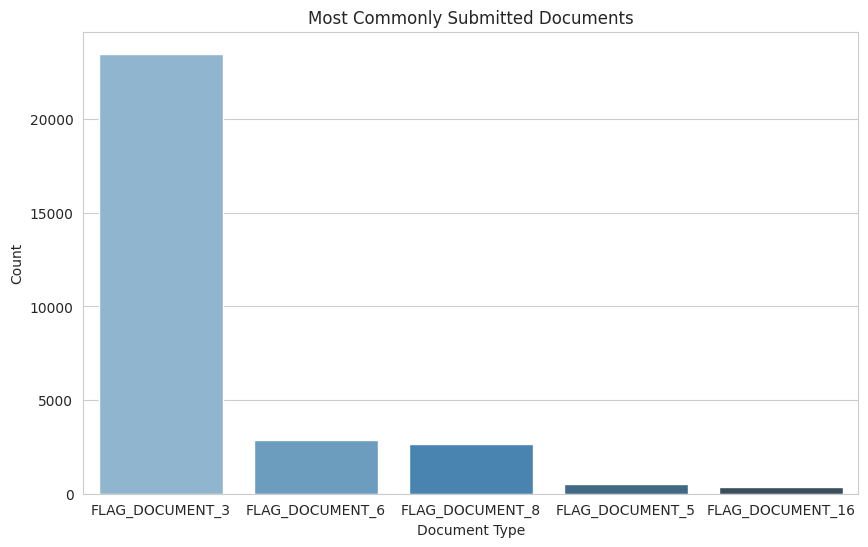

In [19]:
# Get the count of each document type
document_counts = application_train.loc[:, 'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].sum()

print(document_counts)
# Sort the values in descending order and get the top 5 most commonly submitted documents
top_documents = document_counts.sort_values(ascending=False)[:5]

# Create a bar plot of the top 5 documents
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_documents.index, y=top_documents.values, palette='Blues_d')
ax.set_xlabel('Document Type')
ax.set_ylabel('Count')
ax.set_title('Most Commonly Submitted Documents')
plt.show()

In [20]:
def cleaning(data):

    # Iterate through each column
    for col in data.columns:
        # If the column is numerical
        if data[col].dtype == 'int64':
        #   Fill missing values with 0
            data[col].fillna(0, inplace=True)
        elif data[col].dtype == 'float64':
            #   Fill missing values with 0
            data[col].fillna(0, inplace=True)

        # If the column is categorical
        elif data[col].dtype == 'object':
            # Fill missing values with 'Data_Not_Available'
            data[col].fillna('Data_Not_Available', inplace=True)
        else:
            print(col)

    # Replace XNA values in CODE_GENDER with 'M'
    data['CODE_GENDER'].replace('XNA','M',inplace=True)

    # Replace NAME_FAMILY_STATUS values of 'Unknown' with 'Married'
    data['NAME_FAMILY_STATUS'].replace('Unknown','Married', inplace=True)

    # Replace missing values in CNT_FAM_MEMBERS with the most frequent value
    data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].value_counts().idxmax(), inplace=True)

    # Fill missing values with 0 for AMT_ANNUITY and AMT_GOODS_PRICE
    data['AMT_ANNUITY'].fillna(0, inplace=True)
    data['AMT_GOODS_PRICE'].fillna(0, inplace=True)

    # Fill missing values with 'Unaccompanied' for NAME_TYPE_SUITE
    data['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

    # Fill missing values with 'Data_Not_Available' for OCCUPATION_TYPE
    data['OCCUPATION_TYPE'].fillna('Data_Not_Available', inplace=True)

    # Fill missing values with 0 for EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3
    data['EXT_SOURCE_1'].fillna(0, inplace=True)
    data['EXT_SOURCE_2'].fillna(0, inplace=True)
    data['EXT_SOURCE_3'].fillna(0, inplace=True)

    # Remove the OWN_CAR_AGE column
    data.drop('OWN_CAR_AGE', axis=1, inplace=True)

    return data

In [21]:
application_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0          100002       1         Cash loans           M            N   
1          100003       0         Cash loans           F            N   
2          100004       0    Revolving loans           M            Y   
3          100006       0         Cash loans           F            N   
4          100007       0         Cash loans           M            N   
...           ...     ...                ...         ...          ...   
33006      138251       0         Cash loans           F            Y   
33007      138252       0         Cash loans           F            N   
33008      138253       0         Cash loans           F            N   
33009      138254       0         Cash loans           M            Y   
33010      138255       0         Cash loans           F            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                   Y             0          202500.0    406597.5   
1                   N             0          270000.0   1293502.5   
2                   Y             0           67500.0    135000.0   
3                   Y             0          135000.0    312682.5   
4                   Y             0          121500.0    513000.0   
...               ...           ...               ...         ...   
33006               Y             0           90000.0    526491.0   
33007               Y             1          180000.0    284400.0   
33008               Y             0          234000.0    463500.0   
33009               Y             0          225000.0    679500.0   
33010               Y             0          202500.0   1339884.0   

       AMT_ANNUITY  ...  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0          24700.5  ...               0.0              0.0   
1          35698.5  ...               0.0              0.0   
2           6750.0  ...               0.0              0.0   
3          29686.5  ...               0.0              0.0   
4          21865.5  ...               0.0              0.0   
...            ...  ...               ...              ...   
33006      26878.5  ...               0.0              0.0   
33007      19134.0  ...               0.0              0.0   
33008      15448.5  ...               0.0              0.0   
33009      27076.5  ...               0.0              0.0   
33010      43353.0  ...               NaN              NaN   

      AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            NaN                       NaN   
4                            0.0                       0.0   
...                          ...                       ...   
33006                        0.0                       0.0   
33007                        0.0                       0.0   
33008                        0.0                       0.0   
33009                        0.0                       0.0   
33010                        NaN                       NaN   

      AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            NaN                       NaN   
4                            0.0                       0.0   
...                          ...                       ...   
33006                        1.0                       0.0   
33007                        0.0                       0.0   
33008                        0.0                       0.0   
33009                        0.0                       0.0   
33010                        NaN                       NaN   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0 

In [22]:
application_train = cleaning(application_train)
application_train.shape

CNT_CHILDREN_GROUP
INCOME_RANGE


(33011, 123)

In [23]:
def FE_application(data):

  # Feature Extraction
  data['CREDIT_PER_INCOME'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
  data['ANNUITY_PER_INCOME'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
  data['FAM_CNT_PER_INCOME'] = data['CNT_FAM_MEMBERS'] / data['AMT_INCOME_TOTAL']
  data['CREDIT_TERM'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
  data['OCCU_TYPE_PER_INCOME'] = data[['AMT_INCOME_TOTAL', 'OCCUPATION_TYPE']].groupby('OCCUPATION_TYPE').median()['AMT_INCOME_TOTAL'] / data['AMT_INCOME_TOTAL']
  data['EDU_TYPE_PER_INCOME'] = data[['AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE']].groupby('NAME_EDUCATION_TYPE').median()['AMT_INCOME_TOTAL'] / data['AMT_INCOME_TOTAL']
  data['ORG_TYPE_PER_INCOME'] = data[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL'] / data['AMT_INCOME_TOTAL']

  # Dropping FLAG_DOCUMENT
  data.drop(columns=[col for col in data.columns if 'FLAG_DOCUMENT' in col and col != 'FLAG_DOCUMENT_3'], inplace=True)

  # Dropping Living Area Columns
  cols_to_drop = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
                'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
                'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
                'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
                'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
                'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
                'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
                'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
                'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
                'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
  data.drop(columns=cols_to_drop, inplace=True)

  # One Hot Encoding
  cat_col = [category for category in data.columns if data[category].dtype == 'object']
  data = pd.get_dummies(data, columns= cat_col)

  return data

In [24]:
application_train = FE_application(application_train)
print(application_train.columns.values)

['SK_ID_CURR' 'TARGET' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH'
 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'HOUR_APPR_PROCESS_START'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'OBS_30_CNT_SOCIAL_CIRCLE'
 'DEF_30_CNT_SOCIAL_CIRCLE' 'OBS_60_CNT_SOCIAL_CIRCLE'
 'DEF_60_CNT_SOCIAL_CIRCLE' 'DAYS_LAST_PHONE_CHANGE' 'FLAG_DOCUMENT_3'
 'AMT_REQ_CREDIT_BUREAU_HOUR' 'AMT_REQ_CREDIT_BUREAU_DAY'
 'AMT_REQ_CREDIT_BUREAU_WEEK' 'AMT_REQ_CREDIT_BUREAU_MON'
 'AMT_REQ_CREDIT_BUREAU_QRT' 'AMT_REQ_CREDIT_BUREAU_YEAR'
 'CNT_CHILDREN_GROUP' 'INCOME_RANGE' 'CREDIT_PER_INCOME'
 'ANNUITY_

In [25]:
print(application_train.shape)

(33011, 175)


# *application_*{test}.csv

In [26]:
# Aperçu des données application_train
application_test = pd.read_csv("./data/application_test.csv")
print("Total line: ",application_test.shape[0])
print("Total column : ",application_test.shape[1])
application_test.head()

Total line:  32706
Total column :  121


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...              0.0              0.0              0.0              0.0   
1  ...              0.0              0.0              0.0              0.0   
2  ...              0.0              0.0              0.0              0.0   
3  ...              0.0              0.0              0.0              0.0   
4  ...              0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [27]:
# Cleaning application_test
application_test = cleaning(application_test)
application_test.shape

(32706, 120)

In [28]:
# FE application_test
application_test = FE_application(application_test)
print(application_test.columns.values)

['SK_ID_CURR' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT' 'AMT_ANNUITY'
 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH'
 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'HOUR_APPR_PROCESS_START'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'OBS_30_CNT_SOCIAL_CIRCLE'
 'DEF_30_CNT_SOCIAL_CIRCLE' 'OBS_60_CNT_SOCIAL_CIRCLE'
 'DEF_60_CNT_SOCIAL_CIRCLE' 'DAYS_LAST_PHONE_CHANGE' 'FLAG_DOCUMENT_3'
 'AMT_REQ_CREDIT_BUREAU_HOUR' 'AMT_REQ_CREDIT_BUREAU_DAY'
 'AMT_REQ_CREDIT_BUREAU_WEEK' 'AMT_REQ_CREDIT_BUREAU_MON'
 'AMT_REQ_CREDIT_BUREAU_QRT' 'AMT_REQ_CREDIT_BUREAU_YEAR'
 'CREDIT_PER_INCOME' 'ANNUITY_PER_INCOME' 'FAM_CNT_PER_INCOME'
 'CREDIT_TERM

In [29]:
application_test.shape

(32706, 172)

In [30]:
# Read the first dataset
df1 = application_train
# Read the second dataset
df2 = application_test

# Takes the difference in features between two datasets
diff_features = set(df1.columns) - set(df2.columns)

# Displays feature differences
print("Differences in features between the two datasets:")
for feature in diff_features:
    print(feature)

Differences in features between the two datasets:
INCOME_RANGE
TARGET
CNT_CHILDREN_GROUP


# bureau.csv

In [31]:
# preview data
bureau = pd.read_csv("./data/bureau.csv")
print("Number of lines : ",bureau.shape[0])
print("Number of columns : ",bureau.shape[1])
bureau.head()

Number of lines :  180228
Number of columns :  17


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit              -131.0          NaN  
1      Credit card               -20.0          NaN  
2  Consumer credit               -16.0          NaN  
3      Credit card               -16.0          NaN  
4  Consumer credit               -21.0          NaN

Features explanation:

- SK_ID_CURR : Id of application_train

- SK_ID_BUREAU : Id of bureau_balance

- CREDIT_ACTIVE : Debtor active status

- CREDIT_CURRENCY : Note currency

- DAYS_CREDIT : Submit credit period in days

- CREDIT_DAY_OVERDUE : The number of days overdue

- DAYS_CREDIT_ENDDATE : Remaining duration of credit when applying for Home Credit in days

- DAYS_ENDDATE_FACT : Days since the Credit Bureau credit ended when applying at Home Credit

- AMT_CREDIT_MAX_OVERDUE : The maximum amount in arrears at the Credit Bureau

- CNT_CREDIT_PROLONG : The number of times the Credit Bureau credit is extended

- AMT_CREDIT_SUM : The current number of credits in the Credit Bureau

- AMT_CREDIT_SUM_DEBT : The current amount owed at the Credit Bureau

- AMT_CREDIT_SUM_LIMIT : The credit limit on the current credit card at the Credit Bureau

- AMT_CREDIT_SUM_OVERDUE : The current amount in arrears at the Credit Bureau

- CREDIT_TYPE : Type of credit in the Credit Bureau (car, cash, etc)

- DAYS_CREDIT_UPDATE : Latest information coming from the Credit Bureau (in days)

- AMT_ANNUITY : A fixed number of payments credits in each payment

In [32]:
# View all features
print(bureau.columns.values)

['SK_ID_CURR' 'SK_ID_BUREAU' 'CREDIT_ACTIVE' 'CREDIT_CURRENCY'
 'DAYS_CREDIT' 'CREDIT_DAY_OVERDUE' 'DAYS_CREDIT_ENDDATE'
 'DAYS_ENDDATE_FACT' 'AMT_CREDIT_MAX_OVERDUE' 'CNT_CREDIT_PROLONG'
 'AMT_CREDIT_SUM' 'AMT_CREDIT_SUM_DEBT' 'AMT_CREDIT_SUM_LIMIT'
 'AMT_CREDIT_SUM_OVERDUE' 'CREDIT_TYPE' 'DAYS_CREDIT_UPDATE' 'AMT_ANNUITY']


In [33]:
# See missing values and duplicates
print("duplicate number : ",bureau.duplicated().sum()) # duplicate
null_count = bureau.isnull().sum() # total missing value
null_percent = bureau.isnull().mean() # presentase missing value

# merge check
null_df = pd.concat([null_count, null_percent], axis=1, keys=['Missing Values', '% Missing Values'])
null_df

duplicate number :  0


Missing Values  % Missing Values
SK_ID_CURR                           0          0.000000
SK_ID_BUREAU                         0          0.000000
CREDIT_ACTIVE                        0          0.000000
CREDIT_CURRENCY                      0          0.000000
DAYS_CREDIT                          0          0.000000
CREDIT_DAY_OVERDUE                   0          0.000000
DAYS_CREDIT_ENDDATE              11574          0.064219
DAYS_ENDDATE_FACT                67790          0.376135
AMT_CREDIT_MAX_OVERDUE          118274          0.656247
CNT_CREDIT_PROLONG                   0          0.000000
AMT_CREDIT_SUM                       0          0.000000
AMT_CREDIT_SUM_DEBT              27132          0.150543
AMT_CREDIT_SUM_LIMIT             63135          0.350306
AMT_CREDIT_SUM_OVERDUE               0          0.000000
CREDIT_TYPE                          0          0.000000
DAYS_CREDIT_UPDATE                   1          0.000006
AMT_ANNUITY                     130325          0.723112

In [34]:
bureau.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE        float64
AMT_ANNUITY               float64
dtype: object

In [35]:
corr_bureau=bureau.copy()
corr_bureau.drop("CREDIT_TYPE", axis=1, inplace=True)
corr_bureau.drop("CREDIT_ACTIVE", axis=1, inplace=True)
corr_bureau.drop("CREDIT_CURRENCY", axis=1, inplace=True)

Insight :

There are 2 columns where the number of missing exceeds 50%, namely AMT CREDIT MAX OVERDUE and AMT_ANNUITY and a column will be dropped


In [36]:
# Delete column with missing percentage > 50%
# AMT_CREDIT_MAX OVERDUE
bureau.drop("AMT_CREDIT_MAX_OVERDUE", axis=1, inplace=True)
# AMT_ANNUITY
bureau.drop("AMT_ANNUITY", axis=1, inplace=True)


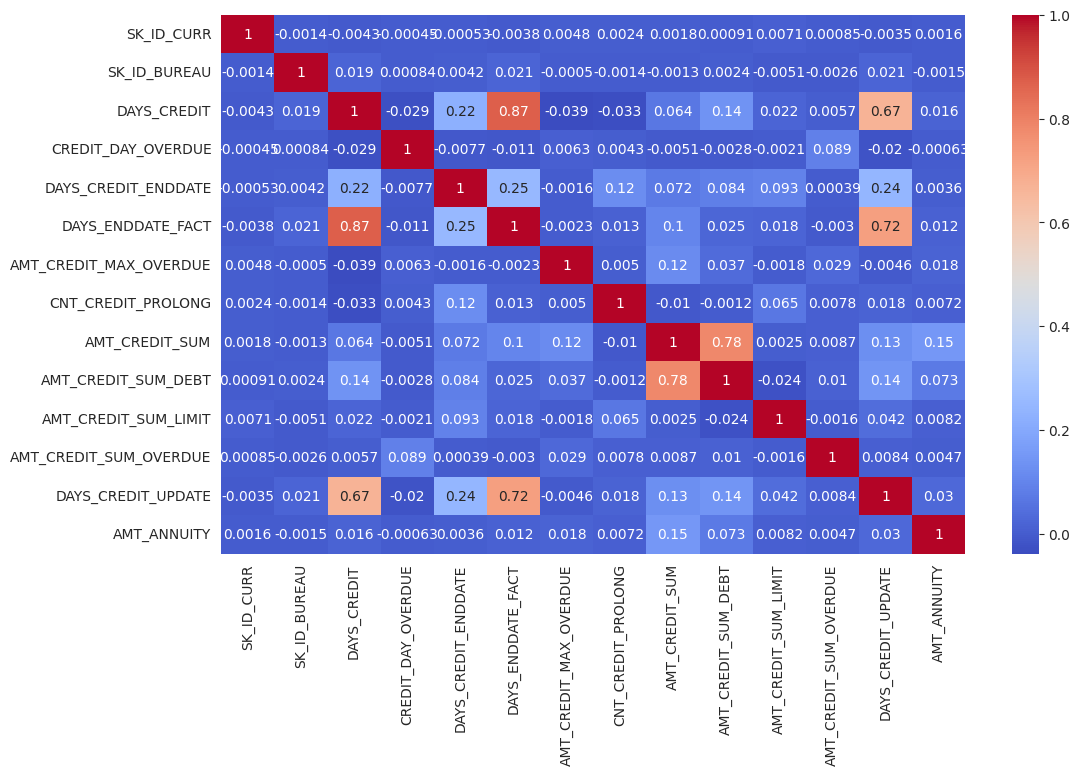

In [37]:
# Checking the correlation between features using a heatmap
corr = corr_bureau.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

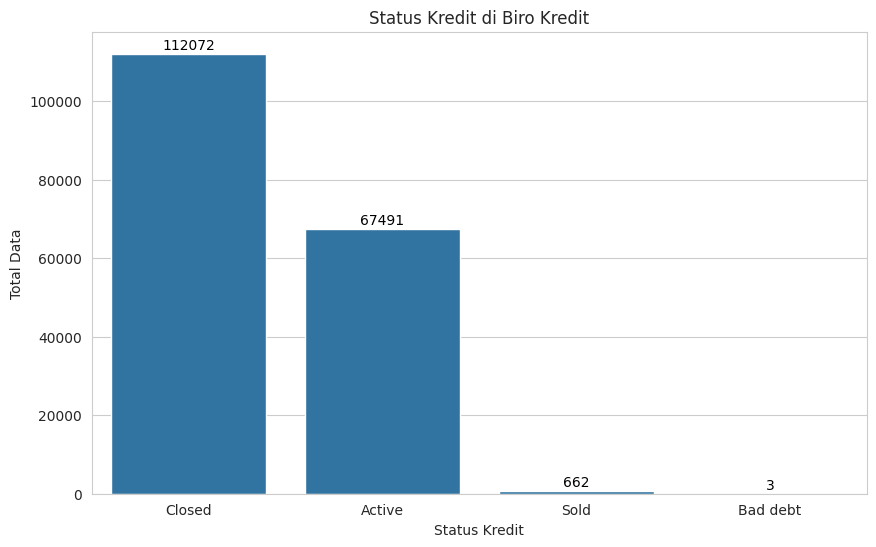

In [38]:
# Menampilkan status kredit
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CREDIT_ACTIVE', data=bureau, color='#1f77b4')
ax.set_xlabel('Status Kredit')
ax.set_ylabel('Total Data')
ax.set_title('Status Kredit di Biro Kredit')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

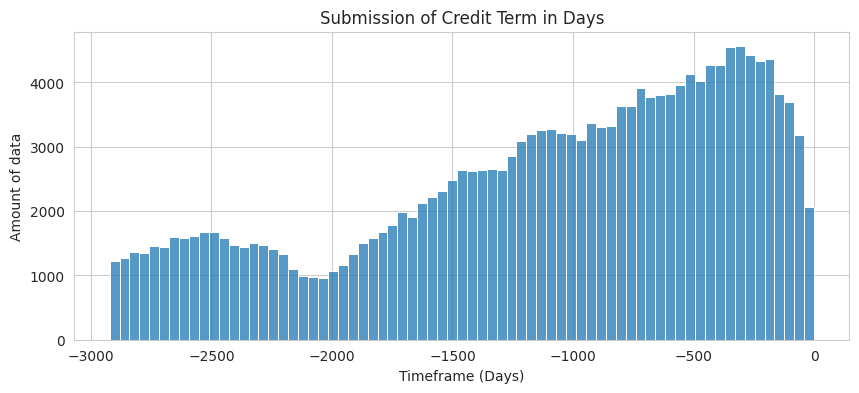

In [39]:
# View the filing of the credit period in days
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=bureau, x='DAYS_CREDIT', color='#1f77b4')
ax.set_xlabel('Timeframe (Days)')
ax.set_ylabel('Amount of data')
ax.set_title('Submission of Credit Term in Days')
plt.show()

Insights:

Most of the data shows that the debtor proposes a credit period between 0 and 500 days (more specifically < 1 year) until the end of the repayment period. The longer the submission period shows the greater the credit score.

### Analysis : CREDIT_DAY_OVERDUE

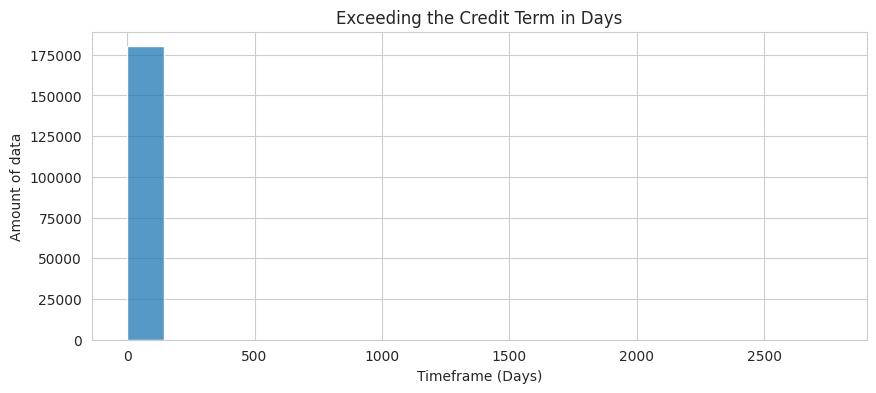

In [40]:
# View the number of days that exceed the timeframe
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=bureau, x='CREDIT_DAY_OVERDUE', color='#1f77b4')
ax.set_xlabel('Timeframe (Days)')
ax.set_ylabel('Amount of data')
ax.set_title('Exceeding the Credit Term in Days')
plt.show()

In [41]:
bureau['CREDIT_DAY_OVERDUE'].value_counts()

0       179772
30          35
9           19
8           18
60          12
         ...  
227          1
1694         1
93           1
634          1
2620         1
Name: CREDIT_DAY_OVERDUE, Length: 192, dtype: int64

In [42]:
# Counting the amount of overdue data
jumlah_overdue = 0
for i in bureau['CREDIT_DAY_OVERDUE']:
  if i > 0:
    jumlah_overdue += 1
print('The number of debtors that exceed the time period is :',jumlah_overdue)

The number of debtors that exceed the time period is : 456


Insights:

Most debtors pay on time, but there are some who pay more than the existing agreement, which is around 4217 data.

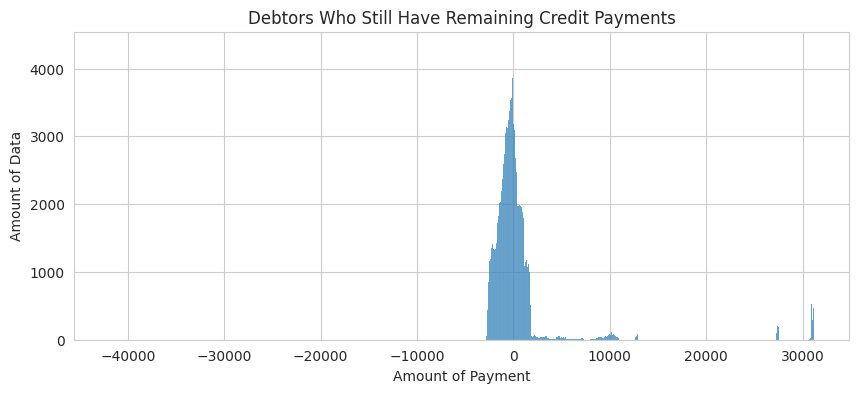

In [43]:
# See debtors who still have remaining payments
sns. set_style('whitegrid')
plt. figure(figsize=(10, 4))
ax = sns.histplot(data=bureau, x='DAYS_CREDIT_ENDDATE', color='#1f77b4')
ax.set_xlabel('Amount of Payment')
ax.set_ylabel('Amount of Data')
ax.set_title('Debtors Who Still Have Remaining Credit Payments')
plt. show()

In [44]:
# Fill in the missing values DAYS_CREDIT_ENDDATE & DAYS_ENDDATE_FACT with the mean
bureau['DAYS_CREDIT_ENDDATE'].fillna(bureau['DAYS_CREDIT_ENDDATE'].mean(), inplace=True)
bureau['DAYS_ENDDATE_FACT'].fillna(bureau['DAYS_ENDDATE_FACT'].mean(), inplace=True)

It can be seen that there are some debtors who still have remaining credit payments when applying for credit at Home Credit


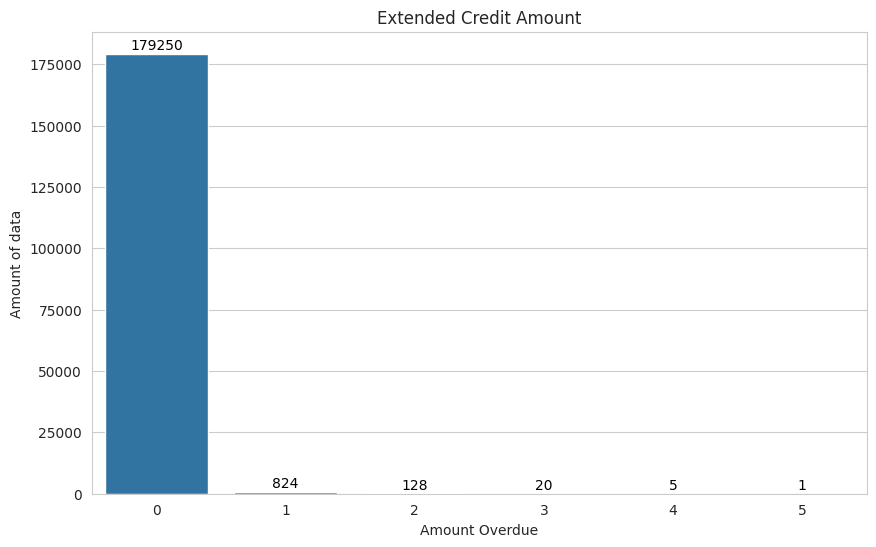

In [45]:
# See the amount of credit extension
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CNT_CREDIT_PROLONG', data=bureau, color='#1f77b4')
ax.set_xlabel('Amount Overdue')
ax.set_ylabel('Amount of data')
ax.set_title('Extended Credit Amount')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

Most debtors do not extend credit. However, there are thousands of debtors who extend 1-2 times, and there are hundreds of debtors who extend up to 3 times.


### Analysis : CREDIT_TYPE


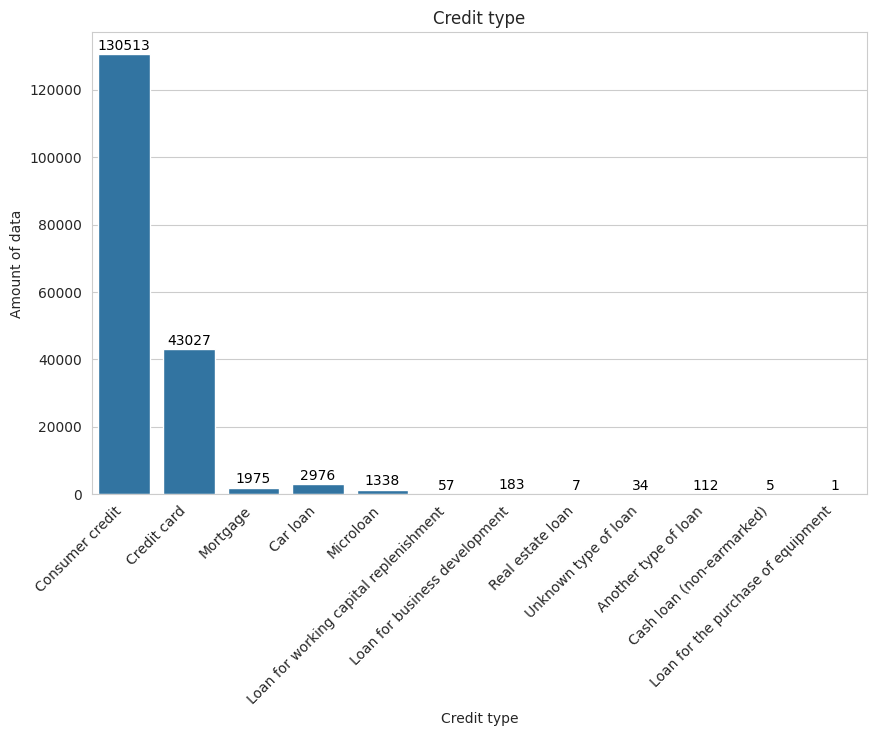

In [46]:
# See the debtor's credit type
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CREDIT_TYPE', data=bureau, color='#1f77b4')
ax.set_xlabel('Credit type')
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Amount of data')
ax.set_title('Credit type')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

Customer credit and credit cards are the most common types of credit registered with the Credit Bureau.


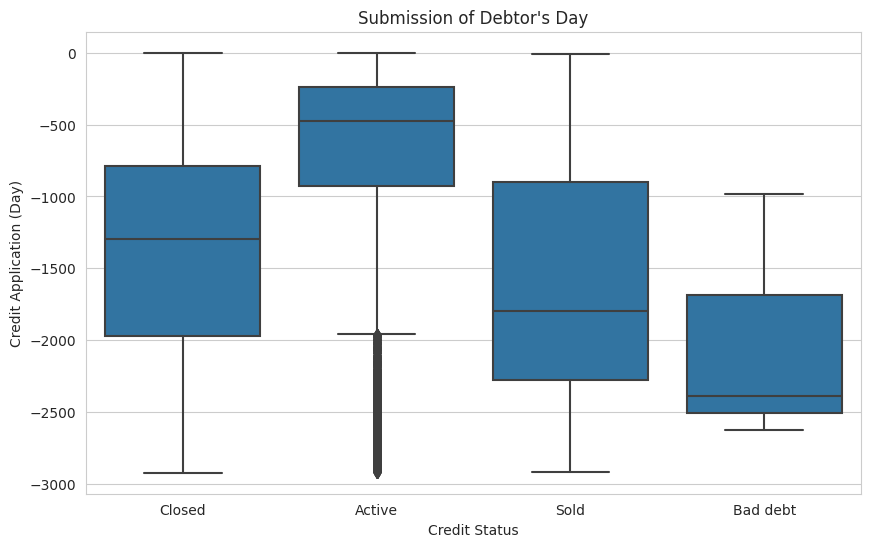

In [47]:
# See credit applications in days with active credit status
sns. set_style('whitegrid')
plt. figure(figsize=(10, 6))
ax = sns.boxplot(data=bureau, x="CREDIT_ACTIVE", y="DAYS_CREDIT", color='#1f77b4')
ax.set_xlabel('Credit Status')
ax.set_ylabel('Credit Application (Day)')
ax.set_title("Submission of Debtor's Day")
plt. show()

Active credit has a median of 500, meaning that the number of days submitted is centered on 500 days.


### Analysis : DAYS_CREDIT vs AMT_CREDIT_SUM


In [48]:
# Identifies AMT_CREDIT_SUM records that exceed 200000000
urutan = 0
index_outlier = []
for i in bureau['AMT_CREDIT_SUM']:
  if i > 200000000:
    index_outlier.append(urutan)
  urutan += 1
print(index_outlier)

[]


In [49]:
# Viewing outlier data rows based on index
bureau.iloc[index_outlier]

Empty DataFrame
Columns: [SK_ID_CURR, SK_ID_BUREAU, CREDIT_ACTIVE, CREDIT_CURRENCY, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_TYPE, DAYS_CREDIT_UPDATE]
Index: []

In [50]:
# Removes outlier rows
bureau.drop(index_outlier, inplace=True)

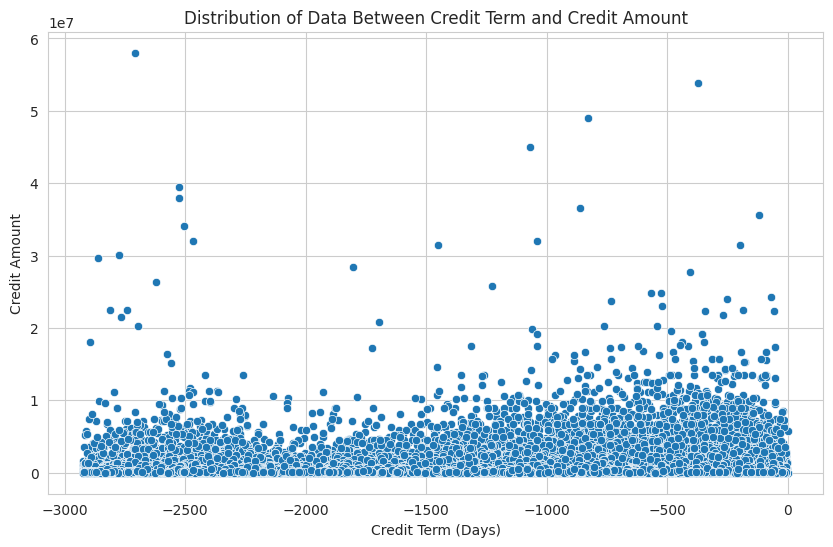

In [51]:
# Look at the credit period and the amount of credit taken
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="DAYS_CREDIT", y="AMT_CREDIT_SUM", color='#1f77b4')
ax.set_xlabel('Credit Term (Days)')
ax.set_ylabel('Credit Amount')
ax.set_title('Distribution of Data Between Credit Term and Credit Amount')
plt.show()

Most credit amounts are under 25,000,000 with various terms.


### Analysis : CREDIT_ACTIVE vs CREDIT_DAY_OVERDUE


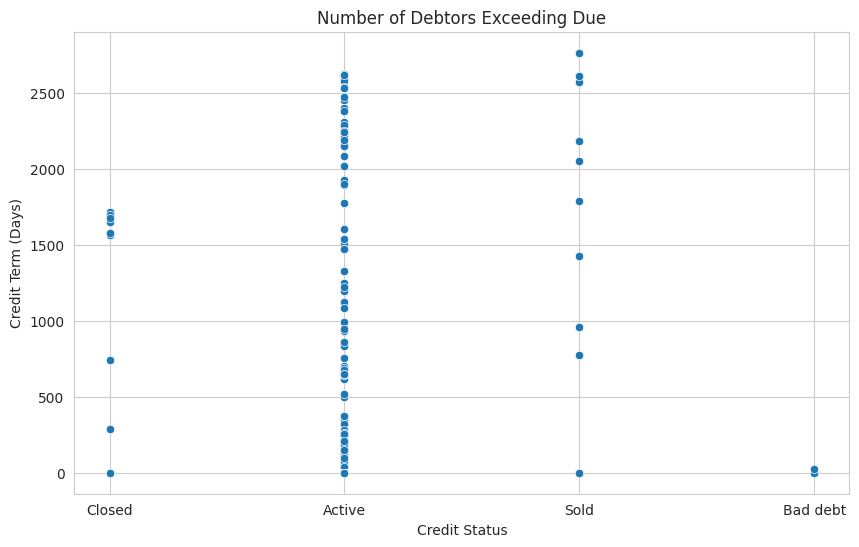

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="CREDIT_ACTIVE", y="CREDIT_DAY_OVERDUE", color='#1f77b4')
ax.set_xlabel('Credit Status')
ax.set_ylabel('Credit Term (Days)')
ax.set_title('Number of Debtors Exceeding Due')
plt.show()

In [53]:
# Counting the amount of overdue data
jumlah_overdue = 0
for i in bureau['CREDIT_DAY_OVERDUE']:
  if i > 0:
    jumlah_overdue += 1
print('The number of debtors that exceed the time period is :',jumlah_overdue)

The number of debtors that exceed the time period is : 456


There are still many debtors whose payments still exceed the existing due date


In [54]:
urutan = 0
index_outlier = []
for i in bureau['DAYS_ENDDATE_FACT']:
  if i < -3000:
    index_outlier.append(urutan)
  urutan += 1
print(index_outlier)

[]


In [55]:
# see outlier data rows based on index
bureau.iloc[index_outlier]

Empty DataFrame
Columns: [SK_ID_CURR, SK_ID_BUREAU, CREDIT_ACTIVE, CREDIT_CURRENCY, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_TYPE, DAYS_CREDIT_UPDATE]
Index: []

In [56]:
# Removes outlier rows
bureau.drop(index_outlier, inplace=True)

Many debtors complete the credit time according to the initial credit application.


### Analysis : CREDIT_ACTIVE vs AMT_CREDIT_SUM_OVERDUE


Number of debtors who still have outstanding credit=  453


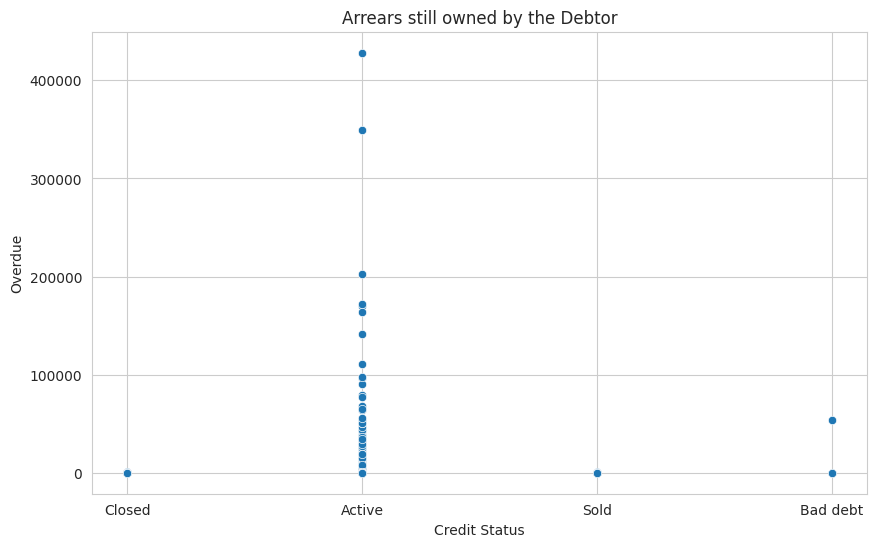

In [57]:
# See the number of debtors who have arrears
total_kredit = 0
for i in bureau['AMT_CREDIT_SUM_OVERDUE']:
  if (i > 0):
    total_kredit += 1
  elif (i == None):
    total_kredit += 0
print('Number of debtors who still have outstanding credit= ', total_kredit)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="CREDIT_ACTIVE", y="AMT_CREDIT_SUM_OVERDUE", color='#1f77b4')
ax.set_xlabel('Credit Status')
ax.set_ylabel('Overdue')
ax.set_title('Arrears still owned by the Debtor')
plt.show()

In [58]:
urutan = 0
index_outlier = []
for i in bureau['AMT_CREDIT_SUM_DEBT']:
  if i > 75000000:
    index_outlier.append(urutan)
  urutan += 1
print(index_outlier)

[]


In [59]:
# Viewing outlier data rows based on index
bureau.iloc[index_outlier]

Empty DataFrame
Columns: [SK_ID_CURR, SK_ID_BUREAU, CREDIT_ACTIVE, CREDIT_CURRENCY, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_TYPE, DAYS_CREDIT_UPDATE]
Index: []

In [60]:
# Removes outlier rows
bureau.drop(index_outlier, inplace=True)

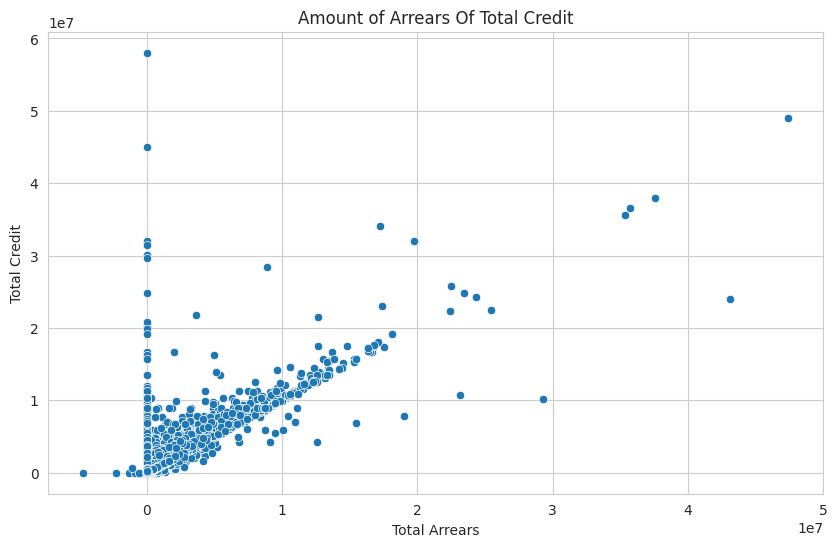

In [61]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="AMT_CREDIT_SUM_DEBT", y="AMT_CREDIT_SUM", color='#1f77b4')
ax.set_xlabel('Total Arrears')
ax.set_ylabel('Total Credit')
ax.set_title('Amount of Arrears Of Total Credit')
plt.show()

The number of debtors who still have arrears is still large, namely there are around 4,000 data


### Data Preparation


In [62]:
# Resetting the index on the dataset
bureau = bureau.reset_index(drop=True)

In [63]:
bureau.isnull().sum()

SK_ID_CURR                    0
SK_ID_BUREAU                  0
CREDIT_ACTIVE                 0
CREDIT_CURRENCY               0
DAYS_CREDIT                   0
CREDIT_DAY_OVERDUE            0
DAYS_CREDIT_ENDDATE           0
DAYS_ENDDATE_FACT             0
CNT_CREDIT_PROLONG            0
AMT_CREDIT_SUM                0
AMT_CREDIT_SUM_DEBT       27132
AMT_CREDIT_SUM_LIMIT      63135
AMT_CREDIT_SUM_OVERDUE        0
CREDIT_TYPE                   0
DAYS_CREDIT_UPDATE            1
dtype: int64

AMT_CREDIT_SUM = AMT_CREDIT_SUM_DEBT + AMT_CREDIT_SUM_LIMIT
If the credit status is closed then AMT_CREDIT_SUM_DEBT=0 && AMT_CREDIT_SUM_LIMIT=0
If the status is closed then DAYS_CREDIT_ENDDATE=DAYS_CREDIT_UPDATE

In [64]:
# Resolving missing AMT_CREDIT_SUM with AMT_CREDIT_SUM_DEBT
bureau['AMT_CREDIT_SUM'].fillna(bureau['AMT_CREDIT_SUM_DEBT'], inplace=True)

bureau['AMT_CREDIT_SUM'].isnull().sum()

0

In [65]:
# Overcome missing AMT_CREDIT_SUM_LIMIT
mask1 = (bureau['CREDIT_ACTIVE'] == 'Closed') & (bureau['AMT_CREDIT_SUM_LIMIT'].isnull()) & (bureau['AMT_CREDIT_SUM_DEBT'].isnull())
bureau.loc[mask1, ['AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT']] = 0

mask2 = (bureau['AMT_CREDIT_SUM_LIMIT'].isnull()) & (~bureau['AMT_CREDIT_SUM_DEBT'].isnull())
bureau.loc[mask2, 'AMT_CREDIT_SUM_LIMIT'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']

mask3 = bureau['AMT_CREDIT_SUM_LIMIT'].isnull()
bureau.loc[mask3, ['AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT']] = 0

bureau['AMT_CREDIT_SUM_LIMIT'].isnull().sum()

0

In [66]:
# AMT_CREDIT_SUM_DEBT
bureau.loc[bureau['AMT_CREDIT_SUM'].isnull(), 'AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM_DEBT']

# Set AMT_CREDIT_SUM_LIMIT and AMT_CREDIT_SUM_DEBT to 0 for closed accounts with missing values
closed_mask = (bureau['CREDIT_ACTIVE'] == 'Closed')
missing_limit_mask = (bureau['AMT_CREDIT_SUM_LIMIT'].isnull()) & (bureau['AMT_CREDIT_SUM_DEBT'].isnull())
bureau.loc[closed_mask & missing_limit_mask, ['AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT']] = 0

# Calculate AMT_CREDIT_SUM_LIMIT for accounts with missing values
missing_limit_mask = (bureau['AMT_CREDIT_SUM_LIMIT'].isnull()) & (~bureau['AMT_CREDIT_SUM_DEBT'].isnull())
bureau.loc[missing_limit_mask, 'AMT_CREDIT_SUM_LIMIT'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']

# Set AMT_CREDIT_SUM_DEBT for missing values
bureau.loc[bureau['AMT_CREDIT_SUM_DEBT'].isnull(), 'AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_LIMIT']


bureau['AMT_CREDIT_SUM_DEBT'].isnull().sum()

0

In [67]:
bureau.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        1
dtype: int64

In [68]:
def koversi_kode_tipe_kredit(x):
    if x == 'Closed':
        y = 0
    elif x=='Active':
        y = 1
    else:
        y = 2
    return y


def FE_bureau(bureau):
    # Credit Duration
    bureau['CREDIT_DURATION'] = -bureau['DAYS_CREDIT'] + bureau['DAYS_CREDIT_ENDDATE']
    # Remaining credit duration
    bureau['ENDDATE_DIFF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
    # Long time last updated
    bureau['UPDATE_DIFF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_CREDIT_UPDATE']
    # Remaining debt
    bureau['DEBT_CREDIT_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']
    # Remaining arrears
    bureau['CREDIT_OVERDUE_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_OVERDUE']
    # Past loan amount per customer
    no_loans_per_customer = bureau[['SK_ID_CURR', 'SK_ID_BUREAU']].groupby(by = \
                                                                    ['SK_ID_CURR'])['SK_ID_BUREAU'].count()
    no_loans_per_customer = no_loans_per_customer.reset_index().rename(columns={'SK_ID_BUREAU': 'CUSTOMER_LOAN_COUNT'})
    bureau = bureau.merge(no_loans_per_customer, on='SK_ID_CURR', how='left')
    # Number of past loan types per customer
    credit_types_per_customer = bureau[['SK_ID_CURR','CREDIT_TYPE']].groupby(by=['SK_ID_CURR'])['CREDIT_TYPE'].nunique()
    credit_types_per_customer = credit_types_per_customer.reset_index().rename(columns={'CREDIT_TYPE':'CUSTOMER_CREDIT_TYPES'})
    bureau = bureau.merge(credit_types_per_customer, on='SK_ID_CURR',how='left')
    # Average number of past loans per type of loan per customer
    bureau['AVG_LOAN_TYPE'] = bureau['CUSTOMER_LOAN_COUNT'] / bureau['CUSTOMER_CREDIT_TYPES']
    bureau['CREDIT_TYPE_CODE'] = bureau.apply(lambda x:\
                                        koversi_kode_tipe_kredit(x.CREDIT_ACTIVE), axis=1)
    customer_credit_code_mean = bureau[['SK_ID_CURR','CREDIT_TYPE_CODE']].groupby(by=['SK_ID_CURR'])['CREDIT_TYPE_CODE'].mean()
    customer_credit_code_mean.reset_index().rename(columns={'CREDIT_TYPE_CODE':'CUSTOMER_CREDIT_CODE_MEAN'})
    bureau = bureau.merge(customer_credit_code_mean, on='SK_ID_CURR', how='left')

    return bureau

In [69]:
bureau = FE_bureau(bureau)

In [70]:
bureau.shape

(180228, 25)

# bureau_balance.csv

This is a dataset of the monthly credit balance records at the Credit Bureau.

In [71]:
# See previews of data
bureau_balance = pd.read_csv("./data/bureau_balance.csv")
print("Number of lines : ",bureau_balance.shape[0])
print("Number of columns : ",bureau_balance.shape[1])
bureau_balance.head()

Number of lines :  1296516
Number of columns :  3


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448             0.0      C
1       5715448            -1.0      C
2       5715448            -2.0      C
3       5715448            -3.0      C
4       5715448            -4.0      C

In [72]:
# View missing values & duplicates
print("Number of Duplicates : ",bureau_balance.duplicated().sum()) # Duplicates
null_count = bureau_balance.isnull().sum() # number of missing values
null_percent = bureau_balance.isnull().mean() # presentase missing value

# checking
null_df = pd.concat([null_count, null_percent], axis=1, keys=['Missing Values', '% Missing Values'])
null_df

Number of Duplicates :  0


Missing Values  % Missing Values
SK_ID_BUREAU                 0      0.000000e+00
MONTHS_BALANCE               1      7.712978e-07
STATUS                       1      7.712978e-07

### Exploratory Data Analysis


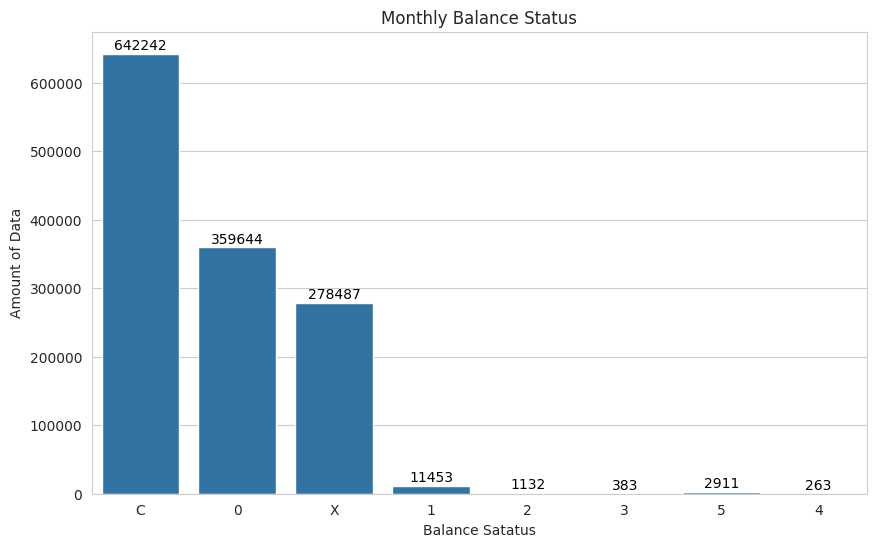

In [73]:
# View the status of the debtor's monthly balance
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='STATUS', data=bureau_balance, color='#1f77b4')
ax.set_xlabel('Balance Satatus')
ax.set_ylabel('Amount of Data')
ax.set_title('Monthly Balance Status')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

* C means closed
* X means unknown status
* 0 means no DPD (Day Past Due=Number of days in arrears)
* 1 means the maximum is done during the month between 1-30
* 2 means DPD 31-60
* 3 means DPD 61-90
* 4 means DPD 91-120
* 5 means DPD 120+ or sold or written off

Insights:

Most of the loans that have been closed later have 0 arrears and unknown debtor status

### Feature Engineering


In [74]:
# Aggregates bureau balance data (MONTHS_BALANCE :mean), (STATUS :mode)
from statistics import mode
MONTHS_BALANCE = bureau_balance.groupby('SK_ID_BUREAU').agg({'MONTHS_BALANCE':'mean'})
MONTHS_BALANCE.reset_index(inplace=True)
STATUS = bureau_balance.groupby('SK_ID_BUREAU')['STATUS'].aggregate(lambda x : mode(x))

In [75]:
# Merge the aggregate results of the MONTHS BALANCE and STATUS features
bureau_balance = MONTHS_BALANCE.merge(STATUS, how='left', on='SK_ID_BUREAU')
bureau_balance

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0             58726             NaN    NaN
1           5001726           -19.0      C
2           5001728             0.0      0
3           5001729            -3.0      0
4           5001730           -30.0      C
...             ...             ...    ...
38225       6834516            -3.5      C
38226       6834517            -5.5      0
38227       6834621           -28.5      X
38228       6834628           -26.5      C
38229       6834663           -43.5      0

[38230 rows x 3 columns]

Merge Bureau and Bureau Balance


In [76]:
# Merge bureau(belum aggregat) & bureau_balance(selesai aggregat)
bureau_merge = bureau.merge(bureau_balance, how='left', on='SK_ID_BUREAU')
bureau_merge.drop(['SK_ID_BUREAU'], axis=1, inplace= True)

In [77]:
bureau_merge

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0           215354        Closed      currency 1         -497   
1           215354        Active      currency 1         -208   
2           215354        Active      currency 1         -203   
3           215354        Active      currency 1         -203   
4           215354        Active      currency 1         -629   
...            ...           ...             ...          ...   
180223      263453        Closed      currency 1        -2217   
180224      393801        Active      currency 1         -153   
180225      393801        Active      currency 1         -612   
180226      275109        Closed      currency 1        -1327   
180227      262075        Closed      currency 1        -1225   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                        0          -153.000000        -153.000000   
1                        0          1075.000000       -1000.119008   
2                        0           528.000000       -1000.119008   
3                        0           537.131168       -1000.119008   
4                        0          1197.000000       -1000.119008   
...                    ...                  ...                ...   
180223                   0         -1995.000000       -1995.000000   
180224                   0          -123.000000       -1000.119008   
180225                   0           118.000000       -1000.119008   
180226                   0          2173.000000        -281.000000   
180227                   0           624.000000       -1203.000000   

        CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  ...  \
0                        0         91323.0                  0.0  ...   
1                        0        225000.0             171342.0  ...   
2                        0        464323.5                  0.0  ...   
3                        0         90000.0                  0.0  ...   
4                        0       2700000.0                  0.0  ...   
...                    ...             ...                  ...  ...   
180223                   0         30420.0                  0.0  ...   
180224                   0         67500.0              63630.0  ...   
180225                   0         93712.5              29218.5  ...   
180226                   0       2239650.0                  0.0  ...   
180227                   0        270000.0                  0.0  ...   

        UPDATE_DIFF  DEBT_CREDIT_DIFF CREDIT_OVERDUE_DIFF  \
0        -22.000000           91323.0             91323.0   
1       1095.000000           53658.0            225000.0   
2        544.000000          464323.5            464323.5   
3        553.131168           90000.0             90000.0   
4       1218.000000         2700000.0           2700000.0   
...             ...               ...                 ...   
180223    -1.000000           30420.0             30420.0   
180224   -75.000000            3870.0             67500.0   
180225   153.000000           64494.0             93712.5   
180226  2408.000000         2239650.0           2239650.0   
180227          NaN          270000.0            270000.0   

        CUSTOMER_LOAN_COUNT  CUSTOMER_CREDIT_TYPES  AVG_LOAN_TYPE  \
0                         7                      2            3.5   
1                         7                      2            3.5   
2                         7                      2            3.5   
3                         7                      2            3.5   
4                         7                      2            3.5   
...                     ...                    ...            ...   
180223                    1                      1            1.0   
180224                    2                      2            1.0   
180225                    2                      2            1.0   
180226                    1                      1            1.0   
180227                    1  

In [78]:
# Fill in the missing value MONTHS_BALANCE = 0 (0 is considered the most recent data)
# Fill in the missing value STATUS = X (X means unknown status)
bureau_merge['MONTHS_BALANCE'].fillna(0, inplace=True)
bureau_merge['STATUS'].fillna('X', inplace=True)

In [79]:
# Looking back missing
bureau_merge.isnull().sum()
# Features in bureau_merge to be aggregated with the mean
columns_bureau_merge = {'DAYS_CREDIT' :'mean',
                        'CREDIT_DAY_OVERDUE' :'mean',
                        'DAYS_CREDIT_ENDDATE' :'mean',
                        'DAYS_ENDDATE_FACT' :'mean',
                        'AMT_CREDIT_SUM' :'mean',
                        'AMT_CREDIT_SUM_DEBT' :'mean',
                        'AMT_CREDIT_SUM_LIMIT' :'mean',
                        'AMT_CREDIT_SUM_OVERDUE' :'mean',
                        'DAYS_CREDIT_UPDATE' :'mean',
                        'CREDIT_DURATION' :'mean',
                        'ENDDATE_DIFF' :'mean',
                        'UPDATE_DIFF' :'mean',
                        'DEBT_CREDIT_DIFF' :'mean',
                        'CREDIT_OVERDUE_DIFF' :'mean',
                        'CUSTOMER_LOAN_COUNT' :'mean',
                        'AVG_LOAN_TYPE' :'mean',
                        'MONTHS_BALANCE' :'mean'}
# Features in the bureau merge that will be disaggregated by mode
columns_bureau_merge_mode = ['CREDIT_ACTIVE',
                        'CREDIT_CURRENCY',
                        'CNT_CREDIT_PROLONG',
                        'CREDIT_TYPE',
                        'CUSTOMER_CREDIT_TYPES',
                        'CREDIT_TYPE_CODE_x',
                        'CREDIT_TYPE_CODE_y',
                        'STATUS']

In [80]:
# Aggregation of features by mean
bureau_full_mean = bureau_merge.groupby('SK_ID_CURR').agg({**columns_bureau_merge})
# Aggregation of features by modes
for col in columns_bureau_merge_mode:
  bureau_full_mode = bureau_merge.groupby('SK_ID_CURR')[col].aggregate(lambda x : mode(x))
  bureau_full = bureau_full_mean.merge(bureau_full_mode, how='left', on='SK_ID_CURR')
bureau_full.reset_index(inplace=True)

In [81]:
bureau_full


SK_ID_CURR  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
0          100016  -677.833333                 0.0          -394.166667   
1          100017 -1944.333333                 0.0         -1512.333333   
2          100030  -949.000000                 0.0           176.826234   
3          100042 -2723.000000                 0.0         -1627.000000   
4          100049  -887.500000                 0.0          -188.811472   
...           ...          ...                 ...                  ...   
41635      456196 -1954.000000                 0.0          -128.000000   
41636      456217 -1090.333333                 0.0          -140.666667   
41637      456241 -2180.000000                 0.0         -1450.000000   
41638      456243  -842.800000                 0.0          -226.347533   
41639      456247  -874.285714                 0.0          1349.000000   

       DAYS_ENDDATE_FACT  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0            -964.892837    67914.000000         10620.750000   
1           -1677.833333   143295.000000             0.000000   
2            -743.647603   124986.114000         90328.500000   
3           -1931.000000   675000.000000             0.000000   
4           -1003.912672   123207.975000         75341.250000   
...                  ...             ...                  ...   
41635       -1238.000000   328500.000000             0.000000   
41636       -1068.079339   514200.000000        212497.500000   
41637       -1000.119008   225000.000000             0.000000   
41638        -781.447603   308770.200000        249490.800000   
41639        -925.462574   677874.857143        313341.428571   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
0                 9749.2500                     0.0         -465.833333   
1                    0.0000                     0.0        -1594.333333   
2                 5131.2060                     0.0         -337.800000   
3                    0.0000                     0.0        -1325.500000   
4                 1388.1225                     0.0         -432.166667   
...                     ...                     ...                 ...   
41635                0.0000                     0.0         -678.000000   
41636           271156.5000                     0.0         -406.666667   
41637                0.0000                     0.0        -1450.000000   
41638             7009.2000                     0.0         -400.800000   
41639                0.0000                     0.0         -606.857143   

       CREDIT_DURATION  ENDDATE_DIFF  UPDATE_DIFF  DEBT_CREDIT_DIFF  \
0           283.666667    570.726171    71.666667      57293.250000   
1           432.000000    165.500000    82.000000     143295.000000   
2          1125.826234    920.473837   514.626234      34657.614000   
3          1096.000000    304.000000  -301.500000     675000.000000   
4           698.688528    815.101200   243.355195      47866.725000   
...                ...           ...          ...               ...   
41635      1826.000000   1110.000000   550.000000     328500.000000   
41636       949.666667    927.412672   266.000000     301702.500000   
41637       730.000000   -449.880992     0.000000     225000.000000   
41638       616.452467    555.100070   174.452467      59279.400000   
41639      2223.285714   2274.462574  1955.857143     364533.428571   

       CREDIT_OVERDUE_DIFF  CUSTOMER_LOAN_COUNT  AVG_LOAN_TYPE  \
0             67914.000000                  6.0            6.0   
1            143295.000000                  6.0            3.0   
2            124986.114000                  5.0            2.5   
3            675000.000000                  2.0            2.0   
4            123207.975000                  6.0            3.0   
...                    ...                  ...            ...   
41635        328500.000000                  1.0            1.0   
41636        514200.000000                 

In [82]:
# One Hot Encoding
def one_hot_encoding(data):
  cat_col = [category for category in data.columns if data[category].dtype == 'object']
  data = pd.get_dummies(data, columns= cat_col)
  return data

In [83]:
#One Hot Encoding bureau_full
bureau_full = one_hot_encoding(bureau_full)

In [84]:
bureau_full.shape

(41640, 23)

1. SK_ID_CURR: Unique ID for each customer.
2. MONTHS_BALANCE: The time interval in months between the month of observation and the month from which the data was taken.
3. NAME_CONTRACT_STATUS: Contract status when the transaction was made.
SK_DPD: Late payment day.
4. SK_DPD_DEF: Late payment days are pending.
5. CNT_INSTALMENT: Scheduled payment amount for the contract.
CNT_INSTALMENT_FUTURE: Amount of payments that are not yet due.
7. SK_ID_PREV : Unique ID for each transaction.









In [85]:
# preview data
POS_CASH_balance = pd.read_csv("./data/POS_CASH_balance.csv")
print("Number of Line : ",POS_CASH_balance.shape[0])
print("Number of Column : ",POS_CASH_balance.shape[1])
POS_CASH_balance.head()

Number of Line :  453717
Number of Column :  8


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active     0.0         0.0  
1                   35.0               Active     0.0         0.0  
2                    9.0               Active     0.0         0.0  
3                   42.0               Active     0.0         0.0  
4                   35.0               Active     0.0         0.0

In [86]:
# View all features
print(POS_CASH_balance.columns.values)

['SK_ID_PREV' 'SK_ID_CURR' 'MONTHS_BALANCE' 'CNT_INSTALMENT'
 'CNT_INSTALMENT_FUTURE' 'NAME_CONTRACT_STATUS' 'SK_DPD' 'SK_DPD_DEF']


In [87]:
# Data Cleaning & EDA
from prettytable import PrettyTable

# Define the table headers
table = PrettyTable()
table.field_names = ["Variable Name", "Missing Values", "Duplicates", "Outliers"]

# Loop through each column in the dataframe and add information to the table
for col in POS_CASH_balance.columns:
    # Count missing values
    missing_vals = POS_CASH_balance[col].isnull().sum()
    # Count duplicates
    duplicates = POS_CASH_balance.duplicated().sum()

    # Check for outliers (assuming a normal distribution)
    if POS_CASH_balance[col].dtype in ['int64', 'float64']:
        mean = POS_CASH_balance[col].mean()
        std = POS_CASH_balance[col].std()
        outliers = ((POS_CASH_balance[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add a row to the table
    table.add_row([col, missing_vals, duplicates, outliers])

# Print the table
print(table)

+-----------------------+----------------+------------+----------+
|     Variable Name     | Missing Values | Duplicates | Outliers |
+-----------------------+----------------+------------+----------+
|       SK_ID_PREV      |       0        |     0      |    0     |
|       SK_ID_CURR      |       0        |     0      |    0     |
|     MONTHS_BALANCE    |       0        |     0      |    0     |
|     CNT_INSTALMENT    |      702       |     0      |    16    |
| CNT_INSTALMENT_FUTURE |      704       |     0      |   9420   |
|  NAME_CONTRACT_STATUS |       1        |     0      |   N/A    |
|         SK_DPD        |       1        |     0      |   431    |
|       SK_DPD_DEF      |       1        |     0      |   2036   |
+-----------------------+----------------+------------+----------+


In [88]:
# fill in missing value with mode

modus = POS_CASH_balance['CNT_INSTALMENT'].mode()[0]
modus2 = POS_CASH_balance['CNT_INSTALMENT_FUTURE'].mode()[0]

POS_CASH_balance['CNT_INSTALMENT'] = POS_CASH_balance['CNT_INSTALMENT'].fillna(modus)
POS_CASH_balance['CNT_INSTALMENT_FUTURE'] = POS_CASH_balance['CNT_INSTALMENT_FUTURE'].fillna(modus2)

In [89]:
# check again
POS_CASH_balance.isna().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     1
SK_DPD                   1
SK_DPD_DEF               1
dtype: int64

In [90]:
# Sélectionner uniquement les colonnes de type numérique
numeric_columns = POS_CASH_balance.select_dtypes(include=['number']).columns


# Remove outliers
Q1 = POS_CASH_balance[numeric_columns].quantile(0.25)
Q3 = POS_CASH_balance[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (POS_CASH_balance[numeric_columns] < (Q1 - 1.5 * IQR)) | (POS_CASH_balance[numeric_columns] > (Q3 + 1.5 * IQR))
POS_CASH_balance = POS_CASH_balance[~outliers.any(axis=1)]

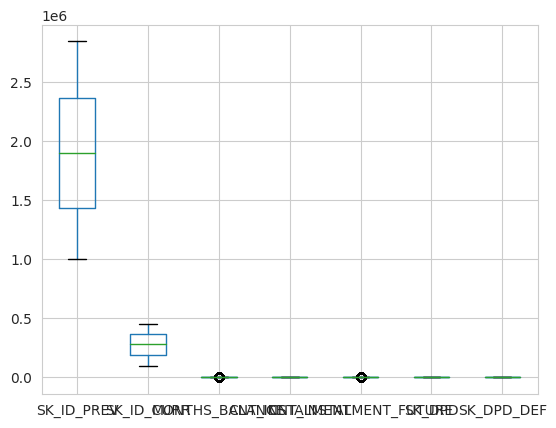

In [91]:
POS_CASH_balance.boxplot()
plt.show()

In [92]:
# Statistic descreption
POS_CASH_balance.describe()

SK_ID_PREV     SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  3.905430e+05  390543.000000   390543.000000   390543.000000   
mean   1.903202e+06  278846.339020      -25.682711       17.498281   
std    5.356256e+05  102751.136595       21.097168        9.837910   
min    1.000001e+06  100003.000000      -85.000000        1.000000   
25%    1.431664e+06  189963.500000      -39.000000       10.000000   
50%    1.896597e+06  279420.000000      -18.000000       12.000000   
75%    2.368804e+06  368059.000000      -10.000000       24.000000   
max    2.843497e+06  456255.000000       -1.000000       45.000000   

       CNT_INSTALMENT_FUTURE    SK_DPD  SK_DPD_DEF  
count          390543.000000  390542.0    390542.0  
mean               10.297760       0.0         0.0  
std                 8.847992       0.0         0.0  
min                 0.000000       0.0         0.0  
25%                 3.000000       0.0         0.0  
50%                 8.000000       0.0         0.0  
75%                15.000000       0.0         0.0  
max                39.000000       0.0         0.0

In [93]:
numeric_columns = POS_CASH_balance.select_dtypes(include=['number']).columns
# correlation
POS_CASH_balance[numeric_columns].corr().style.background_gradient(cmap="Greens")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


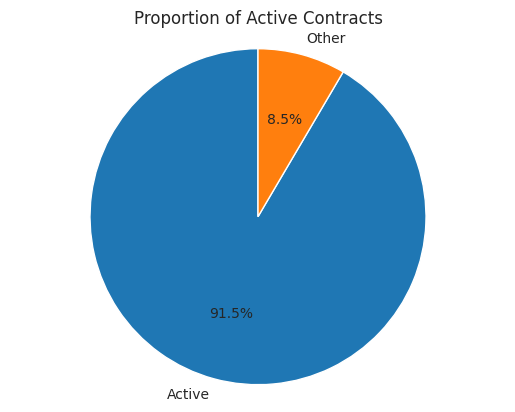

In [94]:
# calculate the number of contracts that are still active
active_cnt = POS_CASH_balance['NAME_CONTRACT_STATUS'].value_counts()['Active']

# make a pie chart to display the proportion of active contract status
labels = ['Active', 'Other']
sizes = [active_cnt, POS_CASH_balance.shape[0] - active_cnt]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Active Contracts')
plt.show()

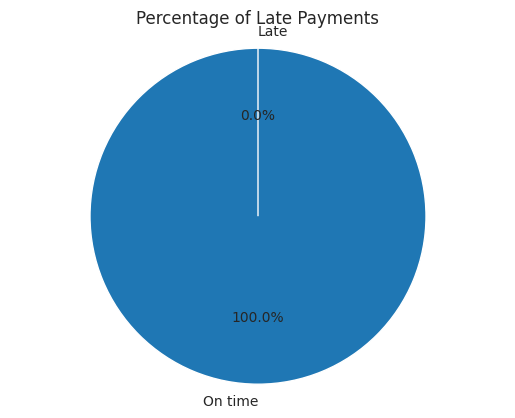

In [95]:
# calculate the percentage of late payments
delayed_pct = len(POS_CASH_balance[POS_CASH_balance['SK_DPD'] > 0]) / len(POS_CASH_balance) * 100

# Create a pie chart to display the percentage of late payments
labels = ['On time', 'Late']
sizes = [100-delayed_pct, delayed_pct]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Late Payments')
plt.show()

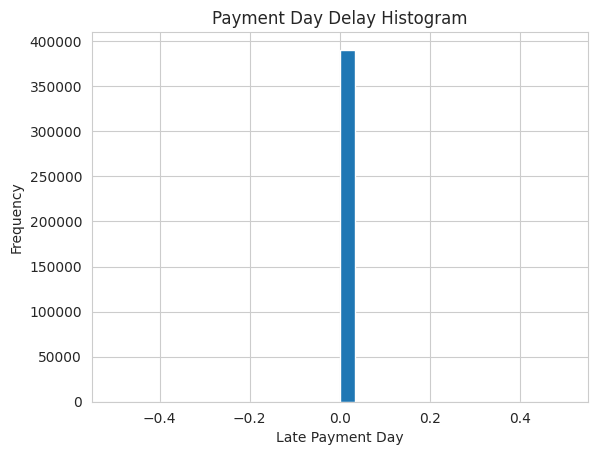

In [96]:
# Visualization of the distribution of late payment days using a histogram

plt.hist(POS_CASH_balance['SK_DPD'], bins=30)
plt.xlabel('Late Payment Day')
plt.ylabel('Frequency')
plt.title('Payment Day Delay Histogram')
plt.show()

### Feature Engineering


In [97]:
POS_CASH_balance['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Signed', 'Completed', 'Approved',
       'Returned to the store', 'Demand', nan], dtype=object)

In [98]:
POS_CASH_balance['NAME_CONTRACT_STATUS'].nunique()

6

In [99]:
POS_Status = pd.get_dummies(POS_CASH_balance["NAME_CONTRACT_STATUS"])

In [100]:
POS_CB = POS_CASH_balance.drop('NAME_CONTRACT_STATUS',axis=1)

In [101]:
app = [POS_CB, POS_Status]

In [102]:
POS_CB_Status = pd.concat(app,axis=1)

In [103]:
POS_CB_Status.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
4     2341044      334279             -35            36.0   
5     2207092      342166             -32            12.0   
7     1387235      153211             -35            36.0   

   CNT_INSTALMENT_FUTURE  SK_DPD  SK_DPD_DEF  Active  Approved  Completed  \
1                   35.0     0.0         0.0       1         0          0   
2                    9.0     0.0         0.0       1         0          0   
4                   35.0     0.0         0.0       1         0          0   
5                   12.0     0.0         0.0       1         0          0   
7                   36.0     0.0         0.0       1         0          0   

   Demand  Returned to the store  Signed  
1       0                      0       0  
2       0                      0       0  
4       0                      0       0  
5       0                      0       0  
7       0                      0       0

### Agregating

In [104]:
def agregat(POS_CB_Status):
    aggregated_data = pd.DataFrame()  # An empty DataFrame to store the aggregation result

    # Data filter only for contract status
    POS_CB_Status = POS_CB_Status[POS_CB_Status['Active'] == 1]

    # The MONTHS_BALANCE column aggregates with sum
    aggregated_data['MONTHS_BALANCE_SUM'] = POS_CB_Status.groupby(['SK_ID_PREV', 'Active'])['MONTHS_BALANCE'].sum()

    # The CNT_INSTALMENT column aggregates with the mean
    aggregated_data['CNT_INSTALMENT_MEAN'] = POS_CB_Status.groupby(['SK_ID_PREV', 'Active'])['CNT_INSTALMENT'].mean()

    # The CNT_INSTALMENT_FUTURE column aggregates with the mean
    aggregated_data['CNT_INSTALMENT_FUTURE_MEAN'] = POS_CB_Status.groupby(['SK_ID_PREV', 'Active'])['CNT_INSTALMENT_FUTURE'].mean()

     # SK_DPD column aggregates by mean
    aggregated_data['SK_DPD_MAX'] = POS_CB_Status.groupby(['SK_ID_PREV', 'Active'])['SK_DPD'].max()

    # SK_DPD_DEF column aggregate with sum
    aggregated_data['SK_DPD_DEF_MAX'] = POS_CB_Status.groupby(['SK_ID_PREV', 'Active'])['SK_DPD_DEF'].max()

    aggregated_data.reset_index(inplace=True)

    return aggregated_data

In [105]:
POS_StatusFinal = agregat(POS_CB_Status)
POS_StatusFinal.head()

SK_ID_PREV  Active  MONTHS_BALANCE_SUM  CNT_INSTALMENT_MEAN  \
0     1000005       1                 -49                 10.0   
1     1000008       1                 -40                 10.0   
2     1000010       1                 -18                 18.0   
3     1000011       1                 -22                 12.0   
4     1000012       1                 -28                 12.0   

   CNT_INSTALMENT_FUTURE_MEAN  SK_DPD_MAX  SK_DPD_DEF_MAX  
0                    3.000000         0.0             0.0  
1                    7.000000         0.0             0.0  
2                   17.000000         0.0             0.0  
3                    4.333333         0.0             0.0  
4                   10.000000         0.0             0.0

In [106]:
POS_StatusFinal.shape

(253524, 7)

Preparation for Merging the Same Featured Post and Credit

In [107]:
POS_StatusFinal.rename(columns={'Active': 'NAME_CONTRACT_STATUS_Active'}, inplace=True)

In [108]:
#Create a new dataframe containing the same postal features as credits
A= POS_StatusFinal['SK_ID_PREV']
B= POS_StatusFinal['NAME_CONTRACT_STATUS_Active']
C= POS_StatusFinal['MONTHS_BALANCE_SUM']
D= POS_StatusFinal['SK_DPD_MAX']
E= POS_StatusFinal['SK_DPD_DEF_MAX']
POS_1= [A,B,C,D,E]
POS= pd.concat(POS_1,axis=1)
POS

SK_ID_PREV  NAME_CONTRACT_STATUS_Active  MONTHS_BALANCE_SUM  \
0          1000005                            1                 -49   
1          1000008                            1                 -40   
2          1000010                            1                 -18   
3          1000011                            1                 -22   
4          1000012                            1                 -28   
...            ...                          ...                 ...   
253519     2843484                            1                 -85   
253520     2843486                            1                 -14   
253521     2843487                            1                  -7   
253522     2843492                            1                 -19   
253523     2843497                            1                 -15   

        SK_DPD_MAX  SK_DPD_DEF_MAX  
0              0.0             0.0  
1              0.0             0.0  
2              0.0             0.0  
3              0.0             0.0  
4              0.0             0.0  
...            ...             ...  
253519         0.0             0.0  
253520         0.0             0.0  
253521         0.0             0.0  
253522         0.0             0.0  
253523         0.0             0.0  

[253524 rows x 5 columns]

In [109]:
#Create a new postal dataframe by dropping features that are not the same as credits
pos= POS_StatusFinal.drop(['NAME_CONTRACT_STATUS_Active','MONTHS_BALANCE_SUM','SK_DPD_MAX','SK_DPD_DEF_MAX'], axis=1)
pos

SK_ID_PREV  CNT_INSTALMENT_MEAN  CNT_INSTALMENT_FUTURE_MEAN
0          1000005                 10.0                    3.000000
1          1000008                 10.0                    7.000000
2          1000010                 18.0                   17.000000
3          1000011                 12.0                    4.333333
4          1000012                 12.0                   10.000000
...            ...                  ...                         ...
253519     2843484                 12.0                    5.500000
253520     2843486                  6.0                    1.000000
253521     2843487                 12.0                    6.500000
253522     2843492                 12.0                    8.000000
253523     2843497                 24.0                   18.000000

[253524 rows x 3 columns]

In [110]:
# credit_card_balance.csv
# Import Data
def reduce_memory_usage(df):

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [111]:
pd.set_option('display.max_columns', None)

In [112]:
credit_card = pd.read_csv("./data/credit_card_balance.csv")
print('Number of data points : ', credit_card.shape[0])
print('Number of features : ', credit_card.shape[1])
credit_card.head()

Number of data points :  164735
Number of features :  23


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                   1.0                         0.0   
1                       1.0                   1.0                         0.0   
2                       0.0                   0.0                         0.0   
3                       1.0                   1.0                         0.0   
4                       0.0                   1.0                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0     0.0         0.0  
1     0.0         0.0  
2     0.0         0.0  
3     0.0         0.0  
4     0.0         0.0

In [113]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164735 entries, 0 to 164734
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_PREV                  164735 non-null  int64  
 1   SK_ID_CURR                  164735 non-null  int64  
 2   MONTHS_BALANCE              164735 non-null  int64  
 3   AMT_BALANCE                 164735 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     164735 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    127389 non-null  float64
 6   AMT_DRAWINGS_CURRENT        164734 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  127389 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT    127389 non-null  float64
 9   AMT_INST_MIN_REGULARITY     155222 non-null  float64
 10  AMT_PAYMENT_CURRENT         127049 non-null  float64
 11  AMT_PAYMENT_TOTAL_CURRENT   164734 non-null  float64
 12  AMT_RECEIVABLE_PRINCIPAL    164734 non-null  float64
 13  AMT_RECIVABLE 

In [114]:
# Identify the numerical and categorical columns
num_cols = credit_card.select_dtypes(include=['int64', 'float64']).columns
cat_cols = credit_card.select_dtypes(include=['object', 'category']).columns

# Create datasets with numerical and categorical columns
num_credit = credit_card[num_cols]
cat_credit = credit_card[cat_cols]

In [115]:
num_credit.describe()

SK_ID_PREV     SK_ID_CURR  MONTHS_BALANCE    AMT_BALANCE  \
count  1.647350e+05  164735.000000   164735.000000  164735.000000   
mean   1.904036e+06  278676.260424      -30.020099   52556.818739   
std    5.369266e+05  102819.556459       26.916324  102668.387260   
min    1.000094e+06  100011.000000      -96.000000 -135359.010000   
25%    1.430399e+06  189734.000000      -49.000000       0.000000   
50%    1.896933e+06  279024.000000      -19.000000       0.000000   
75%    2.370934e+06  368082.000000       -7.000000   73175.062500   
max    2.843477e+06  456250.000000       -1.000000  959924.475000   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             1.647350e+05              1.273890e+05   
mean              1.524874e+05              5.170907e+03   
std               1.698674e+05              2.638409e+04   
min               0.000000e+00              0.000000e+00   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              1.305000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          1.647340e+05               127389.000000   
mean           6.119921e+03                  245.651279   
std            3.052363e+04                 6962.607445   
min            0.000000e+00                    0.000000   
25%            0.000000e+00                    0.000000   
50%            0.000000e+00                    0.000000   
75%            0.000000e+00                    0.000000   
max            1.440180e+06               761940.000000   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
count              1.273890e+05            155222.000000         1.270490e+05   
mean               2.489157e+03              3161.154717         9.730783e+03   
std                1.889532e+04              5416.194031         3.518629e+04   
min                0.000000e+00                 0.000000         0.000000e+00   
25%                0.000000e+00                 0.000000         1.252800e+02   
50%                0.000000e+00                 0.000000         1.713330e+03   
75%                0.000000e+00              5625.000000         9.000000e+03   
max                1.440180e+06             56250.000000         1.125000e+06   

       AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
count               1.647340e+05             164734.000000  164734.000000   
mean                6.908954e+03              50449.542228   52381.621879   
std                 3.065855e+04              99022.938491  102359.515072   
min                 0.000000e+00            -135867.105000 -133442.235000   
25%                 0.000000e+00                  0.000000       0.000000   
50%                 0.000000e+00                  0.000000       0.000000   
75%                 6.750000e+03              69269.028750   72980.302500   
max                 1.068750e+06             900000.000000  957233.475000   

       AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count         164734.000000             127389.000000         164734.000000   
mean           52389.265714                  0.271083              0.593854   
std           102365.722519                  1.022487              2.980973   
min          -133442.235000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%            73049.467500                  0.000000              0.000000   
max           957233.475000                 33.000000            142.000000   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count               127389.000000             127389.000000   
mean                     0.004671                  0

In [116]:
num_credit.cov()
# How many numeric variables are in the data set?
print('Number of numerical variables: ', len(num_cols))
num_cols

Number of numerical variables:  22


Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

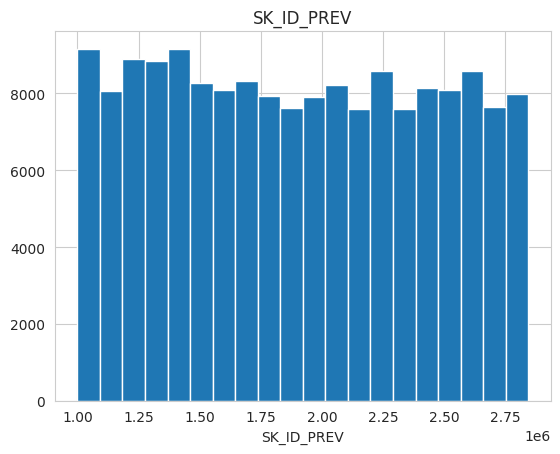

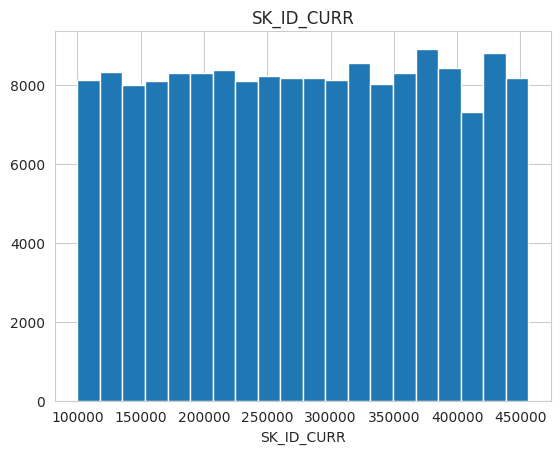

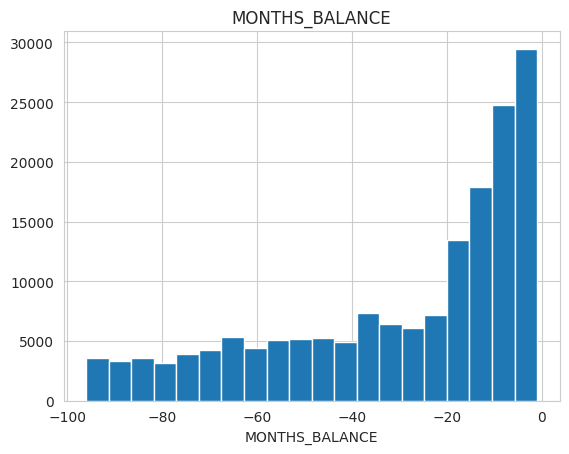

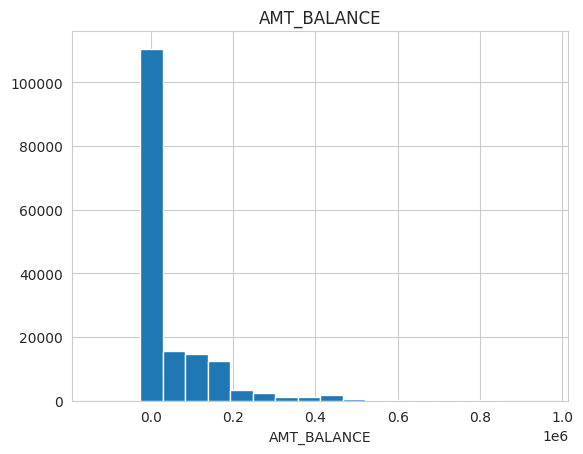

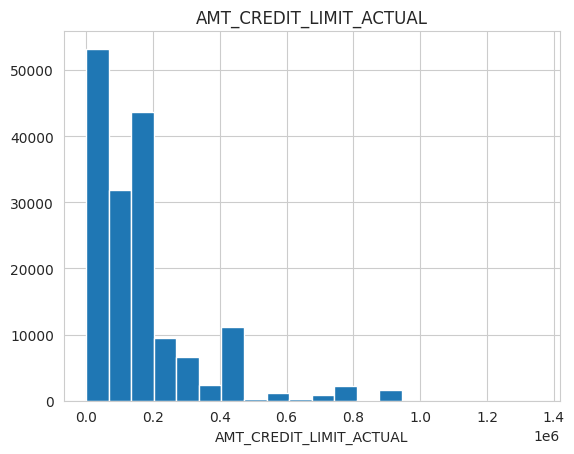

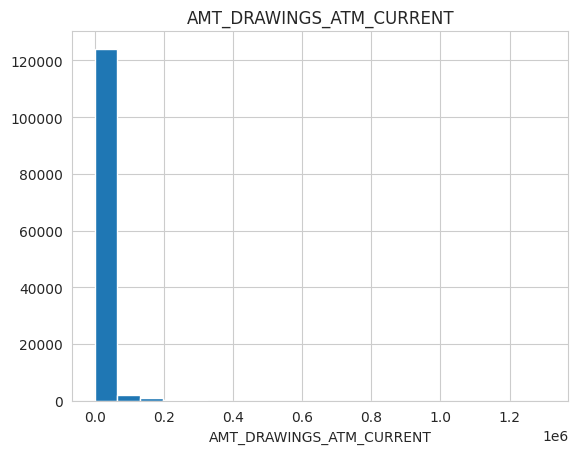

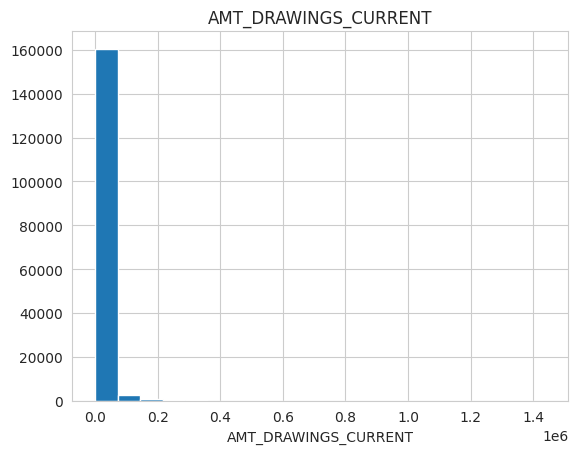

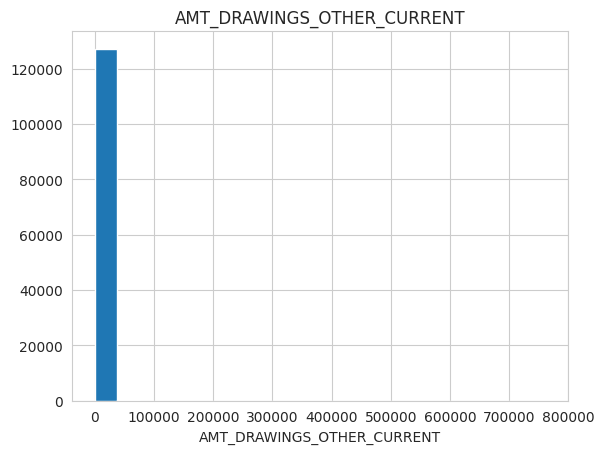

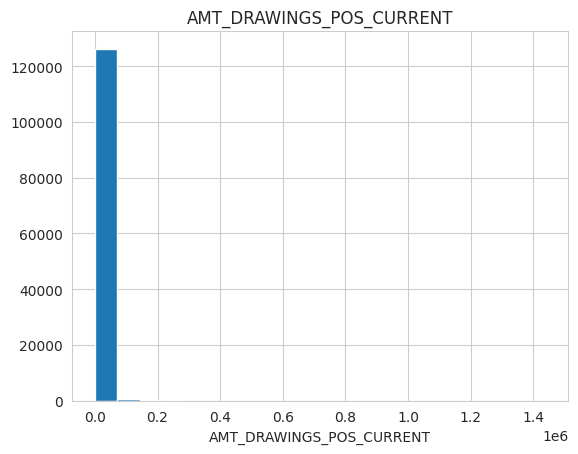

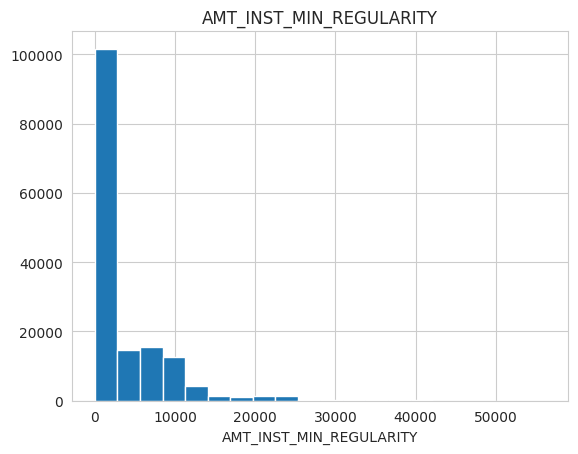

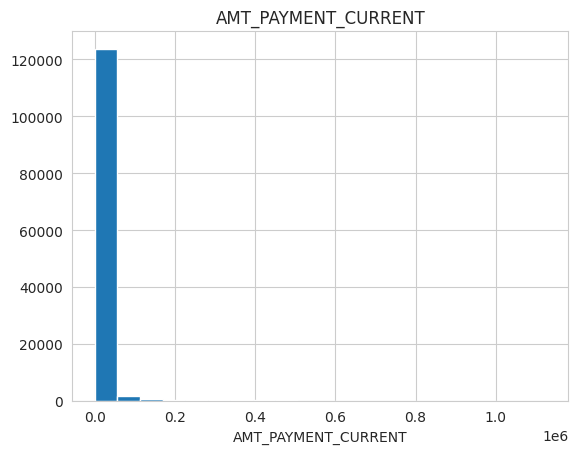

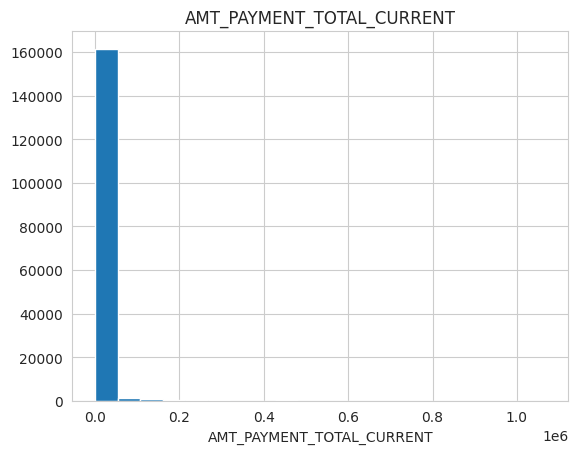

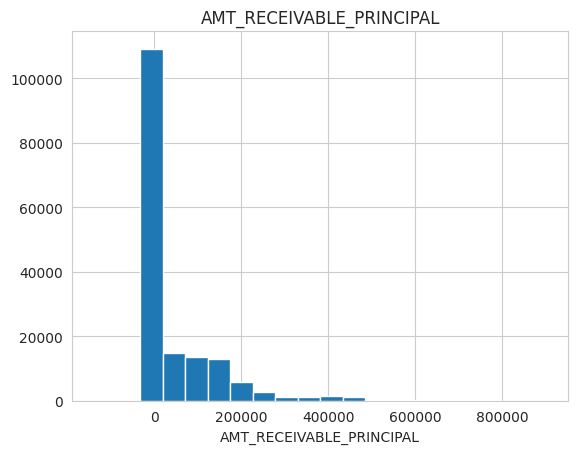

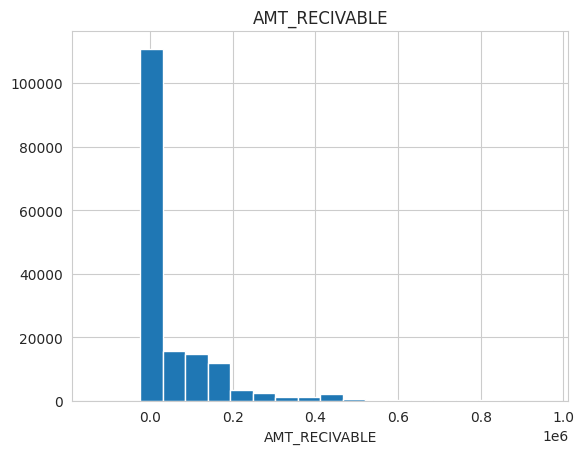

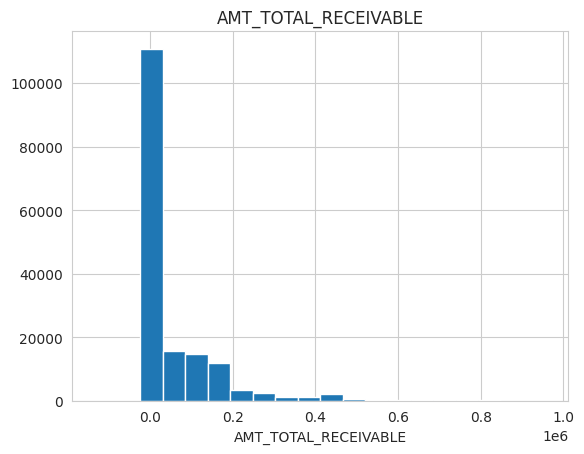

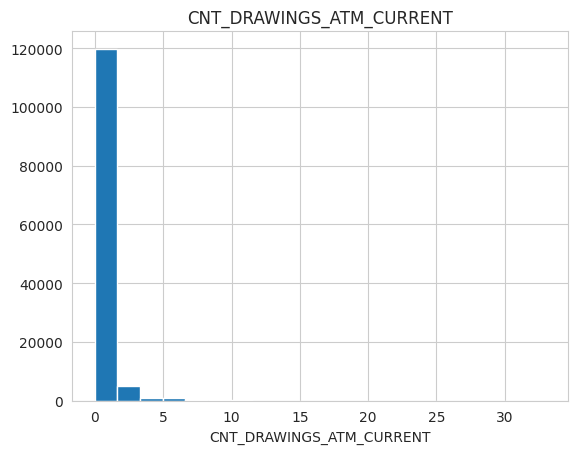

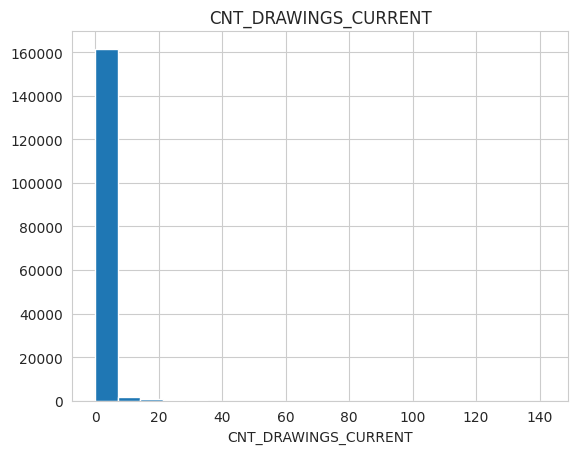

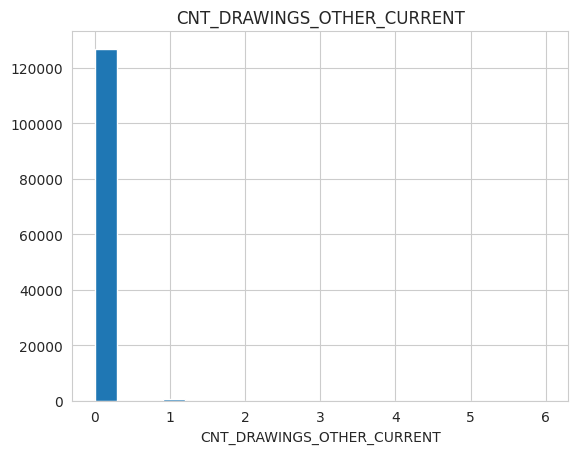

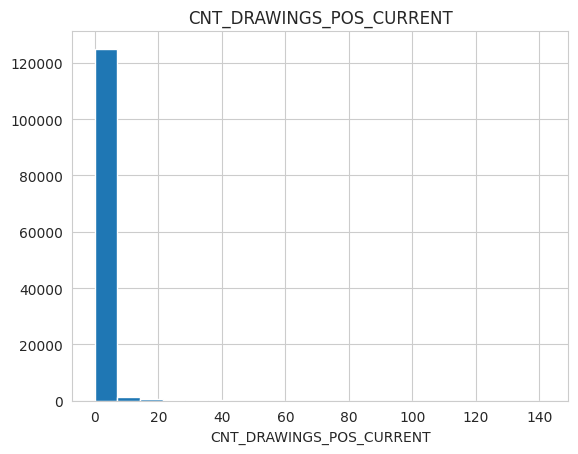

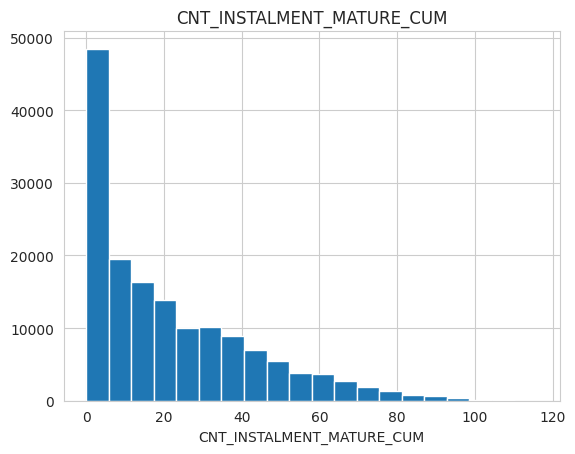

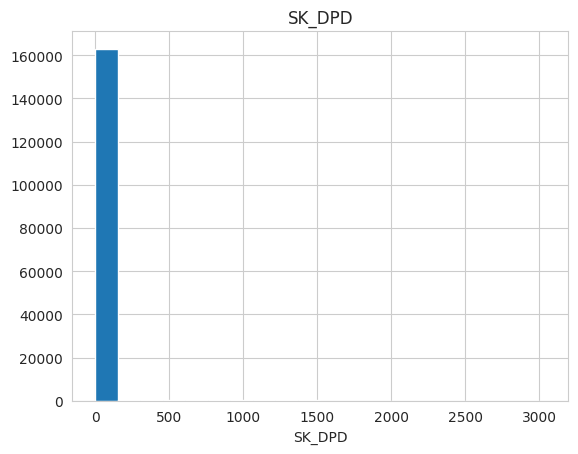

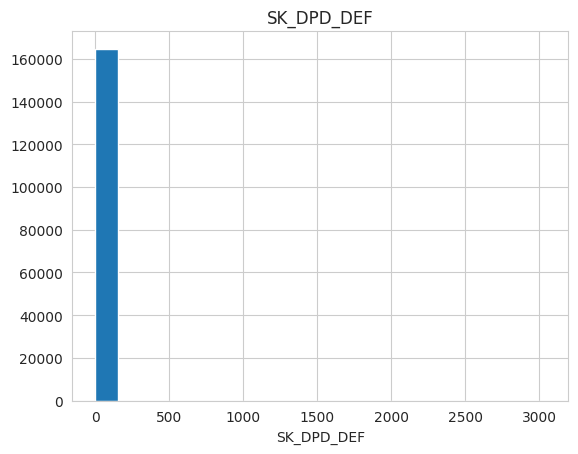

In [117]:
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
hist_for_nums(credit_card, num_cols)

In [118]:
num_credit.corr()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  \
SK_ID_PREV                    1.000000    0.004024        0.003586   
SK_ID_CURR                    0.004024    1.000000        0.002600   
MONTHS_BALANCE                0.003586    0.002600        1.000000   
AMT_BALANCE                   0.004985    0.008711       -0.036032   
AMT_CREDIT_LIMIT_ACTUAL       0.002965    0.007333        0.154935   
AMT_DRAWINGS_ATM_CURRENT      0.005935    0.006597        0.007089   
AMT_DRAWINGS_CURRENT          0.003527    0.005152        0.028139   
AMT_DRAWINGS_OTHER_CURRENT   -0.004746    0.008681       -0.006583   
AMT_DRAWINGS_POS_CURRENT      0.002671   -0.001555        0.098952   
AMT_INST_MIN_REGULARITY       0.003619    0.007679       -0.129962   
AMT_PAYMENT_CURRENT          -0.000272   -0.000005        0.059781   
AMT_PAYMENT_TOTAL_CURRENT    -0.001635   -0.000068        0.014645   
AMT_RECEIVABLE_PRINCIPAL      0.005175    0.008858       -0.034082   
AMT_RECIVABLE                 0.004983    0.008720       -0.037218   
AMT_TOTAL_RECEIVABLE          0.004984    0.008719       -0.037308   
CNT_DRAWINGS_ATM_CURRENT      0.002646    0.004735       -0.034672   
CNT_DRAWINGS_CURRENT          0.001186    0.002170        0.073813   
CNT_DRAWINGS_OTHER_CURRENT   -0.007398    0.007803       -0.033659   
CNT_DRAWINGS_POS_CURRENT      0.001849    0.001007        0.131185   
CNT_INSTALMENT_MATURE_CUM    -0.003893   -0.001452       -0.008556   
SK_DPD                        0.002536    0.000801        0.033192   
SK_DPD_DEF                    0.002913   -0.000844        0.000265   

                            AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
SK_ID_PREV                     0.004985                 0.002965   
SK_ID_CURR                     0.008711                 0.007333   
MONTHS_BALANCE                -0.036032                 0.154935   
AMT_BALANCE                    1.000000                 0.445073   
AMT_CREDIT_LIMIT_ACTUAL        0.445073                 1.000000   
AMT_DRAWINGS_ATM_CURRENT       0.280851                 0.237201   
AMT_DRAWINGS_CURRENT           0.341085                 0.237593   
AMT_DRAWINGS_OTHER_CURRENT     0.061282                 0.043237   
AMT_DRAWINGS_POS_CURRENT       0.180117                 0.227662   
AMT_INST_MIN_REGULARITY        0.900374                 0.427812   
AMT_PAYMENT_CURRENT            0.147735                 0.305889   
AMT_PAYMENT_TOTAL_CURRENT      0.156020                 0.210930   
AMT_RECEIVABLE_PRINCIPAL       0.999672                 0.446157   
AMT_RECIVABLE                  0.999922                 0.444444   
AMT_TOTAL_RECEIVABLE           0.999906                 0.444408   
CNT_DRAWINGS_ATM_CURRENT       0.313777                 0.217812   
CNT_DRAWINGS_CURRENT           0.274709                 0.188553   
CNT_DRAWINGS_OTHER_CURRENT     0.046319                 0.025616   
CNT_DRAWINGS_POS_CURRENT       0.173987                 0.201757   
CNT_INSTALMENT_MATURE_CUM      0.080808                -0.132546   
SK_DPD                        -0.041431                -0.040661   
SK_DPD_DEF                     0.018430                -0.002053   

                            AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
SK_ID_PREV                                  0.005935              0.003527   
SK_ID_CURR                                  0.006597              0.005152   
MONTHS_BALANCE                              0.007089              0.028139   
AMT_BALANCE                                 0.280851              0.341085   
AMT_CREDIT_LIMIT_ACTUAL                     0.237201              0.237593   
AMT_DRAWINGS_ATM_CURRENT                    1.000000              0.811303   
AMT_DRAWINGS_CURRENT                        0.811303              1.000000   
AMT_DRAWINGS_OTHER_CURRENT                  0.018816              0.224178   
AMT_DRAWINGS_POS_CURRENT                    0.078376              0.610461   
AMT_INST_MIN_REGULARITY                     0.099108              0.1380

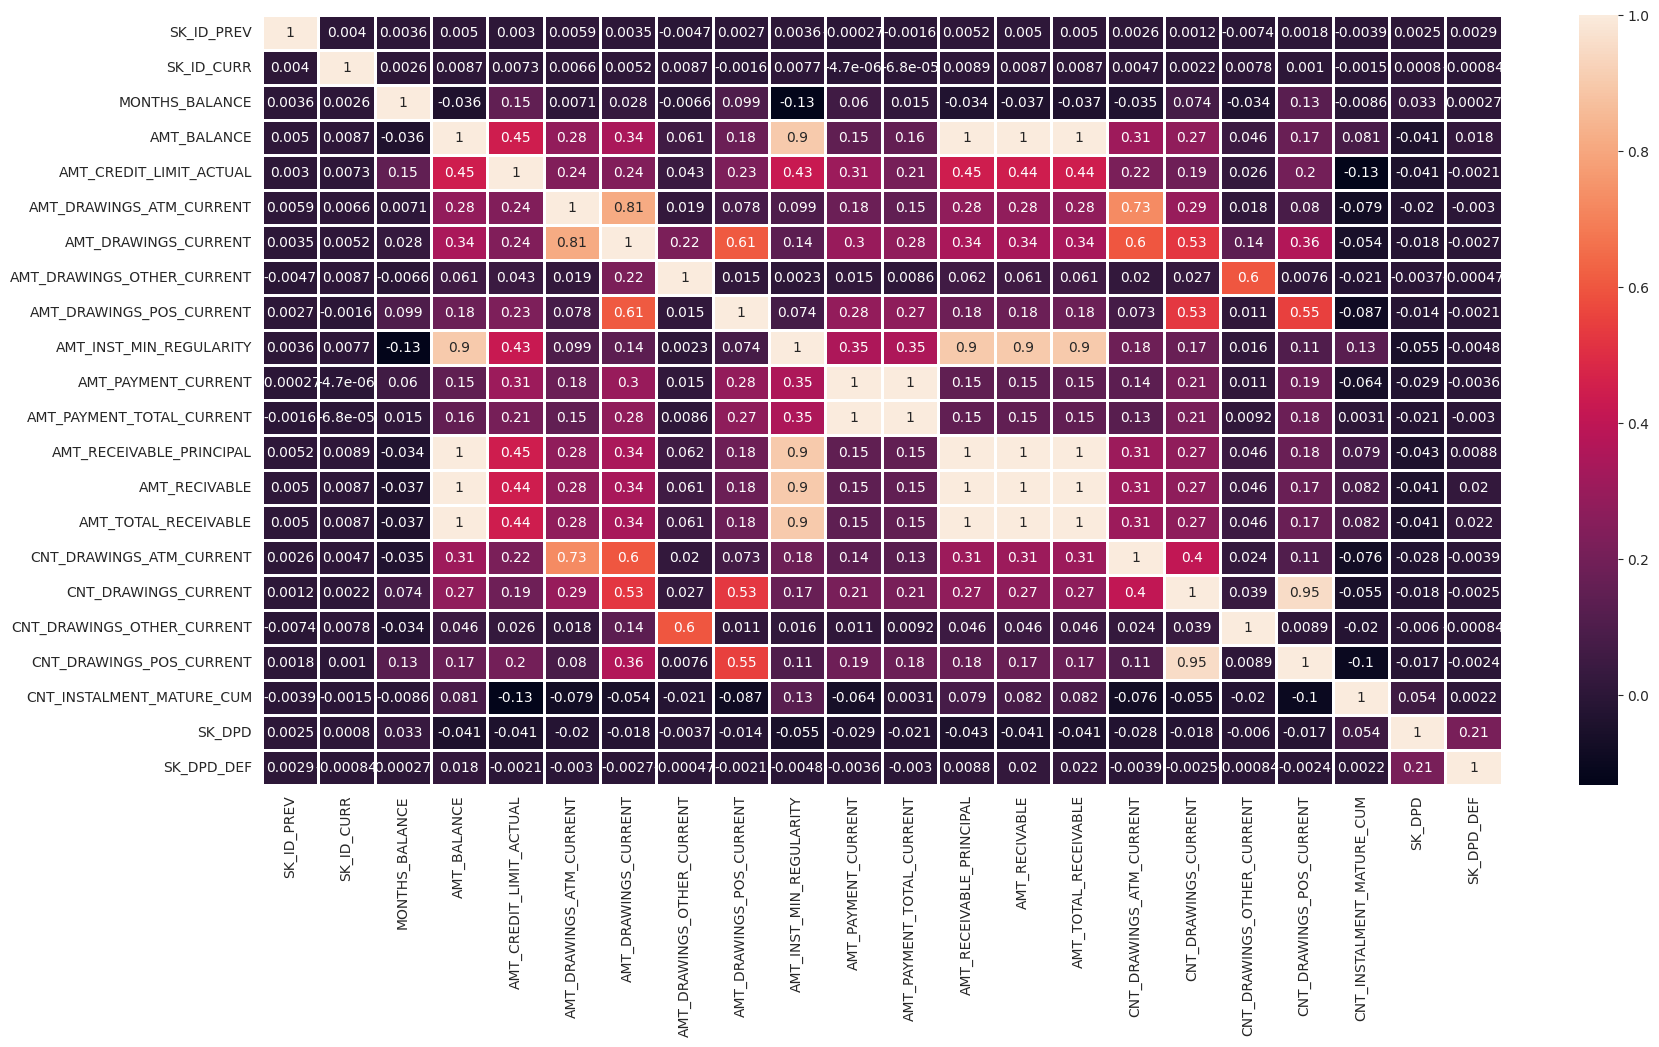

In [119]:
# heatmaps
plt.figure(figsize=(20,10))
sns.heatmap(num_credit.corr(), annot=True, linewidths=1, linecolor="white")
plt.show()

### Categorical Variables

In [120]:

# How many categorical variables are in the data set?
print('Number of categoricals variables: ', len(cat_cols))
cat_cols

Number of categoricals variables:  1


Index(['NAME_CONTRACT_STATUS'], dtype='object')

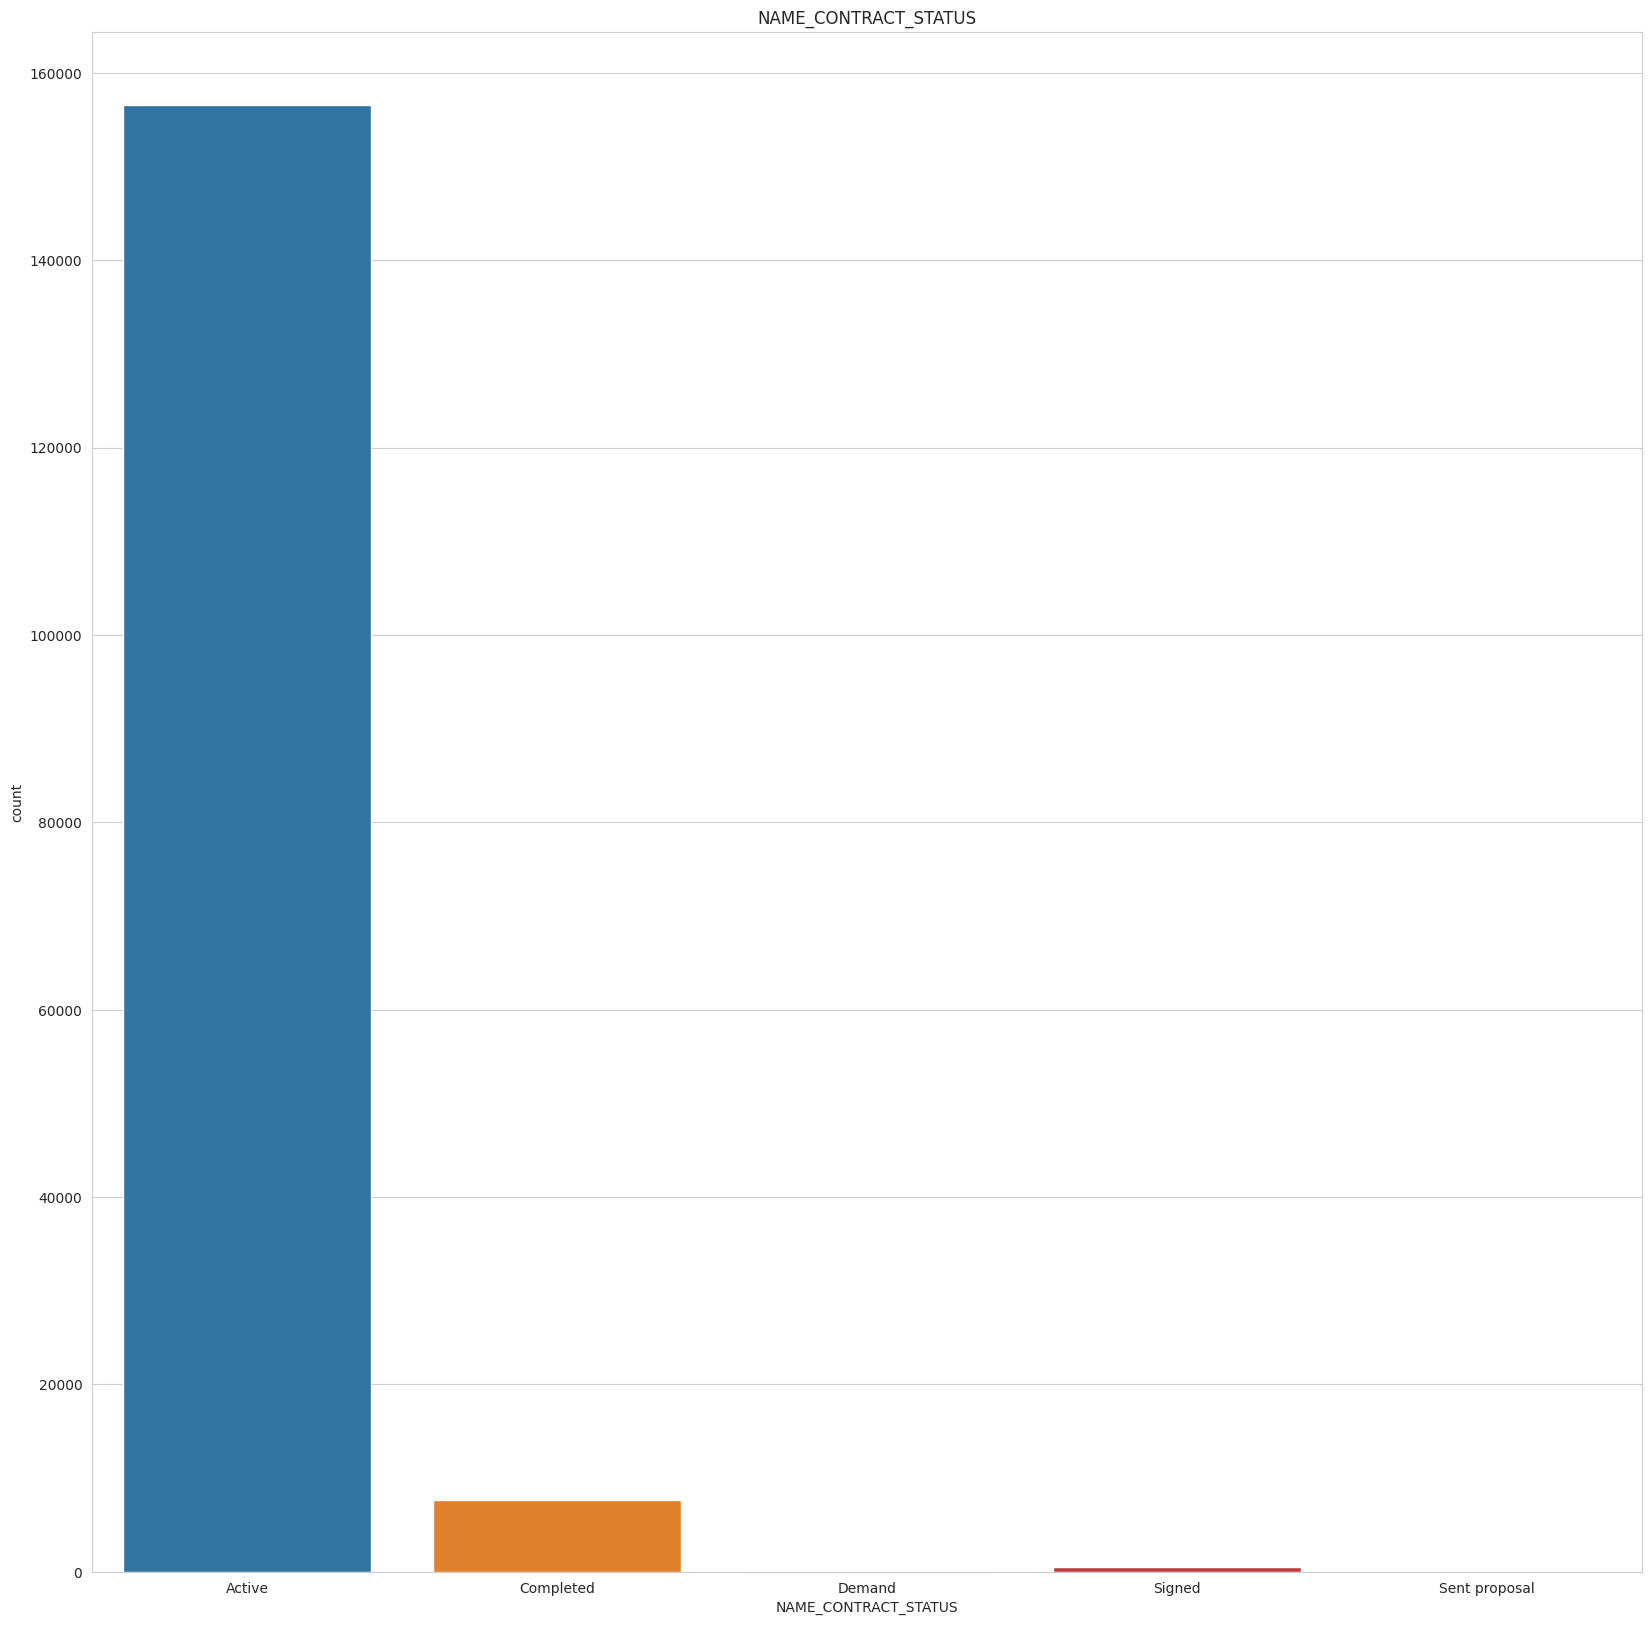

In [121]:
for col in cat_credit.columns:
        plt.figure(figsize = (20, 20))
        sns.countplot(x=col, data=cat_credit)
        plt.title(col)

### Data Cleaning

In [122]:
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in credit_card.columns:
    # Count the number of missing values
    missing_values = credit_card[col].isnull().sum()

    # Count the number of duplicates
    duplicates = credit_card.duplicated().sum()

    # Check for outliers (assuming a normal distribution)
    if credit_card[col].dtype in ['int64', 'float64']:
        mean = credit_card[col].mean()
        std = credit_card[col].std()
        outliers = ((credit_card[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

+----------------------------+----------------+------------+----------+
|          Variable          | Missing Values | Duplicates | Outliers |
+----------------------------+----------------+------------+----------+
|         SK_ID_PREV         |       0        |     0      |    0     |
|         SK_ID_CURR         |       0        |     0      |    0     |
|       MONTHS_BALANCE       |       0        |     0      |    0     |
|        AMT_BALANCE         |       0        |     0      |   4451   |
|  AMT_CREDIT_LIMIT_ACTUAL   |       0        |     0      |   4859   |
|  AMT_DRAWINGS_ATM_CURRENT  |     37346      |     0      |   2475   |
|    AMT_DRAWINGS_CURRENT    |       1        |     0      |   2964   |
| AMT_DRAWINGS_OTHER_CURRENT |     37346      |     0      |   276    |
|  AMT_DRAWINGS_POS_CURRENT  |     37346      |     0      |   1420   |
|  AMT_INST_MIN_REGULARITY   |      9513      |     0      |   3932   |
|    AMT_PAYMENT_CURRENT     |     37686      |     0      |   1

In [123]:
print('Number of data points : ', credit_card.shape[0])
print('Number of features : ', credit_card.shape[1])

Number of data points :  164735
Number of features :  23


Drop Missing Value

In [124]:
credit_card2 = credit_card.dropna()
print('Number of data points : ', credit_card2.shape[0])
print('Number of features : ', credit_card2.shape[1])

Number of data points :  124892
Number of features :  23


### Feature Engineering
One Hot Encoding

In [125]:
# assuming prev_app2 is the original dataframe with both numerical and categorical columns
num_credit2 = credit_card2.select_dtypes(include=['float64', 'int64'])
cat_credit2 = credit_card2.select_dtypes(include=['object'])

# perform one-hot encoding for each categorical column
encoded_cols = []
for col in cat_credit2:
    one_hot = pd.get_dummies(cat_credit2[col], prefix=col)
    encoded_cols.append(one_hot)

# concatenate the original numerical columns and the one-hot encoded categorical columns
credit_card3 = pd.concat([num_credit2] + encoded_cols, axis=1)

# display the encoded dataframe
credit_card3.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                   1.0                         0.0   
1                       1.0                   1.0                         0.0   
2                       0.0                   0.0                         0.0   
3                       1.0                   1.0                         0.0   
4                       0.0                   1.0                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  SK_DPD  SK_DPD_DEF  \
0                       1.0                       35.0     0.0         0.0   
1                       0.0                       69.0     0.0         0.0   
2                       0.0                       30.0     0.0         0.0   
3                       0.0                       10.0     0.0         0.0   
4                       1.0                      101.0     0.0         0.0   

   NAME_CONTRACT_STATUS_Active  NAME_CONTRACT_STATUS_Completed  \
0                            1                               0   
1                            1                               0   
2                            1                               0   
3                            1                               0   
4                            1                               0   

   NAME_CONTRACT_STATUS_Demand  NAME_CONTRACT_STATUS_Signed  
0                            0                            0  
1                            0                            0  
2                            0                            0  
3                            0                            0  
4                            0                            0

In [126]:
print('Number of data points : ', credit_card3.shape[0])
print('Number of features : ', credit_card3.shape[1])

Number of data points :  124892
Number of features :  26


### Agregate

In [127]:
agg_list_credit = { 'MONTHS_BALANCE':["sum"],
        'AMT_BALANCE':["sum"],
        'AMT_CREDIT_LIMIT_ACTUAL':["max"],

        'AMT_DRAWINGS_ATM_CURRENT':["sum"],
        'AMT_DRAWINGS_CURRENT':["sum"],
        'AMT_DRAWINGS_OTHER_CURRENT':["sum"],
        'AMT_DRAWINGS_POS_CURRENT':["sum"],
        'AMT_INST_MIN_REGULARITY':["sum"],
        'AMT_PAYMENT_CURRENT':["sum"],
        'AMT_PAYMENT_TOTAL_CURRENT':["sum"],
        'AMT_RECEIVABLE_PRINCIPAL':["sum"],
        'AMT_RECIVABLE':["sum"],
        'AMT_TOTAL_RECEIVABLE':["sum"],

        'CNT_DRAWINGS_ATM_CURRENT':["sum"],
        'CNT_DRAWINGS_CURRENT':["sum"],
        'CNT_DRAWINGS_OTHER_CURRENT':["sum"],
        'CNT_DRAWINGS_POS_CURRENT':["sum"],
        'CNT_INSTALMENT_MATURE_CUM':["max"],
        'SK_DPD':["max"],
        'SK_DPD_DEF':["max"]}

In [128]:
# Filter data hanya untuk status kontrak
credit = credit_card3[credit_card3['NAME_CONTRACT_STATUS_Active'] == 1]

In [129]:
credit_agg = credit.groupby(['SK_ID_PREV','NAME_CONTRACT_STATUS_Active']).agg(agg_list_credit)
credit_agg.columns = pd.Index([e[0] + '_' + e[1].upper() for e in credit_agg.columns.tolist()])
credit_agg.reset_index(inplace = True)
credit_agg

SK_ID_PREV  NAME_CONTRACT_STATUS_Active  MONTHS_BALANCE_SUM  \
0         1000094                            1                -154   
1         1000096                            1                -493   
2         1000128                            1                  -1   
3         1000281                            1                  -2   
4         1000296                            1                 -12   
...           ...                          ...                 ...   
45247     2843423                            1                 -11   
45248     2843448                            1                 -16   
45249     2843461                            1                -215   
45250     2843476                            1                -245   
45251     2843477                            1                -161   

       AMT_BALANCE_SUM  AMT_CREDIT_LIMIT_ACTUAL_MAX  \
0           160852.500                        67500   
1           521630.100                       180000   
2            98506.260                       247500   
3                0.000                            0   
4                0.000                       450000   
...                ...                          ...   
45247            0.000                            0   
45248       276746.445                       292500   
45249       323917.965                        90000   
45250       210117.150                       180000   
45251            0.000                        67500   

       AMT_DRAWINGS_ATM_CURRENT_SUM  AMT_DRAWINGS_CURRENT_SUM  \
0                               0.0                     0.000   
1                            4500.0                  6846.975   
2                               0.0                     0.000   
3                               0.0                     0.000   
4                               0.0                     0.000   
...                             ...                       ...   
45247                           0.0                     0.000   
45248                           0.0                     0.000   
45249                           0.0                  3815.100   
45250                           0.0                     0.000   
45251                           0.0                     0.000   

       AMT_DRAWINGS_OTHER_CURRENT_SUM  AMT_DRAWINGS_POS_CURRENT_SUM  \
0                                 0.0                         0.000   
1                                 0.0                      2346.975   
2                                 0.0                         0.000   
3                                 0.0                         0.000   
4                                 0.0                         0.000   
...                               ...                           ...   
45247                             0.0                         0.000   
45248                             0.0                         0.000   
45249                             0.0                      3815.100   
45250                             0.0                         0.000   
45251                             0.0                         0.000   

       AMT_INST_MIN_REGULARITY_SUM  AMT_PAYMENT_CURRENT_SUM  \
0                        10125.000                11251.035   
1                        36067.500               175264.245   
2                         5090.895                 5436.630   
3                            0.000                   36.855   
4                            0.000                  258.210   
...                            ...                      ...   
45247                        0.000                  334.440   
45248                    14780.070                31500.000   
45249                    18000.000                31500.000   
45250                    21600.000                11263.095   
45251                        0.000                  502.470   

       AMT_PAYMENT_TOTAL_CURRENT_SUM  AMT_RECEIVABLE_PRINCIPAL_SUM  \
0                          11250.000        

Persiapan Penggabungan Feature Credit dan Pos yang sama

In [130]:
#Create a new dataframe that contains the same credit features as the post
K = credit_agg['SK_ID_PREV']
L= credit_agg['NAME_CONTRACT_STATUS_Active']
M= credit_agg['MONTHS_BALANCE_SUM']
N= credit_agg['SK_DPD_MAX']
O= credit_agg['SK_DPD_DEF_MAX']
credit_1= [K,L,M,N,O]
credit= pd.concat(credit_1,axis=1)
credit

SK_ID_PREV  NAME_CONTRACT_STATUS_Active  MONTHS_BALANCE_SUM  \
0         1000094                            1                -154   
1         1000096                            1                -493   
2         1000128                            1                  -1   
3         1000281                            1                  -2   
4         1000296                            1                 -12   
...           ...                          ...                 ...   
45247     2843423                            1                 -11   
45248     2843448                            1                 -16   
45249     2843461                            1                -215   
45250     2843476                            1                -245   
45251     2843477                            1                -161   

       SK_DPD_MAX  SK_DPD_DEF_MAX  
0             0.0             0.0  
1             1.0             0.0  
2             0.0             0.0  
3             0.0             0.0  
4             0.0             0.0  
...           ...             ...  
45247         0.0             0.0  
45248         0.0             0.0  
45249         0.0             0.0  
45250        32.0            32.0  
45251         0.0             0.0  

[45252 rows x 5 columns]

In [131]:
#Create a new credit dataframe by dropping features that are not the same as the post
credit_1=credit_agg.drop(['NAME_CONTRACT_STATUS_Active','MONTHS_BALANCE_SUM','SK_DPD_MAX','SK_DPD_DEF_MAX'], axis=1)

Merge feature Pos dan Credit yang sama

In [132]:
# Using the append method
poscredit0 = pd.concat([POS, credit], ignore_index=True)  # Add new row in dataframe1(POS)
poscredit0

SK_ID_PREV  NAME_CONTRACT_STATUS_Active  MONTHS_BALANCE_SUM  \
0          1000005                            1                 -49   
1          1000008                            1                 -40   
2          1000010                            1                 -18   
3          1000011                            1                 -22   
4          1000012                            1                 -28   
...            ...                          ...                 ...   
298771     2843423                            1                 -11   
298772     2843448                            1                 -16   
298773     2843461                            1                -215   
298774     2843476                            1                -245   
298775     2843477                            1                -161   

        SK_DPD_MAX  SK_DPD_DEF_MAX  
0              0.0             0.0  
1              0.0             0.0  
2              0.0             0.0  
3              0.0             0.0  
4              0.0             0.0  
...            ...             ...  
298771         0.0             0.0  
298772         0.0             0.0  
298773         0.0             0.0  
298774        32.0            32.0  
298775         0.0             0.0  

[298776 rows x 5 columns]

Merge Credit dan Pos secara penuh

In [133]:
# Merge Pos_credit(feature pos yang id prev nya telah tertambah dengan id prev credit)
# dgn Pos (dataset yang berisikan feature yang sebelumnya tidakada di credit)
# dan Credit card(dataset yang berisikan feature yang sebelumnya tidak ada di pos)
poscredit = poscredit0.merge(pos, how='left', on='SK_ID_PREV')
pos_credit = poscredit.merge(credit_1, how='left', on='SK_ID_PREV')

### Standard Scaling

In [134]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [135]:
num_credit3 = credit_card3.select_dtypes(include=[np.number]).columns.tolist()
cat_credit3 = credit_card3.select_dtypes(include=['object'])

In [136]:
#standard scaler
scaler = preprocessing.StandardScaler()
credit_card3[num_credit3] = scaler.fit_transform(credit_card3[num_credit3])

credit_card3.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0    1.229888    0.977683        0.988337    -0.603478   
1    1.266540    0.831533        1.170770    -0.034627   
2   -0.299517    0.902410        0.951850    -0.320842   
3   -0.952798    0.577513        1.061310     1.501414   
4   -0.019062   -1.479160        1.170770     3.435719   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                -0.048798                 -0.185053             -0.188846   
1                -0.646270                 -0.087500             -0.144830   
2                 2.042357                 -0.185053             -0.216987   
3                 0.548675                 -0.087500             -0.144830   
4                 2.042357                 -0.185053              0.153320   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                   -0.028468                 -0.080017   
1                   -0.028468                 -0.127602   
2                   -0.028468                 -0.127602   
3                   -0.028468                 -0.127602   
4                   -0.028468                  0.498564   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                -0.385241            -0.227000                  -0.208162   
1                -0.290186            -0.214283                  -0.195248   
2                -0.290186            -0.214283                  -0.195248   
3                 1.360559             0.059125                   0.082402   
4                 3.285115             0.485132                   0.515021   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 -0.600849      -0.603777             -0.603835   
1                 -0.045966      -0.024829             -0.024916   
2                 -0.352557      -0.323028             -0.323100   
3                  1.473439       1.475946              1.475784   
4                  3.484525       3.446988              3.446728   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                 -0.257775              0.082303                   -0.050536   
1                  0.801240              0.082303                   -0.050536   
2                 -0.257775             -0.218515                   -0.050536   
3                  0.801240              0.082303                   -0.050536   
4                 -0.257775              0.082303                   -0.050536   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM    SK_DPD  SK_DPD_DEF  \
0                  0.169106                   0.432717 -0.105772   -0.014426   
1                 -0.155702                   2.079129 -0.105772   -0.014426   
2                 -0.155702                   0.190598 -0.105772   -0.014426   
3                 -0.155702                  -0.777879 -0.105772   -0.014426   
4                  0.169106                   3.628693 -0.105772   -0.014426   

   NAME_CONTRACT_STATUS_Active  NAME_CONTRACT_STATUS_Completed  \
0                     0.228959                       -0.224784   
1                     0.228959                       -0.224784   
2                     0.228959                       -0.224784   
3                     0.228959                       -0.224784   
4                     0.228959                       -0.224784   

   NAME_CONTRACT_STATUS_Demand  NAME_CONTRACT_STATUS_Signed  
0                    -0.017215                    -0.037673  
1                    -0.017215                    -0.037673  
2                    -0.017215                    -0.037673  
3                    -0.017215                    -0.037673  
4                    -0.017215                    -0.037673

previous_application.csv
Ini adalah dataset catatan saldo bulanan kartu kredit yang dimiliki pelamar dengan Home Credit.

### Import Data

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [138]:
def reduce_memory_usage(df):

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [139]:
pd.set_option('display.max_columns', None)

In [140]:
prev_app = pd.read_csv("./data/previous_application.csv")
print('Number of data points : ', prev_app.shape[0])
print('Number of features : ', prev_app.shape[1])
prev_app.head()

Number of data points :  72557
Number of features :  37


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                     15.0                           Y   
1                     11.0                           Y   
2                     11.0                           Y   
3                      7.0                           Y   
4                      9.0                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                     1.0                0.0               0.182832   
1                     1.0                NaN                    NaN   
2                     1.0                NaN                    NaN   
3                     1.0                NaN                    NaN   
4                     1.0                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0          -73.0  Cash through the bank                XAP              NaN   
1         -164.0                    XNA                XAP    Unaccompanied   
2         -301.0  Cash through the bank                XAP  Spouse, partner   
3         -512.0  Cash through the bank                XAP              NaN   
4         -781.0  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide              35.0         Connectivity   
1           Contact center              -1.0                  XNA   
2  Credit and cash offices              -1.0                  XNA   
3  Credit and cash offices              -1.0                  XNA   
4  Credit and cash offices              -1.0                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

previous_application.csv berisi informasi tentang aplikasi kredit sebelumnya dari nasabah Home Credit.

* SK_ID_PREV : ID unik untuk setiap aplikasi kredit sebelumnya. (satu pinjaman dapat memiliki 0, 1, 2, atau lebih aplikasi pinjaman sebelumnya di Home Credit. Aplikasi sebelumnya tersebut bisa, tetapi tidak selalu mengarah pada pemberian kredit)
* NAME_CONTRACT_TYPE : Jenis kontrak kredit sebelumnya (misalnya, kredit konsumen atau kredit hipotek)
* AMT_ANNUITY : Jumlah angsuran bulanan yang harus dibayarkan oleh nasabah
* AMT_APPLICATION : jumlah nominal aplikasi pinjaman yang diajukan oleh nasabah
* AMT_CREDIT : Jumlah kredit yang diberikan kepada nasabah
* AMT_DOWN_PAYMENT : jumlah uang yang dibayarkan oleh nasabah sebagai pembayaran muka atau uang muka pada aplikasi pinjaman
* AMT_GOODS_PRICE : Harga barang yang dibeli dengan kredit
* WEEKDAY_APPR_PROCESS_START : Hari ketika nasabah apply aplikasi kredit
* HOUR_APPR_PROCESS_START : Jam ketika nasabah apply aplikasi kredit
* FLAG_LAST_APPL_PER_CONTRACT : Menunjukkan apakah aplikasi ini adalah aplikasi terakhir dalam kontrak
* NFLAG_LAST_APPL_IN_DAY : Ditandai jika aplikasi tersebut adalah aplikasi terakhir pada hari tersebut. Menunjukkan apakah ada aplikasi dalam kontrak pada hari yang sama dengan aplikasi ini
* NFLAG_MICRO_CASH : flag yang menunjukkan apakah terdapat pinjaman mikro tambahan
* RATE_DOWN_PAYMENT : seberapa besar jumlah pembayaran muka dibandingkan dengan jumlah total pinjaman yang diminta
* RATE_INTEREST_PRIMARY : tingkat bunga primer yang diterapkan pada pinjaman
* RATE_INTEREST_PRIVILEGED : tingkat bunga istimewa atau istimewa yang diterapkan pada pinjaman
* NAME_CASH_LOAN_PURPOSE : tujuan atau alasan penggunaan pinjaman tunai yang diajukan oleh nasabah
* NAME_CONTRACT_STATUS : Status kontrak kredit sebelumnya (misalnya, disetujui, ditolak, atau dibatalkan)
* DAYS_DECISION : Jumlah hari antara aplikasi kredit sebelumnya dan keputusan terakhir
* NAME_PAYMENT_TYPE : Metode pembayaran yang digunakan oleh nasabah (misalnya, transfer bank atau pembayaran tunai)
* CODE_REJECT_REASON : Alasan penolakan aplikasi kredit sebelumnya
* NAME_TYPE_SUITE : jenis hubungan orang yang mendampingi nasabah dalam aplikasi pinjaman
* NAME_CLIENT_TYPE : Tipe klien (misalnya, baru atau ulang)
* NAME_GOODS_CATEGORY : Kategori barang yang dibeli dengan kredit
* NAME_PORTFOLIO : Portofolio produk yang digunakan untuk aplikasi kredit sebelumnya (CASH, POS, CAR, …)
* NAME_PRODUCT_TYPE : Jenis produk yang digunakan untuk aplikasi kredit sebelumnya (x-sell o walk-in)
* CHANNEL_TYPE : Jenis saluran yang digunakan untuk mengajukan aplikasi kredit sebelumnya
* SELLERPLACE_AREA : Area tempat penjual beroperasi
* NAME_SELLER_INDUSTRY : Industri penjual
* CNT_PAYMENT : Jumlah pembayaran yang akan dilakukan oleh nasabah selama kredit
* NAME_YIELD_GROUP : Grup tingkat pengembalian kredit
* PRODUCT_COMBINATION : Kombinasi produk yang digunakan untuk aplikasi kredit sebelumnya
* DAYS_FIRST_DRAWING : berapa hari sejak aplikasi saat ini disetujui hingga pencairan pertama pada aplikasi sebelumnya
* DAYS_FIRST_DUE : berapa hari sejak aplikasi saat ini disetujui hingga jatuh tempo pertama yang seharusnya pada aplikasi sebelumnya
* DAYS_LAST_DUE_1ST_VERSION : berapa hari sejak aplikasi saat ini disetujui hingga jatuh tempo pertama pada aplikasi sebelumnya
* DAYS_LAST_DUE : berapa hari sejak aplikasi saat ini disetujui hingga jatuh tempo terakhir pada aplikasi sebelumnya
* DAYS_TERMINATION : berapa hari sejak aplikasi saat ini disetujui hingga akhir yang diharapkan pada aplikasi sebelumnya
* NFLAG_INSURED_ON_APPROVAL : Apakah klien mengajukan permintaan asuransi selama aplikasi sebelumnya

### prev_app.info()

In [141]:
# Identify the numerical and categorical columns
num_cols = prev_app.select_dtypes(include=['int64', 'float64']).columns
cat_cols = prev_app.select_dtypes(include=['object', 'category']).columns

# Create datasets with numerical and categorical columns
num_prevapp = prev_app[num_cols]
cat_prevapp = prev_app[cat_cols]

In [142]:
num_prevapp.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  7.255700e+04   72557.000000   57191.000000     7.255600e+04   
mean   1.922022e+06  279010.659674   15503.616942     1.691699e+05   
std    5.358969e+05  102780.042488   14624.420813     2.826575e+05   
min    1.000001e+06  100007.000000       0.000000     0.000000e+00   
25%    1.455906e+06  190090.000000    6131.250000     2.196000e+04   
50%    1.921036e+06  279372.000000   10874.655000     7.149870e+04   
75%    2.389066e+06  368516.000000   19738.890000     1.800000e+05   
max    2.845377e+06  456254.000000  234478.395000     3.826372e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  7.255600e+04      3.583100e+04     5.694600e+04   
mean   1.888320e+05      6.525234e+03     2.155632e+05   
std    3.092077e+05      1.694542e+04     3.029950e+05   
min    0.000000e+00      0.000000e+00     0.000000e+00   
25%    2.595938e+04      0.000000e+00     4.917712e+04   
50%    7.890525e+04      1.575000e+03     1.046970e+05   
75%    1.983915e+05      7.762500e+03     2.250000e+05   
max    4.104351e+06      1.035000e+06     3.826372e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             72556.000000            72556.000000       35831.000000   
mean                 12.479395                0.996513           0.079247   
std                   3.323145                0.058948           0.107645   
min                   0.000000                0.000000           0.000000   
25%                  10.000000                1.000000           0.000000   
50%                  12.000000                1.000000           0.049798   
75%                  15.000000                1.000000           0.108909   
max                  23.000000                1.000000           0.948445   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count             239.000000                239.000000   72556.000000   
mean                0.200240                  0.789663    -900.489787   
std                 0.106977                  0.089821     785.241850   
min                 0.059135                  0.424419   -2922.000000   
25%                 0.160716                  0.715645   -1336.000000   
50%                 0.189136                  0.835095    -601.000000   
75%                 0.193330                  0.852537    -293.000000   
max                 1.000000                  0.867336      -2.000000   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      7.255600e+04  57190.000000        44838.000000    44838.000000   
mean       3.691887e+02     15.540462       344170.551742    13828.938021   
std        1.490227e+04     14.005426        85283.667470    72452.352217   
min       -1.000000e+00      0.000000        -2920.000000    -2891.000000   
25%       -1.000000e+00      6.000000       365243.000000    -1639.000000   
50%        1.000000e+01     12.000000       365243.000000     -823.000000   
75%        1.000000e+02     18.000000       365243.000000     -407.000000   
max        4.000000e+06     72.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count               44838.000000   44838.000000      44838.000000   
mean                31558.373210   76131.001004      81011.916209   
std                103733.167284  149334.251104     152666.023448   
min                 -2800.000000   -2888.000000      -2844.000000   
25%                 -1267.000000   -1333.750000      -1290.000000   
50%                  -366.000000    -537.000000       -501.000000   
75%                   111.000000     -75.000000        -48.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count               44838.000000  
mean                    0.325215  
std                     0.468460  
min                     0.000000  
25%         

In [143]:
num_prevapp.cov()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  \
SK_ID_PREV                 2.871855e+11  1.453912e+08  4.275472e+07   
SK_ID_CURR                 1.453912e+08  1.056374e+10  3.945090e+06   
AMT_ANNUITY                4.275472e+07  3.945090e+06  2.138737e+08   
AMT_APPLICATION            8.325210e+07  5.627790e+07  3.603575e+09   
AMT_CREDIT                 4.253440e+08  3.821317e+07  3.964152e+09   
AMT_DOWN_PAYMENT          -1.072247e+08 -1.293751e+07  3.704750e+07   
AMT_GOODS_PRICE            1.906749e+09  1.213245e+08  3.722342e+09   
HOUR_APPR_PROCESS_START   -5.204191e+03  1.130639e+03 -2.035116e+03   
NFLAG_LAST_APPL_IN_DAY    -4.512202e+01  1.675922e+01  1.807143e+01   
RATE_DOWN_PAYMENT         -7.300934e+02 -2.848318e+01 -9.497858e+01   
RATE_INTEREST_PRIMARY     -5.958513e+02  1.112212e+03  2.827806e+01   
RATE_INTEREST_PRIVILEGED  -5.511013e+03 -1.111161e+03 -5.039404e+01   
DAYS_DECISION              6.794525e+06 -2.101199e+04  3.174346e+06   
SELLERPLACE_AREA           4.491483e+07  4.733052e+05 -2.665793e+06   
CNT_PAYMENT                9.314171e+04 -4.987705e+03  7.852055e+04   
DAYS_FIRST_DRAWING        -1.946183e+08  1.279956e+07  5.147329e+07   
DAYS_FIRST_DUE             1.904738e+08  3.500488e+07 -6.087909e+07   
DAYS_LAST_DUE_1ST_VERSION  4.032499e+08  6.860359e+06 -9.413303e+07   
DAYS_LAST_DUE              6.946517e+07 -7.917100e+07  1.764493e+08   
DAYS_TERMINATION           1.283862e+08 -8.383675e+07  1.545272e+08   
NFLAG_INSURED_ON_APPROVAL  2.081630e+02 -1.448549e+02  1.806601e+03   

                           AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  \
SK_ID_PREV                    8.325210e+07  4.253440e+08     -1.072247e+08   
SK_ID_CURR                    5.627790e+07  3.821317e+07     -1.293751e+07   
AMT_ANNUITY                   3.603575e+09  3.964152e+09      3.704750e+07   
AMT_APPLICATION               7.989527e+10  8.532470e+10      7.364519e+08   
AMT_CREDIT                    8.532470e+10  9.560938e+10      4.546416e+08   
AMT_DOWN_PAYMENT              7.364519e+08  4.546416e+08      2.871473e+08   
AMT_GOODS_PRICE               9.179338e+10  9.970163e+10      7.364519e+08   
HOUR_APPR_PROCESS_START      -2.171259e+04 -3.210033e+04      1.210117e+03   
NFLAG_LAST_APPL_IN_DAY        5.284032e+01 -4.852967e+02     -2.212101e-01   
RATE_DOWN_PAYMENT            -9.094083e+02 -2.064448e+03      1.015364e+03   
RATE_INTEREST_PRIMARY         2.109686e+02  2.580753e+02     -5.789763e+01   
RATE_INTEREST_PRIVILEGED     -5.710057e+02 -4.694825e+02     -8.515901e+01   
DAYS_DECISION                 2.977491e+07  3.313378e+07     -5.744494e+05   
SELLERPLACE_AREA             -1.917530e+07 -2.567444e+07      6.018629e+05   
CNT_PAYMENT                   2.850964e+06  3.091157e+06      1.764676e+03   
DAYS_FIRST_DRAWING            1.241024e+09 -9.429540e+08     -1.762469e+06   
DAYS_FIRST_DUE               -8.789365e+08 -1.003740e+08     -9.809317e+06   
DAYS_LAST_DUE_1ST_VERSION    -1.819649e+09  1.173897e+09      1.203726e+06   
DAYS_LAST_DUE                 6.622799e+09  8.940632e+09     -7.820793e+07   
DAYS_TERMINATION              5.960790e+09  8.785488e+09     -7.403997e+07   
NFLAG_INSURED_ON_APPROVAL     2.914769e+04  3.258997e+04     -2.588928e+02   

                           AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
SK_ID_PREV                    1.906749e+09             -5204.191124   
SK_ID_CURR                    1.213245e+08              1130.638872   
AMT_ANNUITY                   3.722342e+09             -2035.115991   
AMT_APPLICATION               9.179338e+10            -21712.589077   
AMT_CREDIT                    9.970163e+10            -32100.334983   
AMT_DOWN_PAYMENT              7.364519e+08              1210.116678   
AMT_GOODS_PRICE               9.180598e+10            -56494.688634   
HOUR_APPR_PROCESS_START      -5.649469e+04                11.043294   
NFLAG_LAST_APPL_IN_DAY       -2.521734e+02                 0.002140   
RATE_DOWN_PAYMENT            -9.094083e

In [144]:
# How many numeric variables are in the data set?
print('Number of numerical variables: ', len(num_cols))
num_cols

Number of numerical variables:  21


Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

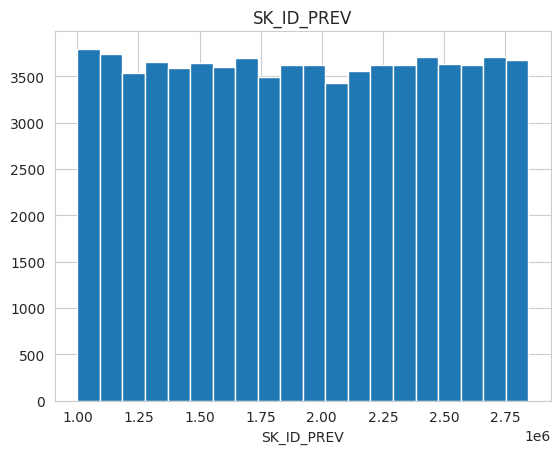

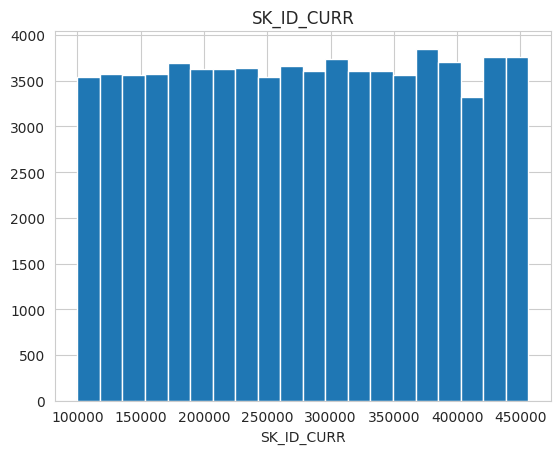

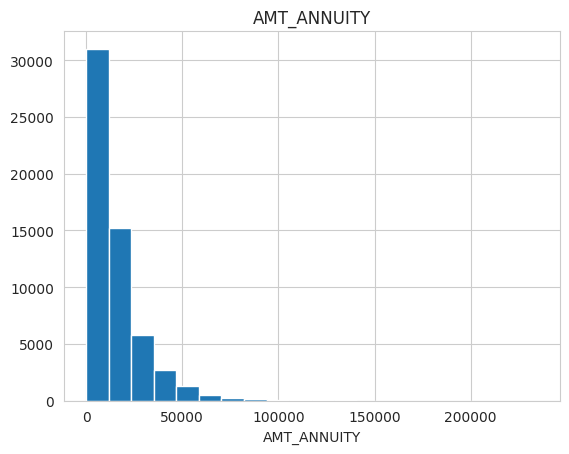

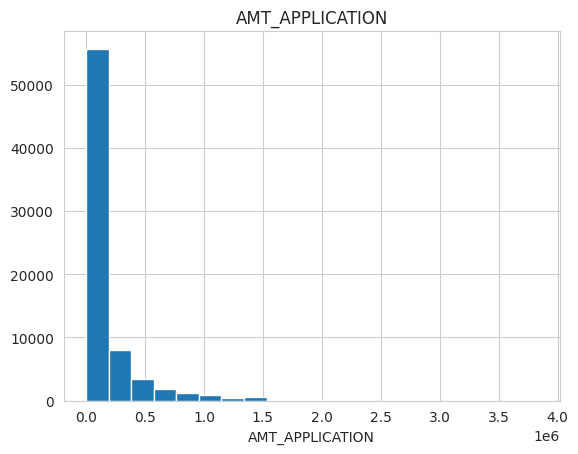

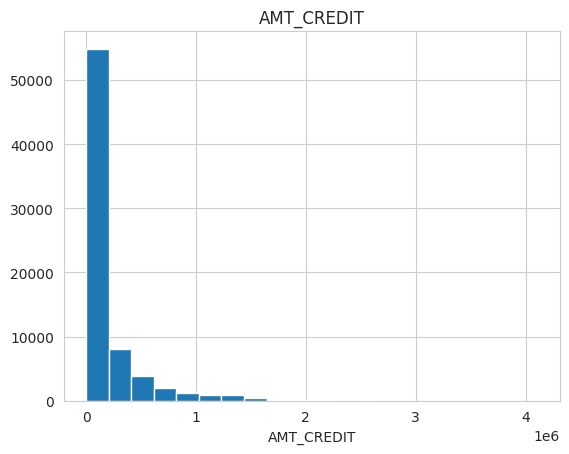

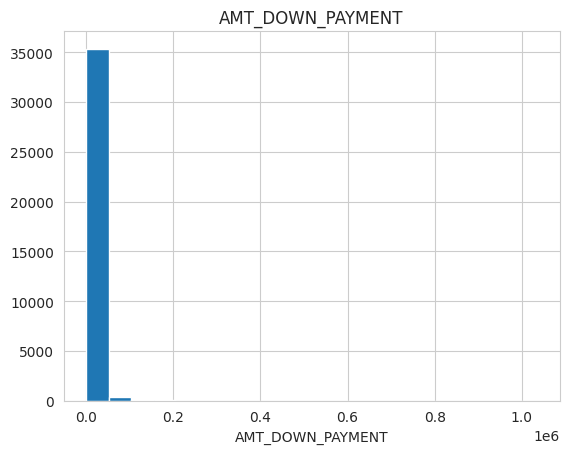

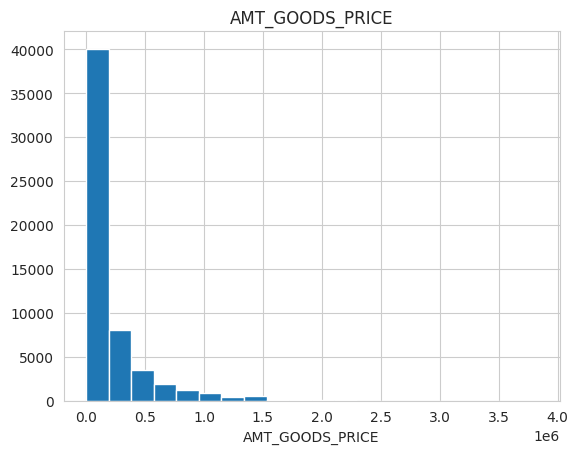

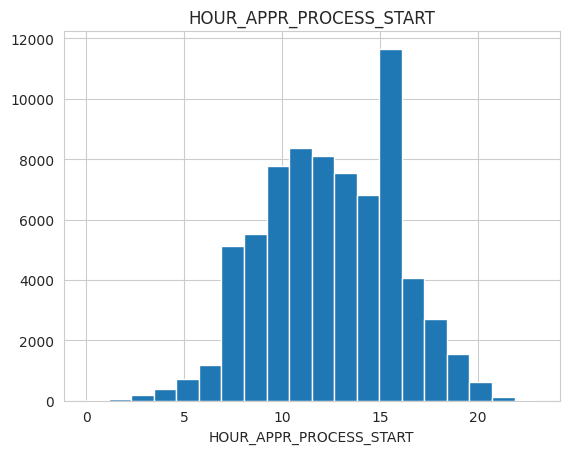

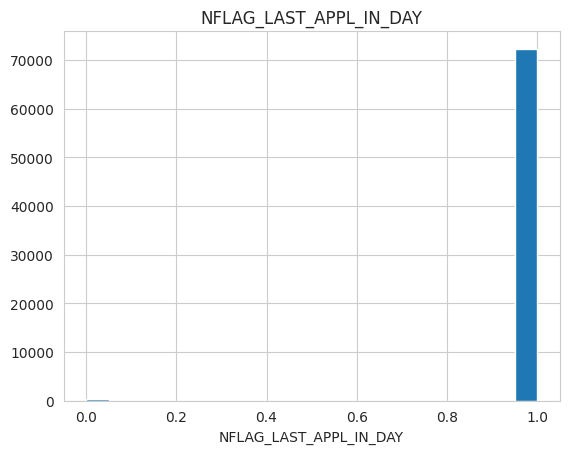

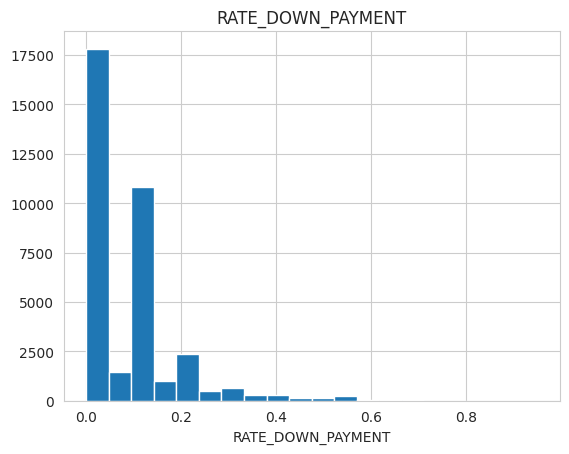

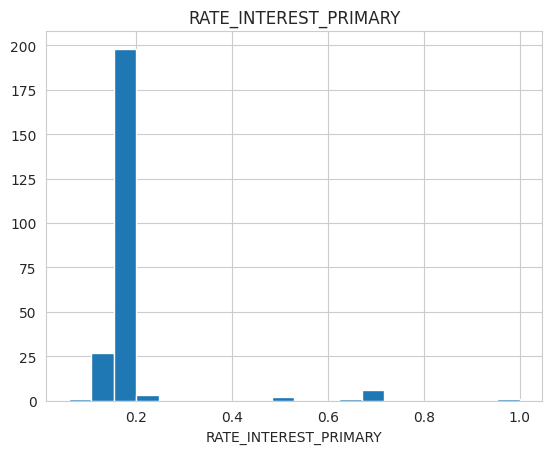

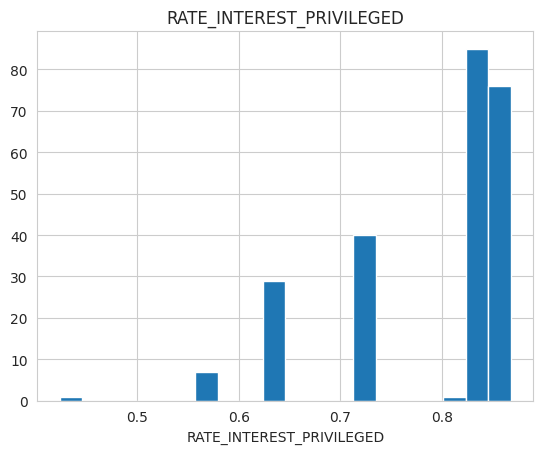

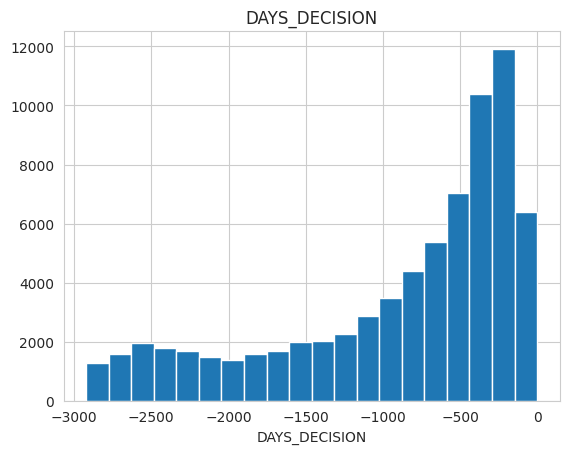

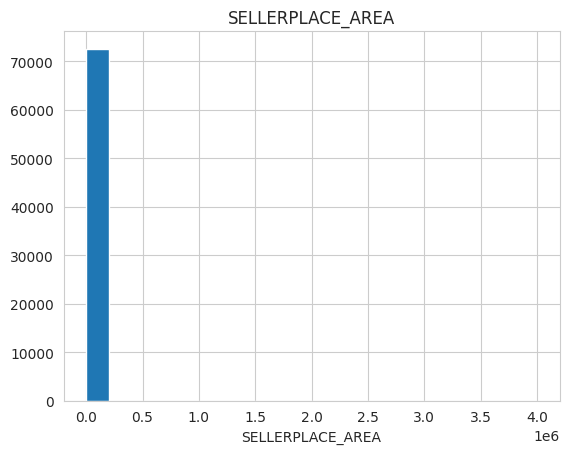

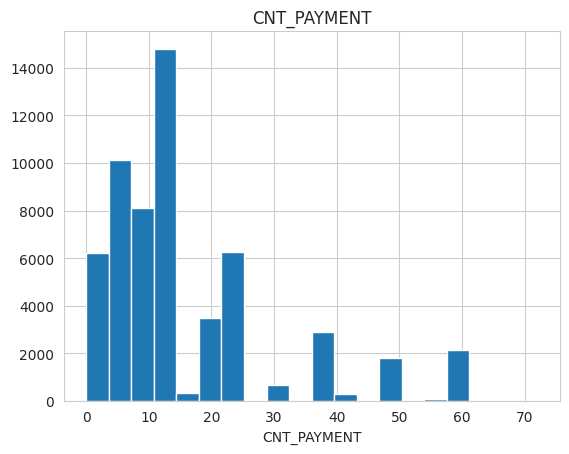

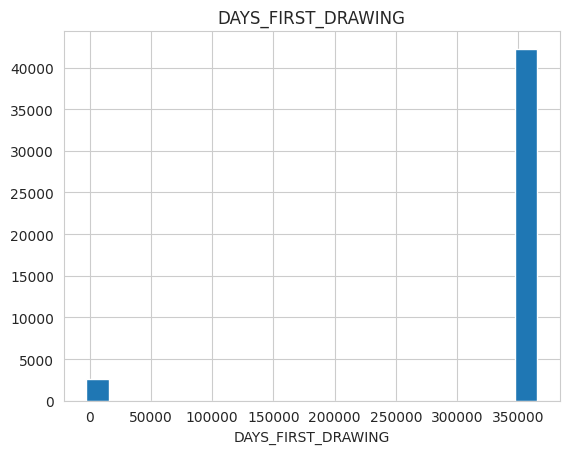

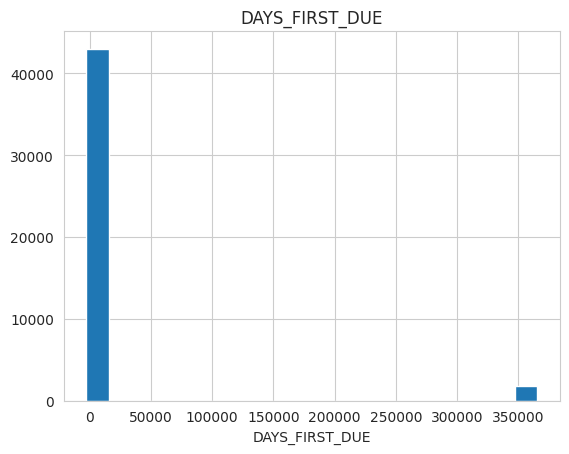

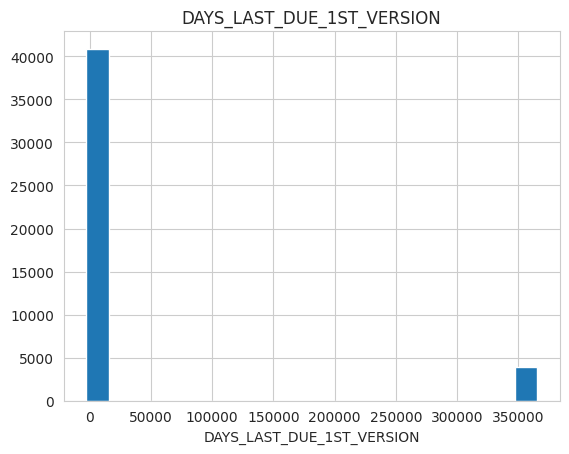

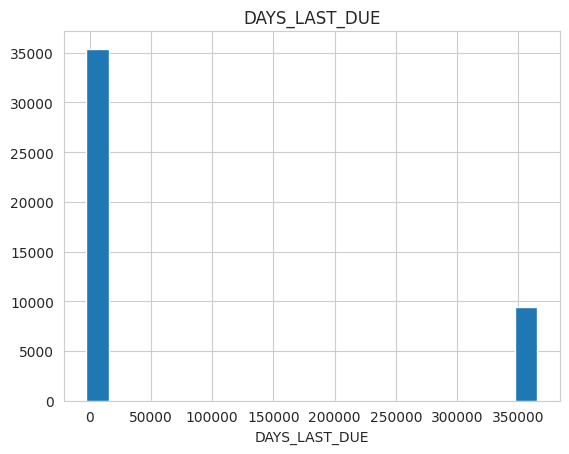

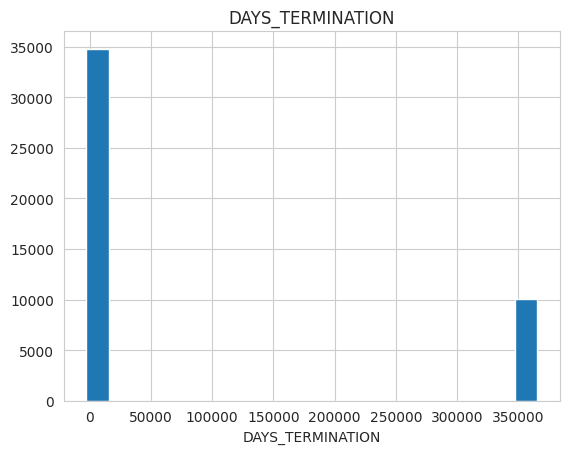

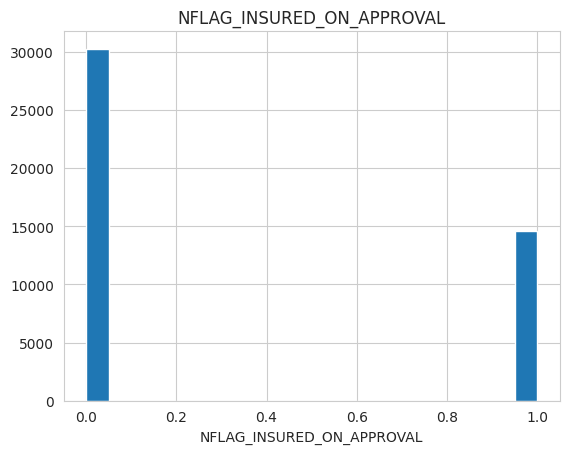

In [145]:
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
hist_for_nums(prev_app, num_cols)

In [146]:
num_prevapp.corr()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
SK_ID_PREV                   1.000000    0.002640     0.005438   
SK_ID_CURR                   0.002640    1.000000     0.002625   
AMT_ANNUITY                  0.005438    0.002625     1.000000   
AMT_APPLICATION              0.000550    0.001937     0.811655   
AMT_CREDIT                   0.002567    0.001202     0.817964   
AMT_DOWN_PAYMENT            -0.011763   -0.007429     0.262968   
AMT_GOODS_PRICE              0.011718    0.003895     0.823810   
HOUR_APPR_PROCESS_START     -0.002922    0.003310    -0.041776   
NFLAG_LAST_APPL_IN_DAY      -0.001428    0.002766     0.018620   
RATE_DOWN_PAYMENT           -0.012608   -0.002575    -0.107090   
RATE_INTEREST_PRIMARY       -0.010318    0.098077     0.077462   
RATE_INTEREST_PRIVILEGED    -0.113663   -0.116701    -0.164413   
DAYS_DECISION                0.016147   -0.000260     0.270990   
SELLERPLACE_AREA             0.005624    0.000309    -0.010861   
CNT_PAYMENT                  0.012371   -0.003466     0.383362   
DAYS_FIRST_DRAWING          -0.004233    0.001461     0.044311   
DAYS_FIRST_DUE               0.004877    0.004703    -0.061690   
DAYS_LAST_DUE_1ST_VERSION    0.007211    0.000644    -0.066623   
DAYS_LAST_DUE                0.000863   -0.005160     0.086748   
DAYS_TERMINATION             0.001560   -0.005345     0.074312   
NFLAG_INSURED_ON_APPROVAL    0.000824   -0.003010     0.283130   

                           AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  \
SK_ID_PREV                        0.000550    0.002567         -0.011763   
SK_ID_CURR                        0.001937    0.001202         -0.007429   
AMT_ANNUITY                       0.811655    0.817964          0.262968   
AMT_APPLICATION                   1.000000    0.976257          0.435903   
AMT_CREDIT                        0.976257    1.000000          0.276295   
AMT_DOWN_PAYMENT                  0.435903    0.276295          1.000000   
AMT_GOODS_PRICE                   0.999890    0.993708          0.435903   
HOUR_APPR_PROCESS_START          -0.023115   -0.031240          0.021365   
NFLAG_LAST_APPL_IN_DAY            0.003171   -0.026625         -0.000685   
RATE_DOWN_PAYMENT                -0.084735   -0.197500          0.556643   
RATE_INTEREST_PRIMARY             0.051823    0.071675         -0.075269   
RATE_INTEREST_PRIVILEGED         -0.167055   -0.155294         -0.131857   
DAYS_DECISION                     0.134149    0.136464         -0.040231   
SELLERPLACE_AREA                 -0.004552   -0.005572          0.001676   
CNT_PAYMENT                       0.670520    0.666019          0.016380   
DAYS_FIRST_DRAWING                0.060671   -0.042426         -0.009185   
DAYS_FIRST_DUE                   -0.050579   -0.005316         -0.015820   
DAYS_LAST_DUE_1ST_VERSION        -0.073137    0.043423          0.005906   
DAYS_LAST_DUE                     0.184905    0.229727         -0.041460   
DAYS_TERMINATION                  0.162790    0.220814         -0.038599   
NFLAG_INSURED_ON_APPROVAL         0.259417    0.266940         -0.040500   

                           AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
SK_ID_PREV                        0.011718                -0.002922   
SK_ID_CURR                        0.003895                 0.003310   
AMT_ANNUITY                       0.823810                -0.041776   
AMT_APPLICATION                   0.999890                -0.023115   
AMT_CREDIT                        0.993708                -0.031240   
AMT_DOWN_PAYMENT                  0.435903                 0.021365   
AMT_GOODS_PRICE                   1.000000                -0.055922   
HOUR_APPR_PROCESS_START          -0.055922                 1.000000   
NFLAG_LAST_APPL_IN_DAY           -0.018702                 0.010926   
RATE_DOWN_PAYMENT                -0.084735                 0.014698   
RATE_INTEREST_PRIMARY             0.051823                -0.110691   
RATE_INTEREST_PRIVILEGED         -0.167055       

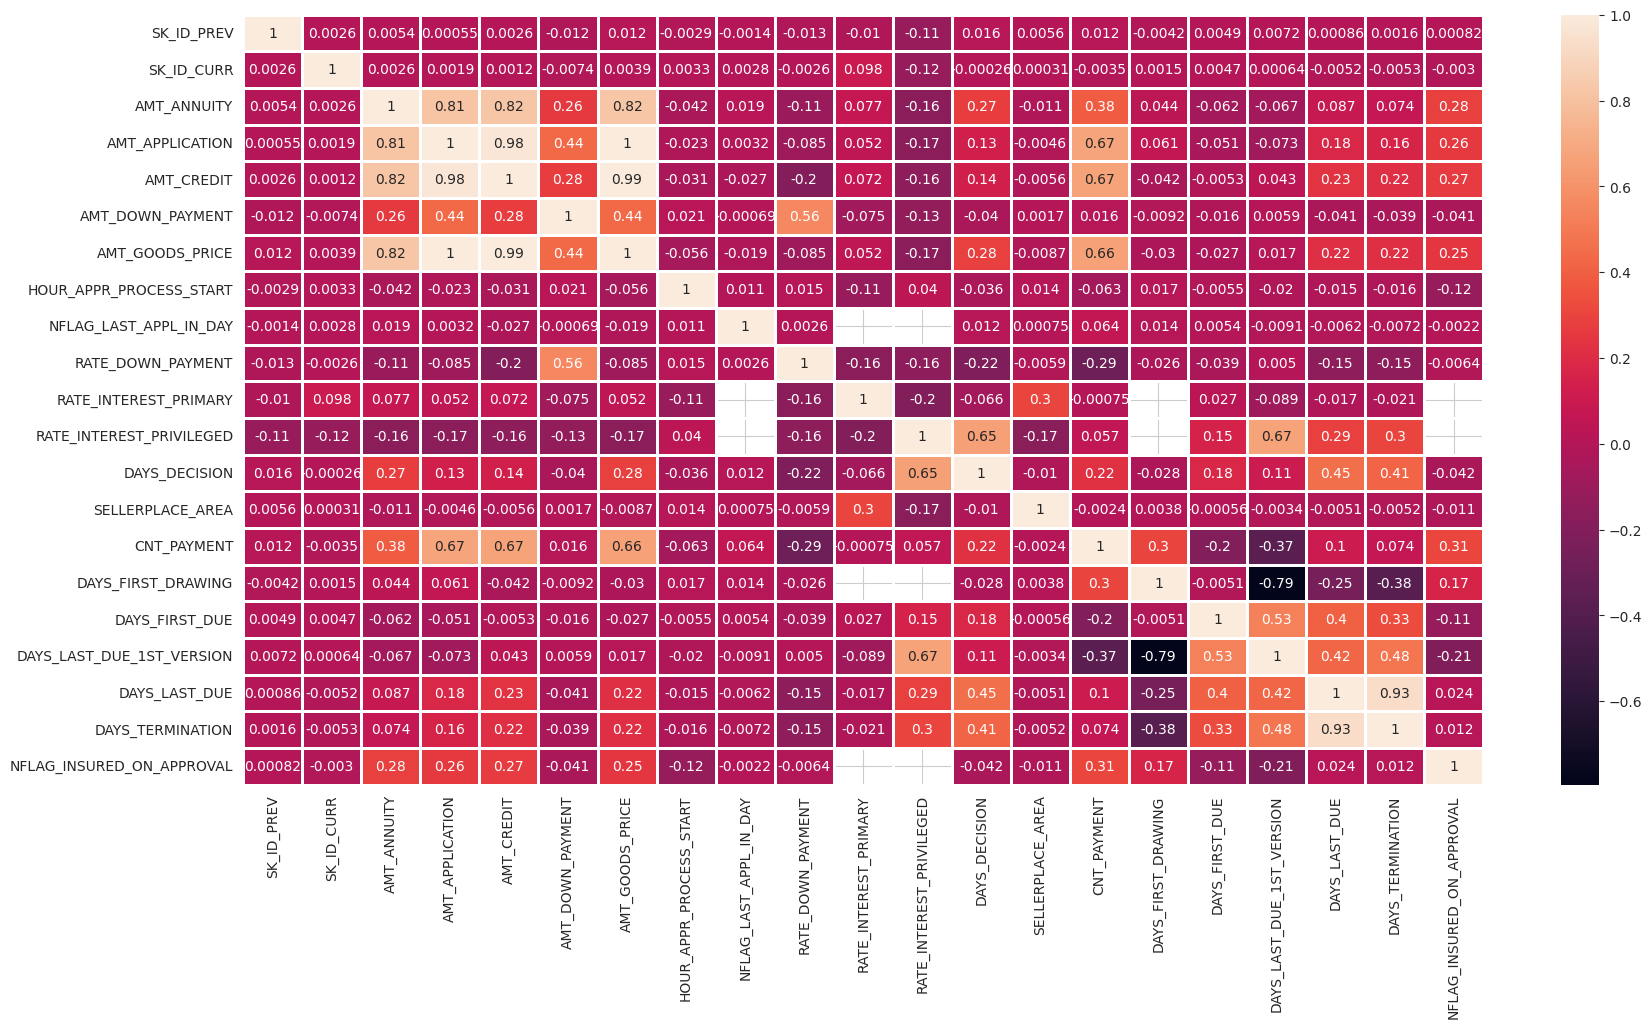

In [147]:
# heatmap
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(num_prevapp.corr(), annot=True, linewidths=1, linecolor="white")
plt.show()

### Categorical Variables

In [148]:
# How many categorical variables are in the data set?
print('Number of categoricals variables: ', len(cat_cols))
cat_cols

Number of categoricals variables:  16


Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

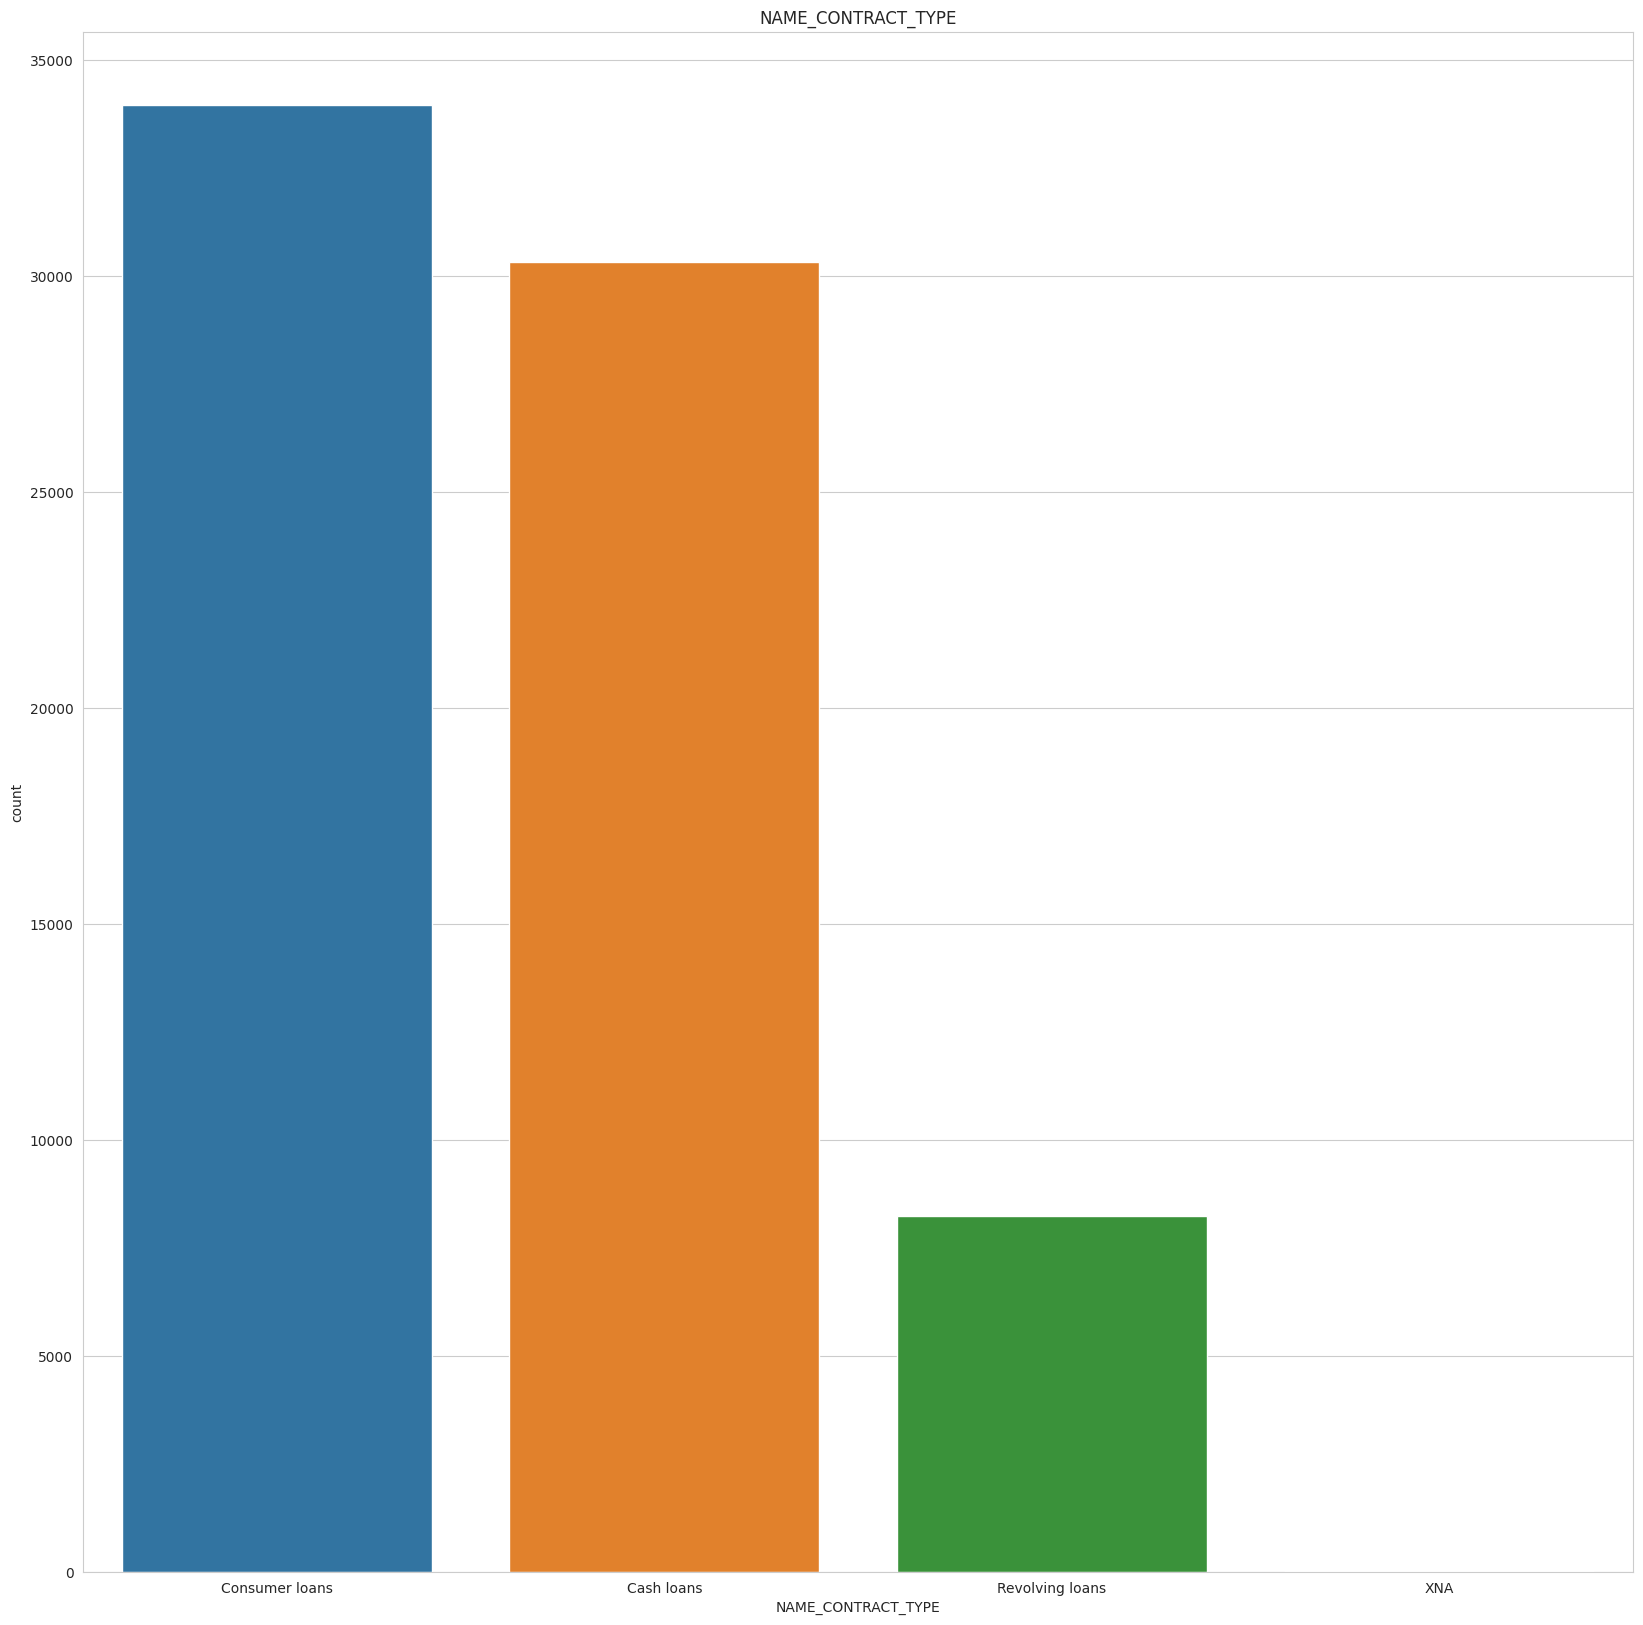

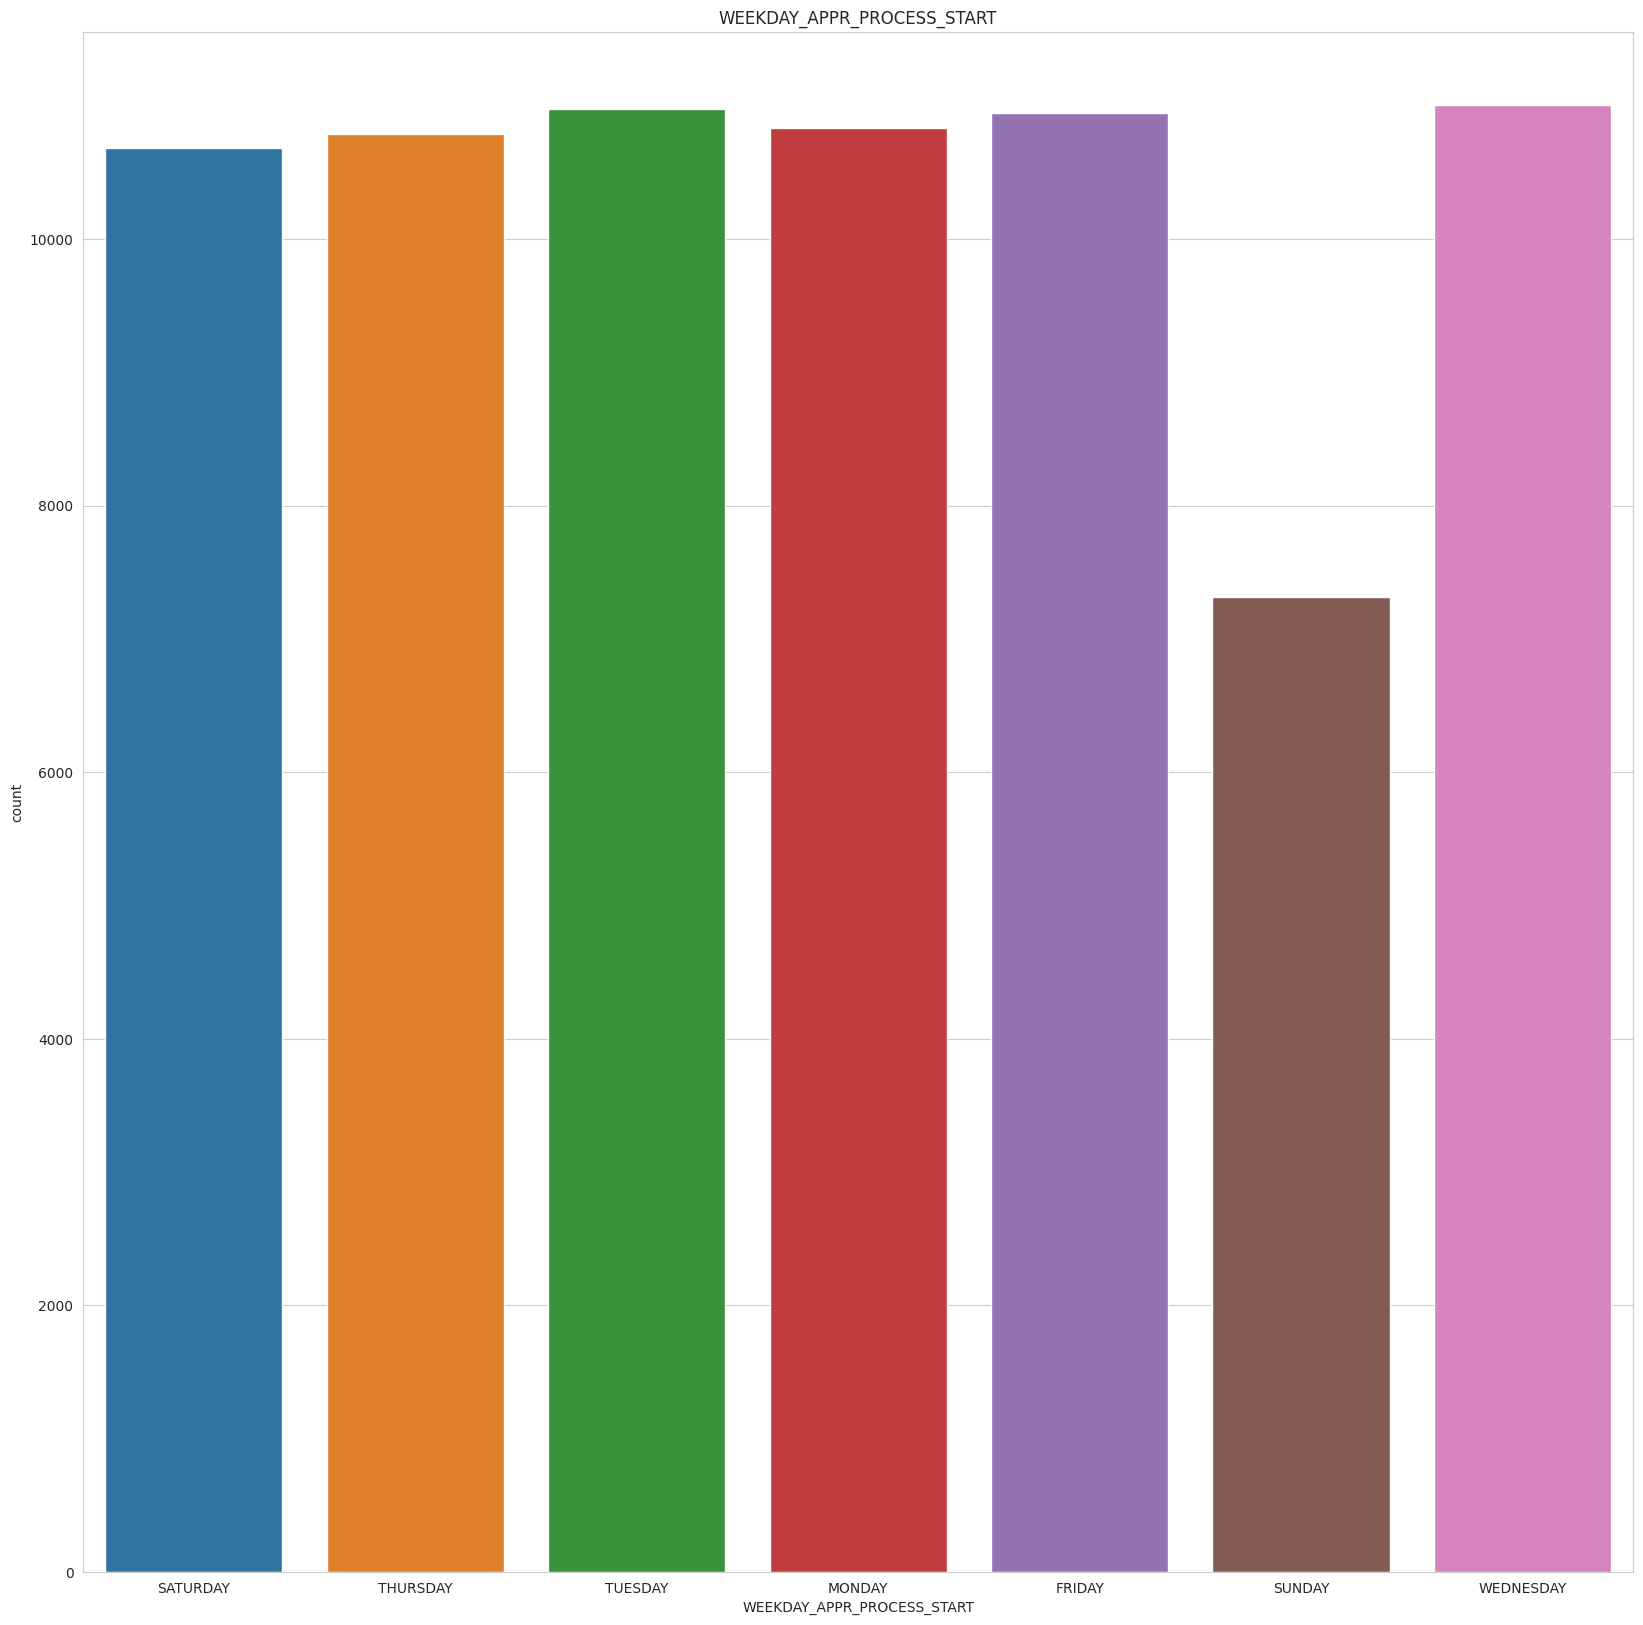

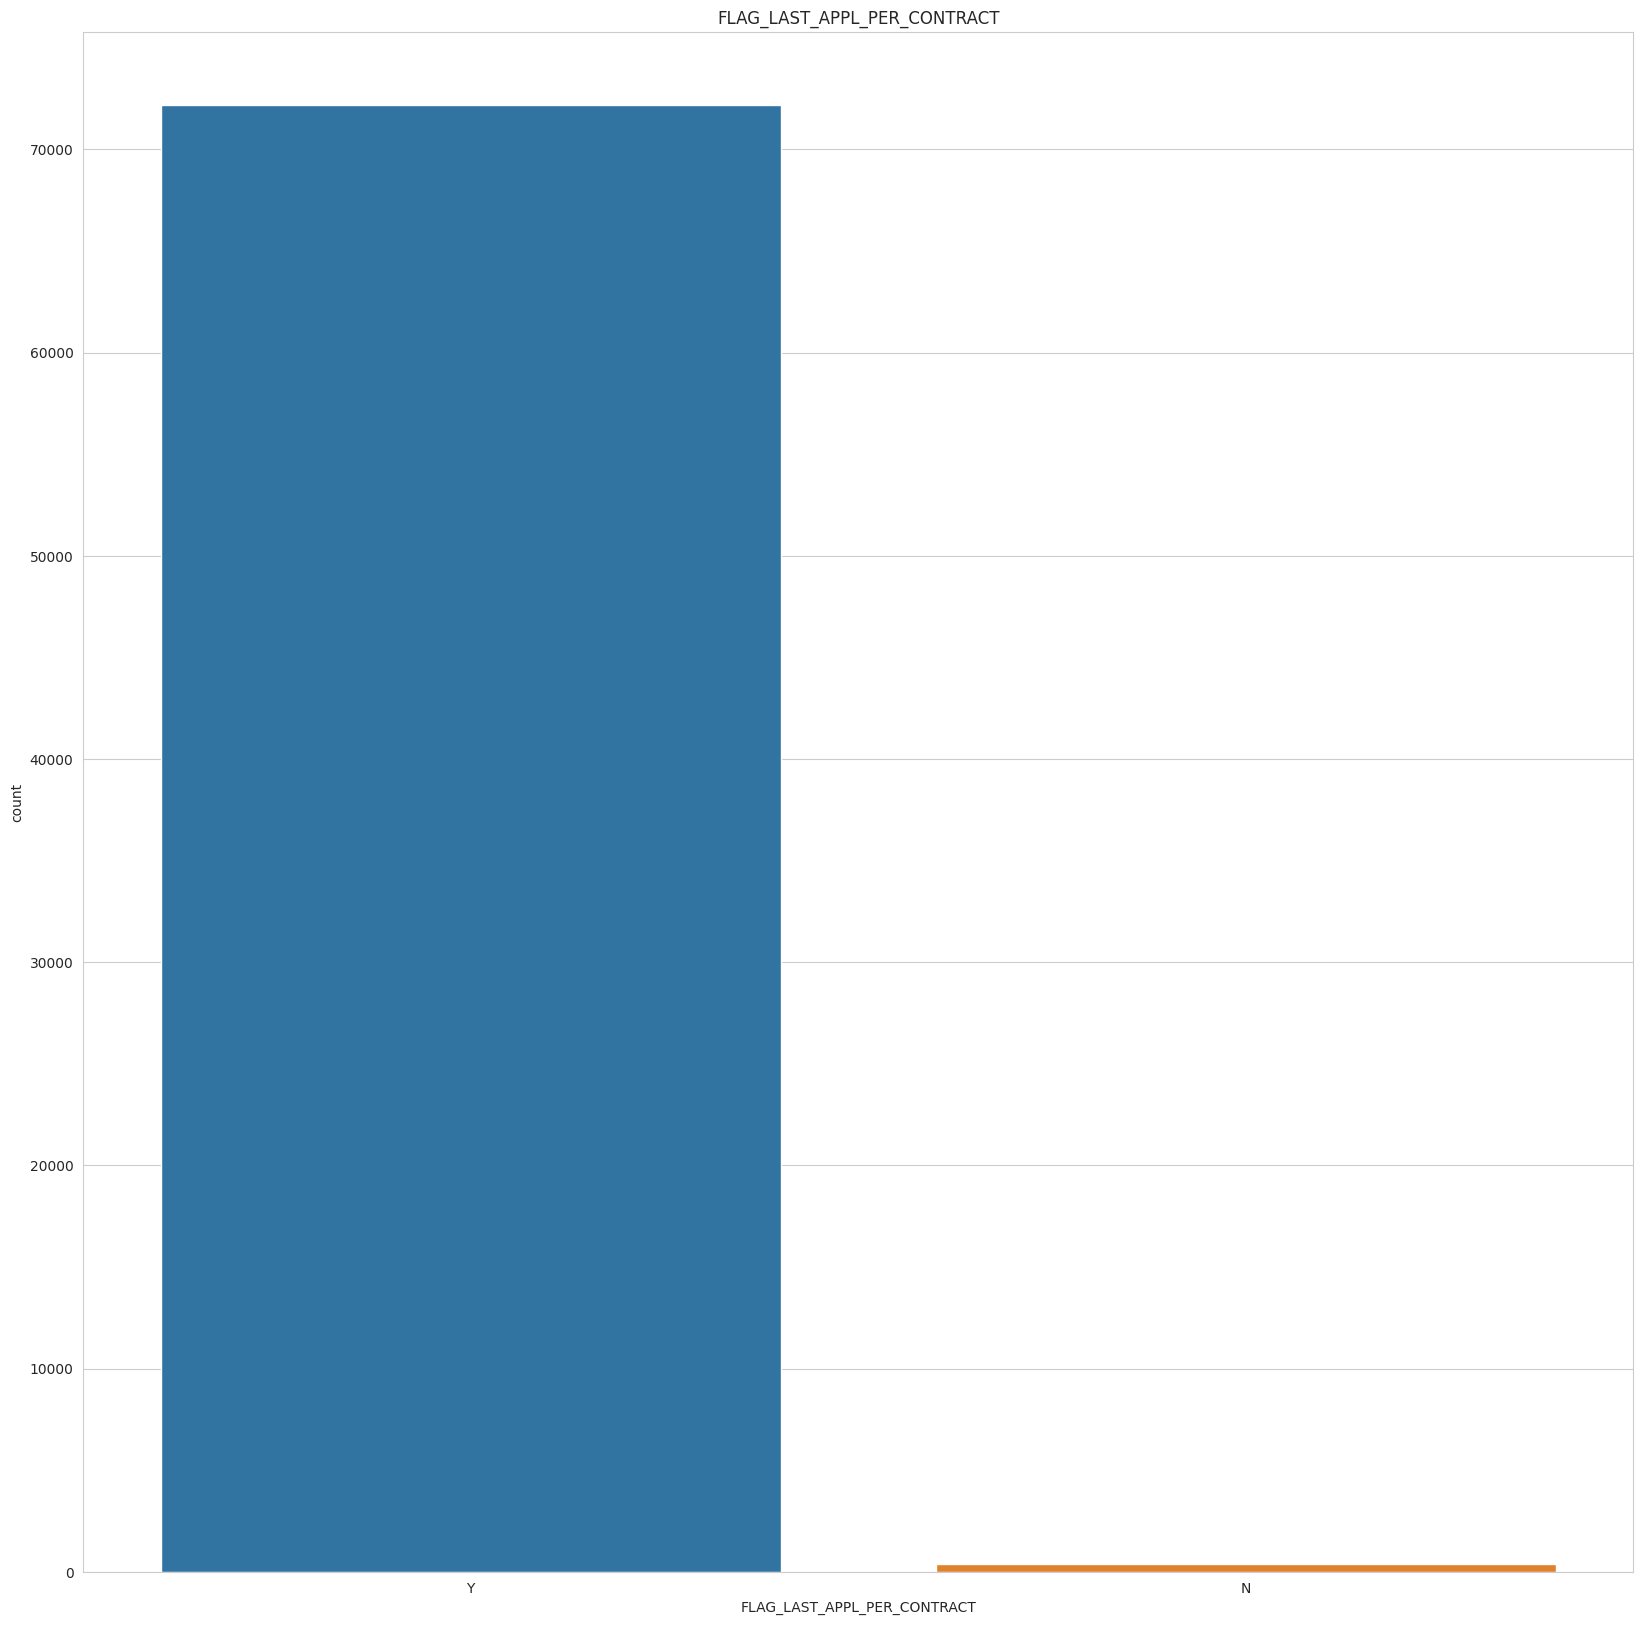

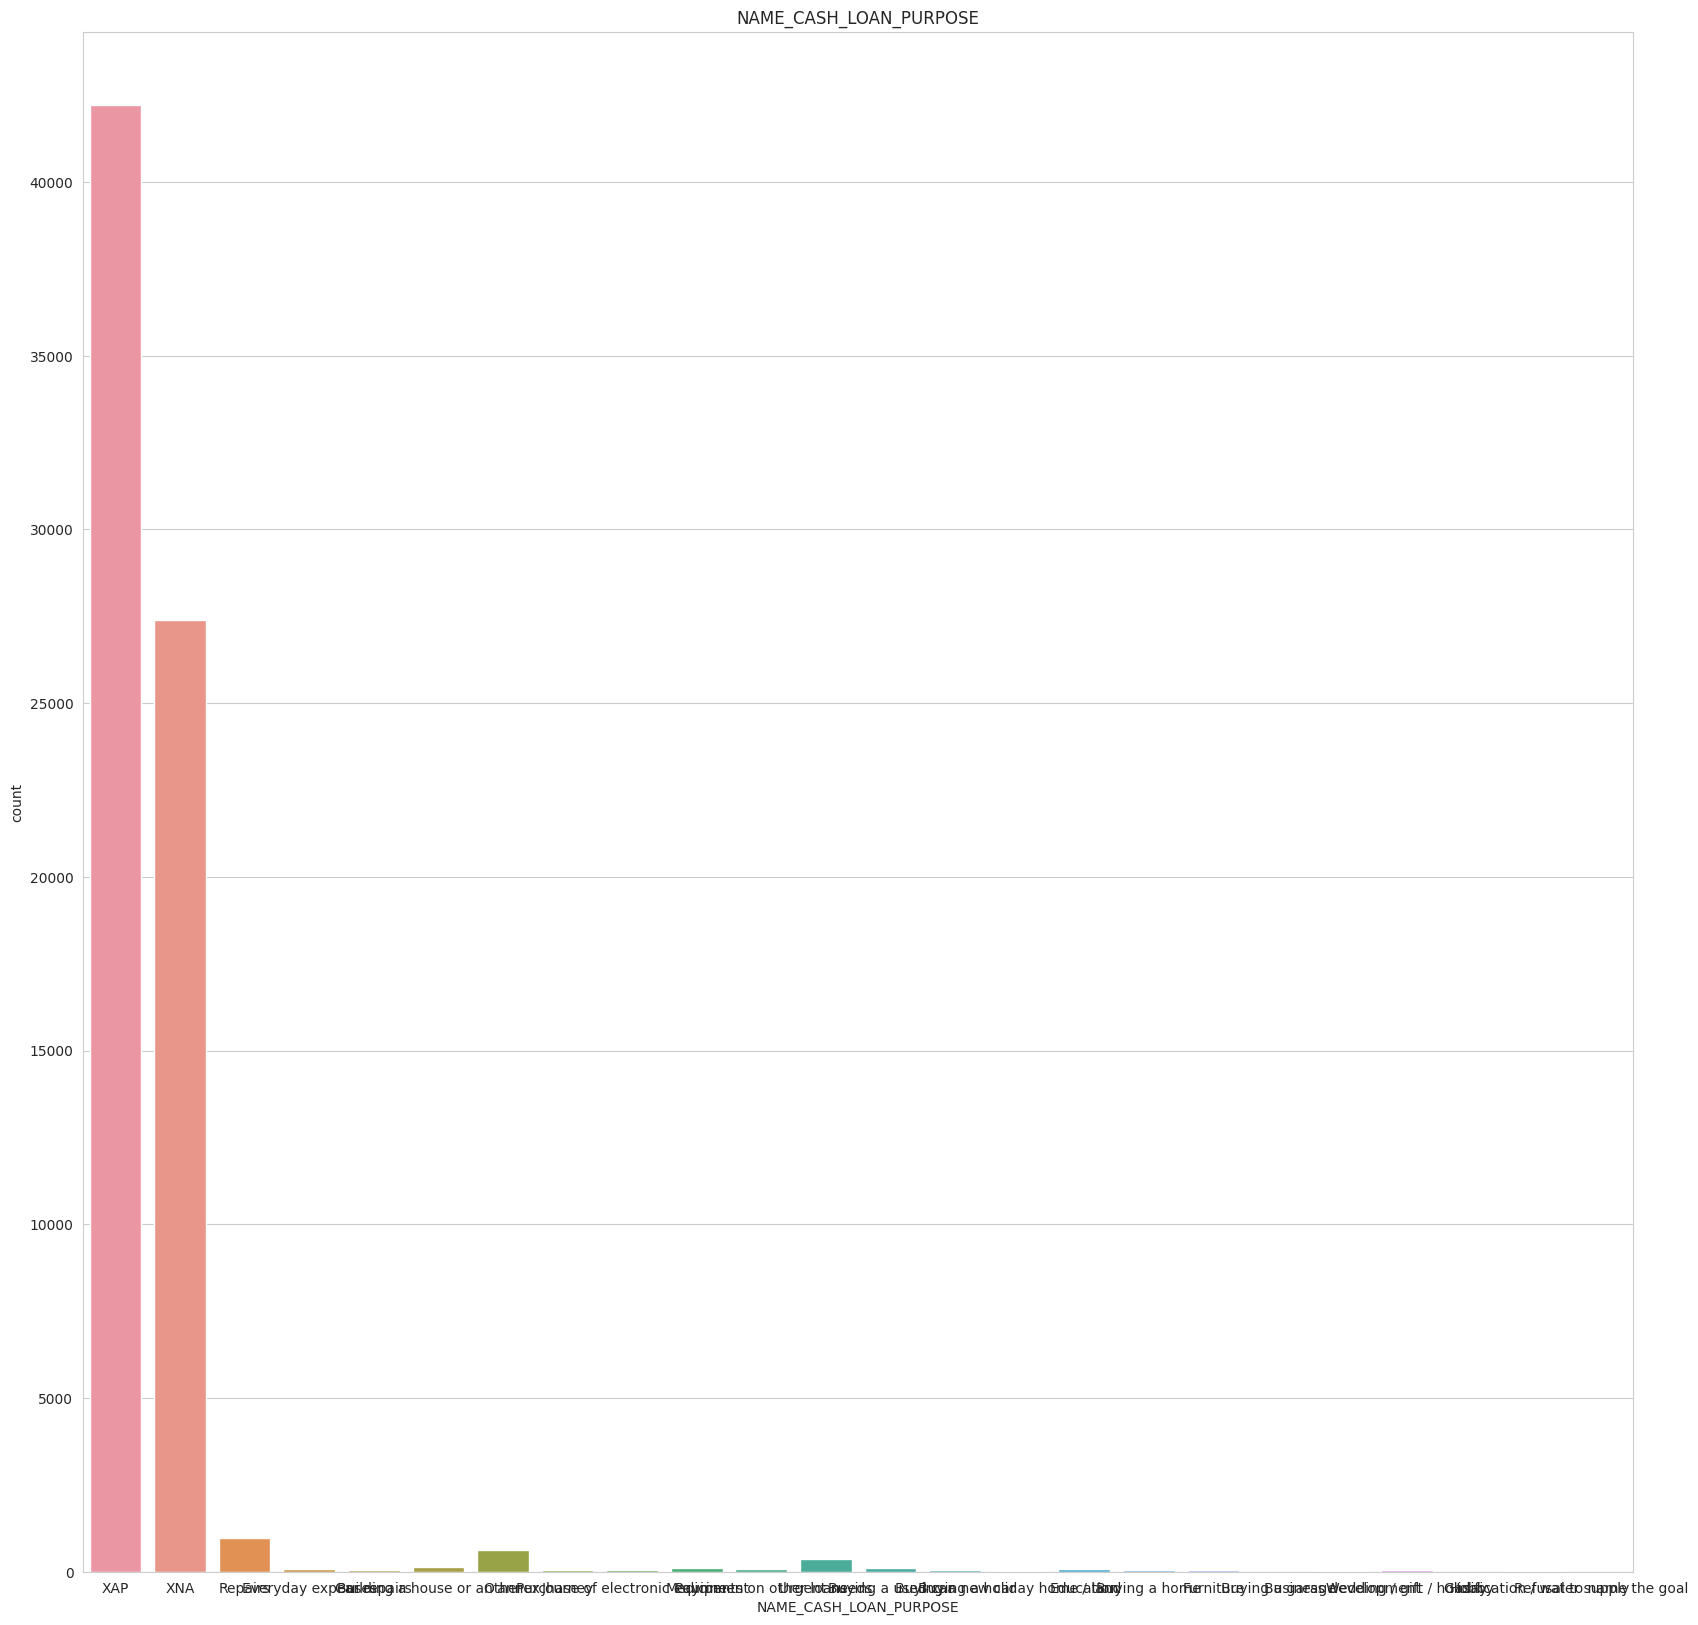

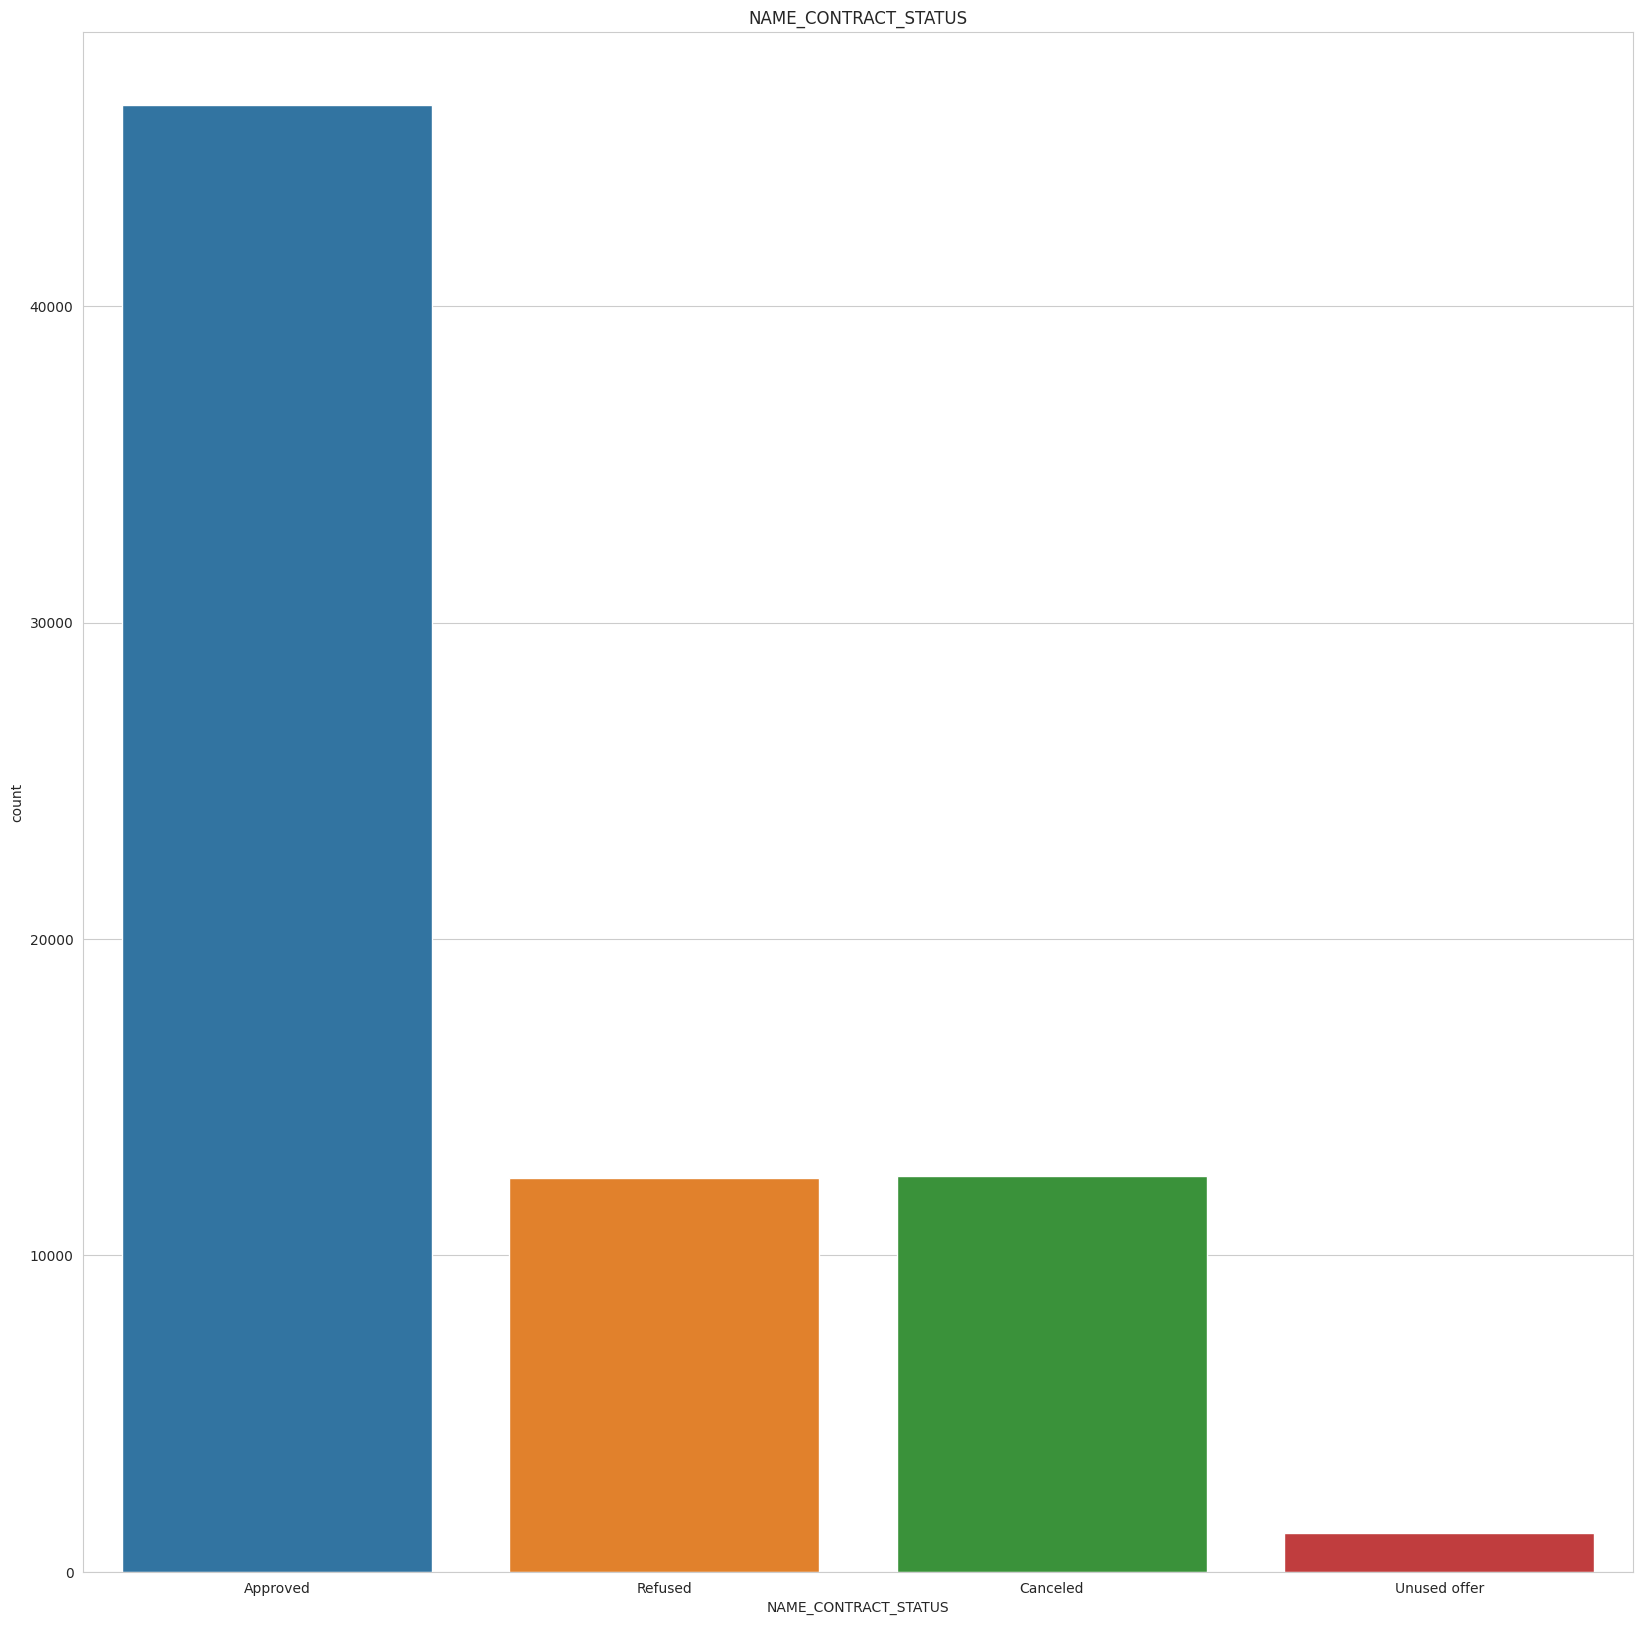

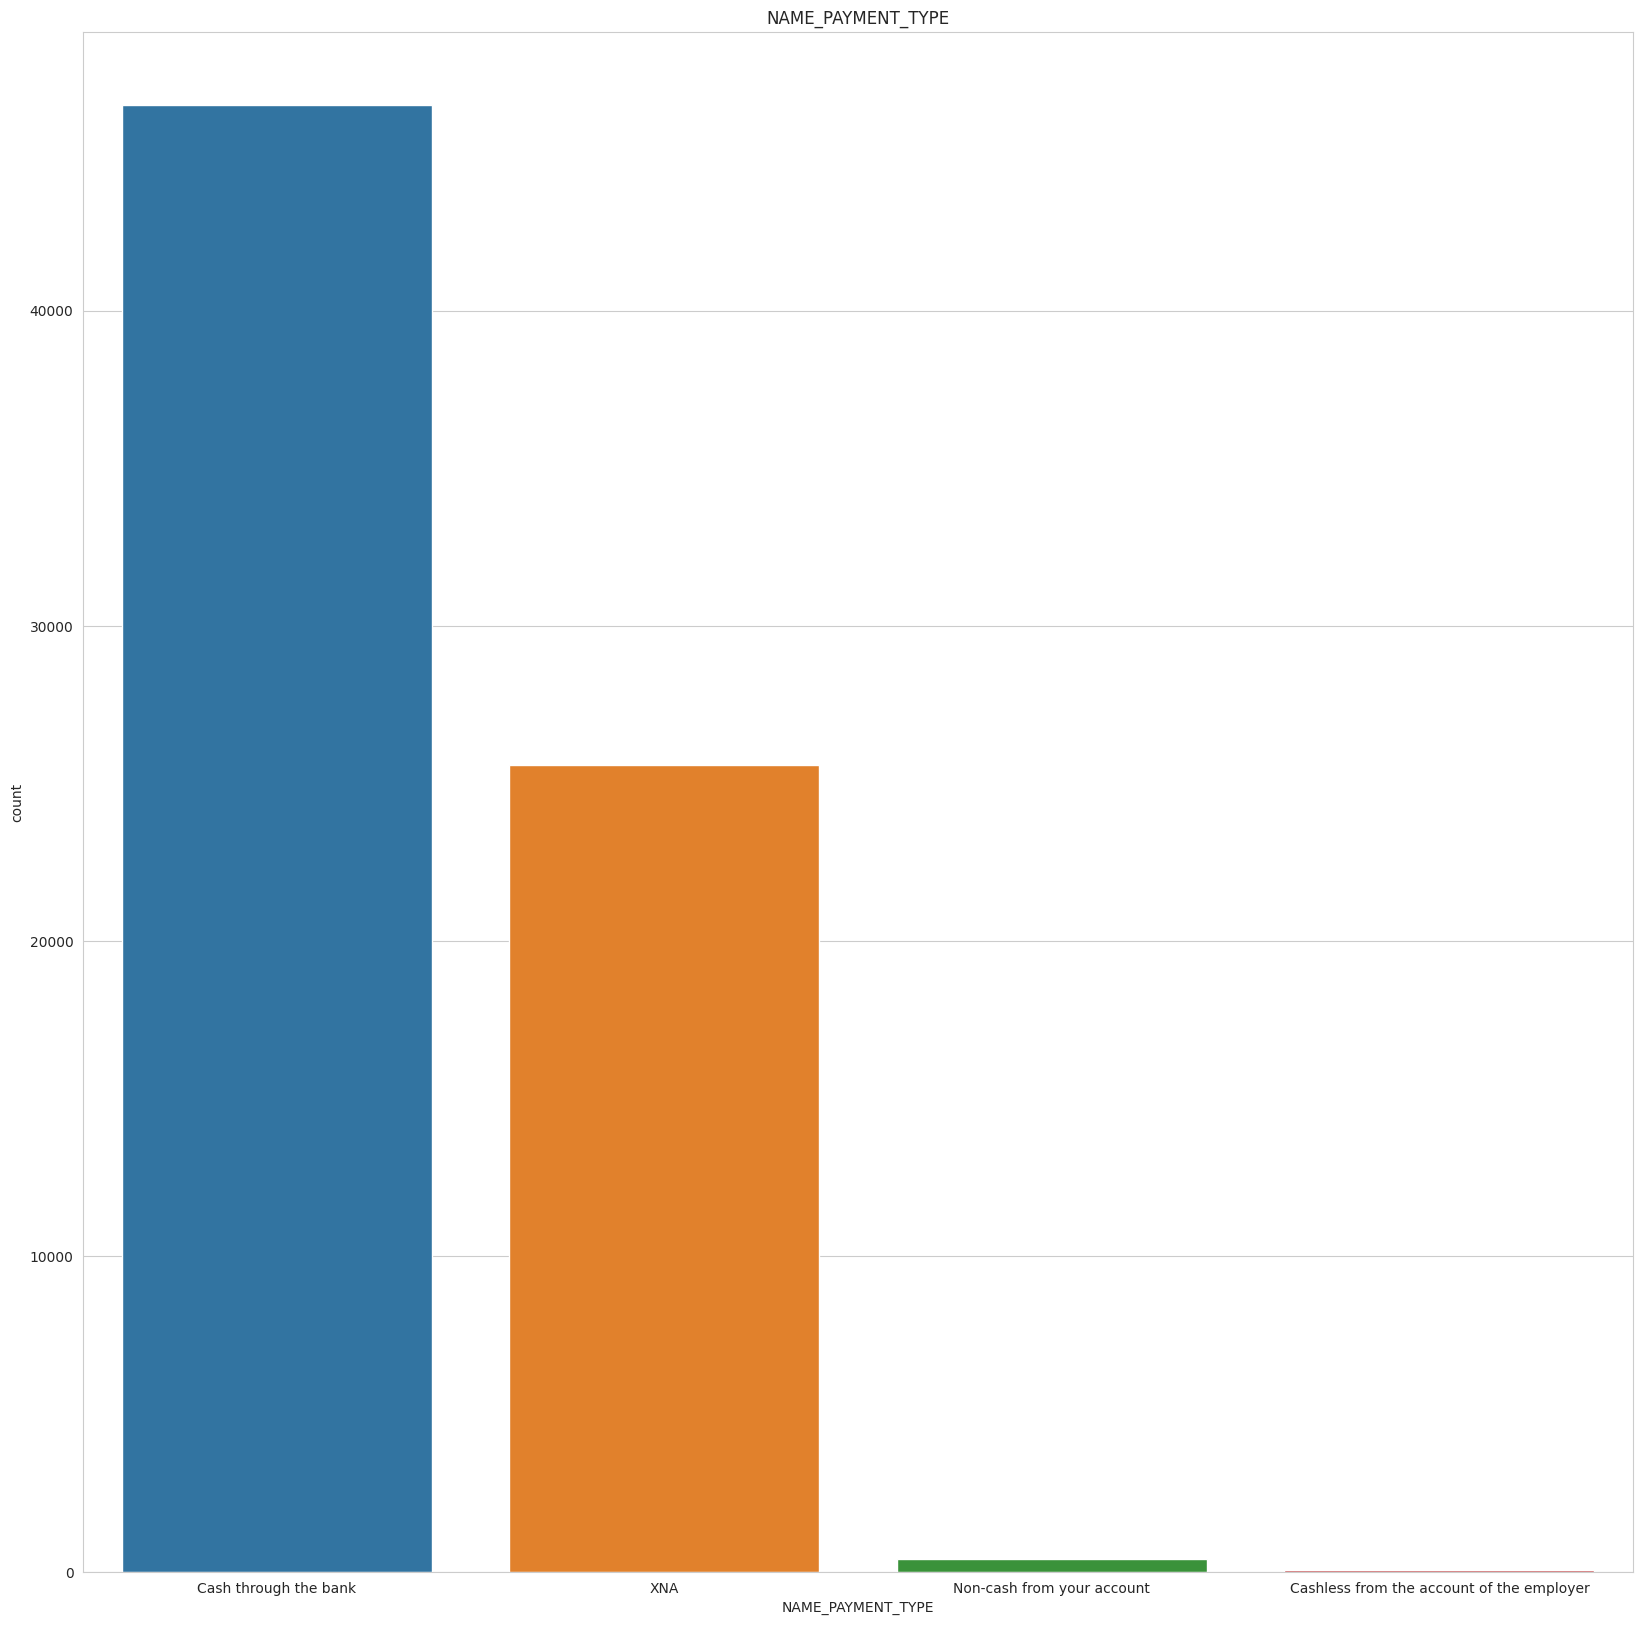

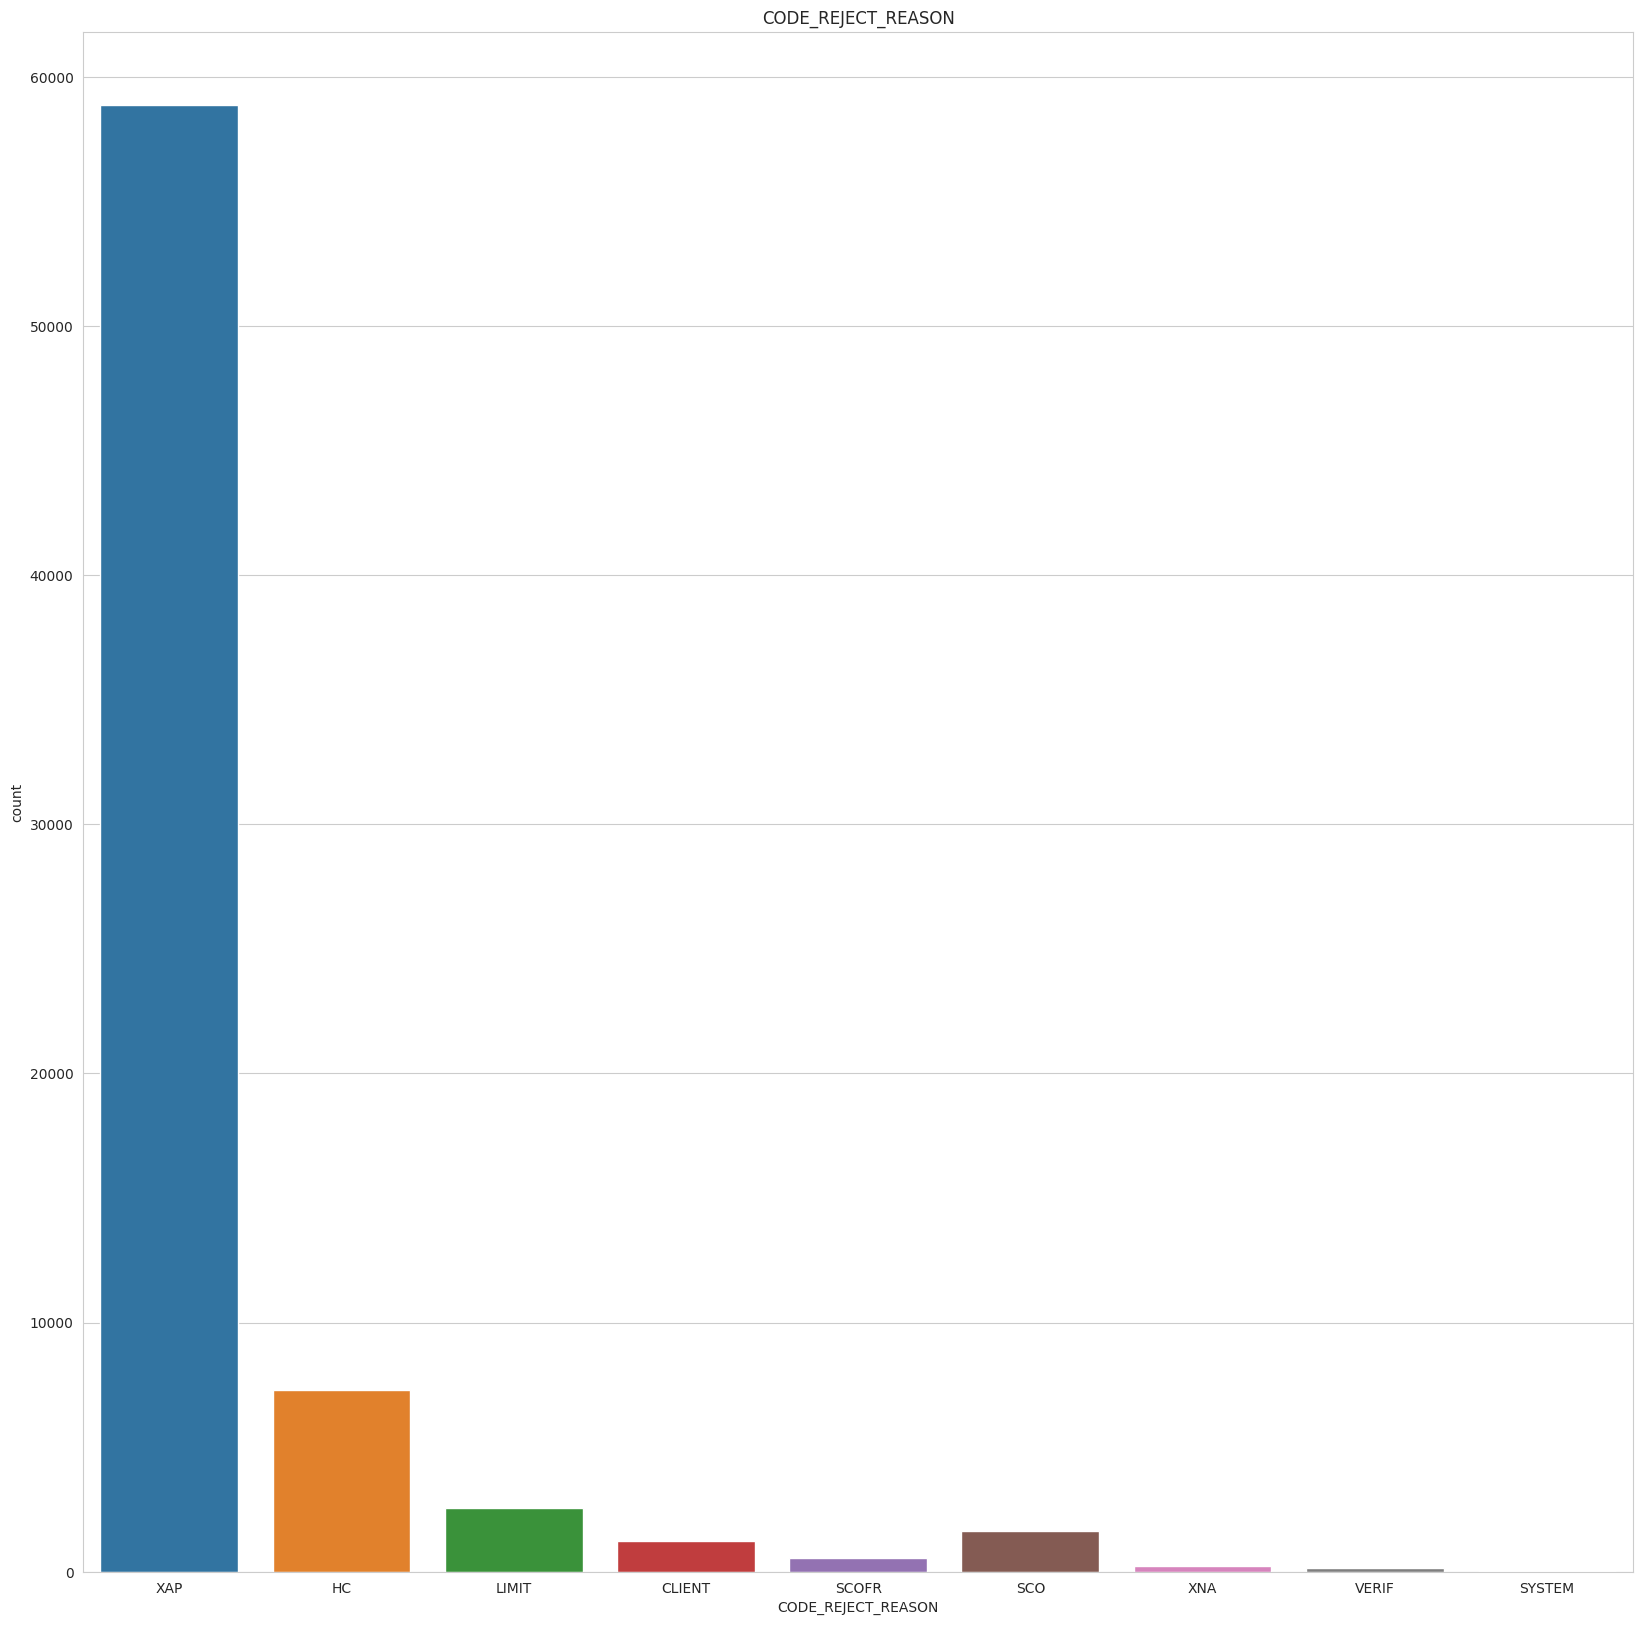

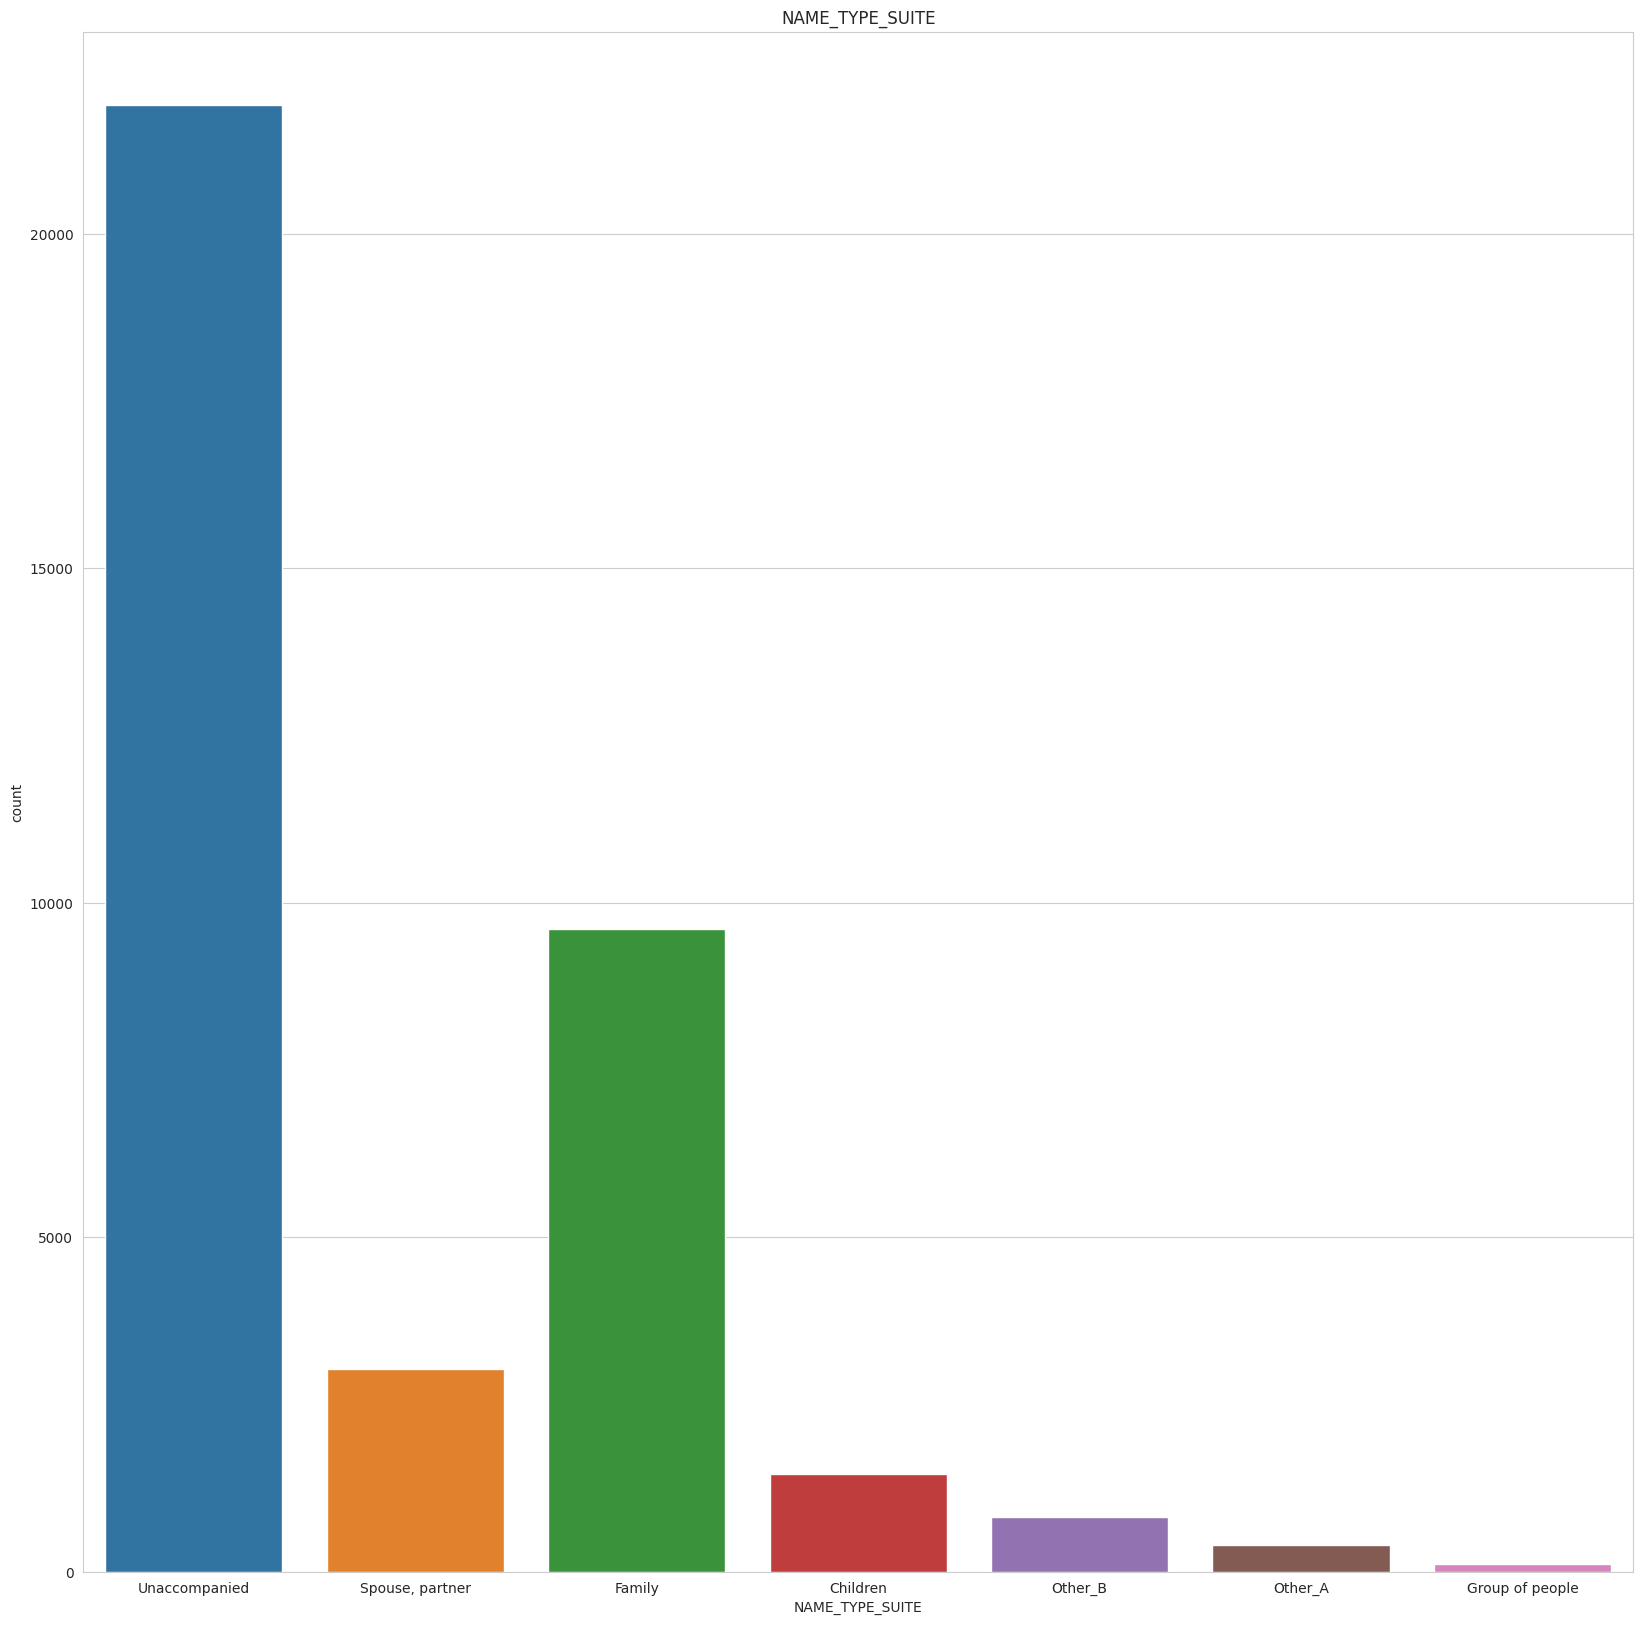

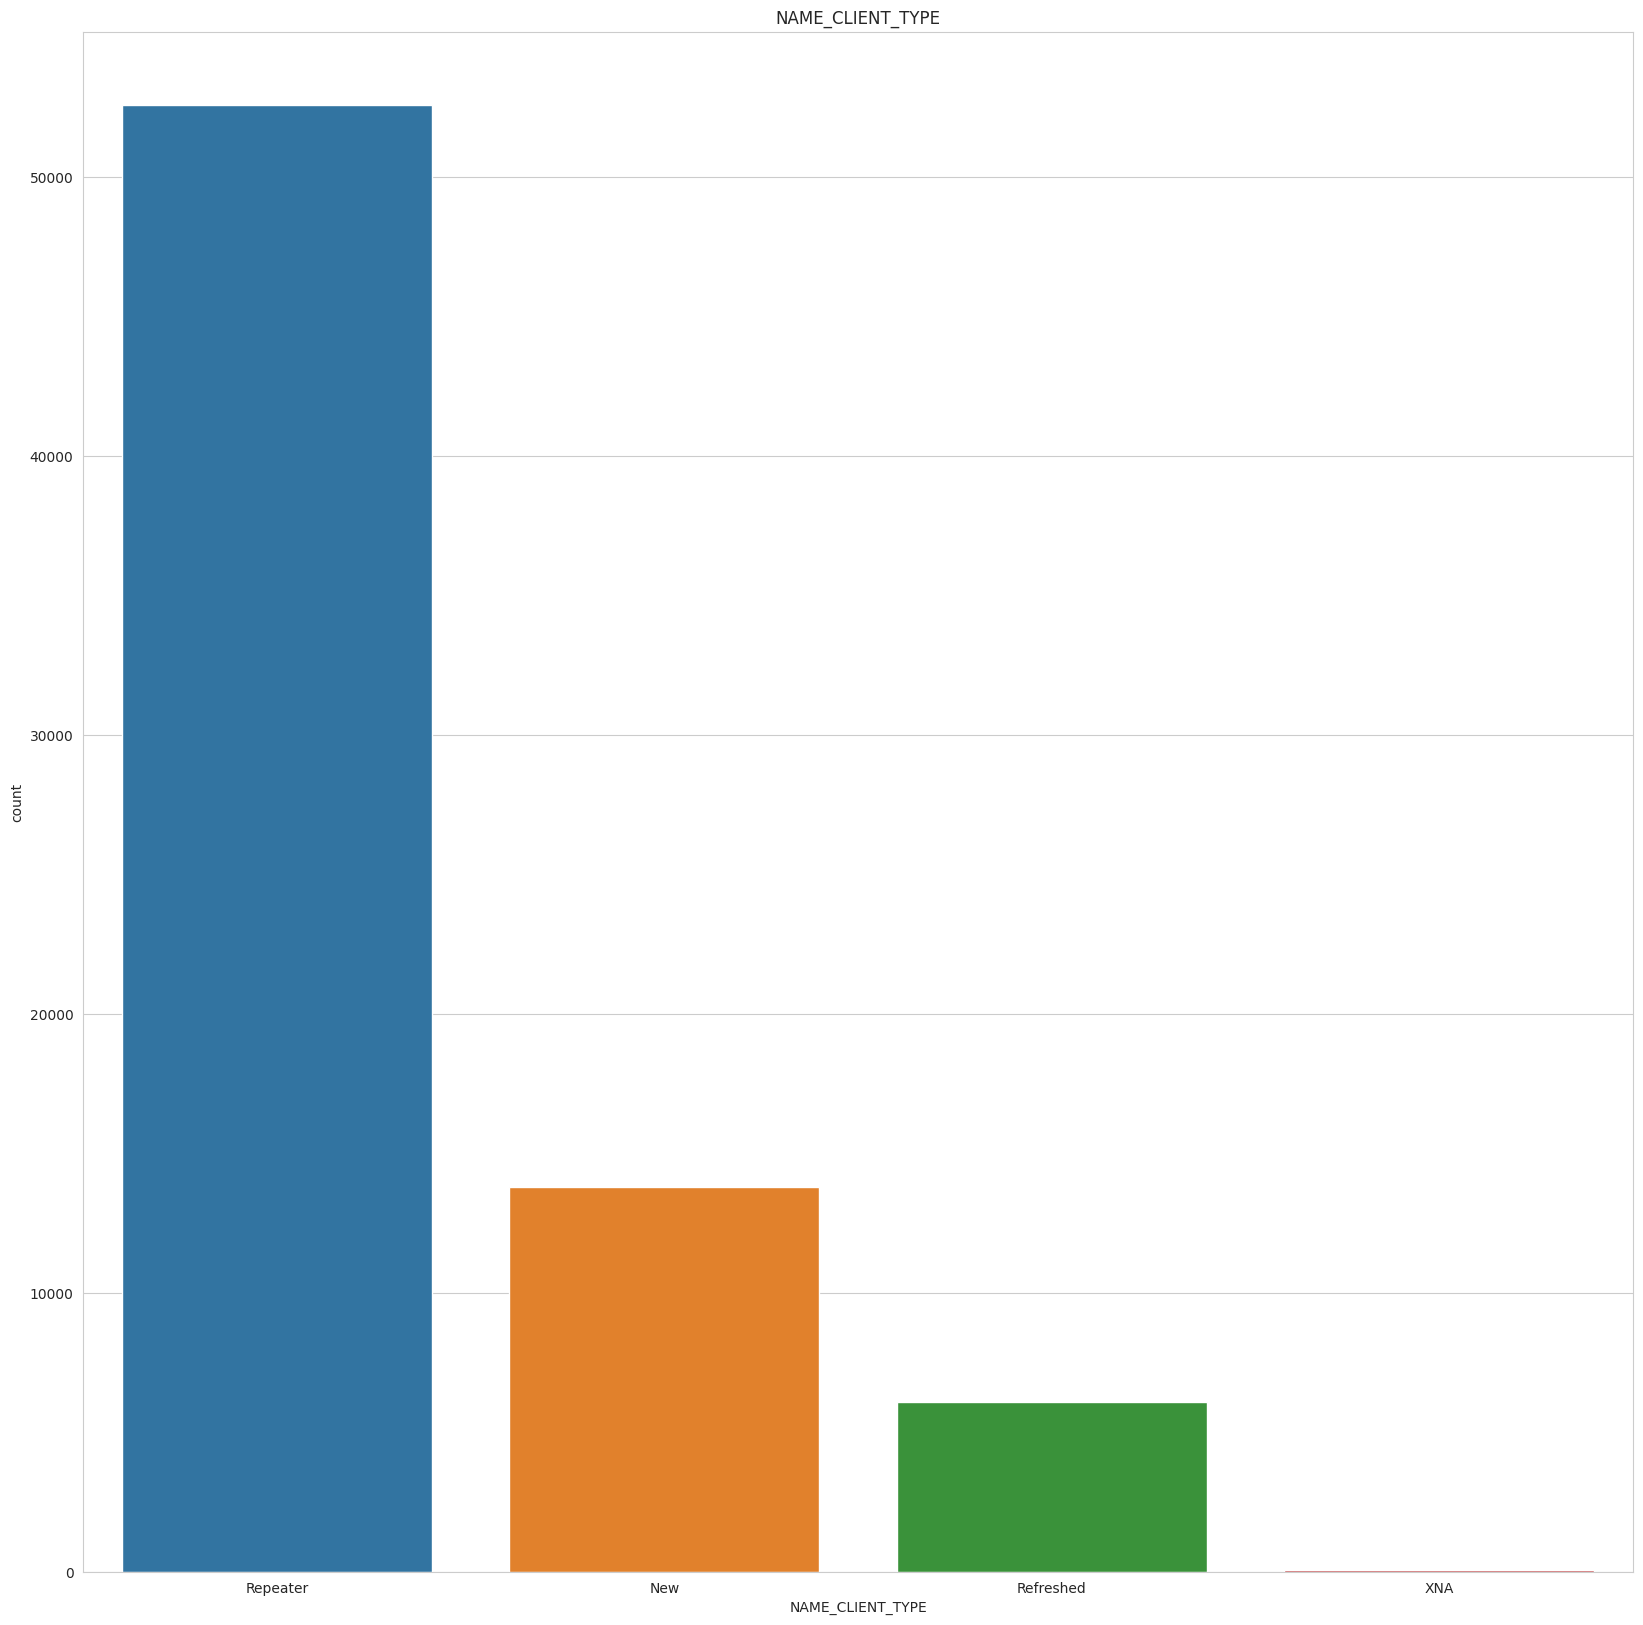

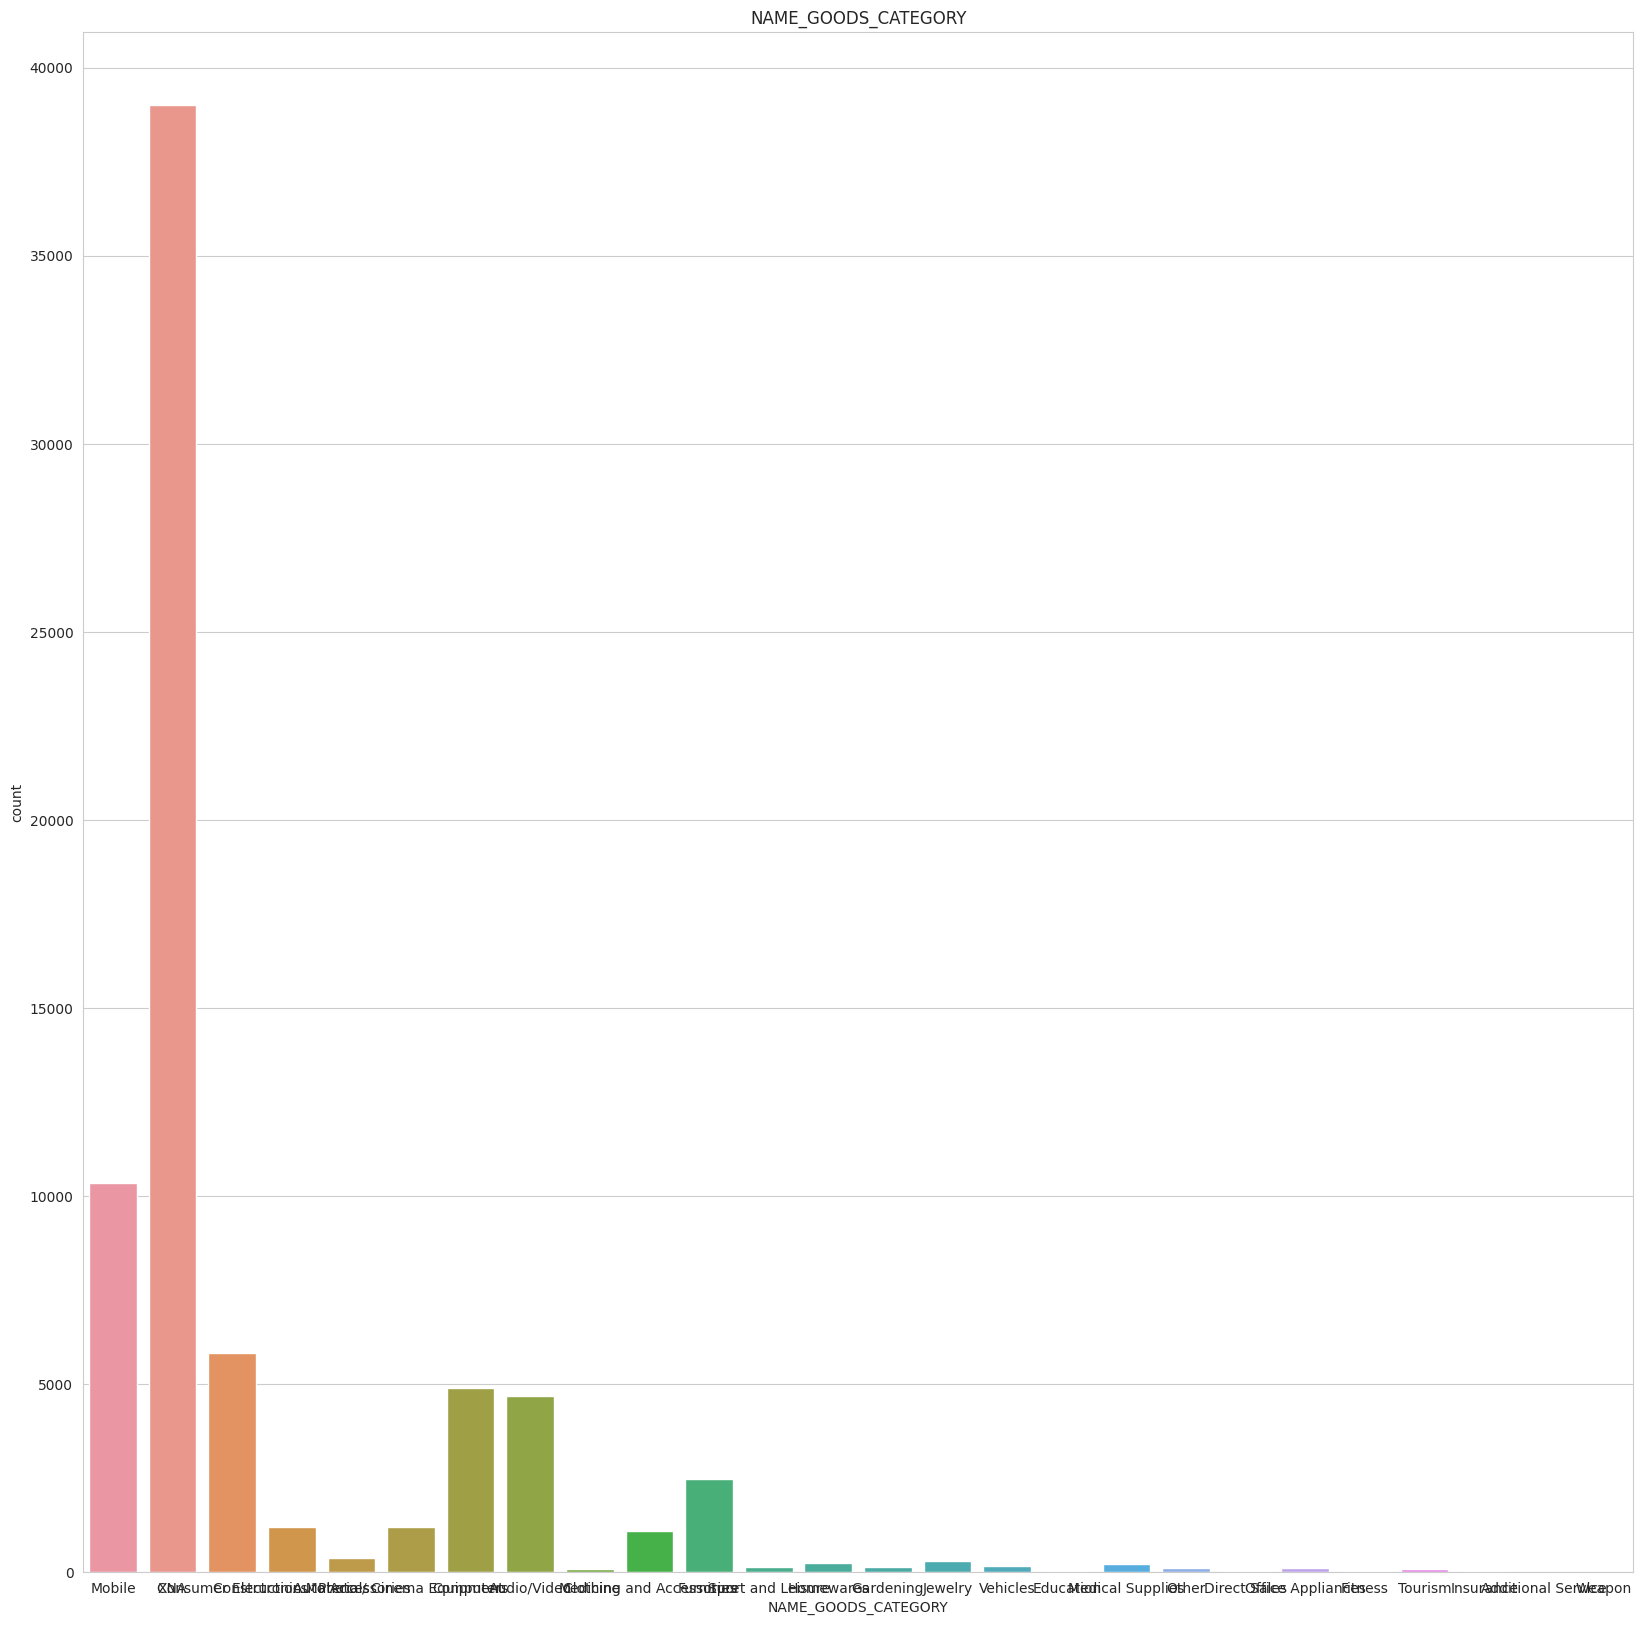

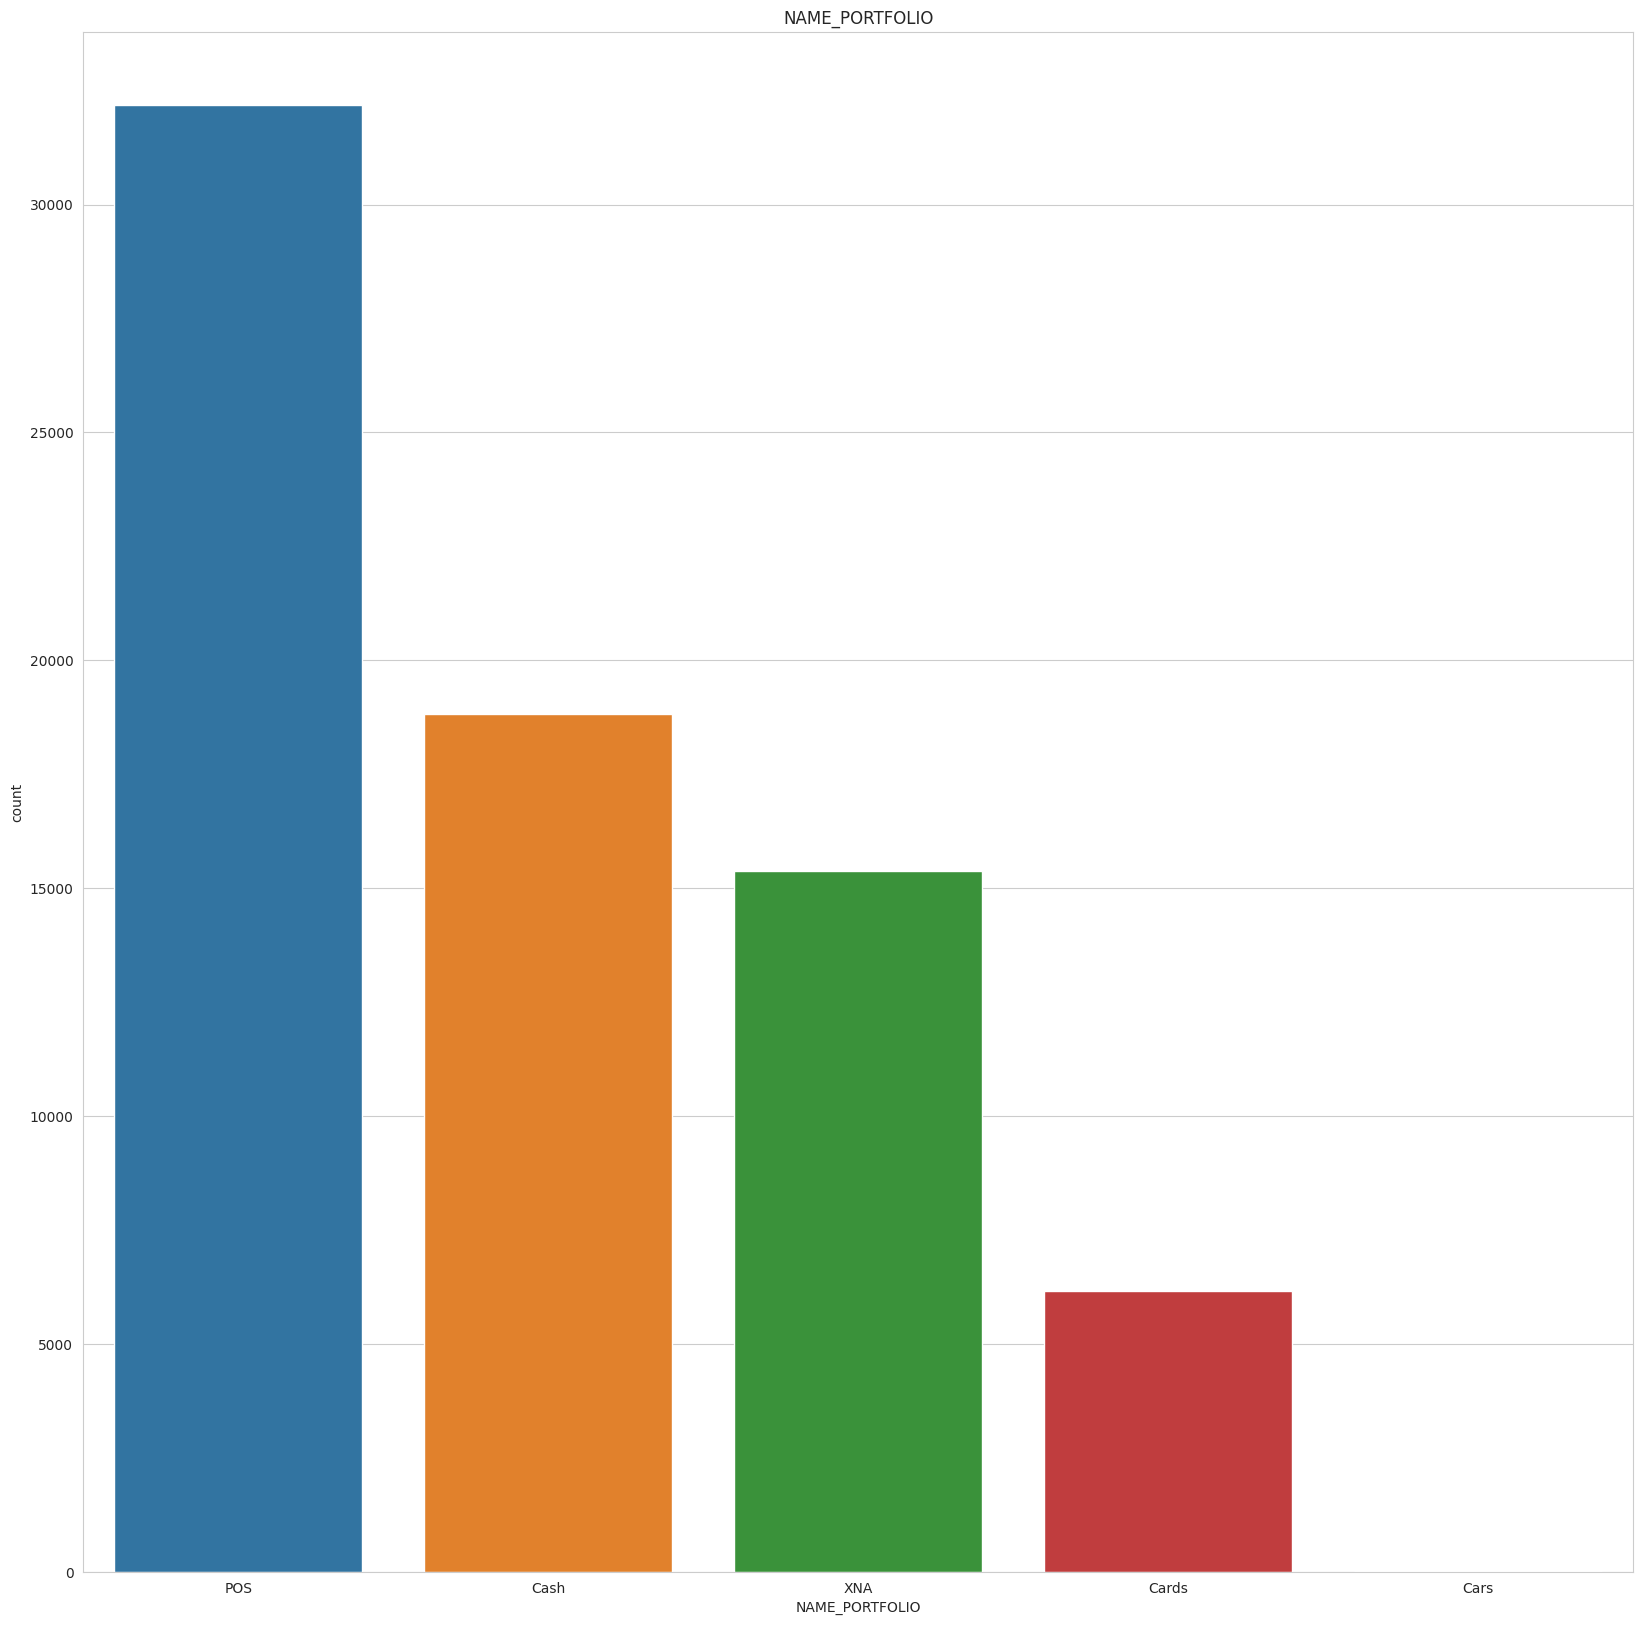

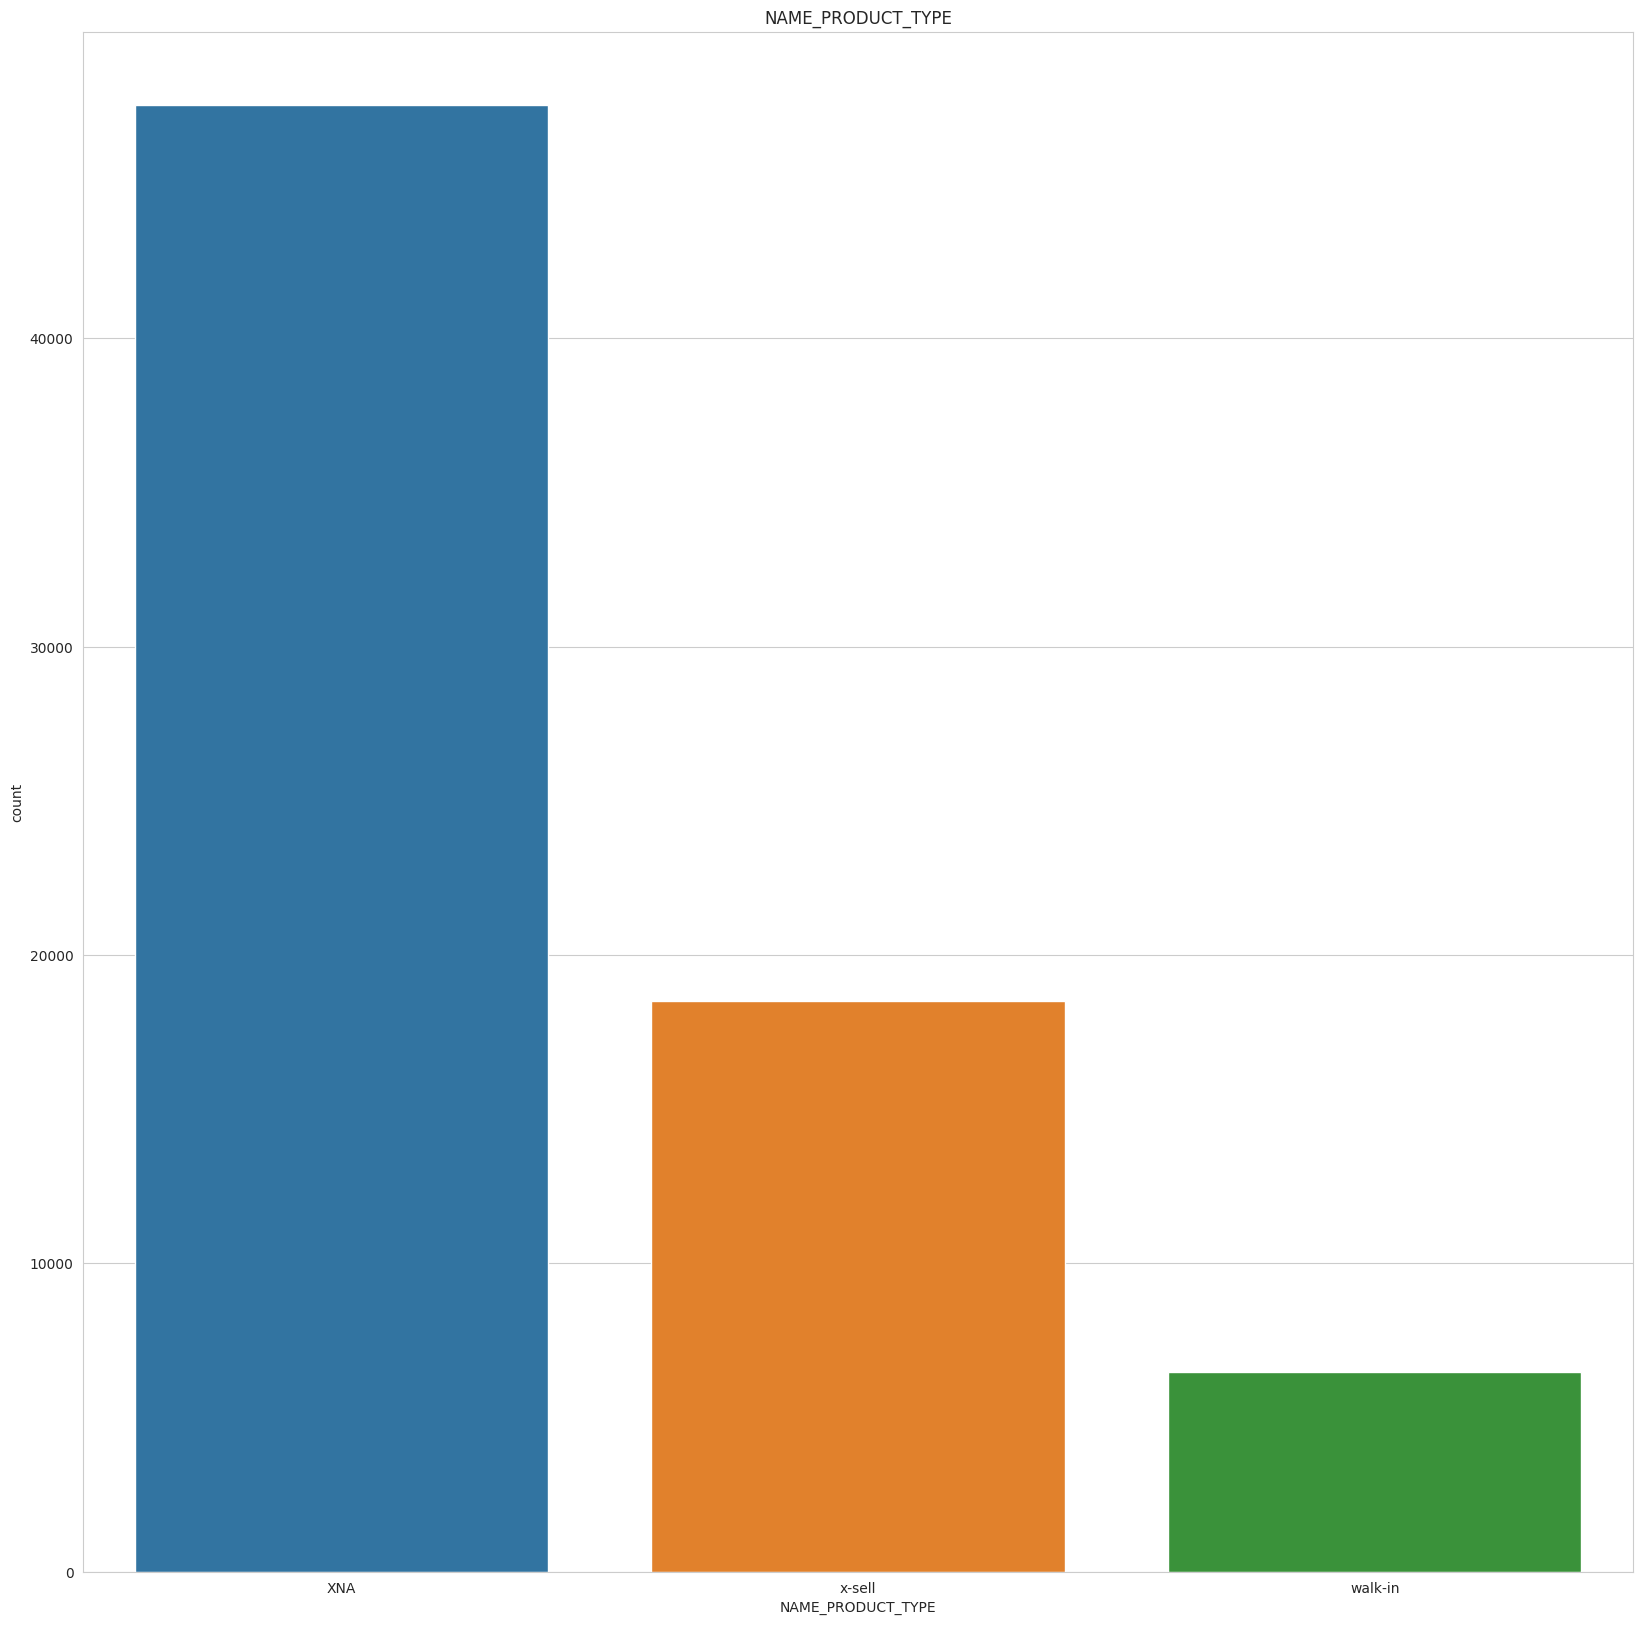

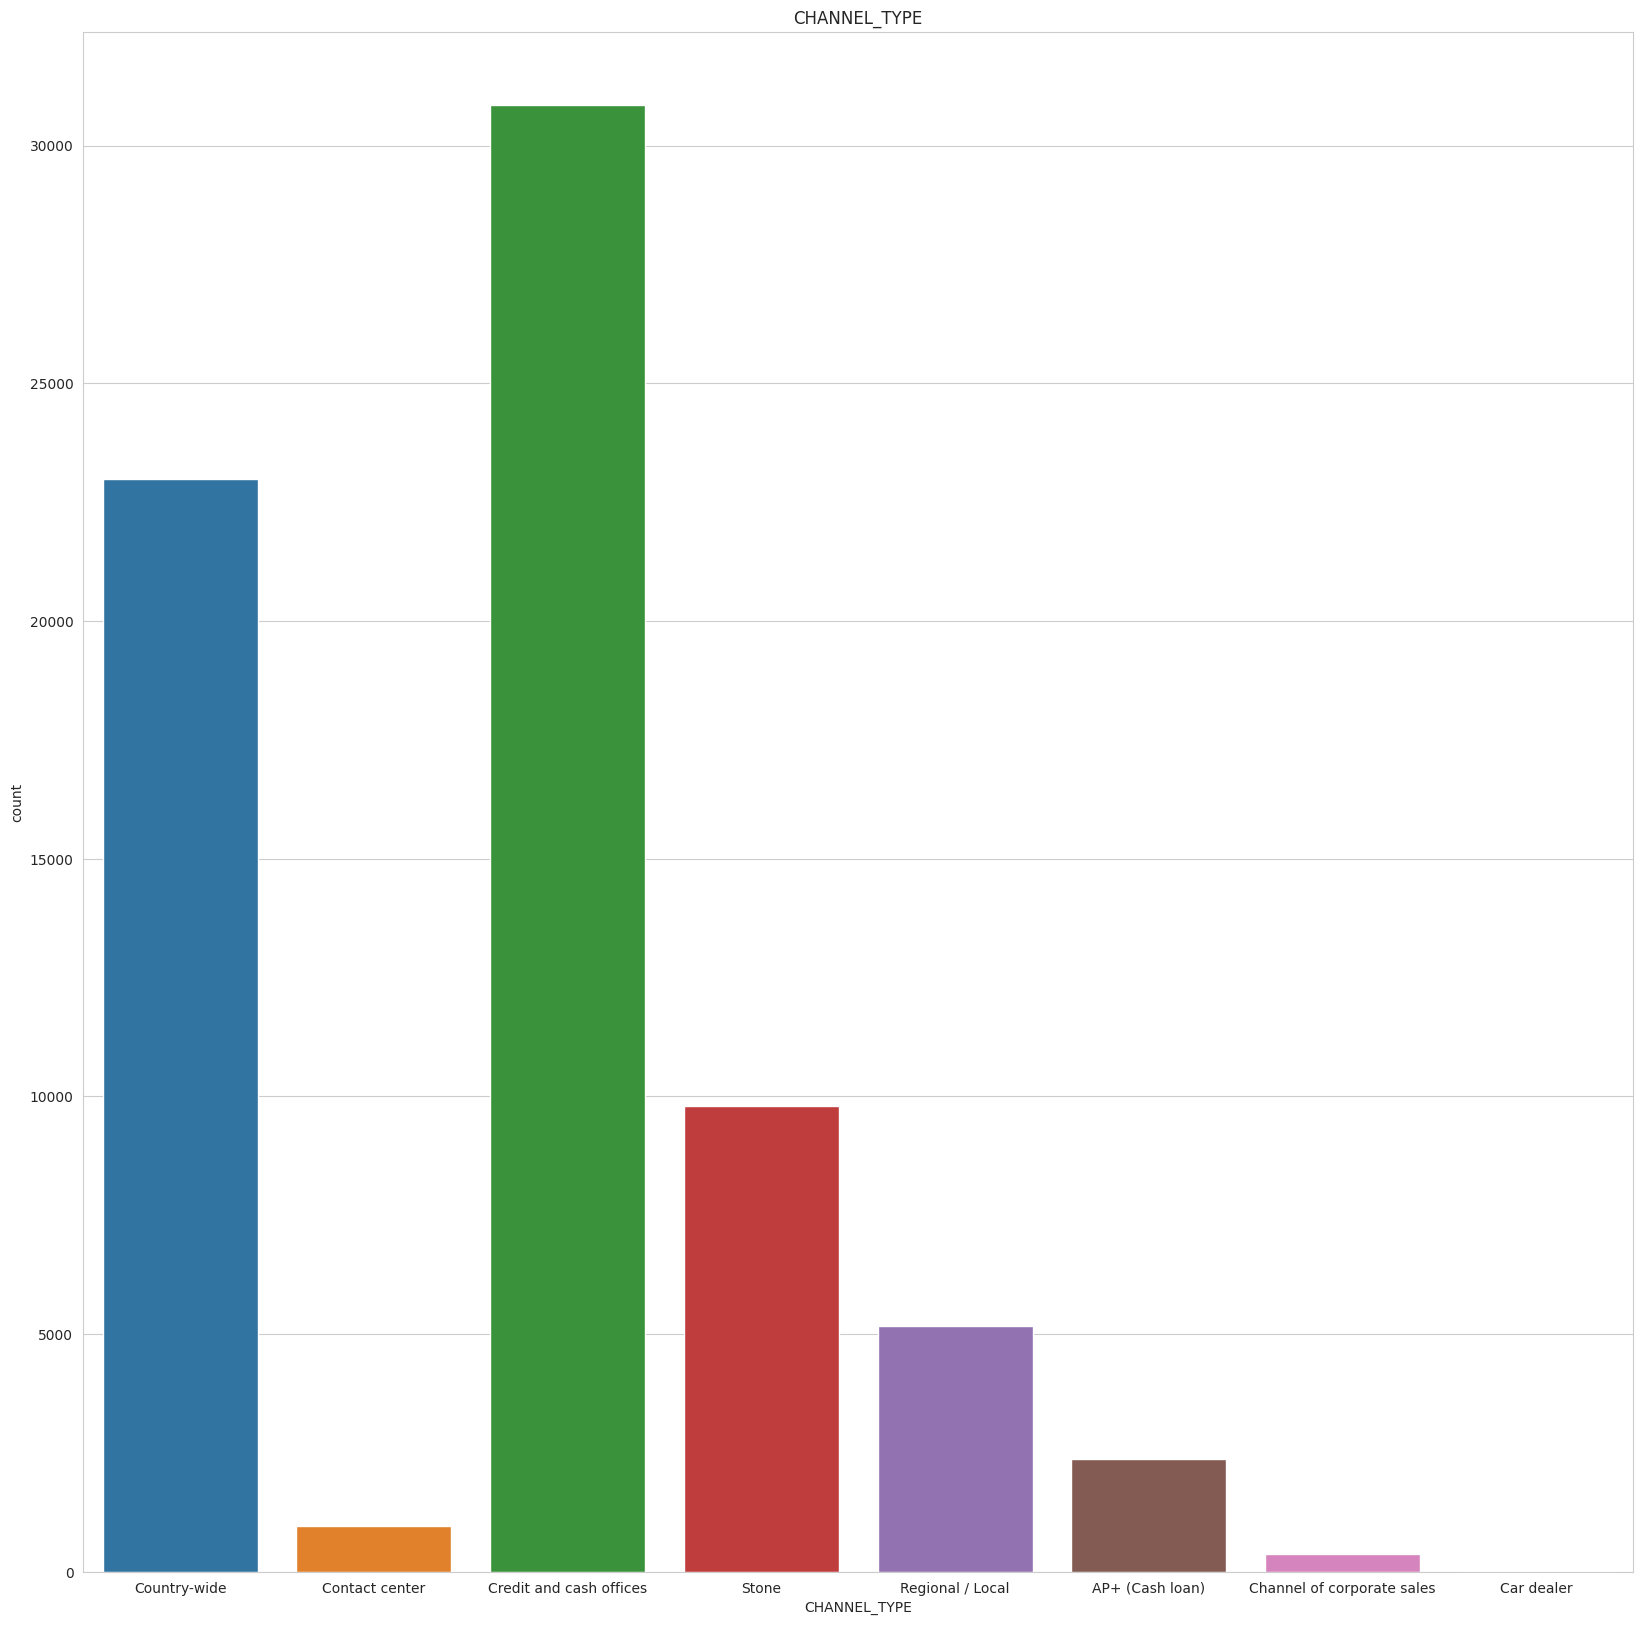

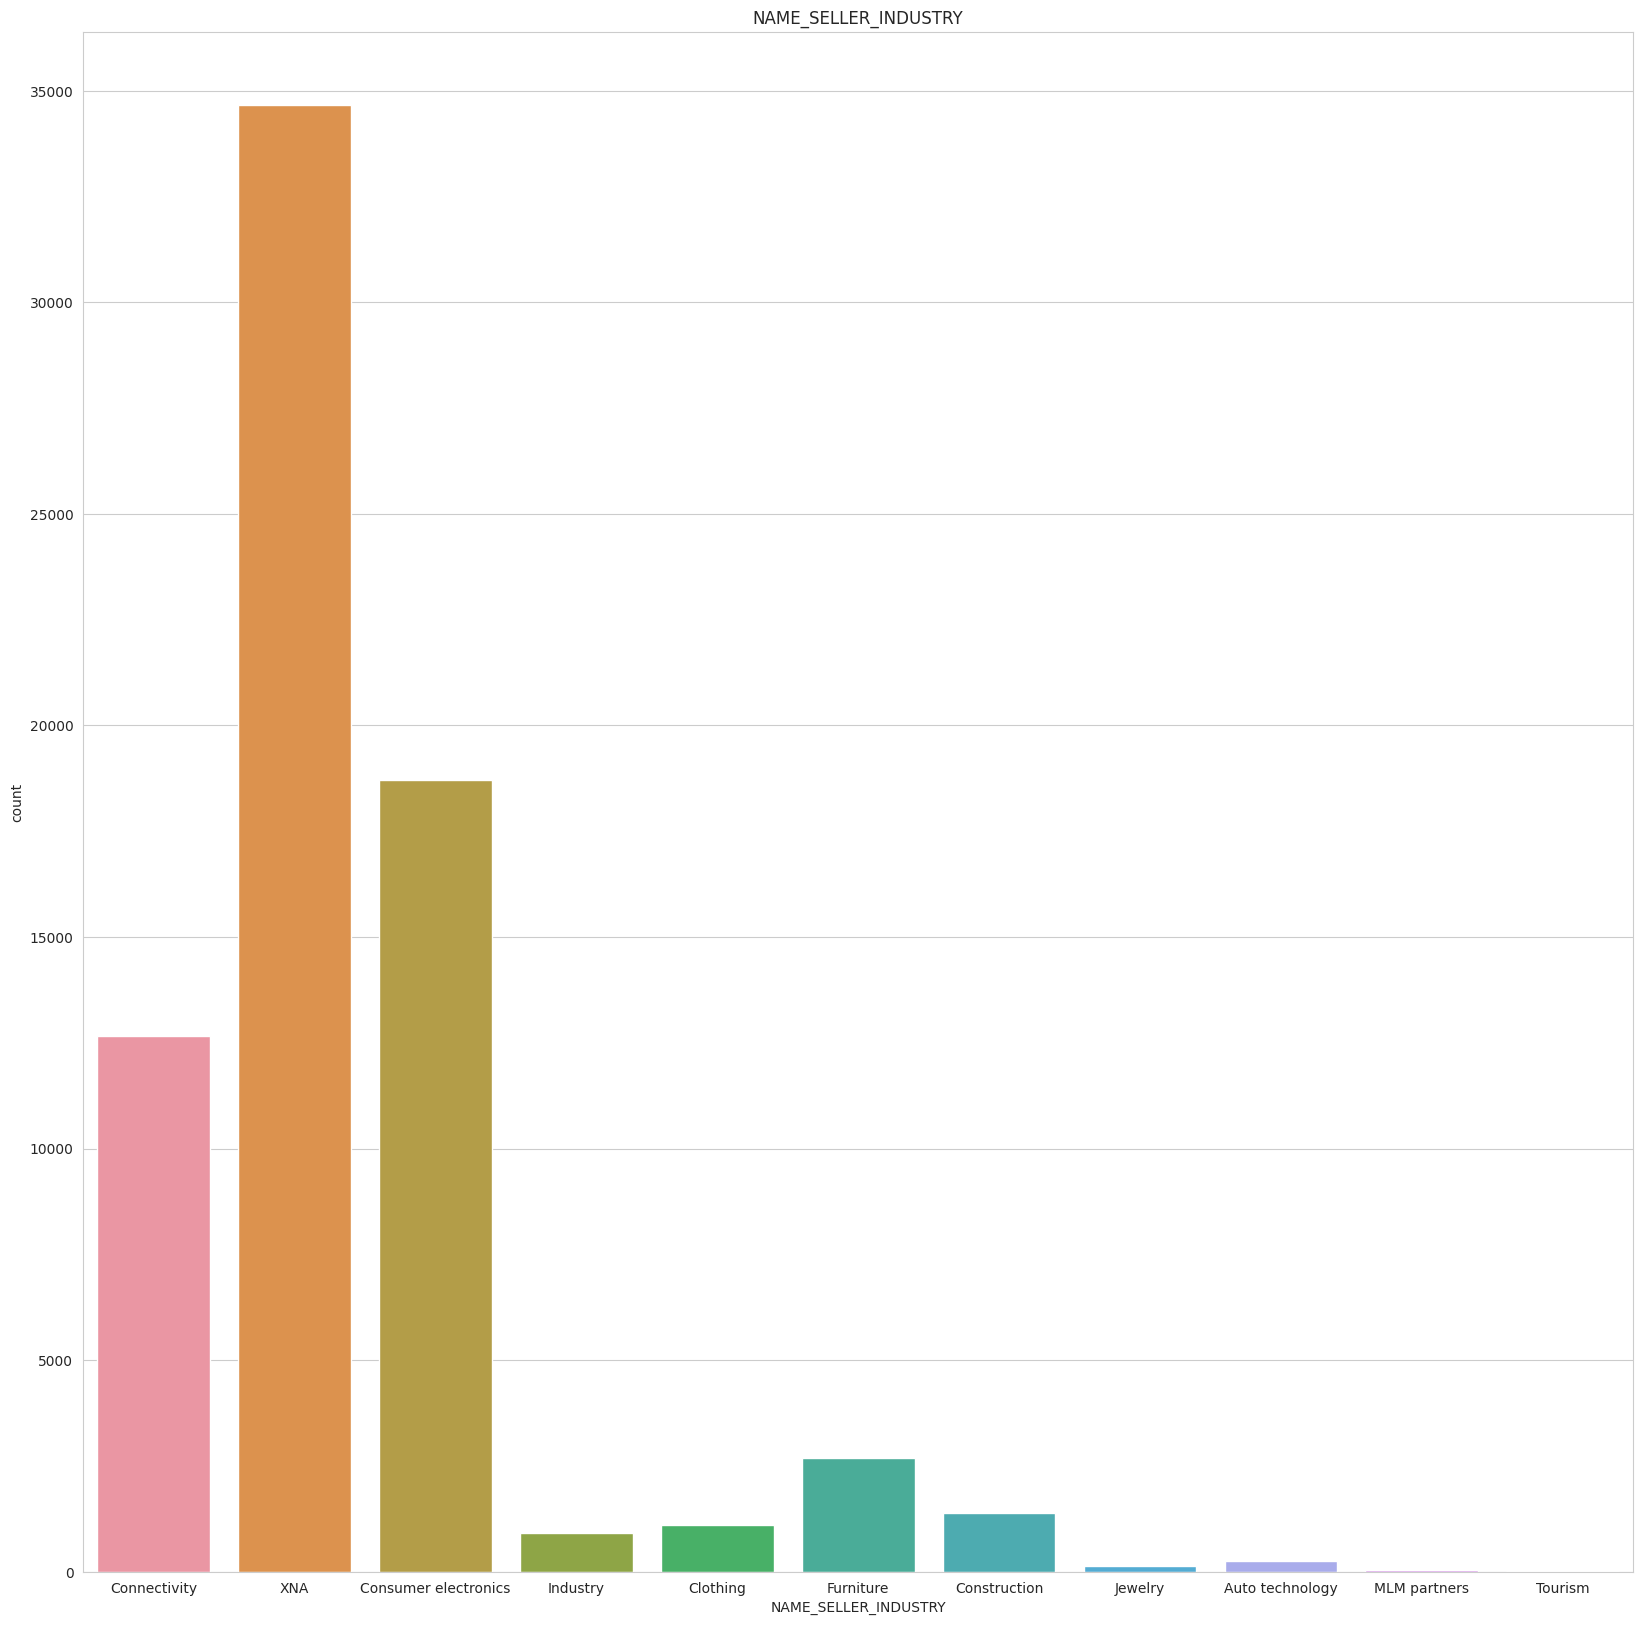

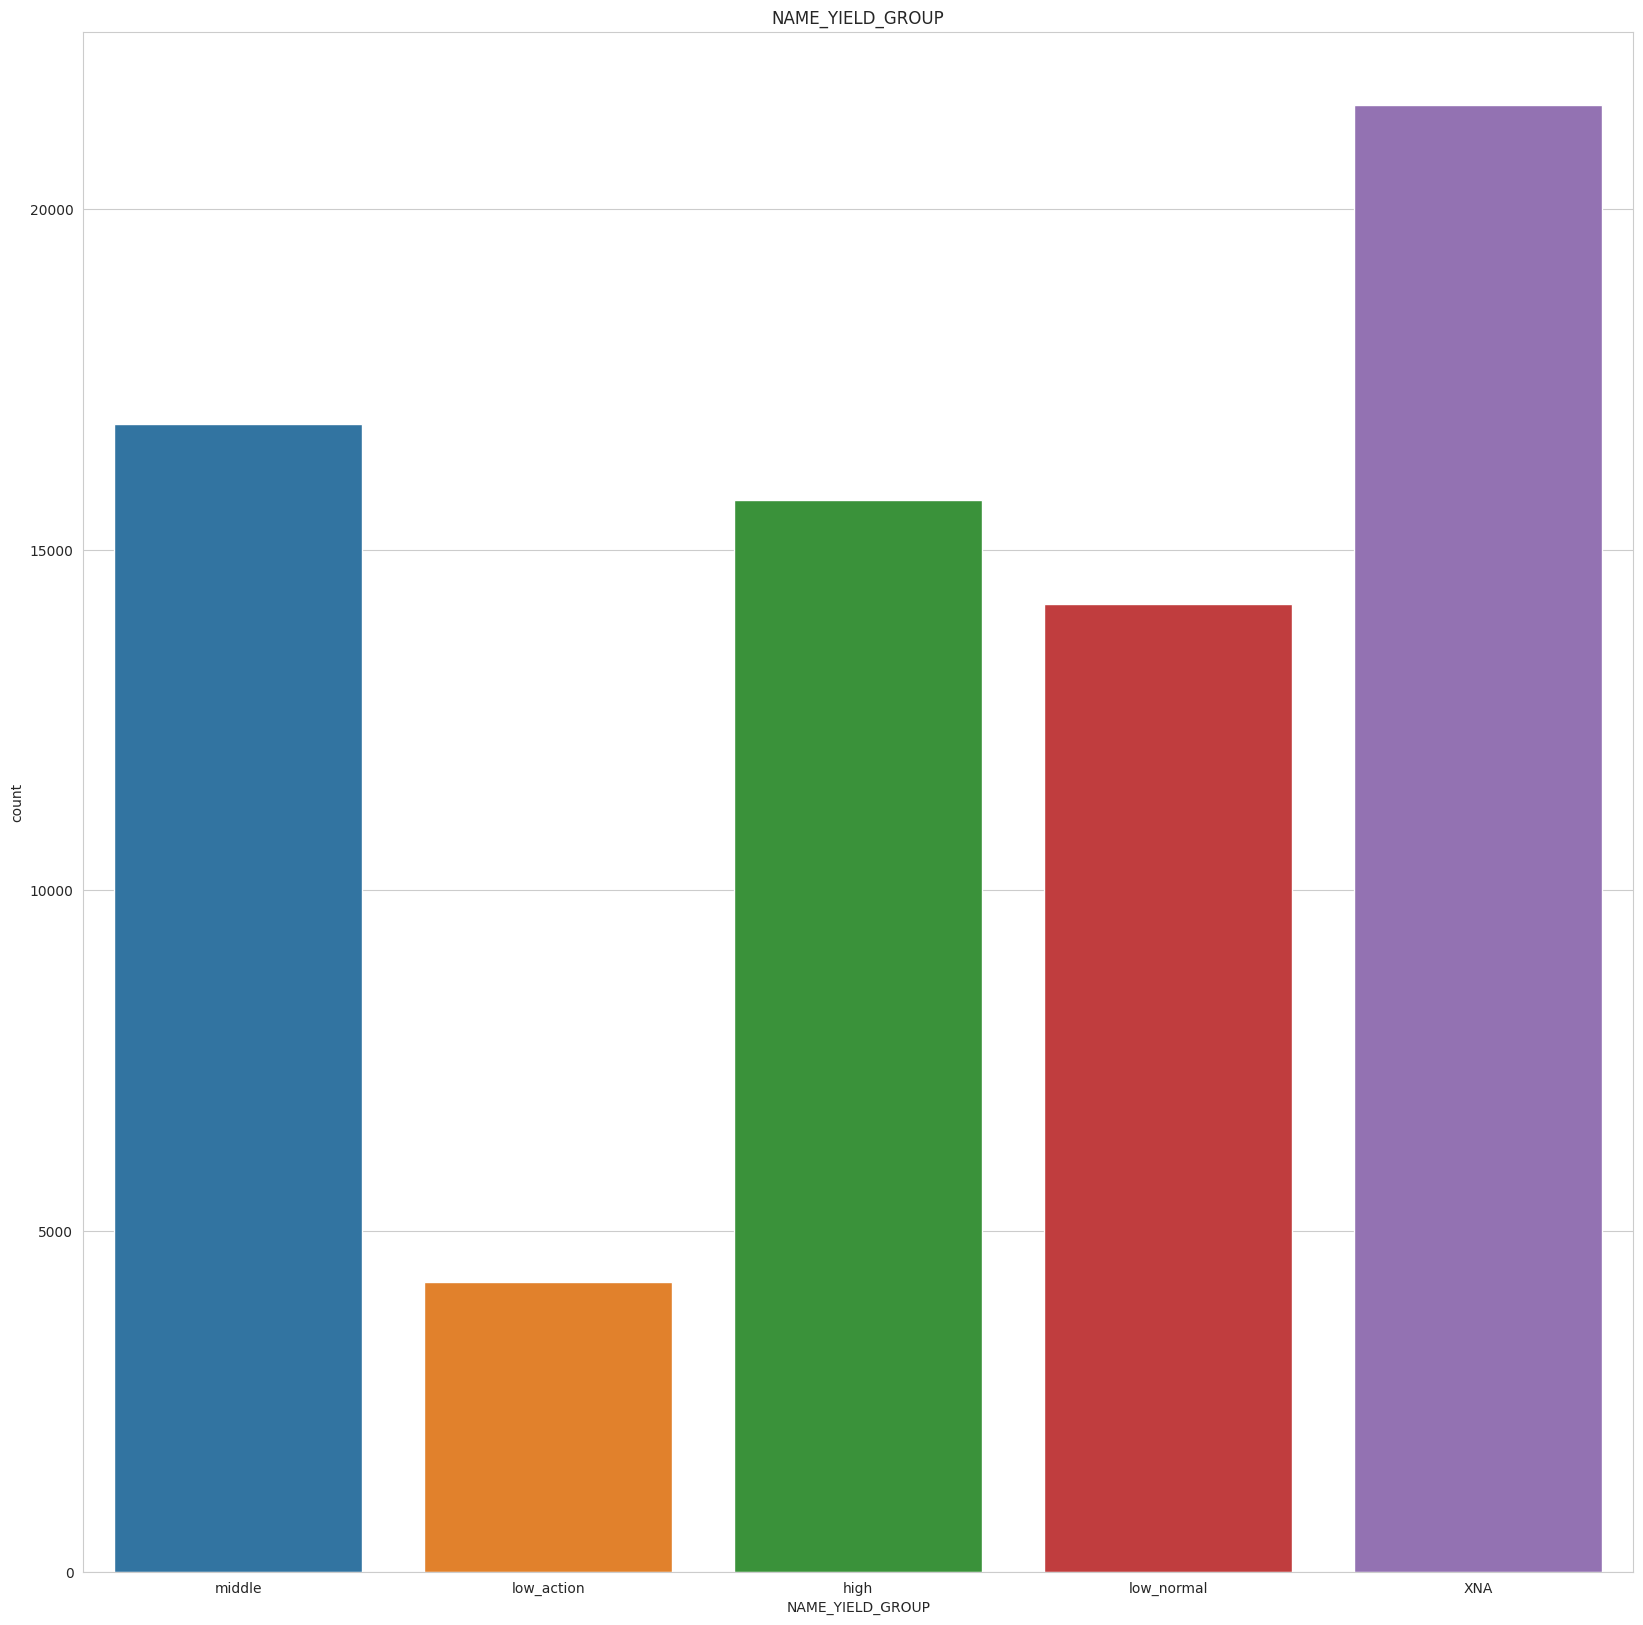

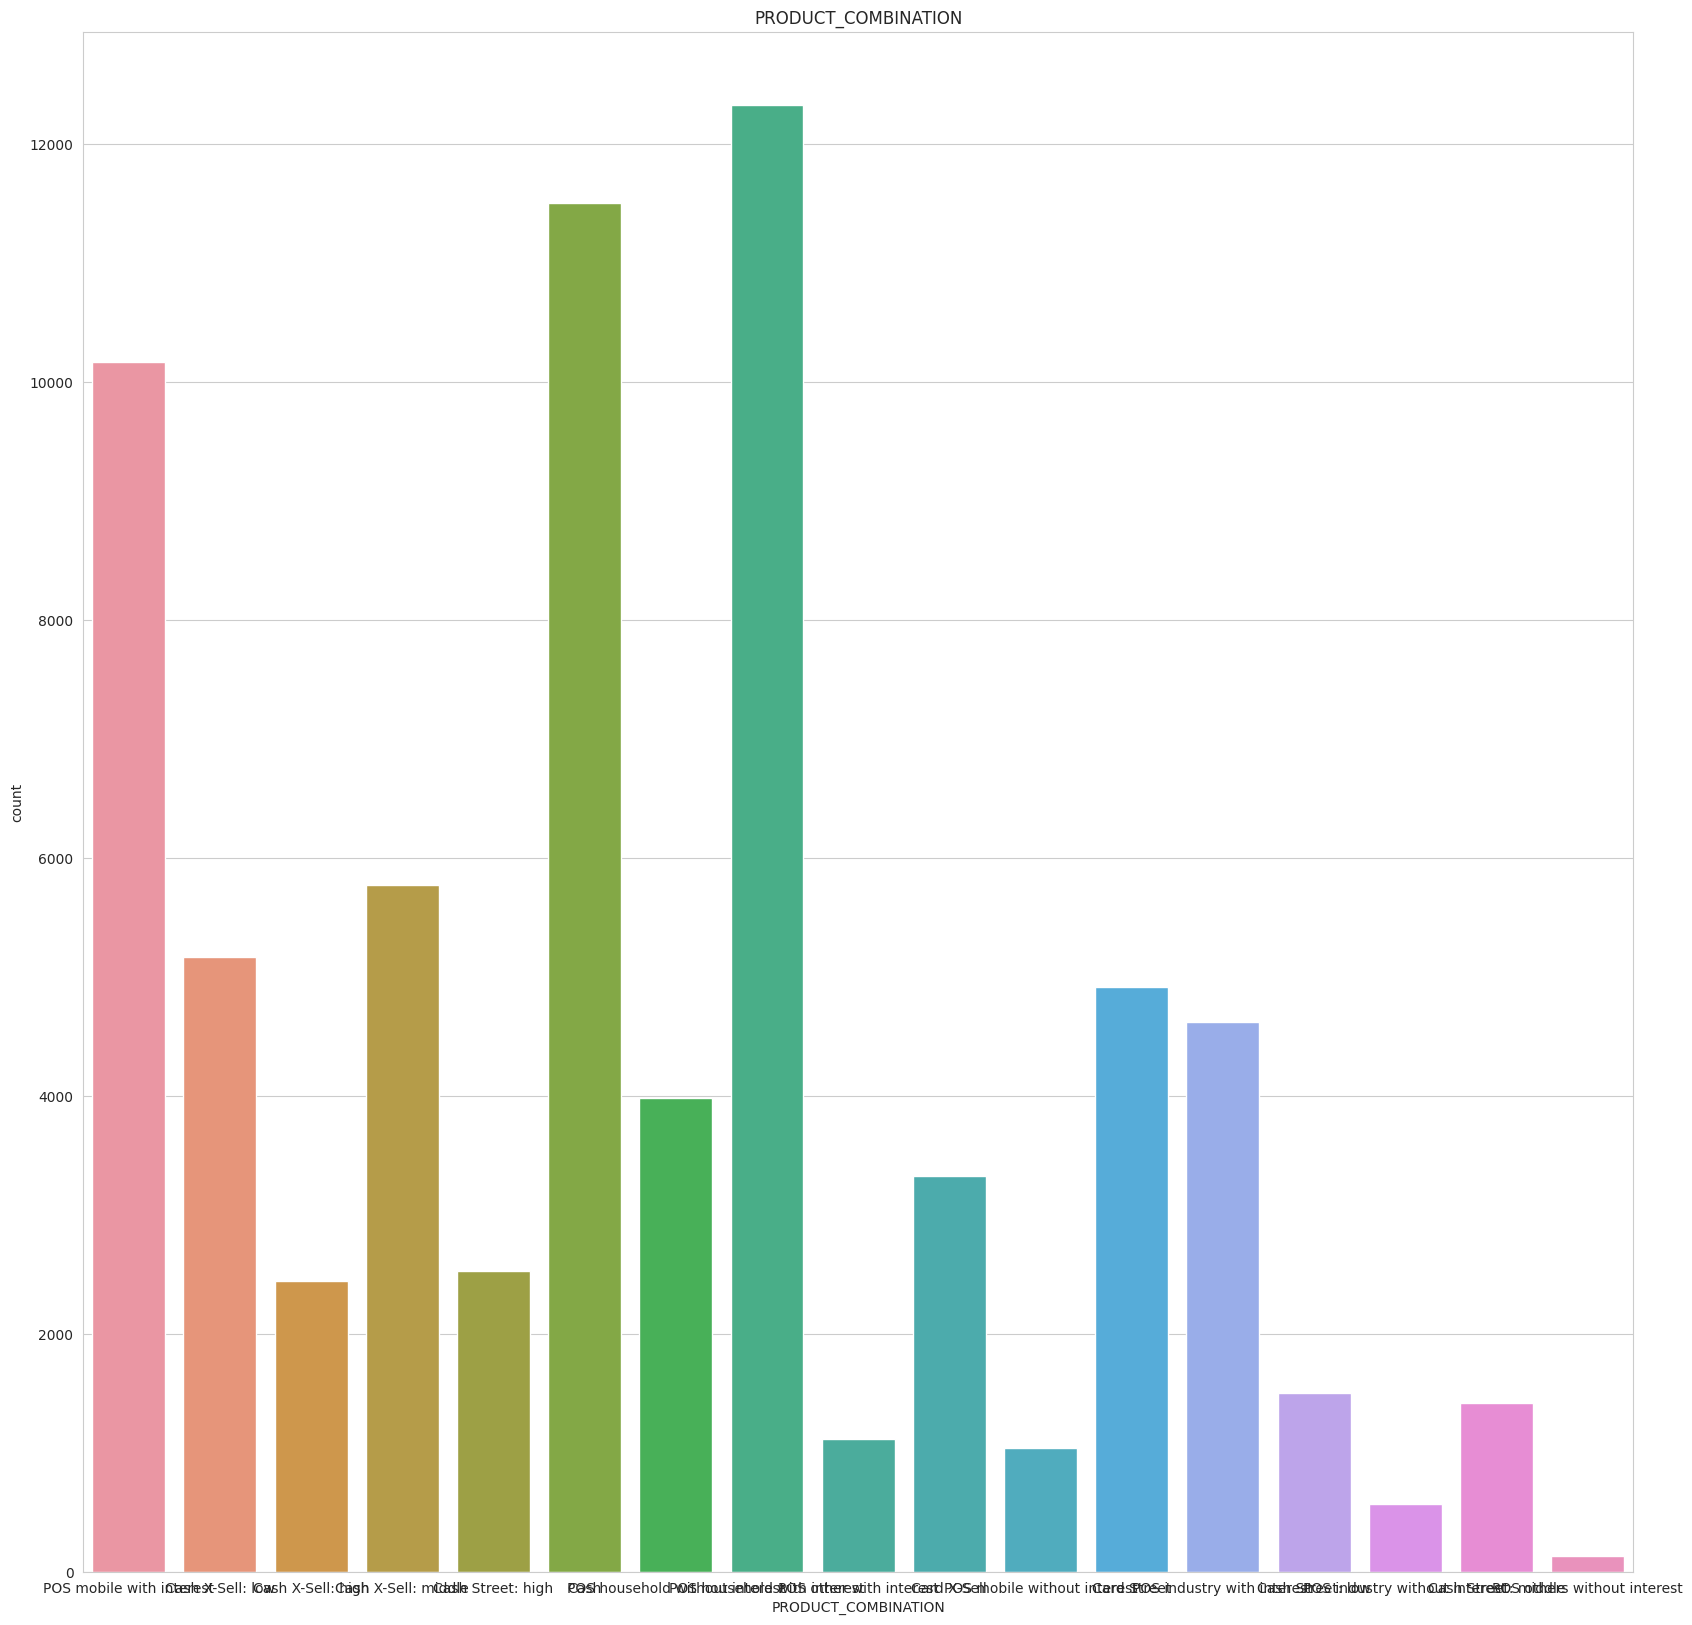

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_prevapp.columns:
        plt.figure(figsize = (20, 20))
        sns.countplot(x=col, data=cat_prevapp)
        plt.title(col)

From the visualization, we can conlude some insights as follows:

- Most of client was unaccompanied when he was applying for the loan
- Most of client was a repeater (old) client when applying for the previous application
- After XNA, most of client apply Mobile goods in the previous application
- Most of previous application was for POS portfolio
- After XNA, most of the previous application was x-sell
- Most of client can we acquired through credit and cash offices on the previous application
- Most of application was approved on the previous application
- From monday to saturday the value of client that apply for loan was almost same. Sunday has a less value than the other day


### Data Cleaning

In [150]:
import pandas as pd
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in prev_app.columns:
    # Count the number of missing values
    missing_values = prev_app[col].isnull().sum()

    # Count the number of duplicates
    duplicates = prev_app.duplicated().sum()

    # Check for outliers (assuming a normal distribution)
    if prev_app[col].dtype in ['int64', 'float64']:
        mean = prev_app[col].mean()
        std = prev_app[col].std()
        outliers = ((prev_app[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

+-----------------------------+----------------+------------+----------+
|           Variable          | Missing Values | Duplicates | Outliers |
+-----------------------------+----------------+------------+----------+
|          SK_ID_PREV         |       0        |     0      |    0     |
|          SK_ID_CURR         |       0        |     0      |    0     |
|      NAME_CONTRACT_TYPE     |       0        |     0      |   N/A    |
|         AMT_ANNUITY         |     15366      |     0      |   1052   |
|       AMT_APPLICATION       |       1        |     0      |   2134   |
|          AMT_CREDIT         |       1        |     0      |   2104   |
|       AMT_DOWN_PAYMENT      |     36726      |     0      |   393    |
|       AMT_GOODS_PRICE       |     15611      |     0      |   1970   |
|  WEEKDAY_APPR_PROCESS_START |       1        |     0      |   N/A    |
|   HOUR_APPR_PROCESS_START   |       1        |     0      |    64    |
| FLAG_LAST_APPL_PER_CONTRACT |       1        |   

In [151]:
print('Number of data points : ', prev_app.shape[0])
print('Number of features : ', prev_app.shape[1])

Number of data points :  72557
Number of features :  37


Pada tabel di atas, dapat dilihat bahwa dataset previous_application.csv memiliki outlier dan missing value tetapi tidak memiliki duplicate


### Handling Missing Value


In [152]:
def count_rows_per_column(df):
  # Count the number of non-missing values in each column
    count_per_column = df.count()
    return count_per_column
count_per_column = count_rows_per_column(prev_app)
count_per_column

SK_ID_PREV                     72557
SK_ID_CURR                     72557
NAME_CONTRACT_TYPE             72557
AMT_ANNUITY                    57191
AMT_APPLICATION                72556
AMT_CREDIT                     72556
AMT_DOWN_PAYMENT               35831
AMT_GOODS_PRICE                56946
WEEKDAY_APPR_PROCESS_START     72556
HOUR_APPR_PROCESS_START        72556
FLAG_LAST_APPL_PER_CONTRACT    72556
NFLAG_LAST_APPL_IN_DAY         72556
RATE_DOWN_PAYMENT              35831
RATE_INTEREST_PRIMARY            239
RATE_INTEREST_PRIVILEGED         239
NAME_CASH_LOAN_PURPOSE         72556
NAME_CONTRACT_STATUS           72556
DAYS_DECISION                  72556
NAME_PAYMENT_TYPE              72556
CODE_REJECT_REASON             72556
NAME_TYPE_SUITE                37360
NAME_CLIENT_TYPE               72556
NAME_GOODS_CATEGORY            72556
NAME_PORTFOLIO                 72556
NAME_PRODUCT_TYPE              72556
CHANNEL_TYPE                   72556
SELLERPLACE_AREA               72556
N

In [153]:
prev_app2 = prev_app.drop(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], axis=1)


In [154]:
print('Number of data points : ', prev_app2.shape[0])
print('Number of features : ', prev_app2.shape[1])

Number of data points :  72557
Number of features :  26


Melakukan drop pada kolom yang dirasa tidak diperlukan

In [155]:
prev_app2 = prev_app2.drop(['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA'], axis=1)


Melakukan drop pada baris dengan status "Canceled" atau "Unused offer" pada kolom 'NAME_CONTRACT_STATUS'

In [156]:
prev_app2 = prev_app2[~prev_app2['NAME_CONTRACT_STATUS'].isin(['Canceled', 'Unused offer'])]


In [157]:
print('Number of data points : ', prev_app2.shape[0])
print('Number of features : ', prev_app2.shape[1])

Number of data points :  58815
Number of features :  23


In [158]:
# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Outliers'])

# Loop through each column in the dataset
for col in prev_app2.columns:
    # Count the number of missing values
    missing_values = prev_app2[col].isnull().sum()

    # Check for outliers (assuming a normal distribution)
    if prev_app2[col].dtype in ['int64', 'float64']:
        mean = prev_app2[col].mean()
        std = prev_app2[col].std()
        outliers = ((prev_app2[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    table.add_row([col, missing_values, outliers])

# Print the table
print(table)

+----------------------------+----------------+----------+
|          Variable          | Missing Values | Outliers |
+----------------------------+----------------+----------+
|         SK_ID_PREV         |       0        |    0     |
|         SK_ID_CURR         |       0        |    0     |
|     NAME_CONTRACT_TYPE     |       0        |   N/A    |
|        AMT_ANNUITY         |      1796      |   1058   |
|      AMT_APPLICATION       |       1        |   1956   |
|         AMT_CREDIT         |       1        |   1721   |
|      AMT_GOODS_PRICE       |      3233      |   1405   |
| WEEKDAY_APPR_PROCESS_START |       1        |   N/A    |
|  HOUR_APPR_PROCESS_START   |       1        |    48    |
|   NAME_CASH_LOAN_PURPOSE   |       1        |   N/A    |
|    NAME_CONTRACT_STATUS    |       1        |   N/A    |
|       DAYS_DECISION        |       1        |    0     |
|     NAME_PAYMENT_TYPE      |       1        |   N/A    |
|     CODE_REJECT_REASON     |       1        |   N/A   

In [159]:
prev_app2[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].describe()


AMT_ANNUITY  AMT_GOODS_PRICE   CNT_PAYMENT
count   57019.000000     5.558200e+04  57018.000000
mean    15484.846747     2.179227e+05     15.514066
std     14607.916679     3.041206e+05     13.972007
min         0.000000     0.000000e+00      0.000000
25%      6123.532500     4.950000e+04      6.000000
50%     10855.305000     1.071949e+05     12.000000
75%     19713.307500     2.250000e+05     18.000000
max    234478.395000     3.826372e+06     72.000000

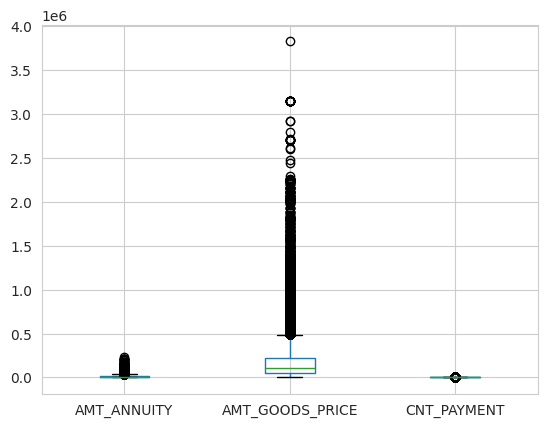

In [160]:
prev_app2[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].boxplot()
plt.show()

Karena data memiliki outlier, maka missing value akan diisi dengan nilai median yang robust akan outlier


In [161]:
# Sélectionner uniquement les colonnes de type numérique
numeric_columns = prev_app2.select_dtypes(include=['number']).columns
median_values = prev_app2[numeric_columns].median()
print(median_values)

SK_ID_PREV                 1909292.000
SK_ID_CURR                  279094.000
AMT_ANNUITY                  10855.305
AMT_APPLICATION              97062.750
AMT_CREDIT                  108837.000
AMT_GOODS_PRICE             107194.905
HOUR_APPR_PROCESS_START         12.000
DAYS_DECISION                 -776.000
CNT_PAYMENT                     12.000
dtype: float64


In [162]:
prev_app2.replace(0, np.nan, inplace=True)
prev_app2.fillna(median_values, inplace=True)

feature PRODUCT_COMBINATION merupakan variabel kategorik sehingga missing value diisi dengan nilai modus


In [163]:
mode_values = prev_app2['PRODUCT_COMBINATION'].mode()[0]
print(mode_values)

POS household with interest


POS household with interest

In [164]:
prev_app2.replace(0, np.nan, inplace=True)
prev_app2['PRODUCT_COMBINATION'].fillna(mode_values, inplace = True)

### Drop Outlier

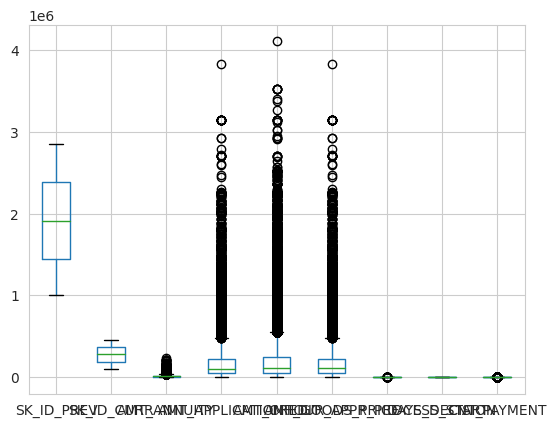

In [165]:
prev_app2.boxplot()
plt.show()

In [166]:
Q1 = prev_app2[numeric_columns].quantile(0.25)
Q3 = prev_app2[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (prev_app2[numeric_columns] < (Q1 - 1.5 * IQR)) | (prev_app2[numeric_columns] > (Q3 + 1.5 * IQR))
prev_app2 = prev_app2[~outliers.any(axis=1)]

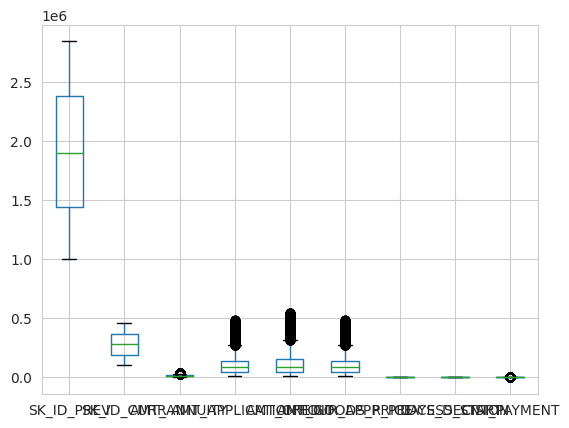

In [167]:
prev_app2.boxplot()
plt.show()

In [168]:
print('Number of data points : ', prev_app2.shape[0])
print('Number of features : ', prev_app2.shape[1])
prev_app2.head()

Number of data points :  48431
Number of features :  23


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      2030495      271877     Consumer loans     1730.430          17145.0   
2      2523466      122040         Cash loans    15060.735         112500.0   
4      1784265      202054         Cash loans    31924.395         337500.0   
5      1383531      199383         Cash loans    23703.930         315000.0   
11     2257824      161140         Cash loans    13832.775         211500.0   

    AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0      17145.0          17145.0                   SATURDAY   
2     136444.5         112500.0                    TUESDAY   
4     404055.0         337500.0                   THURSDAY   
5     340573.5         315000.0                   SATURDAY   
11    246397.5         211500.0                     FRIDAY   

    HOUR_APPR_PROCESS_START NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                      15.0                    XAP             Approved   
2                      11.0                    XNA             Approved   
4                       9.0                Repairs              Refused   
5                       8.0      Everyday expenses             Approved   
11                     10.0                    XNA             Approved   

    DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0           -73.0  Cash through the bank                XAP         Repeater   
2          -301.0  Cash through the bank                XAP         Repeater   
4          -781.0  Cash through the bank                 HC         Repeater   
5          -684.0  Cash through the bank                XAP         Repeater   
11         -815.0  Cash through the bank                XAP         Repeater   

   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0               Mobile            POS               XNA   
2                  XNA           Cash            x-sell   
4                  XNA           Cash           walk-in   
5                  XNA           Cash            x-sell   
11                 XNA           Cash            x-sell   

               CHANNEL_TYPE NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0              Country-wide         Connectivity         12.0   
2   Credit and cash offices                  XNA         12.0   
4   Credit and cash offices                  XNA         24.0   
5   Credit and cash offices                  XNA         18.0   
11  Credit and cash offices                  XNA         30.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0            middle  POS mobile with interest  
2              high         Cash X-Sell: high  
4              high         Cash Street: high  
5        low_normal          Cash X-Sell: low  
11           middle       Cash X-Sell: middle

In [169]:
# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in prev_app2.columns:
    # Count the number of missing values
    missing_values = prev_app2[col].isnull().sum()

    # Count the number of duplicates
    duplicates = prev_app2.duplicated().sum()

    # Check for outliers (assuming a normal distribution)
    if prev_app2[col].dtype in ['int64', 'float64']:
        mean = prev_app2[col].mean()
        std = prev_app2[col].std()
        outliers = ((prev_app2[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

+----------------------------+----------------+------------+----------+
|          Variable          | Missing Values | Duplicates | Outliers |
+----------------------------+----------------+------------+----------+
|         SK_ID_PREV         |       0        |     0      |    0     |
|         SK_ID_CURR         |       0        |     0      |    0     |
|     NAME_CONTRACT_TYPE     |       0        |     0      |   N/A    |
|        AMT_ANNUITY         |       0        |     0      |   658    |
|      AMT_APPLICATION       |       0        |     0      |   1098   |
|         AMT_CREDIT         |       0        |     0      |   1312   |
|      AMT_GOODS_PRICE       |       0        |     0      |   1095   |
| WEEKDAY_APPR_PROCESS_START |       1        |     0      |   N/A    |
|  HOUR_APPR_PROCESS_START   |       0        |     0      |    0     |
|   NAME_CASH_LOAN_PURPOSE   |       1        |     0      |   N/A    |
|    NAME_CONTRACT_STATUS    |       1        |     0      |   N

Feature Engineering
Melakukan Improvement Pada Beberapa Feature

In [170]:
#NAME_GOODS_CATEGORY
ngc = ['Auto Accessories', 'Jewelry', 'Homewares', 'Medical Supplies', 'Vehicles', 'Sport and Leisure',
         'Gardening', 'Other', 'Office Appliances', 'Tourism', 'Medicine', 'Direct Sales', 'Fitness', 'Additional Service',
         'Education', 'Weapon', 'Insurance', 'House Construction', 'Animals']
prev_app2["NAME_GOODS_CATEGORY"] = prev_app2["NAME_GOODS_CATEGORY"].replace(ngc, 'others')

In [171]:
prev_app2["NAME_GOODS_CATEGORY"].value_counts()

XNA                         16831
Mobile                       9472
Consumer Electronics         5684
Computers                    4663
Audio/Video                  4563
Furniture                    2290
others                       1774
Photo / Cinema Equipment     1124
Construction Materials       1086
Clothing and Accessories      943
Name: NAME_GOODS_CATEGORY, dtype: int64

In [172]:
#CHANNEL_TYPE
ct = ['AP+ (Cash loan)', 'Channel of corporate sales', 'Car dealer']
prev_app2["CHANNEL_TYPE"] = prev_app2["CHANNEL_TYPE"].replace(ct, 'Other_Channel')

In [173]:
prev_app2["CHANNEL_TYPE"].value_counts()

Country-wide               21155
Credit and cash offices    10933
Stone                       9271
Regional / Local            4940
Other_Channel               1579
Contact center               552
Name: CHANNEL_TYPE, dtype: int64

In [174]:
#NAME_SELLER_INDUSTRY
nsi = ['Auto technology', 'Jewelry', 'MLM partners', 'Tourism']
prev_app2["NAME_SELLER_INDUSTRY"] = prev_app2["NAME_SELLER_INDUSTRY"].replace(nsi, 'Others')

In [175]:
prev_app2["NAME_SELLER_INDUSTRY"].value_counts()

Consumer electronics    18011
XNA                     13119
Connectivity            11370
Furniture                2469
Construction             1257
Clothing                  964
Industry                  842
Others                    398
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [176]:
#NAME_CASH_LOAN_PURPOSE
nclp = ['Refusal to name the goal', 'Money for a third person', 'Buying a garage','Gasification / water supply',
     'Hobby','Business development','Buying a holiday home / land','Furniture','Car repairs',
     'Buying a home','Wedding / gift / holiday']
prev_app2["NAME_CASH_LOAN_PURPOSE"] = prev_app2["NAME_CASH_LOAN_PURPOSE"].replace(nclp, 'Other_Loan')

In [177]:
prev_app2["NAME_CASH_LOAN_PURPOSE"].value_counts()

XAP                                 37578
XNA                                  9427
Repairs                               403
Other                                 369
Urgent needs                          241
Other_Loan                             90
Everyday expenses                      73
Medicine                               69
Education                              47
Journey                                30
Purchase of electronic equipment       26
Building a house or an annex           26
Buying a used car                      25
Payments on other loans                22
Buying a new car                        4
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

In [178]:
#WEEKDAY_APPR_PROCESS_START
weekend = ["SATURDAY","SUNDAY"]

prev_app2["WEEKDAY_APPR_PROCESS_START"] = prev_app2["WEEKDAY_APPR_PROCESS_START"].apply(lambda x : "WEEKEND" if x in weekend else "WEEKDAY")

In [179]:
prev_app2["WEEKDAY_APPR_PROCESS_START"].value_counts()

WEEKDAY    34854
WEEKEND    13577
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

### Menambah Feature Baru

In [180]:
prev_app2['NEW_APP_CREDIT_RATE'] = prev_app2['AMT_APPLICATION'] / prev_app2['AMT_CREDIT']
prev_app2['NEW_AMT_PAYMENT_RATE'] = prev_app2['AMT_CREDIT'] / prev_app2['AMT_ANNUITY']
prev_app2['NEW_APP_GOODS_RATE'] = prev_app2['AMT_APPLICATION'] / prev_app2['AMT_GOODS_PRICE']
prev_app2['NEW_CREDIT_GOODS_RATE'] = prev_app2['AMT_CREDIT'] / prev_app2['AMT_GOODS_PRICE']
prev_app2['NEW_RETURN_DAY'] =  prev_app2['DAYS_DECISION'] + prev_app2['CNT_PAYMENT'] * 30
prev_app2["NEW_APP_CREDIT_RATE_RATIO"] = prev_app2["NEW_APP_CREDIT_RATE"].apply(lambda x: 1 if(x<=1) else 0)

* NEW_AMT_CTEDIT_RATE: Received Amount Rate
* NEW_AMT_PAYMENT_RATE: The ratio of the loan received to the monthly payment
* NEW_APP_GOODS_RATE: Application per goods rate
* NEW_CREDIT_GOODS_RATE: Received per goods rate
* NEW_RETURN_DAY: return loan day
* NEW_APP_CREDIT_RATE_RATIO: If x <= 1, a client got the desired loan or more

One Hot Encoding

In [181]:
# assuming prev_app2 is the original dataframe with both numerical and categorical columns
num_prevapp2 = prev_app2.select_dtypes(include=['float64', 'int64'])
cat_prevapp2 = prev_app2.select_dtypes(include=['object'])

# perform one-hot encoding for each categorical column
encoded_cols = []
for col in cat_prevapp2:
    one_hot = pd.get_dummies(cat_prevapp2[col], prefix=col)
    encoded_cols.append(one_hot)

# concatenate the original numerical columns and the one-hot encoded categorical columns
prev_app3 = pd.concat([num_prevapp2] + encoded_cols, axis=1)

# display the encoded dataframe
prev_app3.head()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      2030495      271877     1730.430          17145.0     17145.0   
2      2523466      122040    15060.735         112500.0    136444.5   
4      1784265      202054    31924.395         337500.0    404055.0   
5      1383531      199383    23703.930         315000.0    340573.5   
11     2257824      161140    13832.775         211500.0    246397.5   

    AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  DAYS_DECISION  CNT_PAYMENT  \
0           17145.0                     15.0          -73.0         12.0   
2          112500.0                     11.0         -301.0         12.0   
4          337500.0                      9.0         -781.0         24.0   
5          315000.0                      8.0         -684.0         18.0   
11         211500.0                     10.0         -815.0         30.0   

    NEW_APP_CREDIT_RATE  NEW_AMT_PAYMENT_RATE  NEW_APP_GOODS_RATE  \
0              1.000000              9.907942                 1.0   
2              0.824511              9.059618                 1.0   
4              0.835282             12.656622                 1.0   
5              0.924910             14.367807                 1.0   
11             0.858369             17.812586                 1.0   

    NEW_CREDIT_GOODS_RATE  NEW_RETURN_DAY  NEW_APP_CREDIT_RATE_RATIO  \
0                1.000000           287.0                          1   
2                1.212840            59.0                          1   
4                1.197200           -61.0                          1   
5                1.081186          -144.0                          1   
11               1.165000            85.0                          1   

    NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Consumer loans  \
0                               0                                  1   
2                               1                                  0   
4                               1                                  0   
5                               1                                  0   
11                              1                                  0   

    NAME_CONTRACT_TYPE_Revolving loans  WEEKDAY_APPR_PROCESS_START_WEEKDAY  \
0                                    0                                   0   
2                                    0                                   1   
4                                    0                                   1   
5                                    0                                   0   
11                                   0                                   1   

    WEEKDAY_APPR_PROCESS_START_WEEKEND  \
0                                    1   
2                                    0   
4                                    0   
5                                    1   
11                                   0   

    NAME_CASH_LOAN_PURPOSE_Building a house or an annex  \
0                                                   0     
2                                                   0     
4                                                   0     
5                                                   0     
11                                                  0     

    NAME_CASH_LOAN_PURPOSE_Buying a new car  \
0                                         0   
2                                         0   
4                                         0   
5                                         0   
11                                        0   

    NAME_CASH_LOAN_PURPOSE_Buying a used car  \
0                                          0   
2                                          0   
4                                          0   
5                                          0   
11                                         0   

    NAME_CASH_LOAN_PURPOSE_Education  \
0                                  0   
2                                  0   
4                                  0   
5                       

In [182]:
print('Number of data points : ', prev_app3.shape[0])
print('Number of features : ', prev_app3.shape[1])

Number of data points :  48431
Number of features :  106


### Aggregate

In [183]:
from scipy.stats import mode

def FE_previous_application(prev_app3):
    prev_app_agg = {'SK_ID_CURR': ['max', 'mean']}

    for column in prev_app3.columns:
        if column not in ['SK_ID_PREV', 'SK_ID_CURR']:
            if prev_app3[column].dtype == 'object':
                prev_app_agg[column] = lambda x: mode(x)[0][0] if len(x) > 0 else None
            elif set(prev_app3[column].unique()) == {0, 1}:
                prev_app_agg[column] = lambda x: mode(x)[0][0] if len(x) > 0 else None
            else:
                prev_app_agg[column] = 'mean'

    prev_app_final_agg = prev_app3.groupby('SK_ID_CURR').agg(prev_app_agg)

    col_list_1 = []
    for col in prev_app_final_agg.columns.tolist():
        col_list_1.append(col[0] + "_" + col[1].upper())

    prev_app_final_agg.columns = pd.Index(col_list_1)
    prev_app_final_agg.reset_index(inplace=True)

    # Join the original SK_ID_PREV column with the aggregated dataset
    prev_app_final_agg = prev_app_final_agg.join(prev_app3[['SK_ID_CURR', 'SK_ID_PREV']].set_index('SK_ID_CURR'), on='SK_ID_CURR')

    return prev_app_final_agg

In [184]:
prev_app4 = FE_previous_application(prev_app3)

<ipython-input-183-b50762eedcac>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  prev_app_agg[column] = lambda x: mode(x)[0][0] if len(x) > 0 else None
<ipython-input-183-b50762eedcac>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  prev_app_agg[column] = lamb

In [185]:
print('Number of data points : ', prev_app4.shape[0])
print('Number of features : ', prev_app4.shape[1])

Number of data points :  48431
Number of features :  108


In [186]:
prev_app4.head(10)

SK_ID_CURR  SK_ID_CURR_MAX  SK_ID_CURR_MEAN  AMT_ANNUITY_MEAN  \
0      100007          100007         100007.0        16509.6000   
1      100009          100009         100009.0         8996.7600   
2      100012          100012         100012.0         3012.0750   
3      100025          100025         100025.0         7159.5450   
4      100026          100026         100026.0        23608.4850   
5      100027          100027         100027.0        22556.4750   
6      100032          100032         100032.0         7910.1450   
7      100035          100035         100035.0         8546.0625   
7      100035          100035         100035.0         8546.0625   
8      100042          100042         100042.0        10602.4500   

   AMT_APPLICATION_MEAN  AMT_CREDIT_MEAN  AMT_GOODS_PRICE_MEAN  \
0            180000.000        180000.00           180000.0000   
1             98239.500         98239.50            98239.5000   
2             18720.000         23697.00            18720.0000   
3             58455.000         36810.00            58455.0000   
4            132345.000        132345.00           132345.0000   
5            225000.000        239850.00           225000.0000   
6             69255.000         42255.00            69255.0000   
7             71998.875         77280.75            77064.9525   
7             71998.875         77280.75            77064.9525   
8             97956.000         95431.50            97956.0000   

   HOUR_APPR_PROCESS_START_MEAN  DAYS_DECISION_MEAN  CNT_PAYMENT_MEAN  \
0                          14.0              -865.0              18.0   
1                          18.0              -449.0              12.0   
2                           9.0             -1673.0              12.0   
3                          17.0             -2060.0               6.0   
4                          12.0             -1427.0               6.0   
5                          14.0              -181.0              12.0   
6                          10.0             -1497.0               6.0   
7                          14.0              -886.0              11.0   
7                          14.0              -886.0              11.0   
8                          14.0             -2750.0              10.0   

   NEW_APP_CREDIT_RATE_MEAN  NEW_AMT_PAYMENT_RATE_MEAN  \
0                  1.000000                  10.902747   
1                  1.000000                  10.919431   
2                  0.789973                   7.867334   
3                  1.588020                   5.141388   
4                  1.000000                   5.605823   
5                  0.938086                  10.633310   
6                  1.638978                   5.341874   
7                  0.959146                   8.678769   
7                  0.959146                   8.678769   
8                  1.026454                   9.000891   

   NEW_APP_GOODS_RATE_MEAN  NEW_CREDIT_GOODS_RATE_MEAN  NEW_RETURN_DAY_MEAN  \
0                  1.00000                    1.000000               -325.0   
1                  1.00000                    1.000000                -89.0   
2                  1.00000                    1.265865              -1313.0   
3                  1.00000                    0.629715              -1880.0   
4                  1.00000                    1.000000              -1247.0   
5                  1.00000                    1.066000                179.0   
6                  1.00000                    0.610136              -1317.0   
7                  0.95274                    0.994764               -556.0   
7                  0.95274                    0.994764               -556.0   
8                  1.00000                    0.974228              -2450.0   

   NEW_APP_CREDIT_RATE_RATIO_<LAMBDA>  NAME_CONTRACT_TYPE_Cash loans_<LAMBDA>  \
0                                   1                                       1   
1                                   1               

In [187]:
prev_app4.to_csv("aggregated_prevapp.csv", index=False)

installments_payments.csv
Ini adalah dataset riwayat pembayaran untuk kredit yang dicairkan di Home Credit terkait dengan pinjaman.


In [188]:
# preview data
installments_payments = pd.read_csv("./data/installments_payments.csv")
print("total line : ",installments_payments.shape[0])
print("Total column : ",installments_payments.shape[1])
installments_payments.head(20)

total line :  335387
Total column :  8


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0      1054186      161674                     1.0                      6   
1      1330831      151639                     0.0                     34   
2      2085231      193053                     2.0                      1   
3      2452527      199697                     1.0                      3   
4      2714724      167756                     1.0                      2   
5      1137312      164489                     1.0                     12   
6      2234264      184693                     4.0                     11   
7      1818599      111420                     2.0                      4   
8      2723183      112102                     0.0                     14   
9      1413990      109741                     1.0                      4   
10     1782554      106597                     1.0                      3   
11     2558880      154793                     1.0                      8   
12     1570206      147645                     0.0                     20   
13     1723268      197273                     1.0                     14   
14     1594684      100193                     0.0                     56   
15     1456258      118323                     1.0                      6   
16     1053286      170192                     1.0                      7   
17     1410565      197687                     1.0                      1   
18     2391610      183431                     0.0                     20   
19     2329072      183463                     1.0                     11   

    DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0           -1180.0             -1187.0        6948.360     6948.360  
1           -2156.0             -2156.0        1716.525     1716.525  
2             -63.0               -63.0       25425.000    25425.000  
3           -2418.0             -2426.0       24350.130    24350.130  
4           -1383.0             -1366.0        2165.040     2160.585  
5           -1384.0             -1417.0        5970.375     5970.375  
6            -349.0              -352.0       29432.295    29432.295  
7            -968.0              -994.0       17862.165    17862.165  
8            -197.0              -197.0          70.740       70.740  
9            -570.0              -609.0       14308.470    14308.470  
10           -933.0              -937.0       34620.525    34620.525  
11          -1262.0             -1269.0       15031.080    15031.080  
12           -761.0              -761.0          21.510       21.510  
13           -755.0              -800.0        6093.990     6093.990  
14          -1153.0             -1153.0         301.860      301.860  
15          -2619.0             -2619.0        4844.925     4844.925  
16           -500.0              -503.0        6882.840     6882.840  
17          -1037.0             -1048.0       12514.050    12510.450  
18          -1680.0             -1693.0        7875.000     7875.000  
19          -1699.0             -1693.0        7283.295     7283.295

In [189]:
# Melihat semua fitur
print(installments_payments.columns.values)

['SK_ID_PREV' 'SK_ID_CURR' 'NUM_INSTALMENT_VERSION'
 'NUM_INSTALMENT_NUMBER' 'DAYS_INSTALMENT' 'DAYS_ENTRY_PAYMENT'
 'AMT_INSTALMENT' 'AMT_PAYMENT']


About Dataset

Dataset "Installments Payments" adalah bagian dari dataset "Customer Analysis" yang terkait dengan pinjaman sebelumnya yang dimiliki oleh pelanggan Home Credit. Beberapa fitur yang ada di dalam dataset ini adalah sebagai berikut:

* SK_ID_PREV: Ini adalah ID pinjaman sebelumnya yang dimiliki oleh pelanggan Home Credit. Satu pinjaman dalam sampel bisa memiliki nol, satu, dua, atau lebih pinjaman sebelumnya di Home Credit.

* SK_ID_CURR: Ini adalah ID pinjaman dalam sampel kami, di-hash.

* NUM_INSTALMENT_VERSION: Ini adalah versi kalender cicilan (0 untuk kartu kredit) dari pinjaman sebelumnya. Perubahan versi cicilan dari bulan ke bulan menandakan bahwa beberapa parameter kalender pembayaran telah berubah.

* NUM_INSTALMENT_NUMBER: Ini menunjukkan cicilan mana yang diamati untuk pembayaran.

* DAYS_INSTALMENT: Ini menunjukkan kapan cicilan kredit sebelumnya seharusnya dibayar (relatif terhadap tanggal aplikasi pinjaman saat ini). Waktu hanya relatif terhadap aplikasi.

* DAYS_ENTRY_PAYMENT: Ini menunjukkan kapan cicilan kredit sebelumnya benar-benar dibayar (relatif terhadap tanggal aplikasi pinjaman saat ini). Waktu hanya relatif terhadap aplikasi.

* AMT_INSTALMENT: Ini menunjukkan jumlah cicilan yang harus dibayar dari kredit sebelumnya pada cicilan ini.

* AMT_PAYMENT: Ini menunjukkan jumlah yang sebenarnya dibayar oleh pelanggan dengan kredit sebelumnya pada cicilan ini.


Informasi dari dataset "installments_payments.csv" ini dapat membantu analisis pelanggan Home Credit untuk memahami lebih lanjut tentang perilaku pembayaran pelanggan terhadap pinjaman sebelumnya, termasuk seberapa teratur mereka membayar cicilan dan seberapa banyak yang dibayar dibandingkan dengan jumlah yang seharusnya dibayar.


In [190]:
from prettytable import PrettyTable
# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in installments_payments.columns:
    # Count the number of missing values
    missing_values = installments_payments[col].isnull().sum()

    # Count duplicates
    duplicates = installments_payments.duplicated().sum()

    # Check for outliers (assuming a normal distribution)
    if installments_payments[col].dtype in ['int64', 'float64']:
        mean = installments_payments[col].mean()
        std = installments_payments[col].std()
        outliers = ((installments_payments[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

+------------------------+----------------+------------+----------+
|        Variable        | Missing Values | Duplicates | Outliers |
+------------------------+----------------+------------+----------+
|       SK_ID_PREV       |       0        |     0      |    0     |
|       SK_ID_CURR       |       0        |     0      |    0     |
| NUM_INSTALMENT_VERSION |       0        |     0      |   4456   |
| NUM_INSTALMENT_NUMBER  |       0        |     0      |   9379   |
|    DAYS_INSTALMENT     |       0        |     0      |    0     |
|   DAYS_ENTRY_PAYMENT   |       0        |     0      |    0     |
|     AMT_INSTALMENT     |       0        |     0      |   2866   |
|      AMT_PAYMENT       |       0        |     0      |   3147   |
+------------------------+----------------+------------+----------+


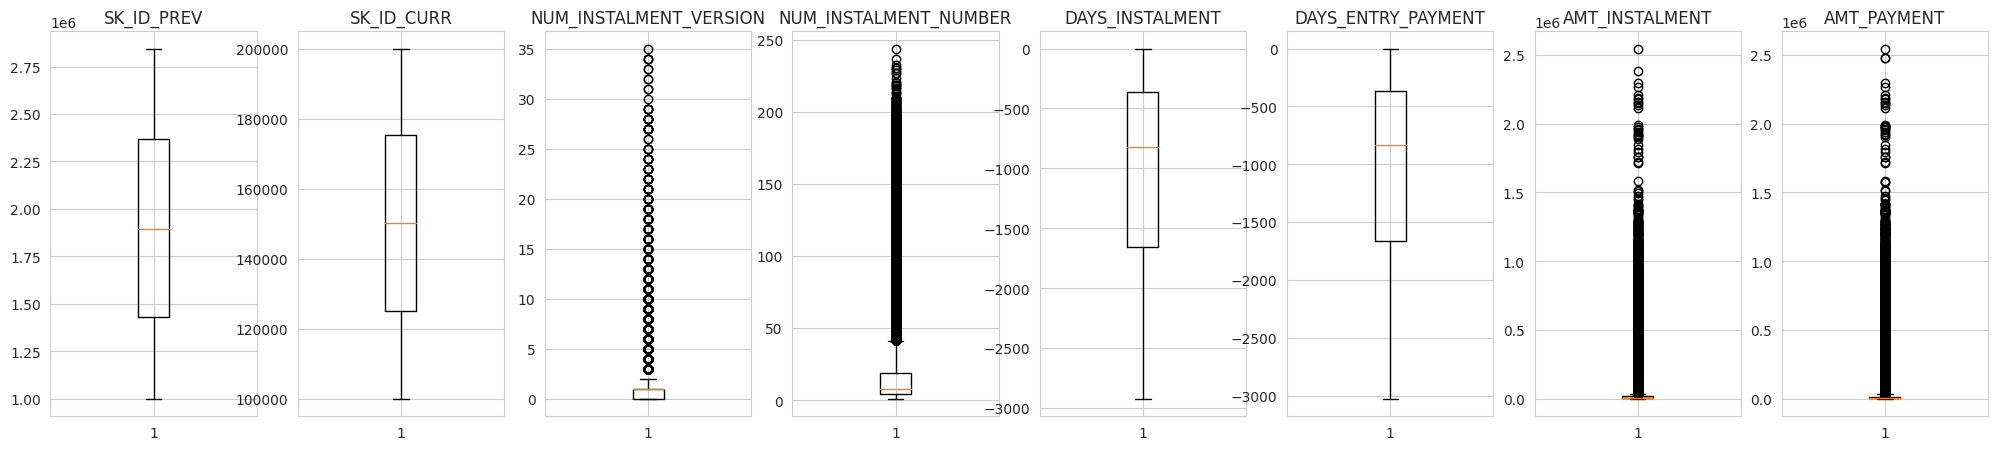

In [191]:
#Melihat Outliers pada tiap feature data Installment Payments

fig, axs = plt.subplots(ncols=len(installments_payments.columns), figsize=(25,5))
for i, col in enumerate(installments_payments.columns):
    axs[i].boxplot(installments_payments[col])
    axs[i].set_title(col)
plt.show()

In [192]:
installments_payments.describe()

SK_ID_PREV     SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  3.353870e+05  335387.000000           335387.000000   
mean   1.901121e+06  150163.101557                0.853787   
std    5.359747e+05   28937.744158                1.012451   
min    1.000005e+06  100002.000000                0.000000   
25%    1.430878e+06  125142.000000                0.000000   
50%    1.895217e+06  150114.000000                1.000000   
75%    2.366454e+06  175321.000000                1.000000   
max    2.843491e+06  199999.000000               35.000000   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count          335387.000000    335387.000000       335387.000000   
mean               19.042995     -1044.312093        -1053.053887   
std                26.934104       801.242749          800.825169   
min                 1.000000     -2922.000000        -3026.000000   
25%                 4.000000     -1657.000000        -1666.000000   
50%                 8.000000      -822.000000         -831.000000   
75%                19.000000      -362.000000         -371.000000   
max               244.000000        -2.000000           -2.000000   

       AMT_INSTALMENT   AMT_PAYMENT  
count    3.353870e+05  3.353870e+05  
mean     1.706285e+04  1.728882e+04  
std      5.198726e+04  5.664722e+04  
min      0.000000e+00  0.000000e+00  
25%      4.169835e+03  3.375000e+03  
50%      8.860905e+03  8.100000e+03  
75%      1.660365e+04  1.598584e+04  
max      2.544234e+06  2.544234e+06

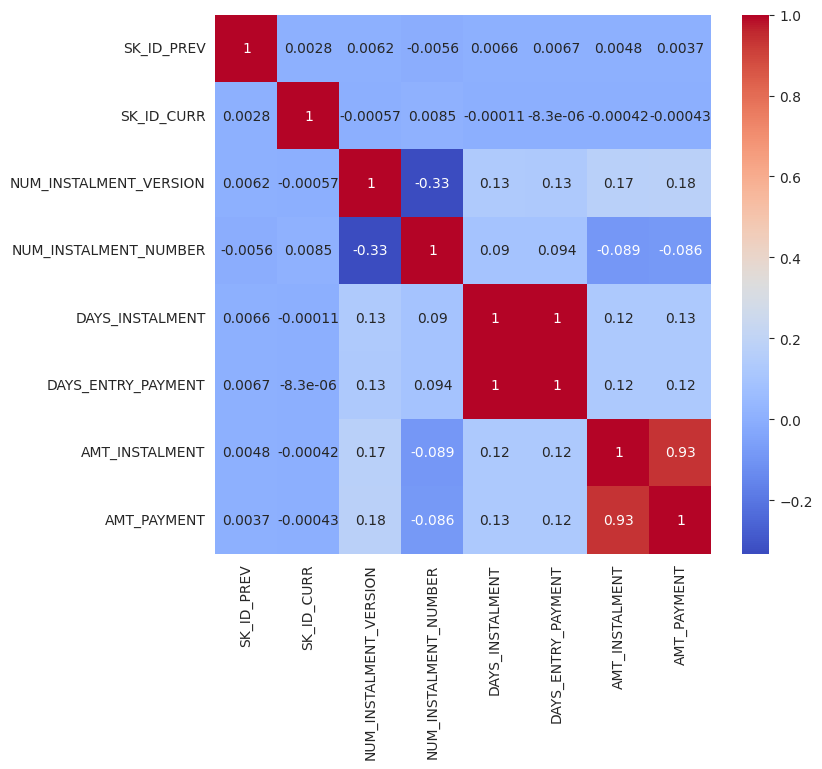

In [193]:
#Memeriksa korelasi antar fitur menggunakan heatmap
corr = installments_payments.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Data Cleaning**

In [194]:
installments_payments = installments_payments.dropna()
installments_payments

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0          1054186      161674                     1.0                      6   
1          1330831      151639                     0.0                     34   
2          2085231      193053                     2.0                      1   
3          2452527      199697                     1.0                      3   
4          2714724      167756                     1.0                      2   
...            ...         ...                     ...                    ...   
335382     1263846      162025                     0.0                     64   
335383     1519152      183180                     0.0                      2   
335384     1263382      124748                     0.0                    106   
335385     2094894      113649                     1.0                      4   
335386     2178901      105723                     1.0                     18   

        DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0               -1180.0             -1187.0        6948.360     6948.360  
1               -2156.0             -2156.0        1716.525     1716.525  
2                 -63.0               -63.0       25425.000    25425.000  
3               -2418.0             -2426.0       24350.130    24350.130  
4               -1383.0             -1366.0        2165.040     2160.585  
...                 ...                 ...             ...          ...  
335382           -409.0              -425.0        2836.215     2836.215  
335383           -385.0              -385.0         437.445      437.445  
335384          -1231.0             -1237.0        9000.000     9000.000  
335385           -153.0              -183.0       10482.795      582.345  
335386            -68.0               -78.0        6593.085      659.000  

[335387 rows x 8 columns]

**Drop Outlier**

In [195]:
Q1 = installments_payments.quantile(0.25)
Q3 = installments_payments.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (installments_payments < (Q1 - 1.5 * IQR)) | (installments_payments > (Q3 + 1.5 * IQR))
installments_payments = installments_payments[~outliers.any(axis=1)]

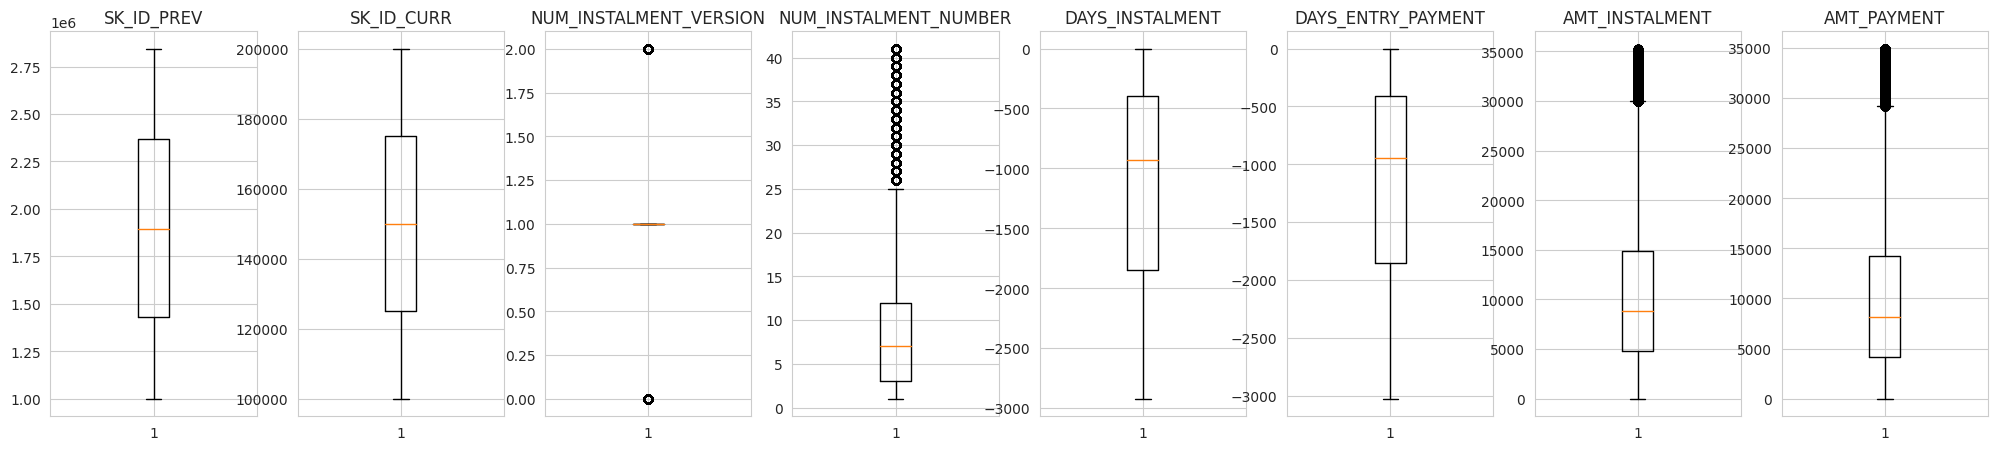

In [196]:
#Melihat Outliers pada tiap feature data Installment Payments

fig, axs = plt.subplots(ncols=len(installments_payments.columns), figsize=(25,5))
for i, col in enumerate(installments_payments.columns):
    axs[i].boxplot(installments_payments[col])
    axs[i].set_title(col)
plt.show()

In [197]:
installments_payments['NUM_INSTALMENT_VERSION'].value_counts()

1.0    192083
0.0     52309
2.0      8541
Name: NUM_INSTALMENT_VERSION, dtype: int64

In [198]:
print('Number of data points : ', installments_payments.shape[0])
print('Number of features : ', installments_payments.shape[1])
installments_payments.head()

Number of data points :  252933
Number of features :  8


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

**Feature Engineering**
Feature Extraction¶


In [199]:
installments_payments['NEW_DAYS_PAID_EARLIER'] = installments_payments['DAYS_INSTALMENT']-installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments

<ipython-input-199-b83b3dd90590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  installments_payments['NEW_DAYS_PAID_EARLIER'] = installments_payments['DAYS_INSTALMENT']-installments_payments['DAYS_ENTRY_PAYMENT']


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0          1054186      161674                     1.0                      6   
1          1330831      151639                     0.0                     34   
2          2085231      193053                     2.0                      1   
3          2452527      199697                     1.0                      3   
4          2714724      167756                     1.0                      2   
...            ...         ...                     ...                    ...   
335380     1279908      101577                     1.0                     11   
335381     2399055      179870                     1.0                      7   
335383     1519152      183180                     0.0                      2   
335385     2094894      113649                     1.0                      4   
335386     2178901      105723                     1.0                     18   

        DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  \
0               -1180.0             -1187.0        6948.360     6948.360   
1               -2156.0             -2156.0        1716.525     1716.525   
2                 -63.0               -63.0       25425.000    25425.000   
3               -2418.0             -2426.0       24350.130    24350.130   
4               -1383.0             -1366.0        2165.040     2160.585   
...                 ...                 ...             ...          ...   
335380           -282.0              -337.0        7366.230     7366.230   
335381          -2777.0             -2747.0        6183.495     5747.310   
335383           -385.0              -385.0         437.445      437.445   
335385           -153.0              -183.0       10482.795      582.345   
335386            -68.0               -78.0        6593.085      659.000   

        NEW_DAYS_PAID_EARLIER  
0                         7.0  
1                         0.0  
2                         0.0  
3                         8.0  
4                       -17.0  
...                       ...  
335380                   55.0  
335381                  -30.0  
335383                    0.0  
335385                   30.0  
335386                   10.0  

[252933 rows x 9 columns]

In [200]:
# Apakah setiap pembayaran angsuran terlambat atau tidak 1: terlambat dibayar 0: mewakili pembayaran lebih awal
installments_payments['NEW_NUM_PAID_LATER'] = installments_payments['NEW_DAYS_PAID_EARLIER'].map(lambda x: 1 if x<0 else 0)
installments_payments

<ipython-input-200-e3a5af4de837>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  installments_payments['NEW_NUM_PAID_LATER'] = installments_payments['NEW_DAYS_PAID_EARLIER'].map(lambda x: 1 if x<0 else 0)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0          1054186      161674                     1.0                      6   
1          1330831      151639                     0.0                     34   
2          2085231      193053                     2.0                      1   
3          2452527      199697                     1.0                      3   
4          2714724      167756                     1.0                      2   
...            ...         ...                     ...                    ...   
335380     1279908      101577                     1.0                     11   
335381     2399055      179870                     1.0                      7   
335383     1519152      183180                     0.0                      2   
335385     2094894      113649                     1.0                      4   
335386     2178901      105723                     1.0                     18   

        DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  \
0               -1180.0             -1187.0        6948.360     6948.360   
1               -2156.0             -2156.0        1716.525     1716.525   
2                 -63.0               -63.0       25425.000    25425.000   
3               -2418.0             -2426.0       24350.130    24350.130   
4               -1383.0             -1366.0        2165.040     2160.585   
...                 ...                 ...             ...          ...   
335380           -282.0              -337.0        7366.230     7366.230   
335381          -2777.0             -2747.0        6183.495     5747.310   
335383           -385.0              -385.0         437.445      437.445   
335385           -153.0              -183.0       10482.795      582.345   
335386            -68.0               -78.0        6593.085      659.000   

        NEW_DAYS_PAID_EARLIER  NEW_NUM_PAID_LATER  
0                         7.0                   0  
1                         0.0                   0  
2                         0.0                   0  
3                         8.0                   0  
4                       -17.0                   1  
...                       ...                 ...  
335380                   55.0                   0  
335381                  -30.0                   1  
335383                    0.0                   0  
335385                   30.0                   0  
335386                   10.0                   0  

[252933 rows x 10 columns]

In [201]:
# Menentukan kolom yang digunakan sebagai acuan pengurutan
kolom_acuan = 'SK_ID_PREV'

# Mengurutkan DataFrame berdasarkan kolom acuan
df_urut = installments_payments.sort_values(by=kolom_acuan)

In [202]:
df_urut

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
109820     1000005      176456                     1.0                      2   
251801     1000019      176905                     1.0                      7   
44511      1000025      156331                     1.0                      3   
78330      1000025      156331                     1.0                      5   
177792     1000031      131335                     0.0                      5   
...            ...         ...                     ...                    ...   
159601     2843477      168439                     0.0                      6   
20749      2843477      168439                     0.0                      2   
41702      2843477      168439                     0.0                      1   
195320     2843477      168439                     0.0                     31   
215016     2843491      107385                     1.0                      1   

        DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  \
109820          -1658.0             -1664.0       14713.605    14713.605   
251801          -2127.0             -2157.0        6072.165        0.090   
44511            -388.0              -396.0        2616.795     2616.795   
78330            -328.0              -354.0        2616.795     2616.795   
177792           -332.0              -351.0         225.000      225.000   
...                 ...                 ...             ...          ...   
159601          -2492.0             -2492.0       25785.000    25785.000   
20749           -2553.0             -2553.0       13500.000    13500.000   
41702           -2547.0             -2553.0        3375.000     3375.000   
195320          -1785.0             -1785.0         167.490      167.490   
215016           -274.0              -278.0       25421.985    25421.985   

        NEW_DAYS_PAID_EARLIER  NEW_NUM_PAID_LATER  
109820                    6.0                   0  
251801                   30.0                   0  
44511                     8.0                   0  
78330                    26.0                   0  
177792                   19.0                   0  
...                       ...                 ...  
159601                    0.0                   0  
20749                     0.0                   0  
41702                     6.0                   0  
195320                    0.0                   0  
215016                    4.0                   0  

[252933 rows x 10 columns]

Agregate

In [203]:
# Agregasi dan deduplikasi variabel
agg_list = {'NUM_INSTALMENT_VERSION':['nunique'],
               'NUM_INSTALMENT_NUMBER':'max',
               'AMT_INSTALMENT':['mean','sum'],
               'AMT_PAYMENT':['mean','sum'],
               'NEW_DAYS_PAID_EARLIER':'min',
               'NEW_NUM_PAID_LATER':'sum'}

In [204]:
ins_agg = installments_payments.groupby('SK_ID_PREV').agg(agg_list)

In [205]:
ins_agg

NUM_INSTALMENT_VERSION NUM_INSTALMENT_NUMBER AMT_INSTALMENT  \
                          nunique                   max           mean   
SK_ID_PREV                                                               
1000005                         1                     2     14713.6050   
1000019                         1                     7      6072.1650   
1000025                         1                     5      2616.7950   
1000031                         1                    29       290.9400   
1000032                         1                     6     10561.2300   
...                           ...                   ...            ...   
2843471                         1                     4     15362.6400   
2843474                         1                     2     11028.1500   
2843476                         1                    32      8550.0000   
2843477                         1                    31     10706.8725   
2843491                         1                     1     25421.9850   

                        AMT_PAYMENT            NEW_DAYS_PAID_EARLIER  \
                  sum          mean        sum                   min   
SK_ID_PREV                                                             
1000005     14713.605  14713.605000  14713.605                   6.0   
1000019      6072.165      0.090000      0.090                  30.0   
1000025      5233.590   2616.795000   5233.590                   8.0   
1000031       872.820    290.940000    872.820                   0.0   
1000032     10561.230  10561.230000  10561.230                  15.0   
...               ...           ...        ...                   ...   
2843471     15362.640  15362.640000  15362.640                  10.0   
2843474     11028.150  11028.150000  11028.150                  22.0   
2843476     59850.000   7135.714286  49950.000                 -41.0   
2843477     42827.490  10706.872500  42827.490                   0.0   
2843491     25421.985  25421.985000  25421.985                   4.0   

           NEW_NUM_PAID_LATER  
                          sum  
SK_ID_PREV                     
1000005                     0  
1000019                     0  
1000025                     0  
1000031                     0  
1000032                     0  
...                       ...  
2843471                     0  
2843474                     0  
2843476                     5  
2843477                     0  
2843491                     0  

[141823 rows x 8 columns]

In [206]:
ins_agg.columns = pd.Index([e[0] + '_' + e[1].upper() for e in ins_agg.columns.tolist()])
ins_agg.columns

Index(['NUM_INSTALMENT_VERSION_NUNIQUE', 'NUM_INSTALMENT_NUMBER_MAX',
       'AMT_INSTALMENT_MEAN', 'AMT_INSTALMENT_SUM', 'AMT_PAYMENT_MEAN',
       'AMT_PAYMENT_SUM', 'NEW_DAYS_PAID_EARLIER_MIN',
       'NEW_NUM_PAID_LATER_SUM'],
      dtype='object')

In [207]:
# Persentase pembayaran pinjaman dan total sisa hutang
ins_agg['INS_NEW_PAYMENT_PERC'] = ins_agg['AMT_PAYMENT_SUM'] / ins_agg['AMT_INSTALMENT_SUM']
ins_agg['INS_NEW_PAYMENT_DIFF'] = ins_agg['AMT_INSTALMENT_SUM'] - ins_agg['AMT_PAYMENT_SUM']

In [208]:
ins_agg= ins_agg.drop(['AMT_INSTALMENT_SUM','AMT_PAYMENT_SUM'], axis=1)


In [209]:
ins_agg.reset_index(inplace=True)


In [210]:
ins_agg

SK_ID_PREV  NUM_INSTALMENT_VERSION_NUNIQUE  NUM_INSTALMENT_NUMBER_MAX  \
0          1000005                               1                          2   
1          1000019                               1                          7   
2          1000025                               1                          5   
3          1000031                               1                         29   
4          1000032                               1                          6   
...            ...                             ...                        ...   
141818     2843471                               1                          4   
141819     2843474                               1                          2   
141820     2843476                               1                         32   
141821     2843477                               1                         31   
141822     2843491                               1                          1   

        AMT_INSTALMENT_MEAN  AMT_PAYMENT_MEAN  NEW_DAYS_PAID_EARLIER_MIN  \
0                14713.6050      14713.605000                        6.0   
1                 6072.1650          0.090000                       30.0   
2                 2616.7950       2616.795000                        8.0   
3                  290.9400        290.940000                        0.0   
4                10561.2300      10561.230000                       15.0   
...                     ...               ...                        ...   
141818           15362.6400      15362.640000                       10.0   
141819           11028.1500      11028.150000                       22.0   
141820            8550.0000       7135.714286                      -41.0   
141821           10706.8725      10706.872500                        0.0   
141822           25421.9850      25421.985000                        4.0   

        NEW_NUM_PAID_LATER_SUM  INS_NEW_PAYMENT_PERC  INS_NEW_PAYMENT_DIFF  
0                            0              1.000000                 0.000  
1                            0              0.000015              6072.075  
2                            0              1.000000                 0.000  
3                            0              1.000000                 0.000  
4                            0              1.000000                 0.000  
...                        ...                   ...                   ...  
141818                       0              1.000000                 0.000  
141819                       0              1.000000                 0.000  
141820                       5              0.834586              9900.000  
141821                       0              1.000000                 0.000  
141822                       0              1.000000                 0.000  

[141823 rows x 9 columns]

Merge installments_payments, credit_card_balance, dan pos_cash_balance¶


In [211]:
# Merge installment dgn pos_credit
ins_credit_pos = ins_agg.merge(pos_credit, how='left', on='SK_ID_PREV')

In [212]:
ins_credit_pos

SK_ID_PREV  NUM_INSTALMENT_VERSION_NUNIQUE  NUM_INSTALMENT_NUMBER_MAX  \
0          1000005                               1                          2   
1          1000019                               1                          7   
2          1000025                               1                          5   
3          1000031                               1                         29   
4          1000032                               1                          6   
...            ...                             ...                        ...   
141818     2843471                               1                          4   
141819     2843474                               1                          2   
141820     2843476                               1                         32   
141821     2843477                               1                         31   
141822     2843491                               1                          1   

        AMT_INSTALMENT_MEAN  AMT_PAYMENT_MEAN  NEW_DAYS_PAID_EARLIER_MIN  \
0                14713.6050      14713.605000                        6.0   
1                 6072.1650          0.090000                       30.0   
2                 2616.7950       2616.795000                        8.0   
3                  290.9400        290.940000                        0.0   
4                10561.2300      10561.230000                       15.0   
...                     ...               ...                        ...   
141818           15362.6400      15362.640000                       10.0   
141819           11028.1500      11028.150000                       22.0   
141820            8550.0000       7135.714286                      -41.0   
141821           10706.8725      10706.872500                        0.0   
141822           25421.9850      25421.985000                        4.0   

        NEW_NUM_PAID_LATER_SUM  INS_NEW_PAYMENT_PERC  INS_NEW_PAYMENT_DIFF  \
0                            0              1.000000                 0.000   
1                            0              0.000015              6072.075   
2                            0              1.000000                 0.000   
3                            0              1.000000                 0.000   
4                            0              1.000000                 0.000   
...                        ...                   ...                   ...   
141818                       0              1.000000                 0.000   
141819                       0              1.000000                 0.000   
141820                       5              0.834586              9900.000   
141821                       0              1.000000                 0.000   
141822                       0              1.000000                 0.000   

        NAME_CONTRACT_STATUS_Active  MONTHS_BALANCE_SUM  SK_DPD_MAX  \
0                               1.0               -49.0         0.0   
1                               1.0               -72.0         0.0   
2                               NaN                 NaN         NaN   
3                               NaN                 NaN         NaN   
4                               1.0               -16.0         0.0   
...                             ...                 ...         ...   
141818                          NaN                 NaN         NaN   
141819                          NaN                 NaN         NaN   
141820                          1.0              -245.0        32.0   
141821                          1.0              -161.0         0.0   
141822                          NaN                 NaN         NaN   

        SK_DPD_DEF_MAX  CNT_INSTALMENT_MEAN  CNT_INSTALMENT_FUTURE_MEAN  \
0                  0.0                 10.0                         3.0   
1                  0.0                 12.0                         7.0   
2                  NaN                  NaN                         NaN   
3                  NaN          

In [213]:
# Menyimpan DataFrame ke dalam file CSV
ins_credit_pos.to_csv('ins_credit_pos.csv', index=False)

Merge train :
Merging Installment+Credit+Pos dgn Previous dan Data Cleaning

In [214]:
# Melihat preview data
agg_prev= pd.read_csv("aggregated_prevapp.csv")
print("Total Line : ",agg_prev.shape[0])
print("Jumlah kolom : ",agg_prev.shape[1])
agg_prev.head()

Total Line :  48431
Jumlah kolom :  108


SK_ID_CURR  SK_ID_CURR_MAX  SK_ID_CURR_MEAN  AMT_ANNUITY_MEAN  \
0      100007          100007         100007.0         16509.600   
1      100009          100009         100009.0          8996.760   
2      100012          100012         100012.0          3012.075   
3      100025          100025         100025.0          7159.545   
4      100026          100026         100026.0         23608.485   

   AMT_APPLICATION_MEAN  AMT_CREDIT_MEAN  AMT_GOODS_PRICE_MEAN  \
0              180000.0         180000.0              180000.0   
1               98239.5          98239.5               98239.5   
2               18720.0          23697.0               18720.0   
3               58455.0          36810.0               58455.0   
4              132345.0         132345.0              132345.0   

   HOUR_APPR_PROCESS_START_MEAN  DAYS_DECISION_MEAN  CNT_PAYMENT_MEAN  \
0                          14.0              -865.0              18.0   
1                          18.0              -449.0              12.0   
2                           9.0             -1673.0              12.0   
3                          17.0             -2060.0               6.0   
4                          12.0             -1427.0               6.0   

   NEW_APP_CREDIT_RATE_MEAN  NEW_AMT_PAYMENT_RATE_MEAN  \
0                  1.000000                  10.902747   
1                  1.000000                  10.919431   
2                  0.789973                   7.867334   
3                  1.588020                   5.141388   
4                  1.000000                   5.605823   

   NEW_APP_GOODS_RATE_MEAN  NEW_CREDIT_GOODS_RATE_MEAN  NEW_RETURN_DAY_MEAN  \
0                      1.0                    1.000000               -325.0   
1                      1.0                    1.000000                -89.0   
2                      1.0                    1.265865              -1313.0   
3                      1.0                    0.629715              -1880.0   
4                      1.0                    1.000000              -1247.0   

   NEW_APP_CREDIT_RATE_RATIO_<LAMBDA>  NAME_CONTRACT_TYPE_Cash loans_<LAMBDA>  \
0                                   1                                       1   
1                                   1                                       0   
2                                   1                                       0   
3                                   0                                       0   
4                                   1                                       0   

   NAME_CONTRACT_TYPE_Consumer loans_<LAMBDA>  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   NAME_CONTRACT_TYPE_Revolving loans_<LAMBDA>  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   WEEKDAY_APPR_PROCESS_START_WEEKDAY_<LAMBDA>  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            1   

   WEEKDAY_APPR_PROCESS_START_WEEKEND_<LAMBDA>  \
0                                            1   
1                                            1   
2                                            0   
3                                            1   
4                                            0   

   NAME_CASH_LOAN_PURPOSE_Building a house or an annex_<LAMBDA>  \
0                                                  0              
1                                                  0              
2                                               

In [215]:
# Merge credit+installment+pos dgn prev
ins_credit_pos_prev = agg_prev.merge(ins_credit_pos, how='left', on='SK_ID_PREV')

In [216]:
# Drop feature yang tidak diperlukan/ sudah tercover oleh feature lain
ins_credit_pos_prev1= ins_credit_pos_prev.drop(['CNT_DRAWINGS_ATM_CURRENT_SUM',
                                               'CNT_DRAWINGS_OTHER_CURRENT_SUM','CNT_DRAWINGS_POS_CURRENT_SUM',
                                               'AMT_DRAWINGS_OTHER_CURRENT_SUM','AMT_DRAWINGS_POS_CURRENT_SUM',
                                                'AMT_DRAWINGS_ATM_CURRENT_SUM',
                                               'AMT_RECIVABLE_SUM','AMT_PAYMENT_CURRENT_SUM'], axis=1)

In [217]:
# check Missing Values

from prettytable import PrettyTable
# Create the table
table = PrettyTable(['Variable', 'Missing Values'])

# Loop through each column in the dataset
for col in ins_credit_pos_prev1:
    # Count the number of missing values
    missing_values = ins_credit_pos_prev1[col].isnull().sum()

    # Add the row to the table
    table.add_row([col, missing_values])

# Print the table
print(table)

+----------------------------------------------------------------------+----------------+
|                               Variable                               | Missing Values |
+----------------------------------------------------------------------+----------------+
|                              SK_ID_CURR                              |       0        |
|                            SK_ID_CURR_MAX                            |       0        |
|                           SK_ID_CURR_MEAN                            |       0        |
|                           AMT_ANNUITY_MEAN                           |       0        |
|                         AMT_APPLICATION_MEAN                         |       0        |
|                           AMT_CREDIT_MEAN                            |       0        |
|                         AMT_GOODS_PRICE_MEAN                         |       0        |
|                     HOUR_APPR_PROCESS_START_MEAN                     |       0        |
|         

In [218]:
# Cleaning missing value dengan modus

def isi_missing_modus(ins_credit_pos_prev1, kolom):
    modus = ins_credit_pos_prev1[kolom].mode()[0]
    ins_credit_pos_prev1[kolom] = ins_credit_pos_prev1[kolom].fillna(modus)

isi_missing_modus(ins_credit_pos_prev1, 'NUM_INSTALMENT_VERSION_NUNIQUE')
isi_missing_modus(ins_credit_pos_prev1, 'NUM_INSTALMENT_NUMBER_MAX')
isi_missing_modus(ins_credit_pos_prev1, 'NEW_DAYS_PAID_EARLIER_MIN')
isi_missing_modus(ins_credit_pos_prev1, 'NEW_NUM_PAID_LATER_SUM')
isi_missing_modus(ins_credit_pos_prev1, 'INS_NEW_PAYMENT_PERC')
isi_missing_modus(ins_credit_pos_prev1, 'INS_NEW_PAYMENT_DIFF')
isi_missing_modus(ins_credit_pos_prev1, 'NAME_CONTRACT_STATUS_Active')
isi_missing_modus(ins_credit_pos_prev1, 'SK_DPD_MAX')
isi_missing_modus(ins_credit_pos_prev1, 'SK_DPD_DEF_MAX')
isi_missing_modus(ins_credit_pos_prev1, 'CNT_DRAWINGS_CURRENT_SUM')

In [219]:
# Cleaning missing value dengan mean

def isi_missing_mean(ins_credit_pos_prev1, kolom):
    mean = ins_credit_pos_prev1[kolom].mean()
    ins_credit_pos_prev1[kolom]=ins_credit_pos_prev1[kolom].fillna(mean)

isi_missing_mean(ins_credit_pos_prev1, 'AMT_INSTALMENT_MEAN')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_PAYMENT_MEAN')
isi_missing_mean(ins_credit_pos_prev1, 'MONTHS_BALANCE_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'CNT_INSTALMENT_MEAN')
isi_missing_mean(ins_credit_pos_prev1, 'CNT_INSTALMENT_FUTURE_MEAN')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_BALANCE_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_CREDIT_LIMIT_ACTUAL_MAX')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_DRAWINGS_CURRENT_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_INST_MIN_REGULARITY_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_PAYMENT_TOTAL_CURRENT_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_RECEIVABLE_PRINCIPAL_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_TOTAL_RECEIVABLE_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'CNT_INSTALMENT_MATURE_CUM_MAX')

In [220]:
from prettytable import PrettyTable
# Create the table
table = PrettyTable(['Variable', 'Missing Values'])

# Loop through each column in the dataset
for col in ins_credit_pos_prev1:
    # Count the number of missing values
    missing_values = ins_credit_pos_prev1[col].isnull().sum()

    # Add the row to the table
    table.add_row([col, missing_values])

# Print the table
print(table)

+----------------------------------------------------------------------+----------------+
|                               Variable                               | Missing Values |
+----------------------------------------------------------------------+----------------+
|                              SK_ID_CURR                              |       0        |
|                            SK_ID_CURR_MAX                            |       0        |
|                           SK_ID_CURR_MEAN                            |       0        |
|                           AMT_ANNUITY_MEAN                           |       0        |
|                         AMT_APPLICATION_MEAN                         |       0        |
|                           AMT_CREDIT_MEAN                            |       0        |
|                         AMT_GOODS_PRICE_MEAN                         |       0        |
|                     HOUR_APPR_PROCESS_START_MEAN                     |       0        |
|         

In [221]:
ins_credit_pos_prev1

SK_ID_CURR  SK_ID_CURR_MAX  SK_ID_CURR_MEAN  AMT_ANNUITY_MEAN  \
0          100007          100007         100007.0         16509.600   
1          100009          100009         100009.0          8996.760   
2          100012          100012         100012.0          3012.075   
3          100025          100025         100025.0          7159.545   
4          100026          100026         100026.0         23608.485   
...           ...             ...              ...               ...   
48426      456220          456220         456220.0          5618.790   
48427      456230          456230         456230.0         21129.255   
48428      456233          456233         456233.0          9115.560   
48429      456244          456244         456244.0         22500.000   
48430      456254          456254         456254.0         19065.825   

       AMT_APPLICATION_MEAN  AMT_CREDIT_MEAN  AMT_GOODS_PRICE_MEAN  \
0                 180000.00         180000.0            180000.000   
1                  98239.50          98239.5             98239.500   
2                  18720.00          23697.0             18720.000   
3                  58455.00          36810.0             58455.000   
4                 132345.00         132345.0            132345.000   
...                     ...              ...                   ...   
48426              38911.50          42120.0             38911.500   
48427             123070.50         108522.0            123070.500   
48428              81810.00          90450.0             81810.000   
48429              97062.75         450000.0            107194.905   
48430             223789.50         247423.5            223789.500   

       HOUR_APPR_PROCESS_START_MEAN  DAYS_DECISION_MEAN  CNT_PAYMENT_MEAN  \
0                              14.0              -865.0              18.0   
1                              18.0              -449.0              12.0   
2                               9.0             -1673.0              12.0   
3                              17.0             -2060.0               6.0   
4                              12.0             -1427.0               6.0   
...                             ...                 ...               ...   
48426                          12.0             -2313.0              10.0   
48427                          14.0             -2250.0               6.0   
48428                          10.0              -307.0              12.0   
48429                          10.0             -1264.0              12.0   
48430                          18.0              -277.0              16.0   

       NEW_APP_CREDIT_RATE_MEAN  NEW_AMT_PAYMENT_RATE_MEAN  \
0                      1.000000                  10.902747   
1                      1.000000                  10.919431   
2                      0.789973                   7.867334   
3                      1.588020                   5.141388   
4                      1.000000                   5.605823   
...                         ...                        ...   
48426                  0.923825                   7.496276   
48427                  1.134060                   5.136102   
48428                  0.904478                   9.922594   
48429                  0.215695                  20.000000   
48430                  0.904480                  12.977330   

       NEW_APP_GOODS_RATE_MEAN  NEW_CREDIT_GOODS_RATE_MEAN  \
0                     1.000000                    1.000000   
1                     1.000000                    1.000000   
2                     1.000000                    1.265865   
3                     1.000000                    0.629715   
4                     1.000000                    1.000000   
...                        ...                         ...   
48426                 1.000000                    1.082456   
48427                 1.000000                    0.881787   
48428                 1.000000                    1.105611   
48429      

In [222]:
# Menyimpan DataFrame ke dalam file CSV
ins_credit_pos_prev1.to_csv('ins_credit_pos_prev(BERSIH).csv', index=False)

**Mergering bureau_full and application_train**

* bureau_full(305811, 25)
* application_train(307511, 177)
* installment payments, credit card, pos cash balance (1080817,130)

In [223]:
# Merge application_train with Bureau_full

merge_1 = application_train.merge(bureau_full, on='SK_ID_CURR', how='right')

In [224]:
merge_1.shape


(41640, 197)

In [225]:
%cd /content/drive/MyDrive/MBKM - Data Science/Final Project
merge_1.to_csv("merge_1.csv", index=False)

[Errno 2] No such file or directory: '/content/drive/MyDrive/MBKM - Data Science/Final Project'
/content


In [226]:
merge_1 = pd.read_csv("merge_1.csv")

<ipython-input-226-0687a13b49a2>:1: DtypeWarning: Columns (43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  merge_1 = pd.read_csv("merge_1.csv")


In [227]:
merge_1.shape

(41640, 197)

In [228]:
ins_credit_pos_prev1 = pd.read_csv("ins_credit_pos_prev(BERSIH).csv")

In [229]:
ins_credit_pos_prev1.shape

(48431, 131)

In [230]:
ins_credit_pos_prev1["SK_ID_CURR"].value_counts()

404929    7
161206    6
142252    5
170584    5
142541    5
         ..
225208    1
225224    1
225235    1
225238    1
456254    1
Name: SK_ID_CURR, Length: 43984, dtype: int64

In [231]:
from scipy.stats import mode

def FE_previous_application(prev_app3):
    prev_app_agg = {}

    for column in prev_app3.columns:
        if column == 'SK_ID_CURR':
            continue

        if prev_app3[column].dtype == 'object':
            prev_app_agg[column] = lambda x: mode(x)[0][0] if len(x) > 0 else None
        elif set(prev_app3[column].unique()) == {0, 1}:
            prev_app_agg[column] = lambda x: mode(x)[0][0] if len(x) > 0 else None
        else:
            prev_app_agg[column] = 'mean'

    prev_app_final_agg = prev_app3.groupby('SK_ID_CURR').agg(prev_app_agg)
    prev_app_final_agg.columns = [f"{col}_MODE" if prev_app3[col].dtype == 'object' else f"{col}_MEAN" for col in prev_app_final_agg.columns]
    prev_app_final_agg.reset_index(inplace=True)

    return prev_app_final_agg

In [232]:
ins_credit_pos_prev2 = FE_previous_application(ins_credit_pos_prev1)


<ipython-input-231-ee7e72853ad3>:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  prev_app_agg[column] = lambda x: mode(x)[0][0] if len(x) > 0 else None


In [233]:
ins_credit_pos_prev2.shape

(43984, 131)

In [234]:
ins_credit_pos_prev2.head(10)

SK_ID_CURR  SK_ID_CURR_MAX_MEAN  SK_ID_CURR_MEAN_MEAN  \
0      100007             100007.0              100007.0   
1      100009             100009.0              100009.0   
2      100012             100012.0              100012.0   
3      100025             100025.0              100025.0   
4      100026             100026.0              100026.0   
5      100027             100027.0              100027.0   
6      100032             100032.0              100032.0   
7      100035             100035.0              100035.0   
8      100042             100042.0              100042.0   
9      100043             100043.0              100043.0   

   AMT_ANNUITY_MEAN_MEAN  AMT_APPLICATION_MEAN_MEAN  AMT_CREDIT_MEAN_MEAN  \
0             16509.6000                 180000.000             180000.00   
1              8996.7600                  98239.500              98239.50   
2              3012.0750                  18720.000              23697.00   
3              7159.5450                  58455.000              36810.00   
4             23608.4850                 132345.000             132345.00   
5             22556.4750                 225000.000             239850.00   
6              7910.1450                  69255.000              42255.00   
7              8546.0625                  71998.875              77280.75   
8             10602.4500                  97956.000              95431.50   
9              5287.8150                  35775.000              33340.50   

   AMT_GOODS_PRICE_MEAN_MEAN  HOUR_APPR_PROCESS_START_MEAN_MEAN  \
0                180000.0000                               14.0   
1                 98239.5000                               18.0   
2                 18720.0000                                9.0   
3                 58455.0000                               17.0   
4                132345.0000                               12.0   
5                225000.0000                               14.0   
6                 69255.0000                               10.0   
7                 77064.9525                               14.0   
8                 97956.0000                               14.0   
9                 35775.0000                               11.0   

   DAYS_DECISION_MEAN_MEAN  CNT_PAYMENT_MEAN_MEAN  \
0                   -865.0                   18.0   
1                   -449.0                   12.0   
2                  -1673.0                   12.0   
3                  -2060.0                    6.0   
4                  -1427.0                    6.0   
5                   -181.0                   12.0   
6                  -1497.0                    6.0   
7                   -886.0                   11.0   
8                  -2750.0                   10.0   
9                  -2411.0                    8.0   

   NEW_APP_CREDIT_RATE_MEAN_MEAN  NEW_AMT_PAYMENT_RATE_MEAN_MEAN  \
0                       1.000000                       10.902747   
1                       1.000000                       10.919431   
2                       0.789973                        7.867334   
3                       1.588020                        5.141388   
4                       1.000000                        5.605823   
5                       0.938086                       10.633310   
6                       1.638978                        5.341874   
7                       0.959146                        8.678769   
8                       1.026454                        9.000891   
9                       1.073019                        6.305156   

   NEW_APP_GOODS_RATE_MEAN_MEAN  NEW_CREDIT_GOODS_RATE_MEAN_MEAN  \
0                       1.00000                         1.000000   
1                       1.00000                         1.000000   
2                       1.00000                         1.265865   
3                       1.00000                         0.629715   
4                       1.00000                         1.000000   
5              

In [235]:
ins_credit_pos_prev2.to_csv("merge_half3.csv", index=False)


In [236]:
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values'])
merge_half3 = pd.read_csv("merge_half3.csv")
# Loop through each column in the dataset
for col in merge_half3.columns:
    # Count the number of missing values
    missing_values = merge_half3[col].isnull().sum()

    # Add the row to the table
    table.add_row([col, missing_values])

# Print the table
print(table)

+---------------------------------------------------------------------------+----------------+
|                                  Variable                                 | Missing Values |
+---------------------------------------------------------------------------+----------------+
|                                 SK_ID_CURR                                |       0        |
|                            SK_ID_CURR_MAX_MEAN                            |       0        |
|                            SK_ID_CURR_MEAN_MEAN                           |       0        |
|                           AMT_ANNUITY_MEAN_MEAN                           |       0        |
|                         AMT_APPLICATION_MEAN_MEAN                         |       0        |
|                            AMT_CREDIT_MEAN_MEAN                           |       0        |
|                         AMT_GOODS_PRICE_MEAN_MEAN                         |       0        |
|                     HOUR_APPR_PROCESS_START_MEAN

In [237]:
merge_half3['SK_DPD_MAX_MEAN'].value_counts()

0.0       43953
1.0          17
274.0         1
215.0         1
1462.0        1
732.0         1
8.0           1
1097.0        1
610.0         1
487.0         1
1493.0        1
5.0           1
404.0         1
854.0         1
0.5           1
700.5         1
Name: SK_DPD_MAX_MEAN, dtype: int64

In [238]:
from prettytable import PrettyTable

# Define the table headers
table = PrettyTable()
table.field_names = ["Variable Name", "Missing Values", "Duplicates", "Outliers"]

# Loop through each column in the dataframe and add information to the table
for col in merge_half3.columns:
    # Count missing values
    missing_vals = merge_half3[col].isnull().sum()
    # Count duplicates
    duplicates = merge_half3.duplicated().sum()

    # Check for outliers (assuming a normal distribution)
    if merge_half3[col].dtype in ['int64', 'float64']:
        mean = merge_half3[col].mean()
        std = merge_half3[col].std()
        outliers = ((merge_half3[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add a row to the table
    table.add_row([col, missing_vals, duplicates, outliers])

# Print the table
print(table)

+---------------------------------------------------------------------------+----------------+------------+----------+
|                               Variable Name                               | Missing Values | Duplicates | Outliers |
+---------------------------------------------------------------------------+----------------+------------+----------+
|                                 SK_ID_CURR                                |       0        |     0      |    0     |
|                            SK_ID_CURR_MAX_MEAN                            |       0        |     0      |    0     |
|                            SK_ID_CURR_MEAN_MEAN                           |       0        |     0      |    0     |
|                           AMT_ANNUITY_MEAN_MEAN                           |       0        |     0      |   615    |
|                         AMT_APPLICATION_MEAN_MEAN                         |       0        |     0      |   940    |
|                            AMT_CREDIT_MEAN_MEA

In [239]:
# Merge application_train+Bureau_full with Full ins_credit_pos_prev
merge_terakhirrr = merge_1.merge(merge_half3, on='SK_ID_CURR', how='left')

In [240]:
merge_terakhirrr.shape

(41640, 327)

In [241]:
merge_terakhirrr.head(10)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100016     0.0           0.0           67500.0     80865.0   
1      100017     0.0           1.0          225000.0    918468.0   
2      100030     0.0           0.0           90000.0    225000.0   
3      100042     NaN           NaN               NaN         NaN   
4      100049     1.0           0.0          135000.0    288873.0   
5      100050     0.0           0.0          108000.0    746280.0   
6      100053     0.0           0.0          202500.0    305221.5   
7      100054     0.0           0.0           99000.0    260640.0   
8      100057     NaN           NaN               NaN         NaN   
9      100058     0.0           0.0           54000.0    135000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       5881.5          67500.0                    0.031329    -13439.0   
1      28966.5         697500.0                    0.016612    -14086.0   
2      11074.5         225000.0                    0.028663    -19334.0   
3          NaN              NaN                         NaN         NaN   
4      16258.5         238500.0                    0.007305    -13384.0   
5      42970.5         675000.0                    0.010966    -23548.0   
6      17649.0         252000.0                    0.019689    -20373.0   
7      26838.0         225000.0                    0.022625    -20121.0   
8          NaN              NaN                         NaN         NaN   
9       6750.0         135000.0                    0.014520    -12406.0   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0        -2717.0             -311.0          -3227.0         1.0   
1        -3028.0             -643.0          -4911.0         1.0   
2        -3494.0            -2419.0          -2893.0         1.0   
3            NaN                NaN              NaN         NaN   
4        -3597.0              -45.0          -4409.0         1.0   
5       365243.0            -5745.0          -4576.0         1.0   
6       365243.0            -7760.0          -1993.0         1.0   
7        -5332.0            -9197.0          -3283.0         1.0   
8            NaN                NaN              NaN         NaN   
9        -1176.0            -1149.0          -2576.0         1.0   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0             1.0              1.0               1.0         1.0         0.0   
1             1.0              0.0               1.0         0.0         0.0   
2             1.0              0.0               1.0         1.0         0.0   
3             NaN              NaN               NaN         NaN         NaN   
4             1.0              1.0               1.0         1.0         0.0   
5             0.0              0.0               1.0         0.0         0.0   
6             0.0              0.0               1.0         0.0         0.0   
7             1.0              1.0               1.0         1.0         0.0   
8             NaN              NaN               NaN         NaN         NaN   
9             1.0              0.0               0.0         0.0         0.0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              2.0                   2.0                          2.0   
1              3.0                   2.0                          2.0   
2              2.0                   2.0                          2.0   
3              NaN                   NaN                          NaN   
4              2.0                   3.0                          3.0   
5              1.0                   2.0                          2.0   
6              1.0                   2.0                          2.0   
7              2.0                   2.0                          2.0   
8              NaN                   NaN                          NaN   
9              2.0                   2.0                 

In [242]:
from prettytable import PrettyTable

# Define the table headers
table = PrettyTable()
table.field_names = ["Variable Name", "Missing Values", "Duplicates", "Outliers"]

# Loop through each column in the dataframe and add information to the table
for col in merge_terakhirrr.columns:
    # Count missing values
    missing_vals = merge_terakhirrr[col].isnull().sum()
    # Count duplicates
    duplicates = merge_terakhirrr.duplicated().sum()

    # Check for outliers (assuming a normal distribution)
    if merge_terakhirrr[col].dtype in ['int64', 'float64']:
        mean = merge_terakhirrr[col].mean()
        std = merge_terakhirrr[col].std()
        outliers = ((merge_terakhirrr[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add a row to the table
    table.add_row([col, missing_vals, duplicates, outliers])

# Print the table
print(table)

+---------------------------------------------------------------------------+----------------+------------+----------+
|                               Variable Name                               | Missing Values | Duplicates | Outliers |
+---------------------------------------------------------------------------+----------------+------------+----------+
|                                 SK_ID_CURR                                |       0        |     0      |    0     |
|                                   TARGET                                  |     37853      |     0      |   281    |
|                                CNT_CHILDREN                               |     37853      |     0      |    48    |
|                              AMT_INCOME_TOTAL                             |     37853      |     0      |    1     |
|                                 AMT_CREDIT                                |     37853      |     0      |    41    |
|                                AMT_ANNUITY    

In [243]:
drop = ['OCCU_TYPE_PER_INCOME','EDU_TYPE_PER_INCOME','ORG_TYPE_PER_INCOME']
merge_terakhirrr.drop(columns=drop, inplace=True)

In [244]:
data_clean = merge_terakhirrr.dropna()

In [245]:
data_clean

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35        100310     0.0           0.0          180000.0   1071000.0   
37        100314     0.0           2.0          292500.0    239850.0   
44        100360     0.0           0.0           67500.0    202500.0   
63        100550     0.0           0.0          247500.0    669591.0   
73        100631     0.0           1.0          135000.0    913500.0   
...          ...     ...           ...               ...         ...   
4492      138011     0.0           0.0           81000.0    427450.5   
4493      138012     0.0           1.0          270000.0   1081179.0   
4502      138098     0.0           0.0          135000.0    568800.0   
4503      138099     0.0           0.0          225000.0     59256.0   
4510      138152     0.0           0.0          144000.0    284400.0   

      AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
35        31315.5        1071000.0                    0.018029    -14659.0   
37        25960.5         225000.0                    0.018850    -10788.0   
44        10125.0         202500.0                    0.025164    -19676.0   
63        24178.5         508500.0                    0.035792    -13768.0   
73        26838.0         913500.0                    0.010643    -17515.0   
...           ...              ...                         ...         ...   
4492      15970.5         369000.0                    0.018850    -24190.0   
4493      43006.5         927000.0                    0.010276    -16263.0   
4502      20560.5         450000.0                    0.022625    -20036.0   
4503       4810.5          45000.0                    0.031329    -14898.0   
4510      15880.5         225000.0                    0.011703    -20400.0   

      DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
35          -1228.0             -688.0          -1107.0         1.0   
37          -2573.0            -5248.0          -3478.0         1.0   
44          -4483.0            -5545.0          -3236.0         1.0   
63          -2722.0            -6902.0          -4257.0         1.0   
73          -2412.0             -760.0          -1056.0         1.0   
...             ...                ...              ...         ...   
4492       365243.0             -330.0          -4540.0         1.0   
4493         -649.0            -8848.0          -3906.0         1.0   
4502       365243.0            -6460.0          -3371.0         1.0   
4503         -405.0            -1381.0            -84.0         1.0   
4510        -2520.0            -6191.0          -3713.0         1.0   

      FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
35               1.0              1.0               1.0         0.0   
37               1.0              1.0               1.0         1.0   
44               1.0              0.0               1.0         0.0   
63               1.0              0.0               1.0         0.0   
73               1.0              0.0               1.0         0.0   
...              ...              ...               ...         ...   
4492             0.0              0.0               1.0         0.0   
4493             1.0              0.0               1.0         0.0   
4502             0.0              0.0               1.0         1.0   
4503             1.0              0.0               1.0         0.0   
4510             1.0              0.0               1.0         1.0   

      FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35           0.0              2.0                   3.0   
37           0.0              4.0                   2.0   
44           0.0              2.0                   2.0   
63           0.0              2.0                   2.0   
73           0.0              2.0                   2.0   
...          ...              ...                   ...   
4492         0.0              1.0                   2.0   
4493         0.0          

In [246]:
row_count = data_clean.dropna().shape[0]
row_count

455

In [247]:
# Memeriksa apakah baris ke-0 mengandung nilai yang hilang
is_missing = merge_terakhirrr.iloc[3].isna().any()

if is_missing:
    print("Baris ke-0 memiliki nilai yang hilang")
else:
    print("Baris ke-0 tidak memiliki nilai yang hilang")

Baris ke-0 memiliki nilai yang hilang


In [248]:

data_clean.to_csv("train_clean.csv", index=False)

**Merge test**

In [249]:
# Merge application_test with Bureau_full
merge_test_1 = application_test.merge(bureau_full, on='SK_ID_CURR', how='left')

In [250]:
# Merge merge_test_1(application_test+bureau_full) with merge_half3(ins_credit_pos_prev2)
merge_test_final = merge_test_1.merge(merge_half3, on='SK_ID_CURR', how='left')

In [251]:
merge_test_final

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0          100001             0          135000.0    568800.0      20560.5   
1          100005             0           99000.0    222768.0      17370.0   
2          100013             0          202500.0    663264.0      69777.0   
3          100028             2          315000.0   1575000.0      49018.5   
4          100038             1          180000.0    625500.0      32067.0   
...           ...           ...               ...         ...          ...   
32701      338188             0          337500.0    701163.0      68436.0   
32702      338189             0          157500.0    450000.0      19197.0   
32703      338193             0          157500.0    285723.0      26334.0   
32704      338199             0          306000.0   1125000.0     109728.0   
32705      338202             0          247500.0    177768.0      14175.0   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             450000.0                    0.018850      -19241          -2329   
1             180000.0                    0.035792      -18064          -4469   
2             630000.0                    0.019101      -20038          -4458   
3            1575000.0                    0.026392      -13976          -1866   
4             625500.0                    0.010032      -13040          -2191   
...                ...                         ...         ...            ...   
32701         666000.0                    0.046220      -17180          -7373   
32702         450000.0                    0.026392      -14458           -959   
32703         238500.0                    0.018850      -13624          -6913   
32704        1125000.0                    0.028663      -22066          -5608   
32705         135000.0                    0.018634      -16032           -572   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0                -5170.0             -812           1               1   
1                -9118.0            -1623           1               1   
2                -2175.0            -3503           1               1   
3                -2000.0            -4208           1               1   
4                -4000.0            -4262           1               1   
...                  ...              ...         ...             ...   
32701           -11105.0             -691           1               1   
32702            -8276.0            -4590           1               1   
32703            -7667.0            -5302           1               1   
32704            -4103.0            -4257           1               1   
32705            -8552.0            -4802           1               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0                    0                 1           0           1   
1                    0                 1           0           0   
2                    0                 1           0           0   
3                    0                 1           1           0   
4                    1                 1           0           0   
...                ...               ...         ...         ...   
32701                0                 1           0           1   
32702                0                 1           0           0   
32703                0                 1           0           0   
32704                0                 1           0           0   
32705                0                 1           0           0   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                  2.0                     2                            2   
1                  2.0                     2                            2   
2                  2.0                     2                            2   
3                  4.0                     2                            2   
4                 

In [252]:
from prettytable import PrettyTable

# Define the table headers
table = PrettyTable()
table.field_names = ["Variable Name", "Missing Values"]

# Loop through each column in the dataframe and add information to the table
for col in merge_test_final.columns:
    # Count missing values
    missing_vals = merge_test_final[col].isnull().sum()

    # Add a row to the table
    table.add_row([col, missing_vals])

# Print the table
print(table)

+---------------------------------------------------------------------------+----------------+
|                               Variable Name                               | Missing Values |
+---------------------------------------------------------------------------+----------------+
|                                 SK_ID_CURR                                |       0        |
|                                CNT_CHILDREN                               |       0        |
|                              AMT_INCOME_TOTAL                             |       0        |
|                                 AMT_CREDIT                                |       0        |
|                                AMT_ANNUITY                                |       0        |
|                              AMT_GOODS_PRICE                              |       0        |
|                         REGION_POPULATION_RELATIVE                        |       0        |
|                                 DAYS_BIRTH      

In [253]:
# Save merge_test_finals
merge_test_final.to_csv("merge_test_final.csv", index=False)

In [254]:
Train = pd.read_csv("train_clean.csv")

In [255]:
Test = pd.read_csv("merge_test_final.csv")


In [256]:
# Mengambil perbedaan fitur antara dua dataset
diff_features = set(Train.columns) - set(Test.columns)

# Menampilkan perbedaan fitur
print("Perbedaan fitur antara dua dataset:")
for feature in diff_features:
    print(feature)

Perbedaan fitur antara dua dataset:
INCOME_RANGE
TARGET
CNT_CHILDREN_GROUP


In [257]:
Train.drop(['CNT_CHILDREN_GROUP', 'INCOME_RANGE'], axis=1, inplace=True)

**Splitting Dataset**
Memisahkan variabel dependen dan independen

In [258]:
# Memisahkan variabel independen sebagai X dan variabel dependen sebagai y dari data train
X_train_columns = list(Train.columns)
X_train = Train[X_train_columns[2:]] # independen (X)
Y_train = Train['TARGET'] # target/dependen (y)

In [259]:
print('Total Line & Column of X_train : ',X_train.shape)
print('Total Line of y_train : ',Y_train.shape)


Total Line & Column of X_train :  (455, 320)
Total Line of y_train :  (455,)


Melakukan train test split dengan perbandingan 80:20

In [260]:
from sklearn.model_selection import train_test_split

X_train_final, X_val_final, Y_train_final, Y_val_final = train_test_split(X_train, Y_train, test_size=0.2, \
                                                                        stratify=Y_train, random_state=68)
print(X_train_final.shape, Y_train_final.shape)
print(X_val_final.shape, Y_val_final.shape)


(364, 320) (364,)
(91, 320) (91,)


In [261]:
X_test_columns = list(Test.columns)
X_test = Test[X_test_columns[1:]] # independen (X)

In [262]:
print('Total Line & column of X_test : ',X_test.shape)

Total Line & column of X_test :  (32706, 323)


**Obtaining top 100 features**

In [263]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_train_final_arr = np.nan_to_num(X_train_final)
X_val_final_arr = np.nan_to_num(X_val_final)

S = SelectKBest(f_classif, k=100)

X_train_k_best = S.fit_transform(X_train_final_arr, Y_train_final)
X_val_k_best = S.transform(X_val_final_arr)

# Get columns to keep and create new dataframe with those only
cols = S.get_support(indices=True)

features_top_df_train = X_train_final.iloc[:,cols]
features_top_df_val = X_val_final.iloc[:,cols]
features_top_df_test = X_test[features_top_df_train.columns]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 10  13  54  56  58  61  65  66  68  81  90 110 116 118 120 125 127 128
 129 132 133 135 139 146 147 155 158 159 160 162 166 186 210 211 212 214
 215 218 219 220 228 236 242 305] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [264]:
features_top_df_train.columns = features_top_df_train.columns.str.replace('_<LAMBDA>_', '_')
features_top_df_val.columns = features_top_df_val.columns.str.replace('_<LAMBDA>_', '_')
features_top_df_test.columns = features_top_df_test.columns.str.replace('_<LAMBDA>_', '_')

**Scalling Dataset**

Salah satu model yang ingin dibentuk adalah Logistic Regression. Model tersebut membutuhkan variabel dependen yang berdistribusi normal. Salah satu jenis scaler adalah Standard Scaler yang digunakan untuk menstandarisasi data sehingga mean bernilai 0 dan variance 1 (distribusi normal). Maka, pada kasus ini akan digunakan Standard Scaler.

In [265]:
# Import library StandardScaler yang akan digunakan
from sklearn.preprocessing import StandardScaler

In [266]:
# Mendefinisikan StandardScaler
scaler = StandardScaler()

In [267]:
# Function to list feature numeric in dataset
def get_numerical_features(data):
    numerical_features = []

    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:
            # Exclude binary and categorical features
            if len(data[col].unique()) > 2:
                numerical_features.append(col)

    return numerical_features

In [268]:
list_numeric = get_numerical_features(features_top_df_train)
print(list_numeric)


['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CREDIT_TERM', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'ENDDATE_DIFF', 'UPDATE_DIFF', 'CUSTOMER_LOAN_COUNT', 'MONTHS_BALANCE', 'SK_ID_CURR_MAX_MEAN', 'SK_ID_CURR_MEAN_MEAN', 'AMT_ANNUITY_MEAN_MEAN', 'AMT_APPLICATION_MEAN_MEAN', 'AMT_CREDIT_MEAN_MEAN', 'AMT_GOODS_PRICE_MEAN_MEAN', 'NEW_APP_GOODS_RATE_MEAN_MEAN', 'NEW_CREDIT_GOODS_RATE_MEAN_MEAN', 'NEW_DAYS_PAID_EARLIER_MIN_MEAN', 'MONTHS_BALANCE_SUM_MEAN', 'CNT_INSTALMENT_MEAN_MEAN', 'CNT_INSTALMENT_FUTURE_MEAN_MEAN']


In [269]:
# Fit scaler pada fitur numerik pada X_train
scaler.fit(features_top_df_train[list_numeric])

StandardScaler()

In [270]:
# Melakukan scaling pada data numeric pada data train
X_train_scale = pd.DataFrame(scaler.transform(features_top_df_train[list_numeric]), columns = scaler.get_feature_names_out())
X_train_new = features_top_df_train.reset_index(drop = True).drop(columns = list_numeric)
scaled_X_train = pd.concat([X_train_new, X_train_scale], axis = 1)

In [271]:
# Fit scaler pada fitur numerik pada X_val
scaler.fit(features_top_df_val[list_numeric])

StandardScaler()

In [272]:
# Melakukan scaling pada data numeric pada data val
X_val_scale = pd.DataFrame(scaler.transform(features_top_df_val[list_numeric]), columns = scaler.get_feature_names_out())
X_val_new = features_top_df_val.reset_index(drop = True).drop(columns = list_numeric)
scaled_X_val = pd.concat([X_val_new, X_val_scale], axis = 1)

In [273]:
# Fit scaler pada fitur numerik pada X_test
scaler.fit(features_top_df_test[list_numeric])

StandardScaler()

In [274]:
# Melakukan scaling pada data numeric pada data test
X_test_scale = pd.DataFrame(scaler.transform(features_top_df_test[list_numeric]), columns = scaler.get_feature_names_out())
X_test_new = features_top_df_test.reset_index(drop = True).drop(columns = list_numeric)
scaled_X_test = pd.concat([X_test_new, X_test_scale], axis = 1)

**SMOTE**

Pada EDA sebelumnya, dapat diketahui bahwa variabel dependen (TARGET) memiliki proporsi yang tidak seimbang. Maka, dilakukan oversampling menggunakan SMOTE.

In [275]:
from imblearn.over_sampling import SMOTE

# Membuat objek SMOTE
smote = SMOTE(random_state=68)
# Melakukan oversampling pada data
X_train_smote, Y_train_smote = smote.fit_resample(scaled_X_train, Y_train_final)

In [276]:
print('Total Line & column of X_train : ',X_train_smote.shape)
print('Total Line of y_train : ',Y_train_smote.shape)

Total Line & column of X_train :  (684, 100)
Total Line of y_train :  (684,)


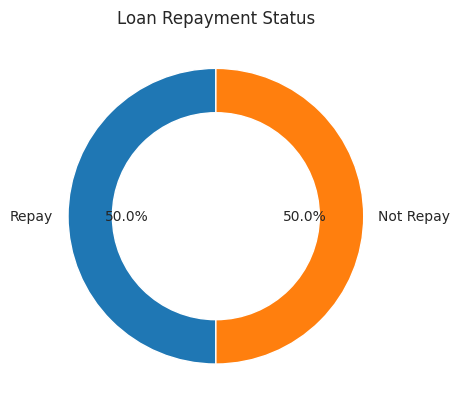

In [277]:
# Get counts of target values
target_counts = Y_train_smote.value_counts()

# Create figure and axis objects
fig, ax = plt.subplots()

# Create pie chart
labels = ['Repay', 'Not Repay']
pie = ax.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Create donut chart by drawing white circle in the center
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add title
ax.set_title('Loan Repayment Status')

# Show chart
plt.show()

**Metrics Evaluation**

Based on several sources from the internet, some definitions and examples are obtained as follows:

**accuracy**

Used when we want to know how well the model can predict the class of an instance as a whole and is best used when the class distribution is balanced. This is because accuracy does not take into account class imbalance, so it cannot provide an accurate picture of model performance.

**precision**

Precision measures how well the model identifies True Positives among all positive predictions. An example is the case of email classification SPAM or not. We prefer the algorithm to predict that the email is not SPAM but is not actually SPAM (so it remains in our email inbox), rather than an email whose algorithm predicts the email is SPAM but is actually not SPAM (so it is not in our inbox)

**recall**

Recall measures how well the model identifies True Positives among all true positive cases. It is better for our algorithm to predict that a patient will have cancer but not actually have cancer than for the algorithm to incorrectly predict that the patient does not have cancer when in fact the patient has cancer.

**F1-Score**

In terms of precision and recall, it is possible to have a tradeoff between the two. Which means, when Recall is very high, Precision will be very low, and vice versa. Therefore, to get a balanced performance between precision and sensitivity (recall). Use case example: In a plagiarism detection system, the F1 Score model can be used to measure how well the model can accurately predict documents that are actually plagiarized, and how well the model can detect existing plagiarized documents.

In this case, it is better for the algorithm to predict customer churn but not actually than for the algorithm to incorrectly predict that customers do not churn when they actually do. Therefore, you can use the Recall value (we need a lower False Negative value. The lower the FN value, the higher the Recall value).

Function to plot confusion, recall, and precision matrices

In [278]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A = (((C.T) / (C.sum(axis=1))).T)
    B = (C / C.sum(axis=0))

    plt.figure(figsize=(20, 4))
    labels = [0, 1]
    cmap = sns.light_palette("blue")

    plt.subplot(1, 3, 1)
    sns.set(font_scale=1.1)
    sns.set_style(style='white')
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".10f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".10f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".10f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# **Linear Discriminant Analysis**
**Tuning**

In [280]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Accuracies= {} # make dictionary to save all accuracies models

# define model
lda = LinearDiscriminantAnalysis()

# parameters
params =  {
    'n_components':[None, 1],
    'priors':[None],
    'shrinkage':[1, 1e-1, 1e-2],
    'solver':['eigen','lsqr'],
    'store_covariance':[False],
    'tol':[1, 1e-1, 1e-2]
}
# define search
search = GridSearchCV(lda, params, scoring='accuracy', n_jobs=-1)

# execute search
result = search.fit(X_train_smote, Y_train_smote)

# summarize result
best_params = result.best_params_
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9370974667239158
Best Hyperparameters: {'n_components': None, 'priors': None, 'shrinkage': 0.01, 'solver': 'eigen', 'store_covariance': False, 'tol': 1}


In [281]:
# Evaluate the model on the val set
y_pred_lda = search.predict(scaled_X_val)
accuracy_lda = accuracy_score(Y_val_final, y_pred_lda)
recall_lda = recall_score(Y_val_final, y_pred_lda)
print("Accuracy on val set: ", accuracy_lda)
print("Recall score on val set: ", recall_lda)

Accuracy on val set:  0.8021978021978022
Recall score on val set:  0.3333333333333333


Confusion Matrix:
 [[71 14]
 [ 4  2]] 



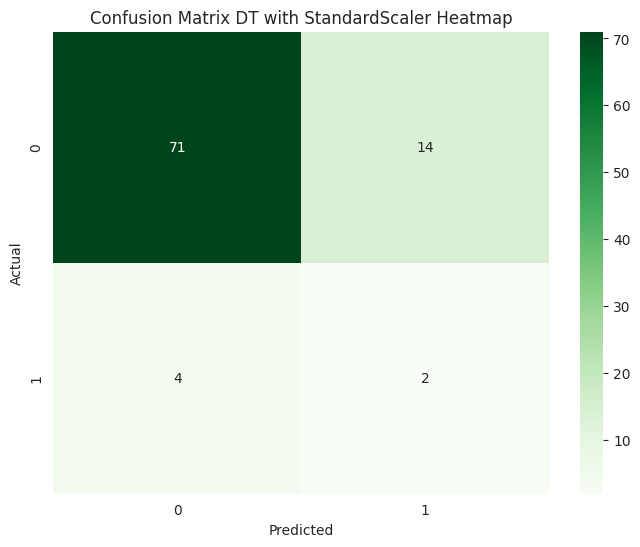

In [282]:
# Evaluasi metrik klasifikasi dengan confusion matriks
cm = confusion_matrix(Y_val_final, y_pred_lda)
print("Confusion Matrix:\n", cm,"\n")

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT with StandardScaler Heatmap')
plt.show()

* The True Positive (TP) value indicates how many people the model predicts will churn and actually churn. In this model, a TP of 3625 is obtained.
* The False Positive (FP) value states that many people who the model predicts will churn but actually don't churn. In this model, the FP is 20532.
* The True Negative (TN) value indicates that many people are predicted not to churn and actually do not churn. In this model, a TN of 46886 is obtained.
* The False Negative (FN) value indicates that many people are predicted not to churn but actually do churn. In this model, the FN is 2132.

# **Modeling**

In [283]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create an instance of LinearDiscriminantAnalysis with the best hyperparameters
lda = LinearDiscriminantAnalysis(n_components = None, priors = None, shrinkage = 0.01, solver = 'eigen', store_covariance = False, tol = 1)

# Fit the model on the training data
lda.fit(X_train_smote, Y_train_smote)

# Make predictions on the val data
val_pred_lda = lda.predict(scaled_X_val)

# Calculate the evaluation metrics
accuracy_lda = accuracy_score(Y_val_final, val_pred_lda)
f1_score_lda = f1_score(Y_val_final, val_pred_lda)
recall_lda = recall_score(Y_val_final, val_pred_lda)
precision_lda = precision_score(Y_val_final, val_pred_lda)

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy_lda))
print("F1 Score: {:.4f}".format(f1_score_lda))
print("Recall Score: {:.4f}".format(recall_lda))
print("Precision Score: {:.4f}".format(precision_lda))

Accuracy: 0.8022
F1 Score: 0.1818
Recall Score: 0.3333
Precision Score: 0.1250


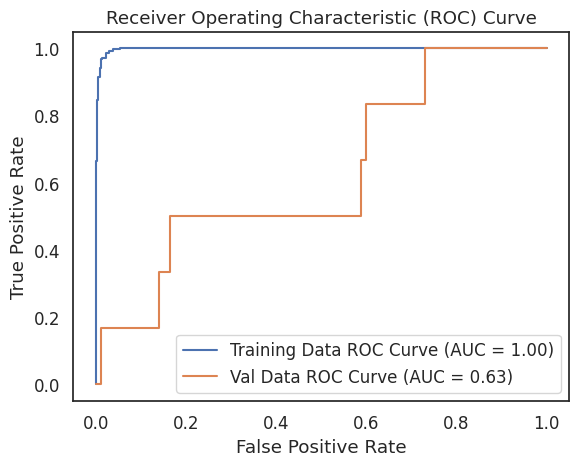

In [315]:
# Get predicted probabilities for training and val data
train_probs_lda = lda.predict_proba(X_train_smote)[:, 1]
val_probs_lda = lda.predict_proba(scaled_X_val)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for training and val data
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train_smote, train_probs_lda)
fpr_val, tpr_val, thresholds_val = roc_curve(Y_val_final, val_probs_lda)

# Compute the AUC scores for training and val data
auc_train = auc(fpr_train, tpr_train)
val_auc_lda = auc(fpr_val, tpr_val)

# Plot the ROC curves
plt.plot(fpr_train, tpr_train, label='Training Data ROC Curve (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_val, tpr_val, label='Val Data ROC Curve (AUC = {:.2f})'.format(val_auc_lda))

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Observations**:

The ROC Curve training data produces an AUC (Area Under the Curve) value of 0.78, while the AUC value in data validation is 0.72. By looking at the difference in AUC values ​​between training data and validation data, it can be seen that the model tends to be better at predicting training data than data that has never been seen before in data validation. This difference indicates the possibility of overfitting.

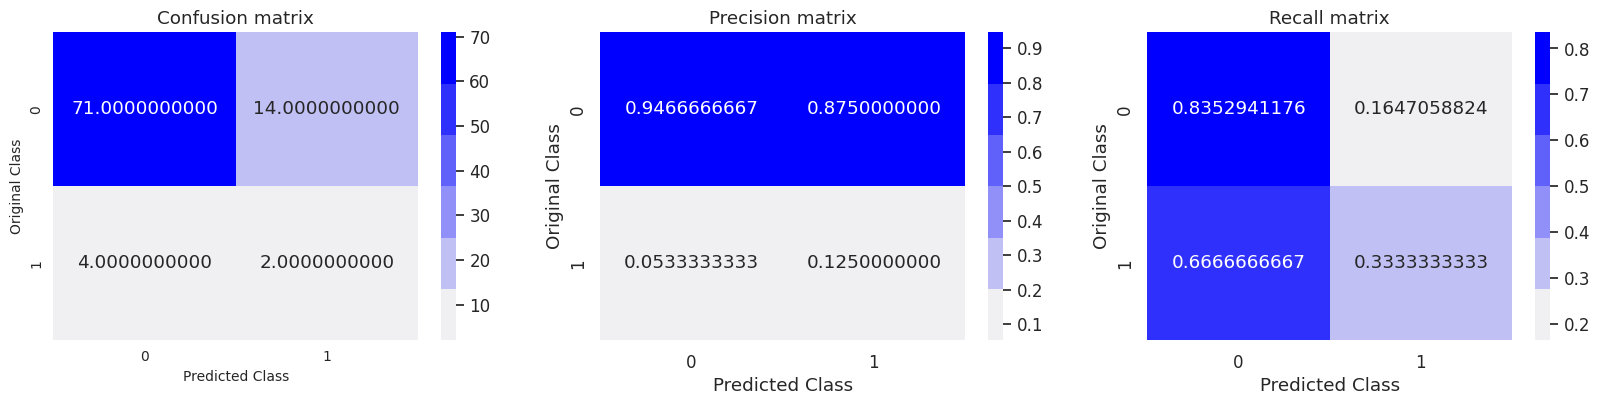

In [285]:
# Usage example
plot_confusion_matrix(Y_val_final, val_pred_lda)

# **Random Forest**
**Tuning**

In [286]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [64, 128, 256],
    'max_depth': [2, 8, 16],
}

# Create a random forest classifier object
rf = RandomForestClassifier()

# Define the grid search cross-validation object
grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

# Fit the grid search cross-validation object to the data
grid_results = grid_search.fit(X_train_smote, Y_train_smote)

# summarize result
best_params = grid_results.best_params_
print('Best Score: %s' % grid_results.best_score_)
print('Best Hyperparameters: %s' % grid_results.best_params_)

Best Score: 0.9912408759124087
Best Hyperparameters: {'max_depth': 8, 'n_estimators': 128}


In [287]:
# Evaluate the performance of the best model on the val set
y_pred_rf = grid_search.predict(scaled_X_val)
accuracy_rf = accuracy_score(Y_val_final, y_pred_rf)
recall_rf = recall_score(Y_val_final, y_pred_rf)
print(f'Val set accuracy: {accuracy_rf:.2f}')
print(f'Val set recall score: ', recall_rf)

Val set accuracy: 0.91
Val set recall score:  0.0


Confusion Matrix:
 [[83  2]
 [ 6  0]] 



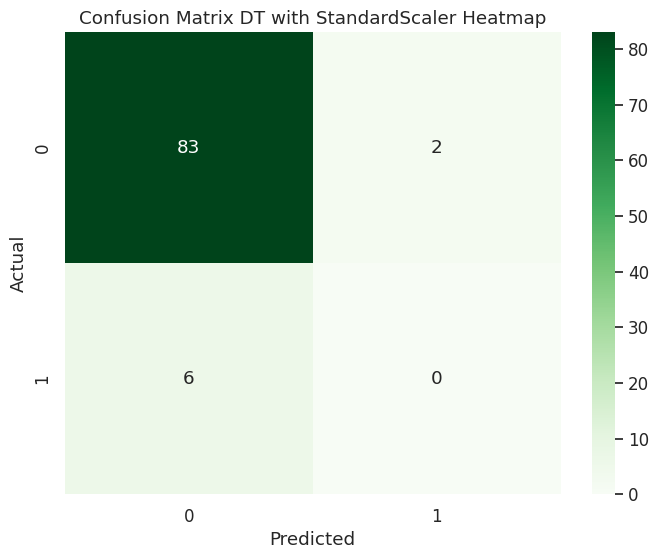

In [288]:
# Evaluasi metrik klasifikasi dengan confusion matriks
cm = confusion_matrix(Y_val_final, y_pred_rf)
print("Confusion Matrix:\n", cm,"\n")

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT with StandardScaler Heatmap')
plt.show()

**Modelling**

In [289]:
# Create and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=256, random_state=42)
rf_classifier.fit(X_train_smote, Y_train_smote)

# Make predictions on the training data
val_pred_rf = rf_classifier.predict(scaled_X_val)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(Y_val_final, val_pred_rf)
f1_rf = f1_score(Y_val_final, val_pred_rf)
recall_rf = recall_score(Y_val_final, val_pred_rf)
precision_rf = precision_score(Y_val_final, val_pred_rf)

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)

Accuracy: 0.9230769230769231
F1 Score: 0.0
Recall: 0.0
Precision: 0.0


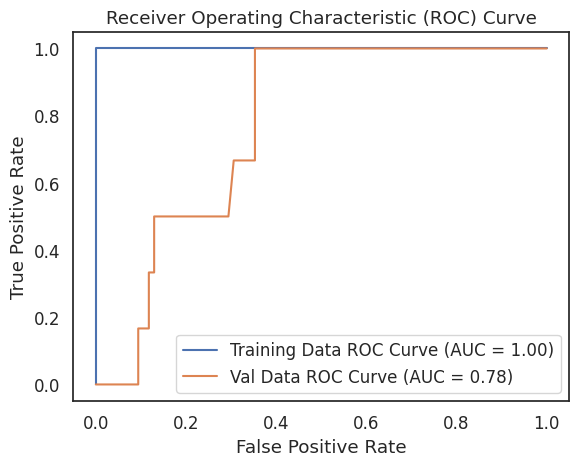

In [290]:
# Calculate the probabilities for the training and val data
train_probs_rf = rf_classifier.predict_proba(X_train_smote)[:, 1]
val_probs_rf = rf_classifier.predict_proba(scaled_X_val)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the training data
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train_smote, train_probs_rf)
train_auc = auc(train_fpr, train_tpr)

# Calculate the false positive rate, true positive rate, and thresholds for the val data
val_fpr, val_tpr, val_thresholds = roc_curve(Y_val_final, val_probs_rf)
val_auc_rf = auc(val_fpr, val_tpr)

# Plot the ROC curves
plt.plot(train_fpr, train_tpr, label='Training Data ROC Curve (AUC = {:.2f})'.format(train_auc))
plt.plot(val_fpr, val_tpr, label='Val Data ROC Curve (AUC = {:.2f})'.format(val_auc_rf))

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Observations**:

The ROC Curve training data produces an AUC (Area Under the Curve) value of 0.99, while the AUC value in data validation is 0.68. By looking at the difference in AUC values ​​between training data and validation data, it can be seen that the model tends to be better at predicting training data than data that has never been seen before in data validation. The very large difference between the AUC values ​​on the train data and validation data indicates overfitting.

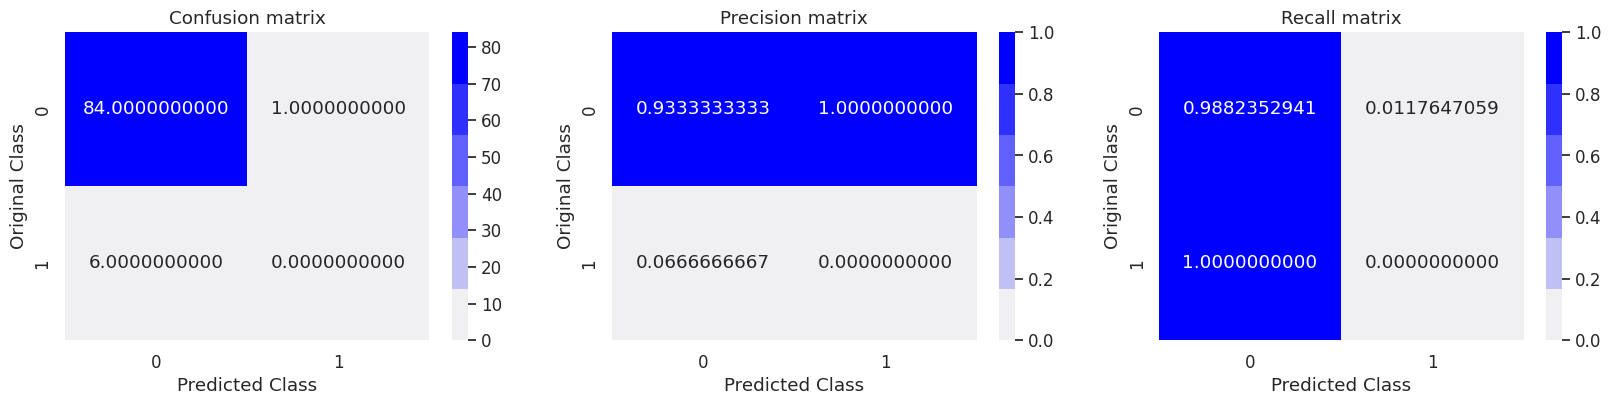

In [291]:
# Usage example
plot_confusion_matrix(Y_val_final, val_pred_rf)

# **Logistic Regression**
**Tuning**

In [292]:
from sklearn.linear_model import LogisticRegression

Accuracies= {} # make dictionary to save all accuracies models

# define model
lr = LogisticRegression()

# parameters
parameters = [{'penalty':['l2'],'C':[0.1,0.4,0.5],'random_state':[0], 'solver': ['liblinear', 'saga']}]

# define search
search = GridSearchCV(lr, parameters, scoring='accuracy', n_jobs=-1)

# execute search
result = search.fit(X_train_smote, Y_train_smote)

# summarize result
best_params = result.best_params_
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.931300987548304
Best Hyperparameters: {'C': 0.5, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


In [293]:
# Evaluate the model on the val set
y_pred_lr = search.predict(scaled_X_val)
accuracy_lr = accuracy_score(Y_val_final, y_pred_lr)
recall_lr = recall_score(Y_val_final, y_pred_lr)
print("Accuracy on val set: ", accuracy_lr)
print("Recall score on val set: ", recall_lr)

Accuracy on val set:  0.8131868131868132
Recall score on val set:  0.3333333333333333


Confusion Matrix:
 [[72 13]
 [ 4  2]] 



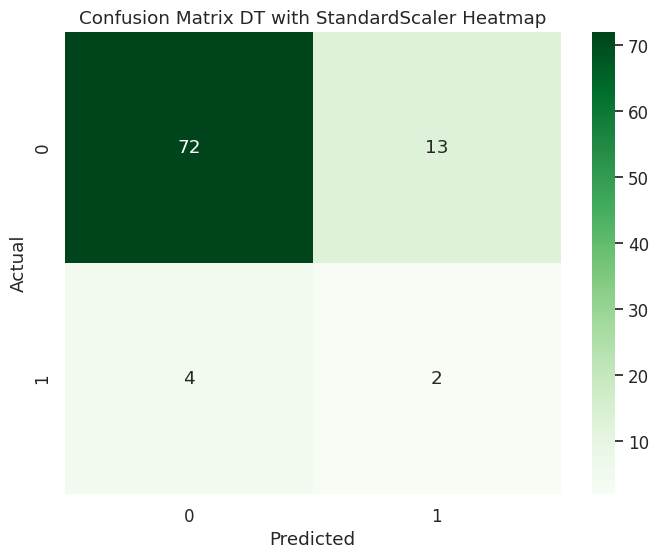

In [294]:
# Evaluasi metrik klasifikasi dengan confusion matriks
cm = confusion_matrix(Y_val_final, y_pred_lr)
print("Confusion Matrix:\n", cm,"\n")

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT with StandardScaler Heatmap')
plt.show()

**Modelling**

In [295]:
# Create an instance of Logistic Regression with the best hyperparameters
lr_classifier = LogisticRegression(C = 0.4, penalty = 'l2', random_state = 0, solver = 'liblinear')

# Fit the model on the training data
lr_classifier.fit(X_train_smote, Y_train_smote)

# Make predictions on the val data
val_pred_lr = lr_classifier.predict(scaled_X_val)

# Calculate the evaluation metrics
accuracy_lr = accuracy_score(Y_val_final, val_pred_lr)
f1_score_lr = f1_score(Y_val_final, val_pred_lr)
recall_score_lr = recall_score(Y_val_final, val_pred_lr)
precision_score_lr = precision_score(Y_val_final, val_pred_lr)

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy_lr))
print("F1 Score: {:.4f}".format(f1_score_lr))
print("Recall Score: {:.4f}".format(recall_score_lr))
print("Precision Score: {:.4f}".format(precision_score_lr))

Accuracy: 0.8022
F1 Score: 0.1818
Recall Score: 0.3333
Precision Score: 0.1250


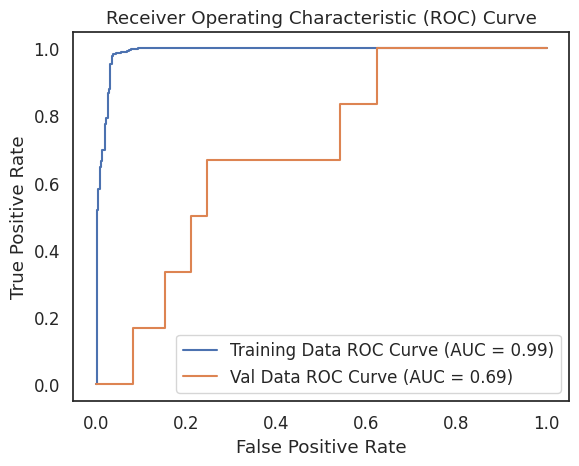

In [296]:
# Get predicted probabilities for training and val data
train_probs_lr = lr_classifier.predict_proba(X_train_smote)[:, 1]
val_probs_lr = lr_classifier.predict_proba(scaled_X_val)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for training and val data
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train_smote, train_probs_lr)
fpr_val, tpr_val, thresholds_val = roc_curve(Y_val_final, val_probs_lr)

# Compute the AUC scores for training and val data
auc_train = auc(fpr_train, tpr_train)
val_auc_lr = auc(fpr_val, tpr_val)

# Plot the ROC curves
plt.plot(fpr_train, tpr_train, label='Training Data ROC Curve (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_val, tpr_val, label='Val Data ROC Curve (AUC = {:.2f})'.format(val_auc_lr))

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Observations**:

The ROC Curve training data produces an AUC (Area Under the Curve) value of 0.78, while the AUC value in data validation is 0.72. By looking at the difference in AUC values ​​between training data and validation data, it can be seen that the model tends to be better at predicting training data than data that has never been seen before in data validation. This difference indicates the possibility of overfitting.

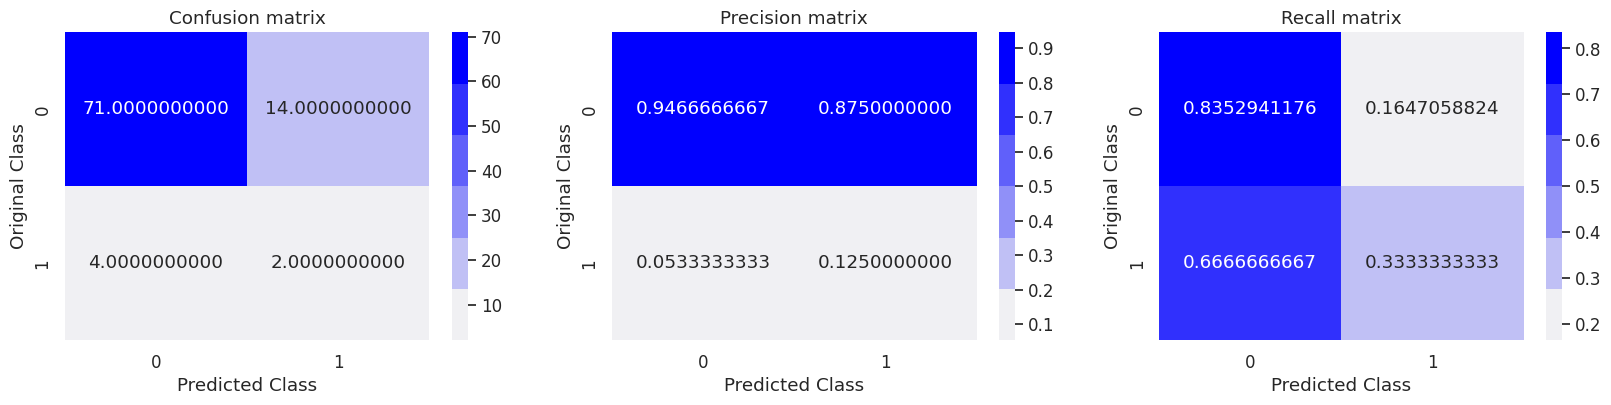

In [297]:
# Usage example
plot_confusion_matrix(Y_val_final, val_pred_lr)

# **Naive Bayes**
**Tuning**

In [298]:
# Define the hyperparameter grid to search over
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Create a Gaussian Naive Bayes classifier object
nb = GaussianNB()

# Define the grid search cross-validation object
grid_search = GridSearchCV(nb, param_grid=param_grid, scoring='recall', n_jobs=-1)

# Fit the grid search cross-validation object to the data
grid_results = grid_search.fit(X_train_smote, Y_train_smote)

# summarize result
best_params = grid_results.best_params_
print('Best Score: %s' % grid_results.best_score_)
print('Best Hyperparameters: %s' % grid_results.best_params_)

Best Score: 0.9970588235294118
Best Hyperparameters: {'var_smoothing': 1e-09}


In [299]:
# Evaluate the model on the val set
y_pred_nb = grid_search.predict(scaled_X_val)
accuracy_nb = accuracy_score(Y_val_final, y_pred_nb)
recall_nb = recall_score(Y_val_final, y_pred_nb)
print("Accuracy on val set: ", accuracy_nb)
print("Recall score on val set: ", recall_nb)

Accuracy on val set:  0.9340659340659341
Recall score on val set:  0.0


Confusion Matrix:
 [[85  0]
 [ 6  0]] 



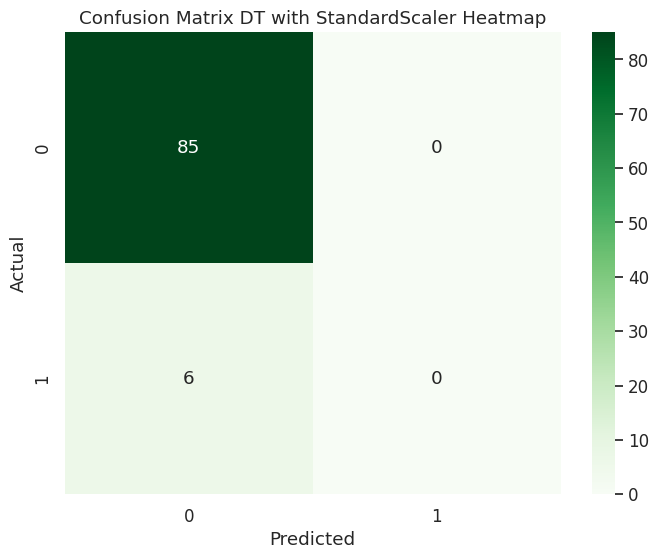

In [300]:
# Evaluasi metrik klasifikasi dengan confusion matriks
cm = confusion_matrix(Y_val_final, y_pred_nb)
print("Confusion Matrix:\n", cm,"\n")

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT with StandardScaler Heatmap')
plt.show()

**Modelling**

In [301]:
# Create and fit the Random Forest Classifier
nb_classifier = GaussianNB(var_smoothing= 1e-09)
nb_classifier.fit(X_train_smote, Y_train_smote)

# Make predictions on the training data
val_pred_nb = nb_classifier.predict(scaled_X_val)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(Y_val_final, val_pred_nb)
f1_nb = f1_score(Y_val_final, val_pred_nb)
recall_nb = recall_score(Y_val_final, val_pred_nb)
precision_nb = precision_score(Y_val_final, val_pred_nb)

# Print the evaluation metrics
print("Accuracy:", accuracy_nb)
print("F1 Score:", f1_nb)
print("Recall:", recall_nb)
print("Precision:", precision_nb)

Accuracy: 0.9340659340659341
F1 Score: 0.0
Recall: 0.0
Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


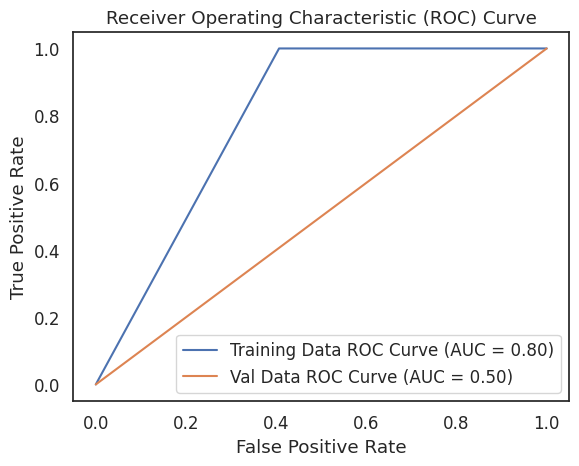

In [302]:
# Calculate the probabilities for the training and val data
train_probs_nb = nb_classifier.predict_proba(X_train_smote)[:, 1]
val_probs_nb = nb_classifier.predict_proba(scaled_X_val)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the training data
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train_smote, train_probs_nb)
train_auc = auc(train_fpr, train_tpr)

# Calculate the false positive rate, true positive rate, and thresholds for the val data
val_fpr, val_tpr, val_thresholds = roc_curve(Y_val_final, val_probs_nb)
val_auc_nb = auc(val_fpr, val_tpr)

# Plot the ROC curves
plt.plot(train_fpr, train_tpr, label='Training Data ROC Curve (AUC = {:.2f})'.format(train_auc))
plt.plot(val_fpr, val_tpr, label='Val Data ROC Curve (AUC = {:.2f})'.format(val_auc_nb))

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Observations**:

The ROC Curve training data produces an AUC (Area Under the Curve) value of 0.50, while the AUC value in data validation is 0.98. By looking at the difference in AUC values ​​between training data and validation data, it can be seen that the model tends to be better at predicting training data than data that has never been seen before in data validation. This difference indicates the possibility of overfitting.

<ipython-input-278-ab0dfc9f224c>:4: RuntimeWarning: invalid value encountered in true_divide
  B = (C / C.sum(axis=0))


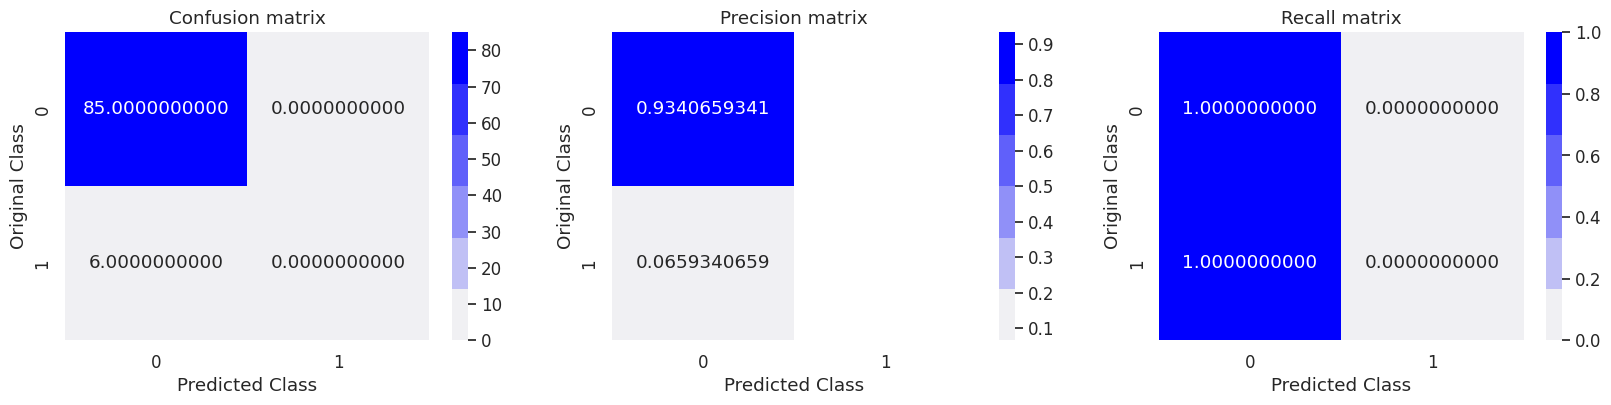

In [303]:
# Usage example
plot_confusion_matrix(Y_val_final, val_pred_nb)

**Evaluation**

Cross Validation

In [304]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import cross_val_score

scoring = make_scorer(recall_score)
recall_scores_lda = cross_val_score(lda, scaled_X_val, Y_val_final, cv=5, scoring=scoring)
recall_scores_rf = cross_val_score(rf_classifier, scaled_X_val, Y_val_final, cv=5, scoring=scoring)
recall_scores_lr = cross_val_score(lr_classifier, scaled_X_val, Y_val_final, cv=5, scoring=scoring)
recall_scores_nb = cross_val_score(nb_classifier, scaled_X_val, Y_val_final, cv=5, scoring=scoring)

print("Mean Recall score for LDA: % f with standard deviation %f" %(recall_scores_lda.mean(), recall_scores_lda.std()))
print("Mean Recall score for Random Forest: % f with standard deviation %f" %(recall_scores_rf.mean(), recall_scores_rf.std()))
print("Mean Recall score for Logistic Regression: % f with standard deviation %f" %(recall_scores_lr.mean(), recall_scores_lr.std()))
print("Mean Recall score for Naive Bayes: % f with standard deviation %f" %(recall_scores_nb.mean(), recall_scores_nb.std()))

Mean Recall score for LDA:  0.200000 with standard deviation 0.400000
Mean Recall score for Random Forest:  0.000000 with standard deviation 0.000000
Mean Recall score for Logistic Regression:  0.200000 with standard deviation 0.400000
Mean Recall score for Naive Bayes:  0.400000 with standard deviation 0.489898


A low recall standard deviation value indicates that the model is not overfitting. The four models above have standard deviation values ​​that are not low enough so that it can be concluded that the four models have the possibility of overfitting, although not too big. The highest mean recall value is owned by Naive Bayes, followed by LDA, Logistic Regression, and Random Forest.

**Metrics Evaluation**

In [305]:
metrics = pd.DataFrame({
    'Model Name': ['LDA', 'Random Forest', 'Logistic Regression', 'Naive Bayes'],
    'Recall'    : [recall_lda, recall_rf, recall_score_lr, recall_nb, ],
    'Recall CV' : [recall_scores_lda.mean(), recall_scores_rf.mean(), recall_scores_lr.mean(), recall_scores_nb.mean()],
    'AUC Score'    : [val_auc_lda, val_auc_rf, val_auc_lr, val_auc_nb],
    'Accuracy'    : [accuracy_lda, accuracy_rf, accuracy_lr, accuracy_nb]
    }, columns = ['Model Name', 'Recall', 'Recall CV', 'AUC Score', 'Accuracy'])

metrics.sort_values(by='Recall', ascending=False)

Model Name    Recall  Recall CV  AUC Score  Accuracy
0                  LDA  0.333333        0.2   0.627451  0.802198
2  Logistic Regression  0.333333        0.2   0.690196  0.802198
1        Random Forest  0.000000        0.0   0.775490  0.923077
3          Naive Bayes  0.000000        0.4   0.500000  0.934066

In this case, it is better for the algorithm to predict customer churn but not actually than for the algorithm to incorrectly predict that customers do not churn when they actually do. Therefore, you can use the Recall value (we need a lower False Negative value. The lower the FN value, the higher the Recall value).

In the hyperparameter tuning model, LDA has the highest recall value, which is 0.631839
 . In the model carried out by Cross-Validation, the highest Recall value is owned by Naive Bayes of 0.369455
 . The highest AUC score is owned by LDA, which is 0.722298
 . Meanwhile, the highest Accuracy value is owned by Random Forest of 0.859849
 . Therefore, in this case, the model that will be used to classify heart disease status is LDA with the best parameters resulting from hyperparameter tuning. This model provides the highest recall value with a lower possibility of overfitting.

In [306]:
metrics.to_excel("Metrics_Evaluation.xlsx", index=False)


# **Feature Importance**

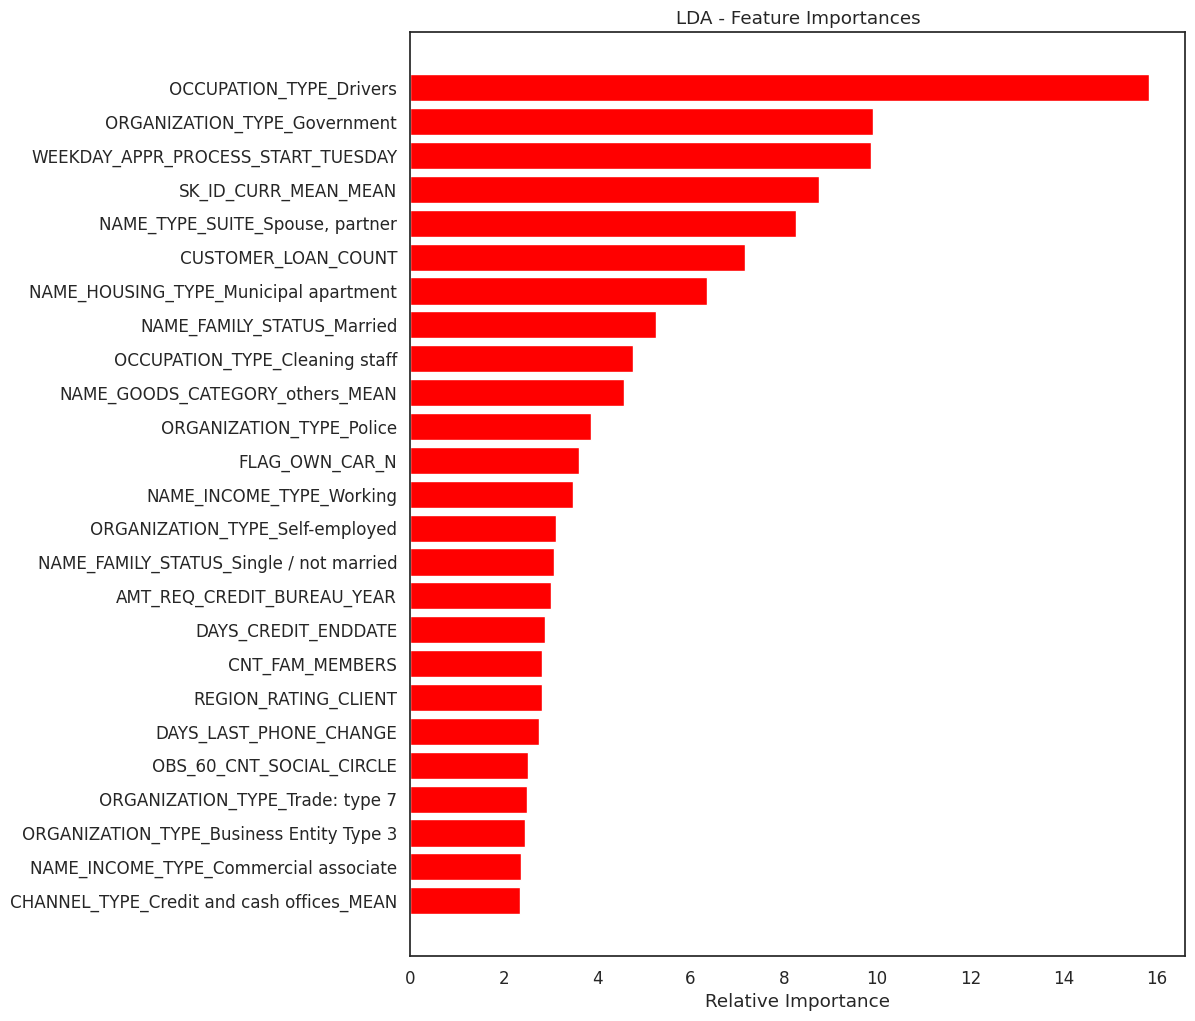

In [307]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
lda_features = features_top_df_val.columns
lda_importances = np.abs(lda.coef_[0])
data = {'Feature': lda_features, 'Importance': lda_importances}
df_importance = pd.DataFrame(data)
df_importance_sorted = df_importance.sort_values(by='Importance', ascending=True)

# Select the top 25 features
df_top_25 = df_importance_sorted.tail(25)

plt.figure(figsize=(10, 12))
plt.title('LDA - Feature Importances')
plt.barh(range(len(df_top_25)), df_top_25['Importance'], color='red', align='center')
plt.yticks(range(len(df_top_25)), df_top_25['Feature'])
plt.xlabel('Relative Importance')
plt.show()

After doing the modeling, we get 25 main features that affect loan repayments. NAME_EDUCATION_TYPE_Secondary is the top feature in determining the borrower's ability to repay a loan. Among the top 5 features, features that reflect the ability and behavior of prospective borrowers in paying credit are AMT_INSTALMENT, which is the number of installments determined from the previous credit, and AMT_PAYMENT, which is the amount actually paid in these installments.

In [308]:
import pandas as pd

# Menyiapkan data
lda_features = features_top_df_val.columns
lda_importances = np.abs(lda.coef_[0])
data = {'Feature': lda_features, 'Importance': lda_importances}
df_importance = pd.DataFrame(data)

# Mengurutkan dataframe berdasarkan nilai importance
df_importance_sorted = df_importance.sort_values(by='Importance', ascending=False)

# Menampilkan dataframe terurut
df_importance_sorted

Feature  Importance
35                            OCCUPATION_TYPE_Drivers   15.817191
47                       ORGANIZATION_TYPE_Government    9.902265
43                 WEEKDAY_APPR_PROCESS_START_TUESDAY    9.871066
64                               SK_ID_CURR_MEAN_MEAN    8.765121
27                    NAME_TYPE_SUITE_Spouse, partner    8.266697
..                                                ...         ...
38                 OCCUPATION_TYPE_Low-skill Laborers    0.098606
73            WEEKDAY_APPR_PROCESS_START_WEEKEND_MEAN    0.095143
79  NAME_GOODS_CATEGORY_Clothing and Accessories_MEAN    0.072540
93         PRODUCT_COMBINATION_Cash X-Sell: high_MEAN    0.041377
91                         NAME_YIELD_GROUP_high_MEAN    0.017019

[100 rows x 2 columns]

In [309]:
df_importance_sorted.to_excel("Feature Importance.xlsx", index=False)

# **Predicting Test Data**

In [310]:
# Predict probabilities using the LDA model
scaled_X_test = np.nan_to_num(scaled_X_test)
test_probs = lda.predict_proba(scaled_X_test)
test_preds = lda.predict(scaled_X_test)

# Create a DataFrame with SK_ID_CURR and predicted probabilities
test_results = pd.DataFrame({'SK_ID_CURR': Test['SK_ID_CURR'], 'PROBABILITY': test_probs[:, 1], 'PREDICTION': test_preds})

# Display the table
print(test_results)

       SK_ID_CURR  PROBABILITY  PREDICTION
0          100001     0.004507         0.0
1          100005     0.300153         0.0
2          100013     0.000045         0.0
3          100028     0.002489         0.0
4          100038     0.957991         1.0
...           ...          ...         ...
32701      338188     0.000184         0.0
32702      338189     0.006226         0.0
32703      338193     0.000005         0.0
32704      338199     0.000483         0.0
32705      338202     0.046052         0.0

[32706 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


**Exporting**

In [311]:
features_top_df_test.head()


AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH  \
0          135000.0    568800.0      20560.5         450000.0      -19241   
1           99000.0    222768.0      17370.0         180000.0      -18064   
2          202500.0    663264.0      69777.0         630000.0      -20038   
3          315000.0   1575000.0      49018.5        1575000.0      -13976   
4          180000.0    625500.0      32067.0         625500.0      -13040   

   FLAG_PHONE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0              2.0                     2   
1           0              2.0                     2   
2           0              2.0                     2   
3           1              4.0                     2   
4           0              3.0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       18   
1                            2                        9   
2                            2                       14   
3                            2                       11   
4                            2                        5   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                       0      0.752614      0.789654      0.159520   
1                       0      0.564990      0.291656      0.432962   
2                       0      0.000000      0.699787      0.610991   
3                       0      0.525734      0.509677      0.612704   
4                       1      0.202145      0.425687      0.000000   

   OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       0.0                       0.0                 -1740.0   
1                       0.0                       0.0                     0.0   
2                       0.0                       0.0                  -856.0   
3                       0.0                       0.0                 -1805.0   
4                       0.0                       0.0                  -821.0   

   FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  \
0              1.0                         0.0                         0.0   
1              1.0                         0.0                         3.0   
2              0.0                         0.0                         4.0   
3              1.0                         0.0                         3.0   
4              1.0                         0.0                         0.0   

   CREDIT_TERM  NAME_CONTRACT_TYPE_Cash loans  \
0     0.036147                              1   
1     0.077973                              1   
2     0.105202                              1   
3     0.031123                              1   
4     0.051266                              1   

   NAME_CONTRACT_TYPE_Revolving loans  FLAG_OWN_CAR_N  FLAG_OWN_CAR_Y  \
0                                   0               1               0   
1                                   0               1               0   
2                                   0               0               1   
3                                   0               1               0   
4                                   0               0               1   

   NAME_TYPE_SUITE_Spouse, partner  NAME_INCOME_TYPE_Commercial associate  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                

In [312]:
final_dataset = pd.concat([test_results, features_top_df_test], axis=1 )
final_dataset.head()

SK_ID_CURR  PROBABILITY  PREDICTION  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100001     0.004507         0.0          135000.0    568800.0   
1      100005     0.300153         0.0           99000.0    222768.0   
2      100013     0.000045         0.0          202500.0    663264.0   
3      100028     0.002489         0.0          315000.0   1575000.0   
4      100038     0.957991         1.0          180000.0    625500.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH  FLAG_PHONE  CNT_FAM_MEMBERS  \
0      20560.5         450000.0      -19241           0              2.0   
1      17370.0         180000.0      -18064           0              2.0   
2      69777.0         630000.0      -20038           0              2.0   
3      49018.5        1575000.0      -13976           1              4.0   
4      32067.0         625500.0      -13040           0              3.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       18   
1                     2                            2                        9   
2                     2                            2                       14   
3                     2                            2                       11   
4                     2                            2                        5   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                       0      0.752614      0.789654      0.159520   
1                       0      0.564990      0.291656      0.432962   
2                       0      0.000000      0.699787      0.610991   
3                       0      0.525734      0.509677      0.612704   
4                       1      0.202145      0.425687      0.000000   

   OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       0.0                       0.0                 -1740.0   
1                       0.0                       0.0                     0.0   
2                       0.0                       0.0                  -856.0   
3                       0.0                       0.0                 -1805.0   
4                       0.0                       0.0                  -821.0   

   FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  \
0              1.0                         0.0                         0.0   
1              1.0                         0.0                         3.0   
2              0.0                         0.0                         4.0   
3              1.0                         0.0                         3.0   
4              1.0                         0.0                         0.0   

   CREDIT_TERM  NAME_CONTRACT_TYPE_Cash loans  \
0     0.036147                              1   
1     0.077973                              1   
2     0.105202                              1   
3     0.031123                              1   
4     0.051266                              1   

   NAME_CONTRACT_TYPE_Revolving loans  FLAG_OWN_CAR_N  FLAG_OWN_CAR_Y  \
0                                   0               1               0   
1                                   0               1               0   
2                                   0               0               1   
3                                   0               1               0   
4                                   0               0               1   

   NAME_TYPE_SUITE_Spouse, partner  NAME_INCOME_TYPE_Commercial associate  \
0                                0                         

In [313]:
test_dataset = pd.concat([test_results, X_test], axis=1 )
test_dataset.head()

SK_ID_CURR  PROBABILITY  PREDICTION  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100001     0.004507         0.0             0          135000.0   
1      100005     0.300153         0.0             0           99000.0   
2      100013     0.000045         0.0             0          202500.0   
3      100028     0.002489         0.0             2          315000.0   
4      100038     0.957991         1.0             1          180000.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0    568800.0      20560.5         450000.0                    0.018850   
1    222768.0      17370.0         180000.0                    0.035792   
2    663264.0      69777.0         630000.0                    0.019101   
3   1575000.0      49018.5        1575000.0                    0.026392   
4    625500.0      32067.0         625500.0                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0      -19241          -2329            -5170.0             -812           1   
1      -18064          -4469            -9118.0            -1623           1   
2      -20038          -4458            -2175.0            -3503           1   
3      -13976          -1866            -2000.0            -4208           1   
4      -13040          -2191            -4000.0            -4262           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           0           1   
1               1                0                 1           0           0   
2               1                0                 1           0           0   
3               1                0                 1           1           0   
4               1                1                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              2.0                     2                            2   
1              2.0                     2                            2   
2              2.0                     2                            2   
3              4.0                     2                            2   
4              3.0                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.752614      0.789654      0.159520                       0.0   
1      0.564990      0.291656      0.432962                       0.0   
2      0.000000      0.699787      0.610991                       0.0   
3      0.525734      0.509677      0.612704                       0.0   
4      0.202145      0.425687      0.000000                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                  

In [314]:
test_dataset.to_excel("Test Dataset.xlsx", index=False)